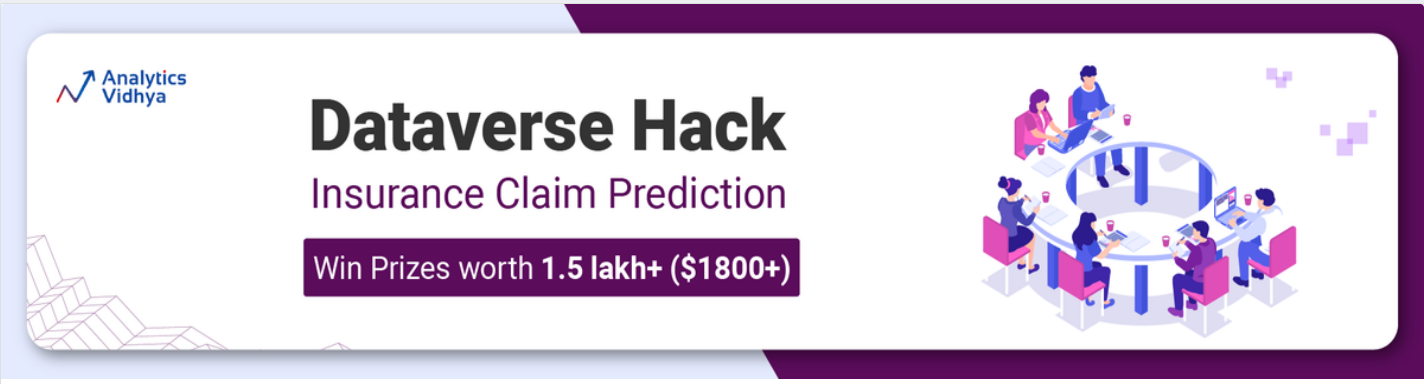

# Insurance Claim Prediction

Predict whether the policyholder will file a claim in the next 6 months or not.

# Problem Statement

CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 

Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.


# About the Dataset

You are provided with information on policyholders containing the attributes like policy tenure, age of the car, age of the car owner, population density of the city, make and model of the car, power, engine type, etc and the target variable indicating whether the policyholder files a claim in the next 6 months or not.

# Data Dictionary

You are provided with 3 files - train.csv, test.csv, and sample_submission.csv

# Train and Test Set

The train and test set contains information about different insurance policy holders. The train set includes the target variable is_claim whereas in the test set, you need to predict the target variable is_claim.

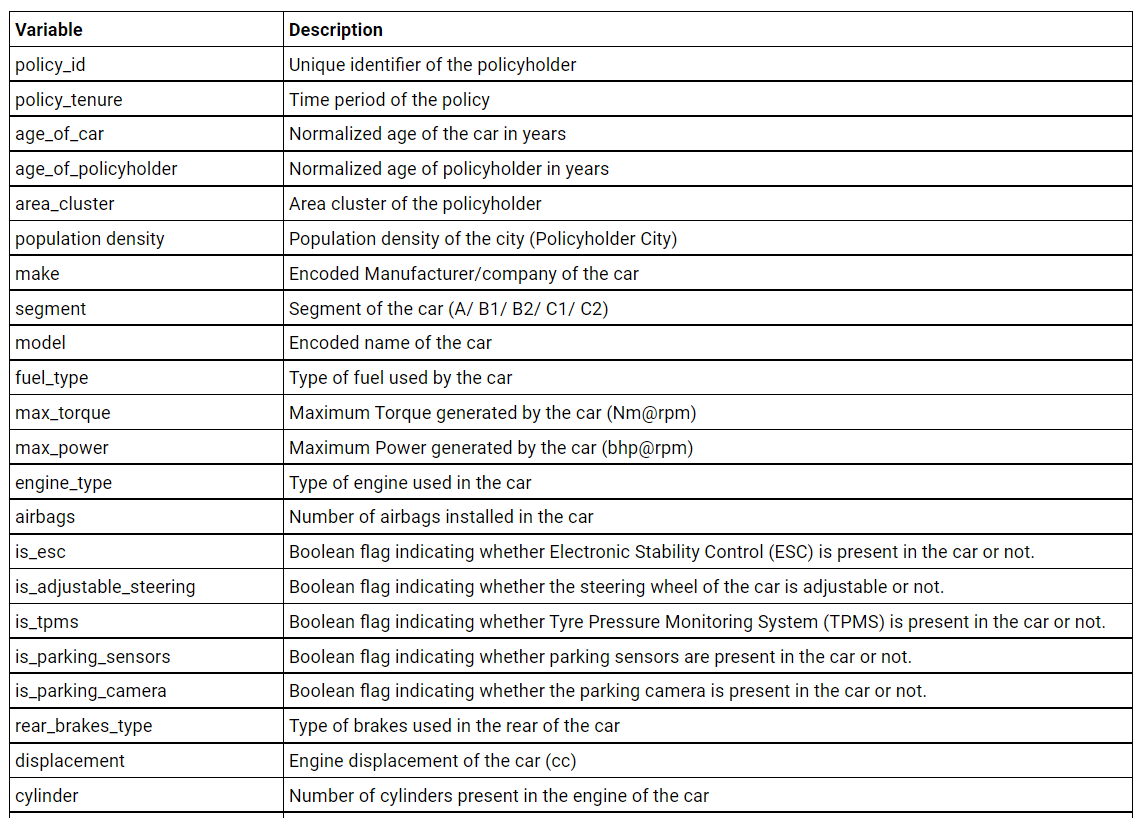

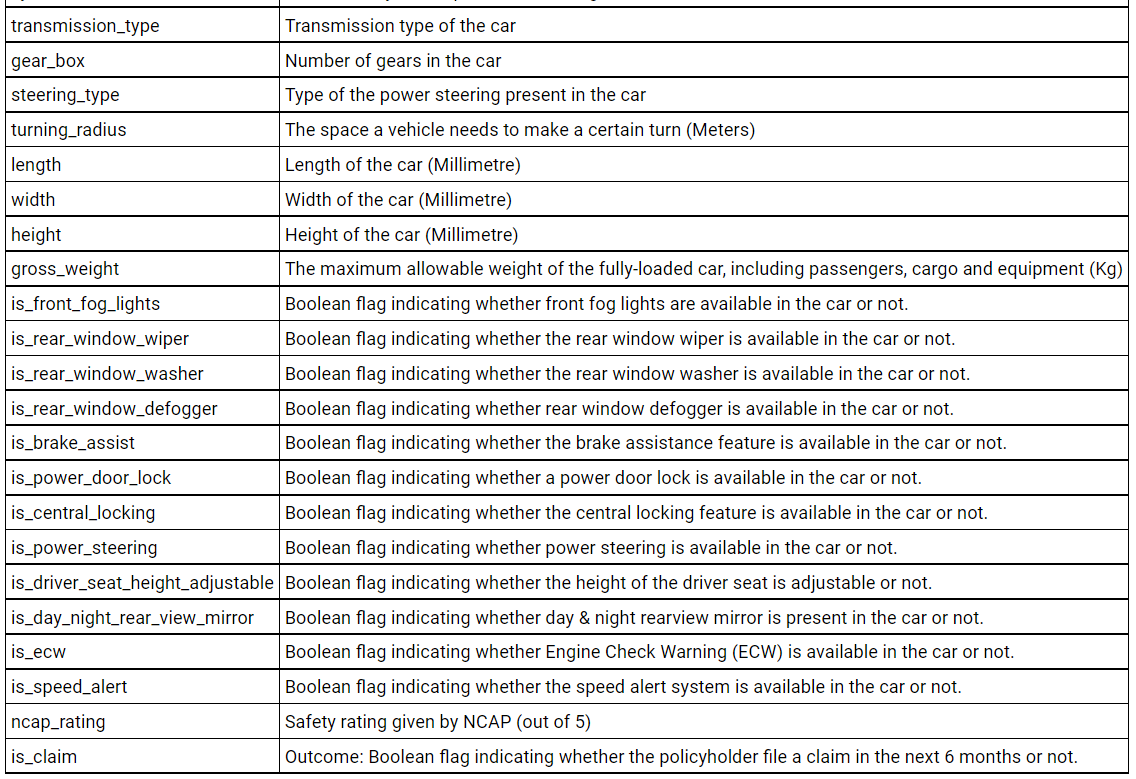

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

In [2]:
plt.rcParams['figure.figsize'] = [15,10]

# Reading the Dataset

In [3]:
train = pd.read_csv("train_qWM28Yl.csv")
test = pd.read_csv("test_zo1G9sv.csv")

In [4]:
train.shape, test.shape

((58592, 44), (39063, 43))

In [5]:
train.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

In [6]:
# Checking for null values
train.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [7]:
test.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

* There are no null values in the data

In [8]:
samplex = train.drop(["policy_id","max_torque","max_power","is_claim"],axis = 1)
y = train.is_claim

In [9]:
inputx = pd.get_dummies(samplex,drop_first=True)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(inputx,y)

RandomForestClassifier()

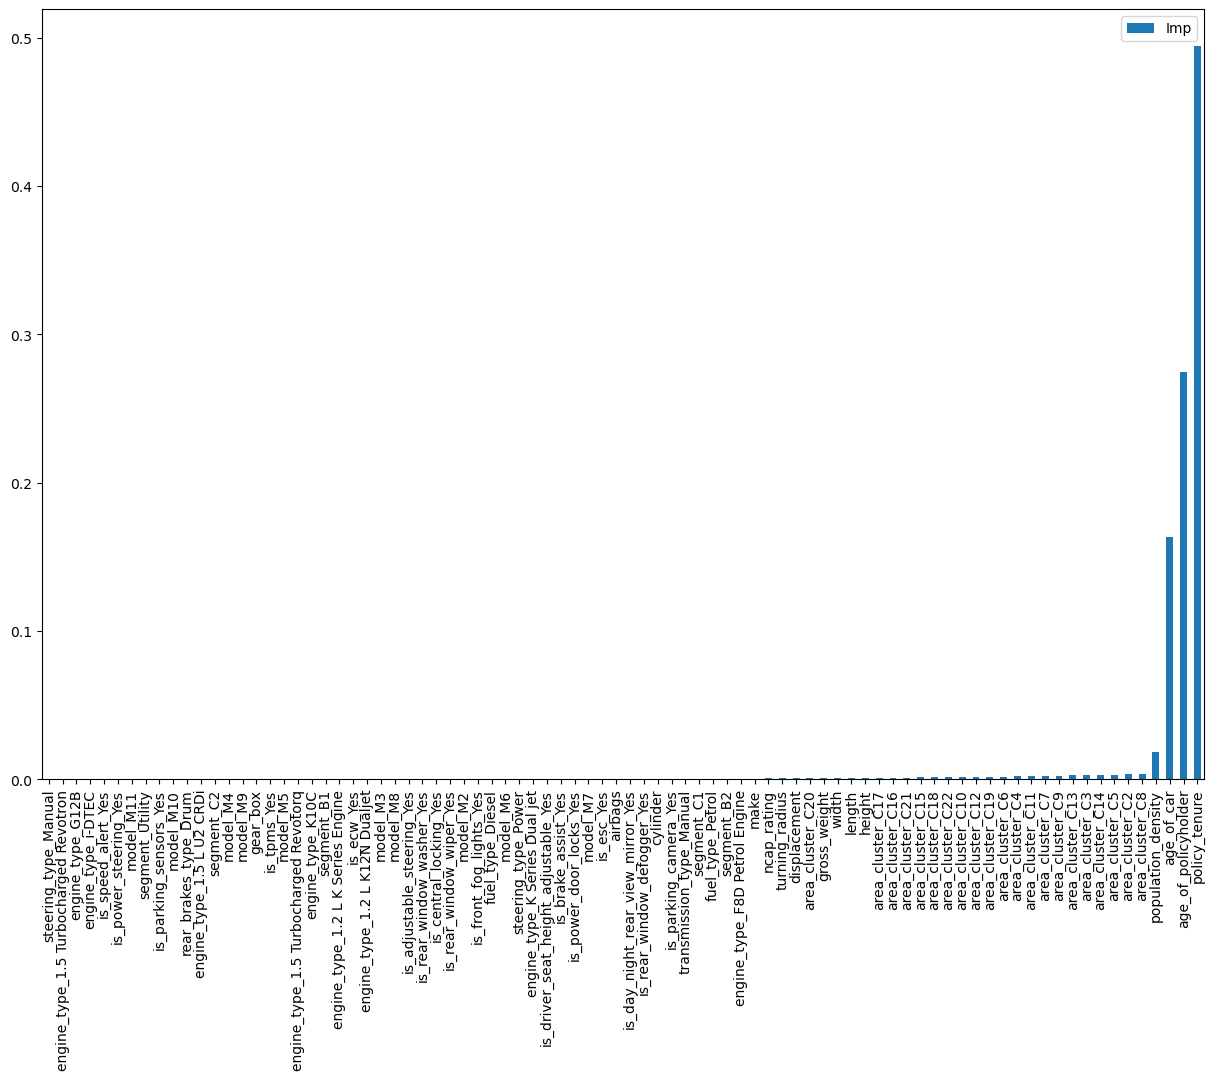

In [11]:
pd.DataFrame(rf.feature_importances_, index=inputx.columns, columns=["Imp"]).sort_values(by = "Imp", ascending = True).plot(kind = "bar")
plt.show()

# Univariate Analysis:

In [12]:
# Combine the Data and then convert

In [13]:
combined = pd.concat([train,test], ignore_index=True)

In [14]:
combined.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0       0.0  
1                            No     No     

In [15]:
combined.shape

(97655, 44)

In [16]:
combined.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [17]:
combined.ncap_rating.unique()

array([0, 2, 3, 5, 4], dtype=int64)

In [18]:
print(combined.ncap_rating.unique())
combined["ncap_rating"] = combined.ncap_rating.astype("object")

print(combined.cylinder.unique())
combined["cylinder"] = combined.cylinder.astype("object")

print(combined.gear_box.unique())
combined["gear_box"] = combined.gear_box.astype("object")

print(combined.make.unique())
combined["make"] = combined.make.astype("object")

[0 2 3 5 4]
[3 4]
[5 6]
[1 2 3 4 5]


In [19]:
combined.select_dtypes(include="object").columns

Index(['policy_id', 'area_cluster', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

In [20]:
cat_cols = ['make', 'fuel_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating']

In [21]:
# 'area_cluster', 'segment', 'model', 'max_torque', 'max_power', 'engine_type',

In [22]:
len(cat_cols)

25

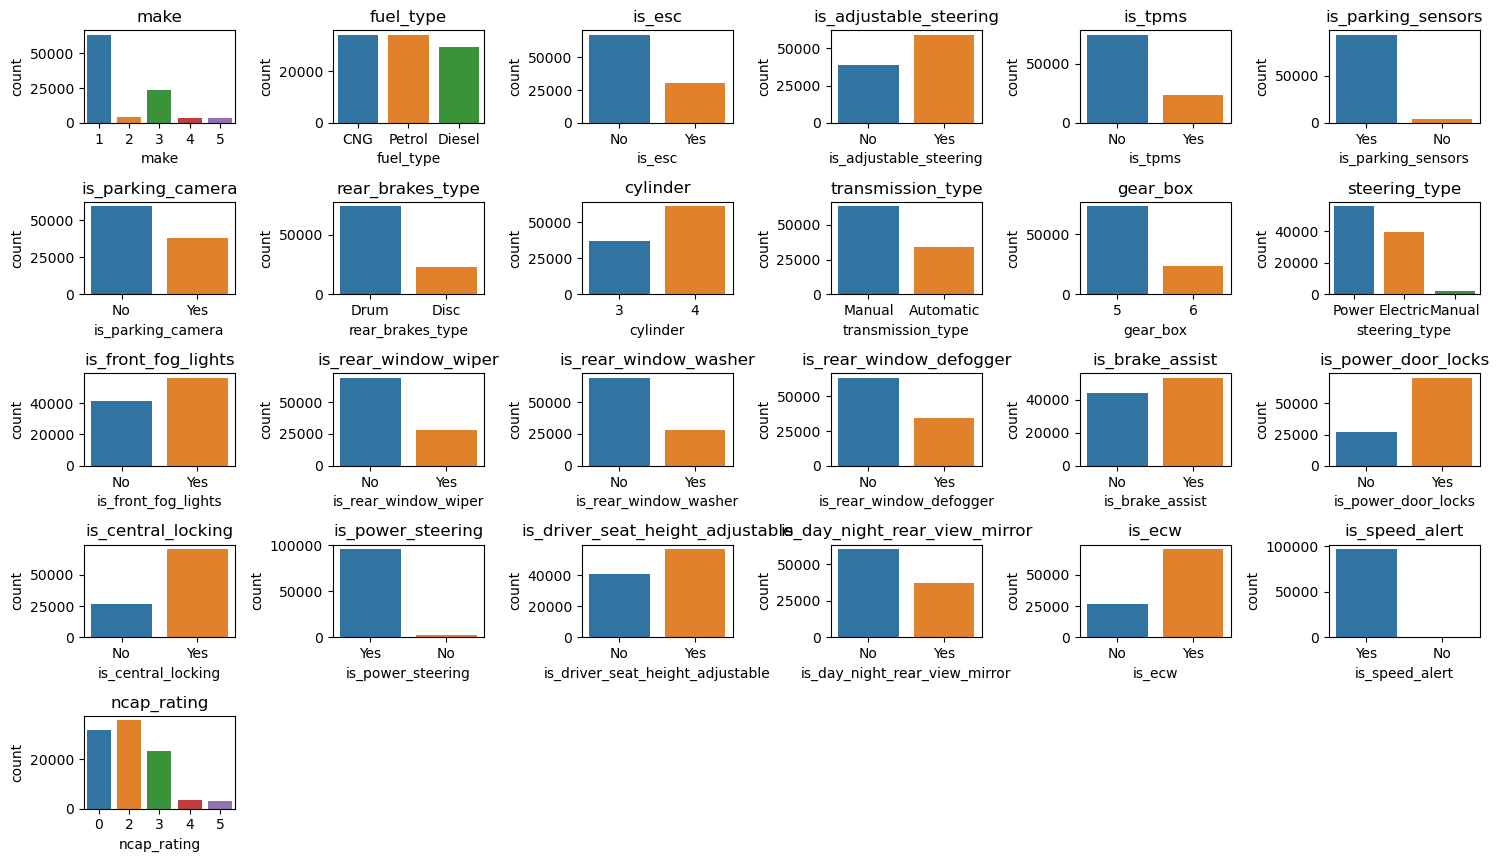

In [23]:
nrows = 6
ncols = 6
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols,iterator)
    sns.countplot(combined.loc[:,i])
    plt.title(i)
    iterator = iterator + 1

plt.tight_layout()
plt.show()

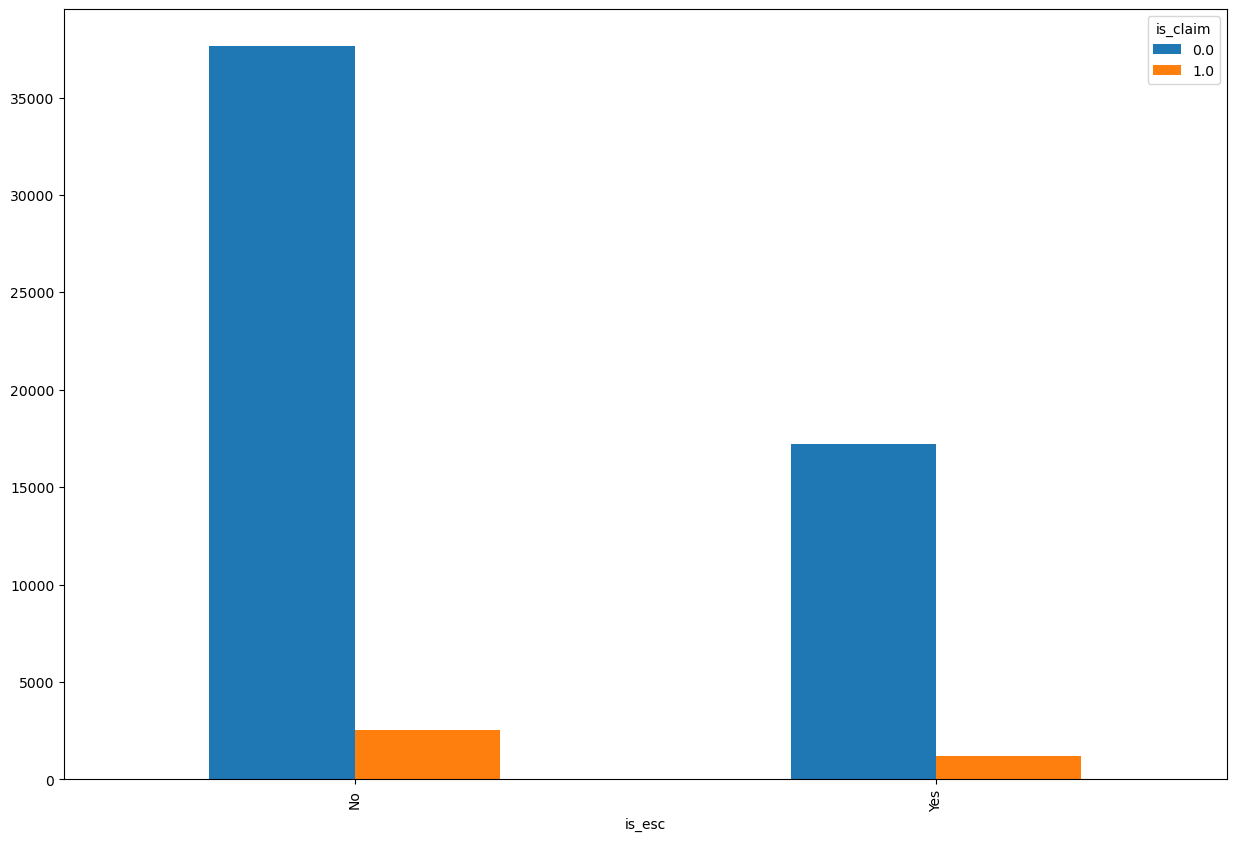

In [24]:
# esc vs is_claim

pd.crosstab(combined.is_esc, combined.is_claim).plot(kind = "bar")
plt.show()

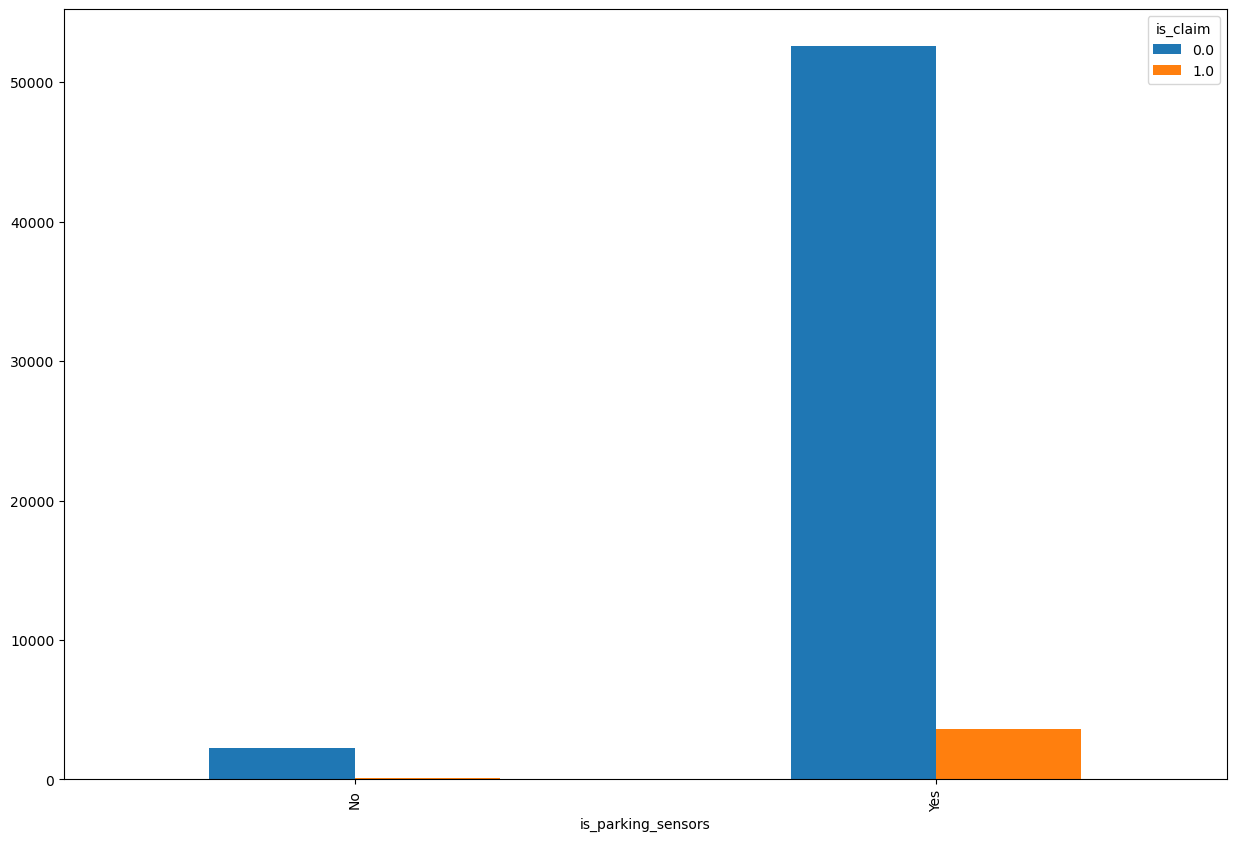

In [25]:
# is_parking_sensors vs is_claim

pd.crosstab(combined.is_parking_sensors, combined.is_claim).plot(kind = "bar")
plt.show()

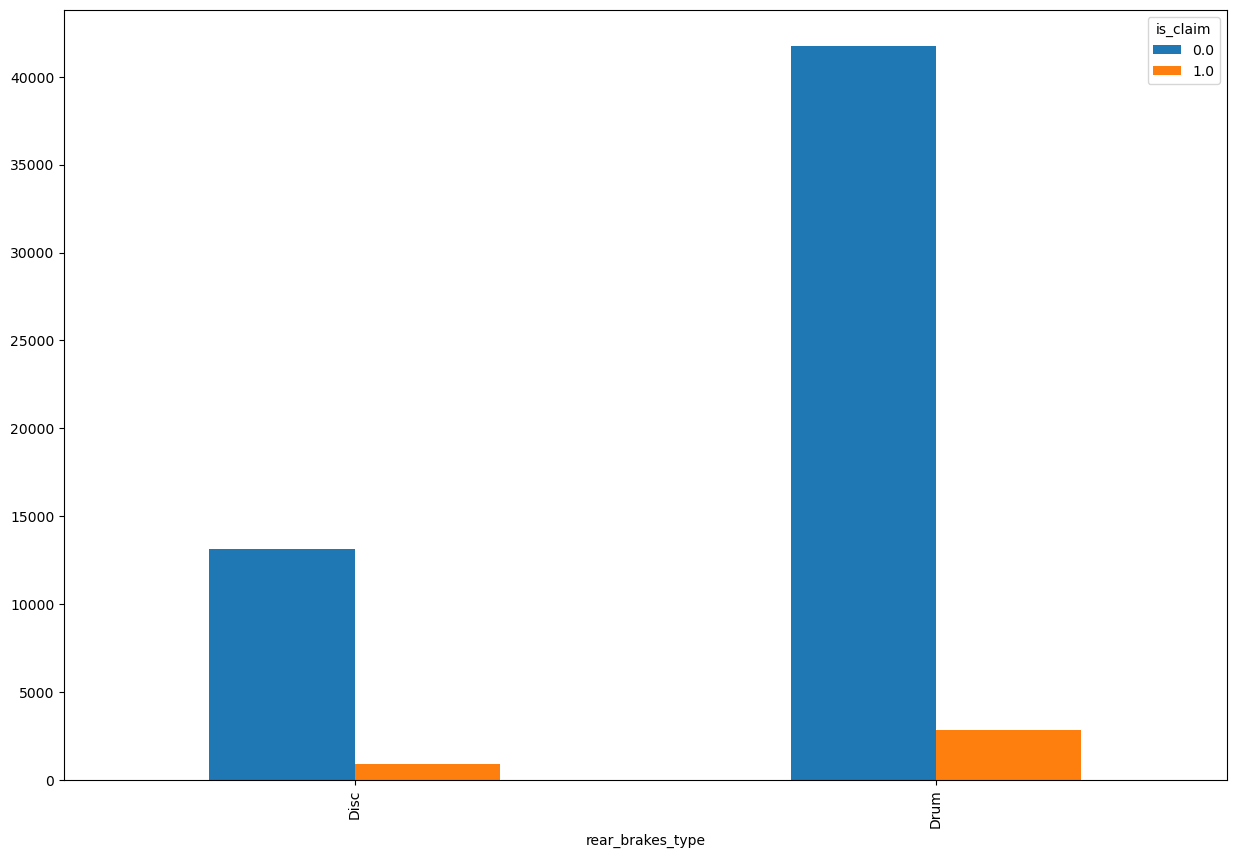

In [26]:
# rear_brakes_type vs is_claim

pd.crosstab(combined.rear_brakes_type, combined.is_claim).plot(kind = "bar")
plt.show()

# Bivariate Analysis:

# Cat vs Cat

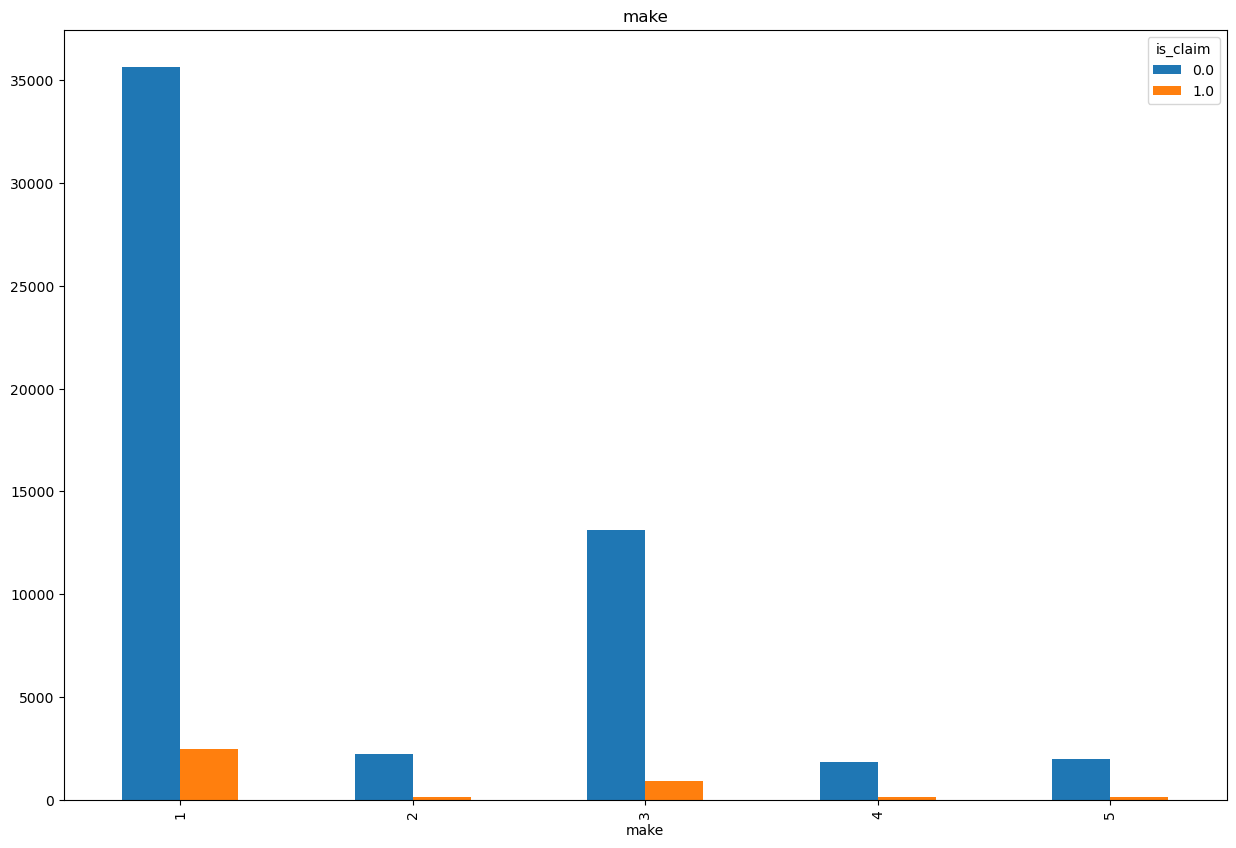

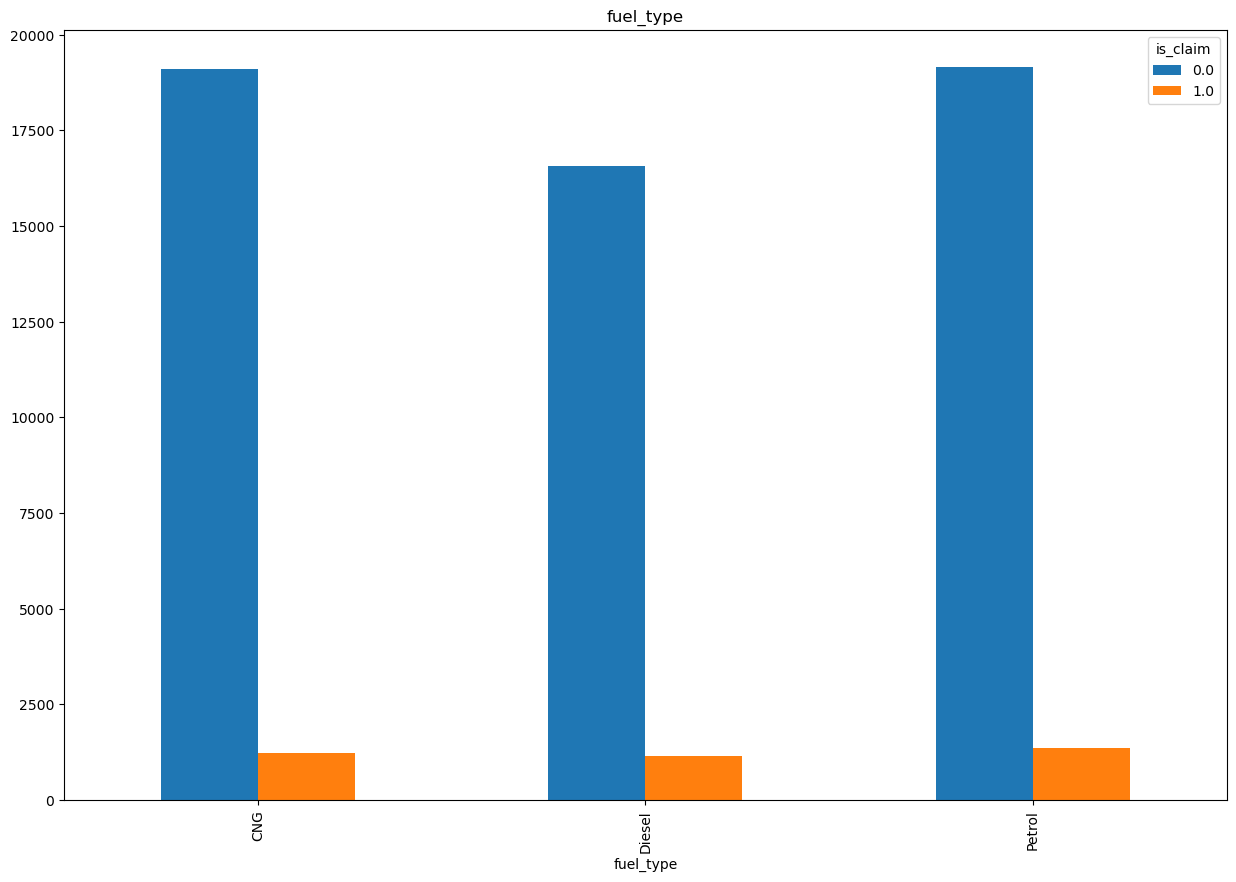

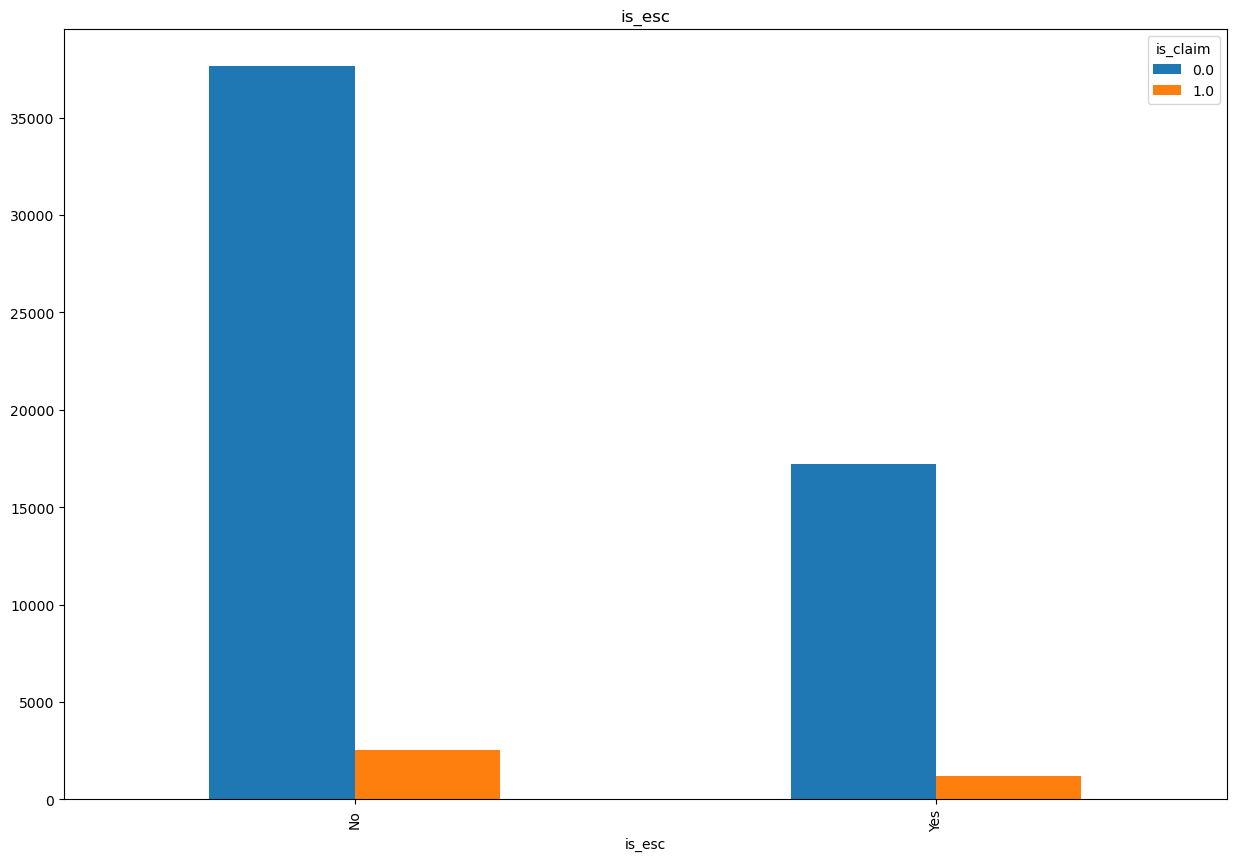

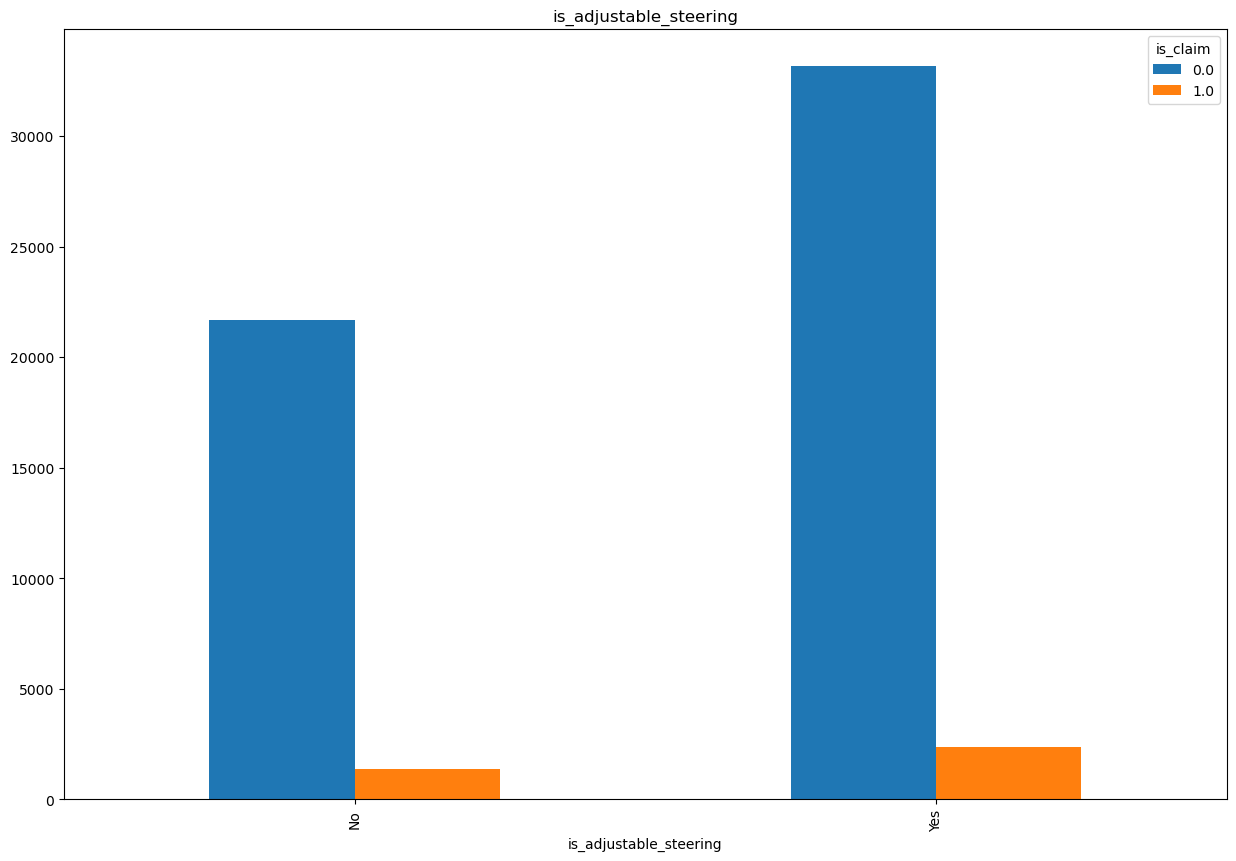

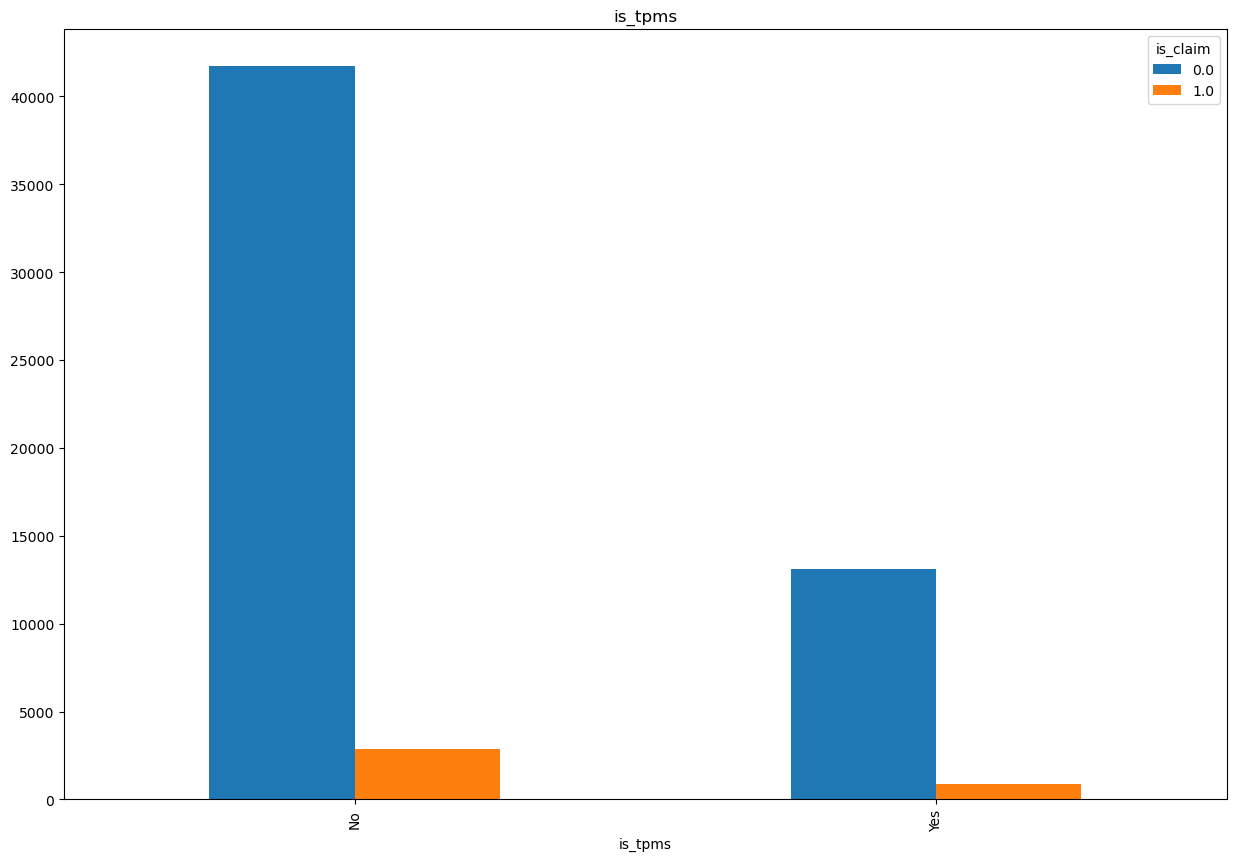

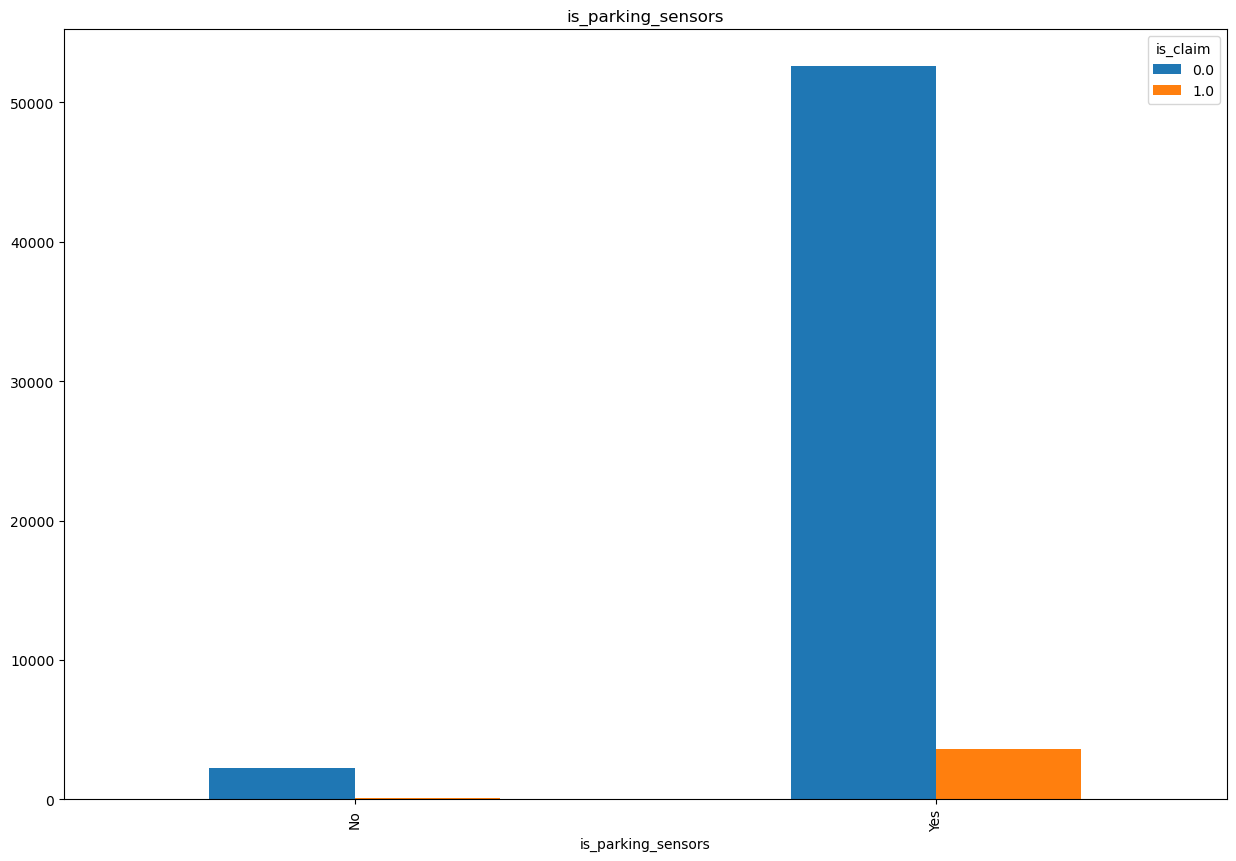

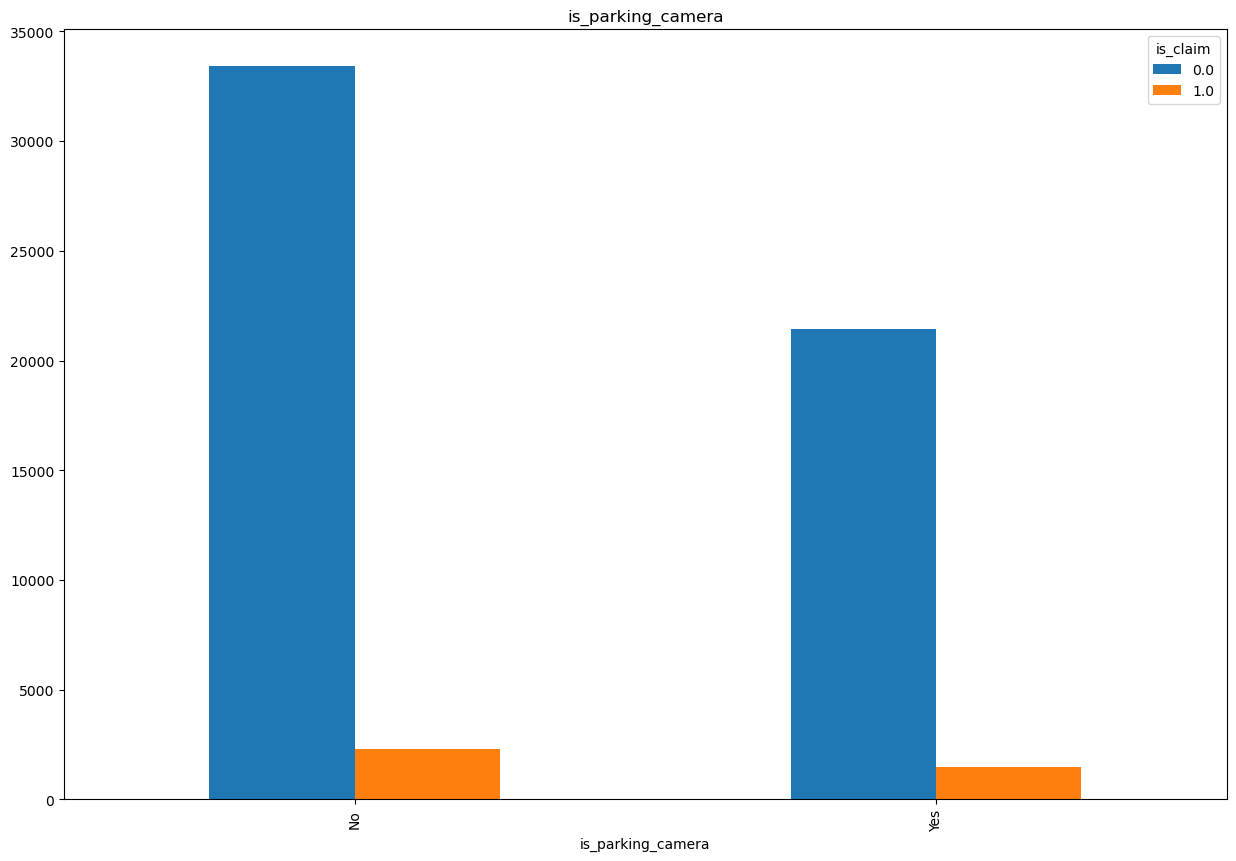

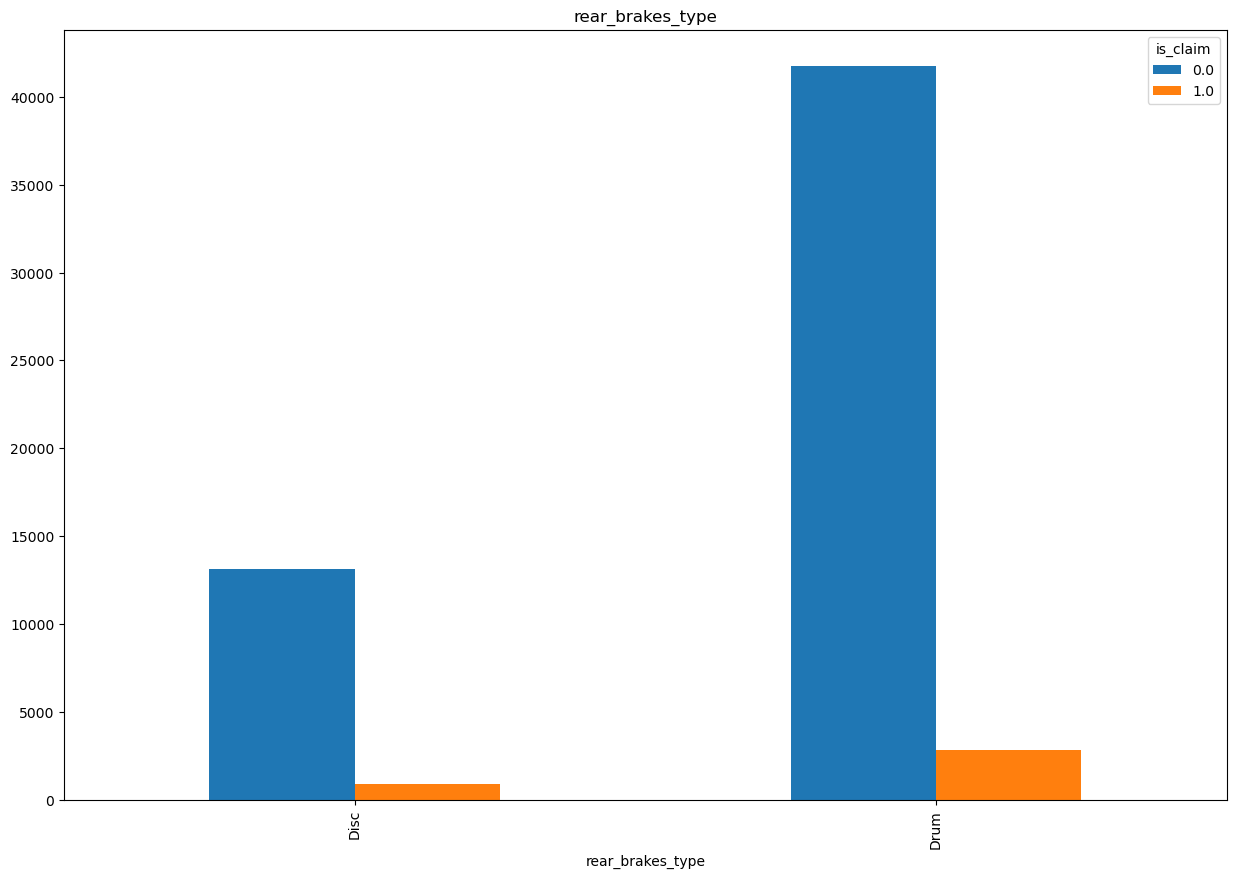

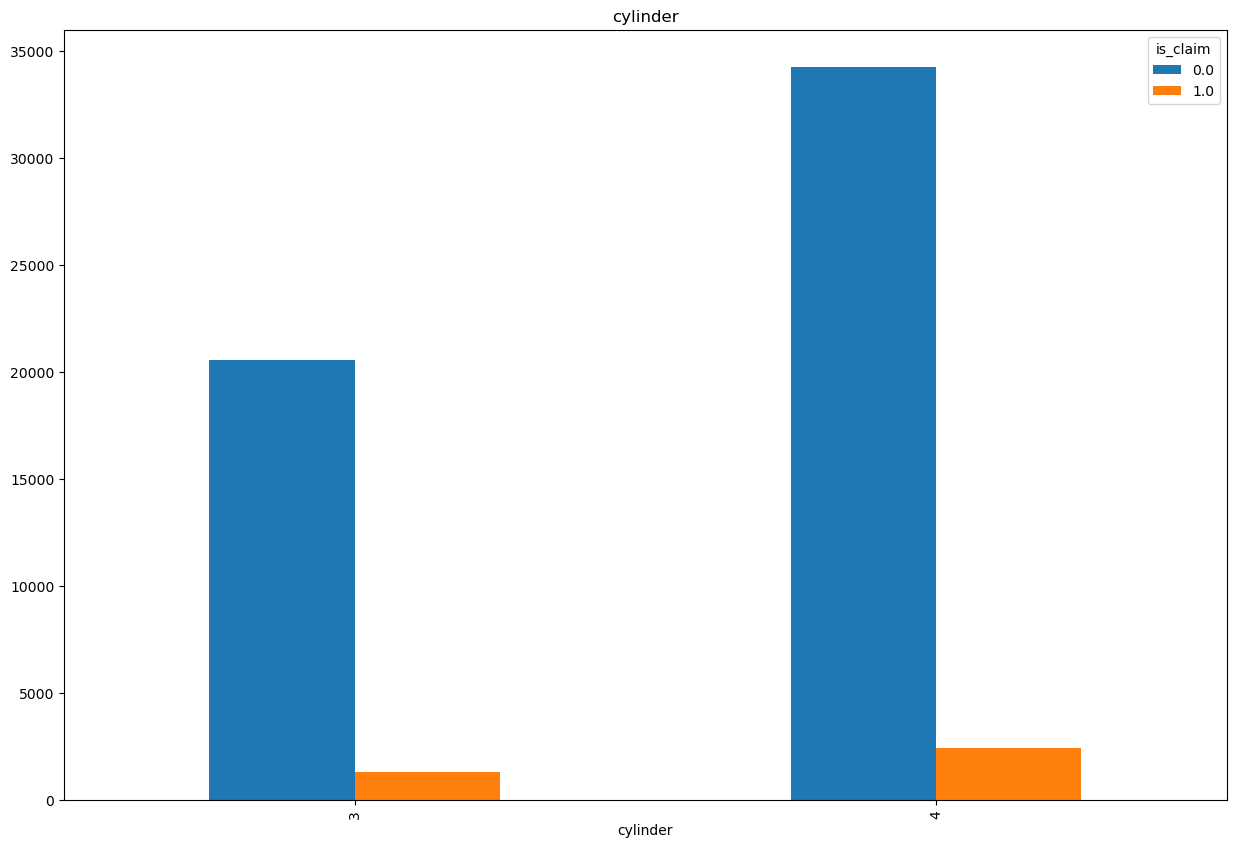

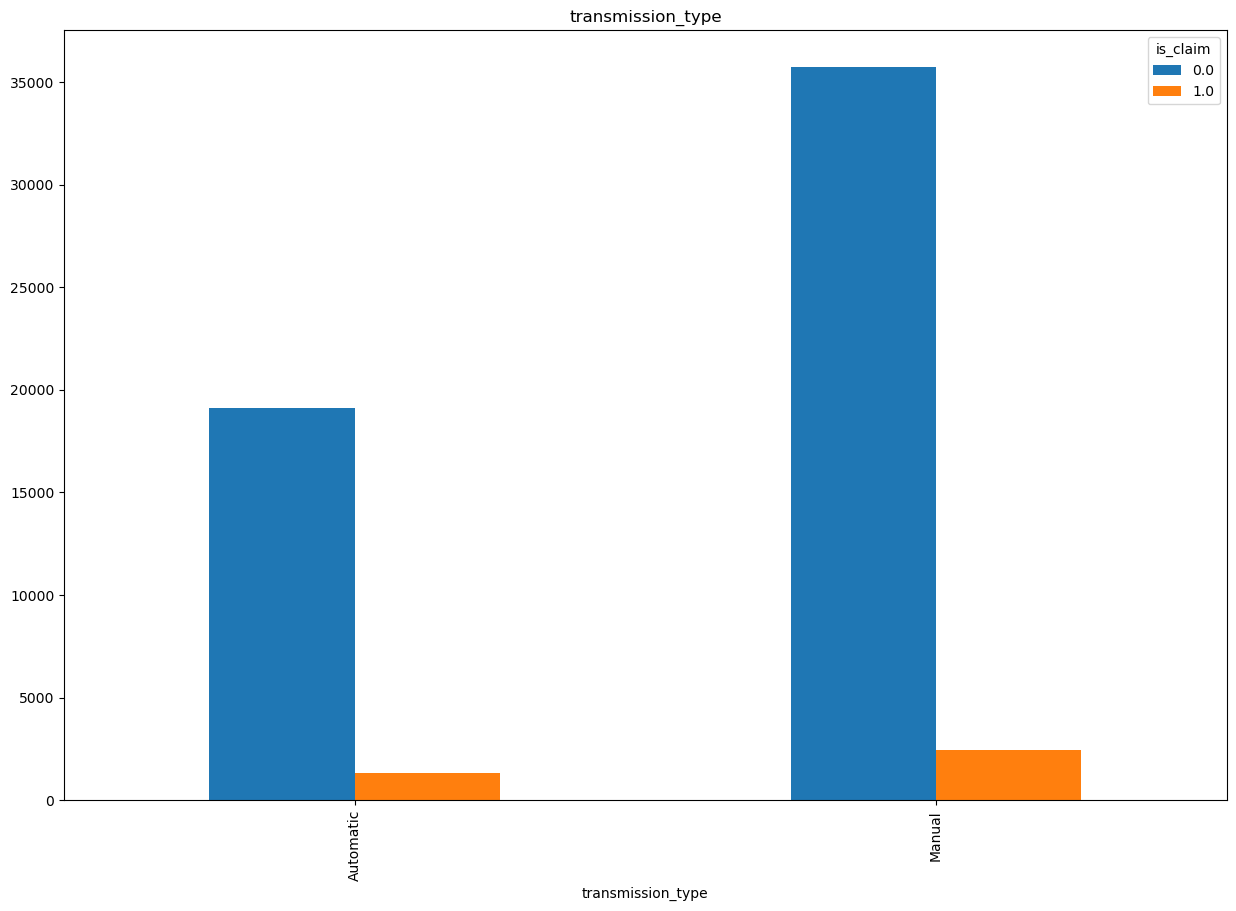

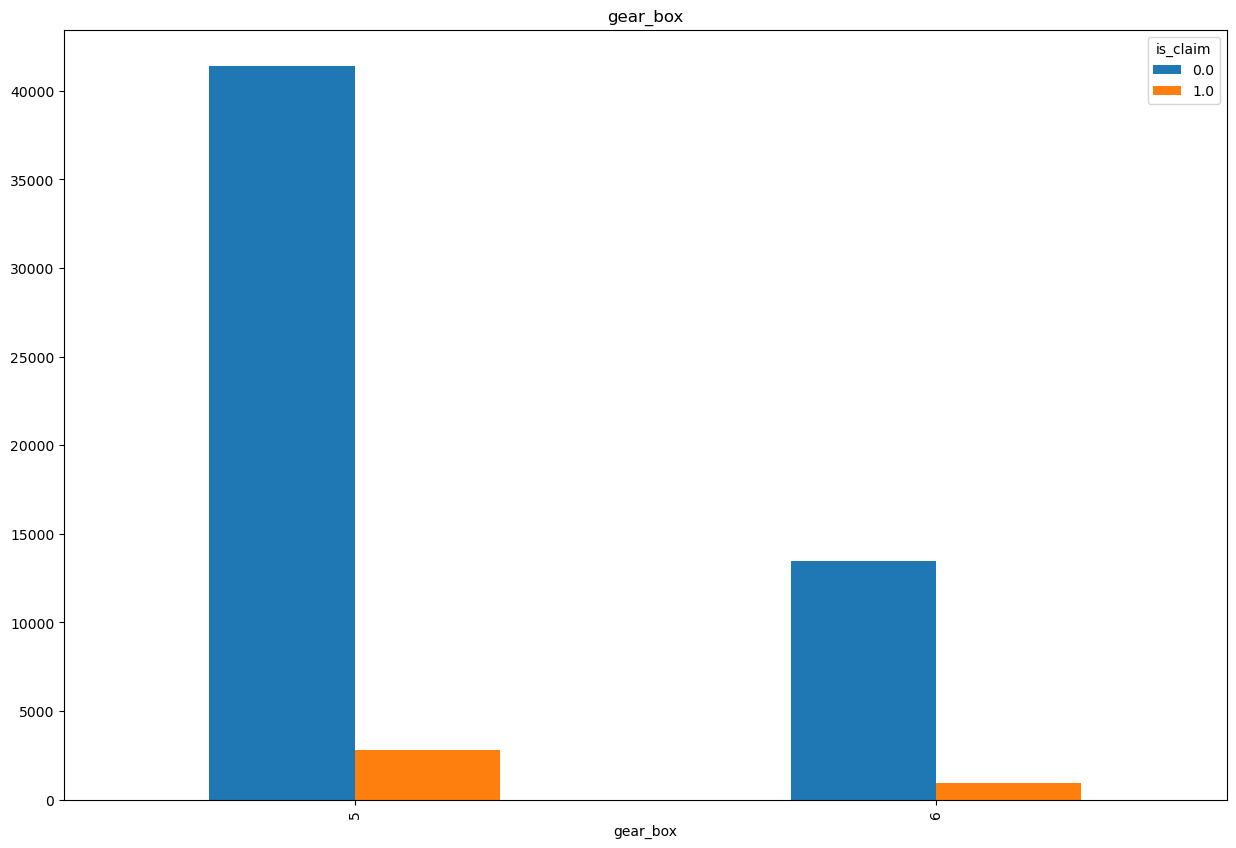

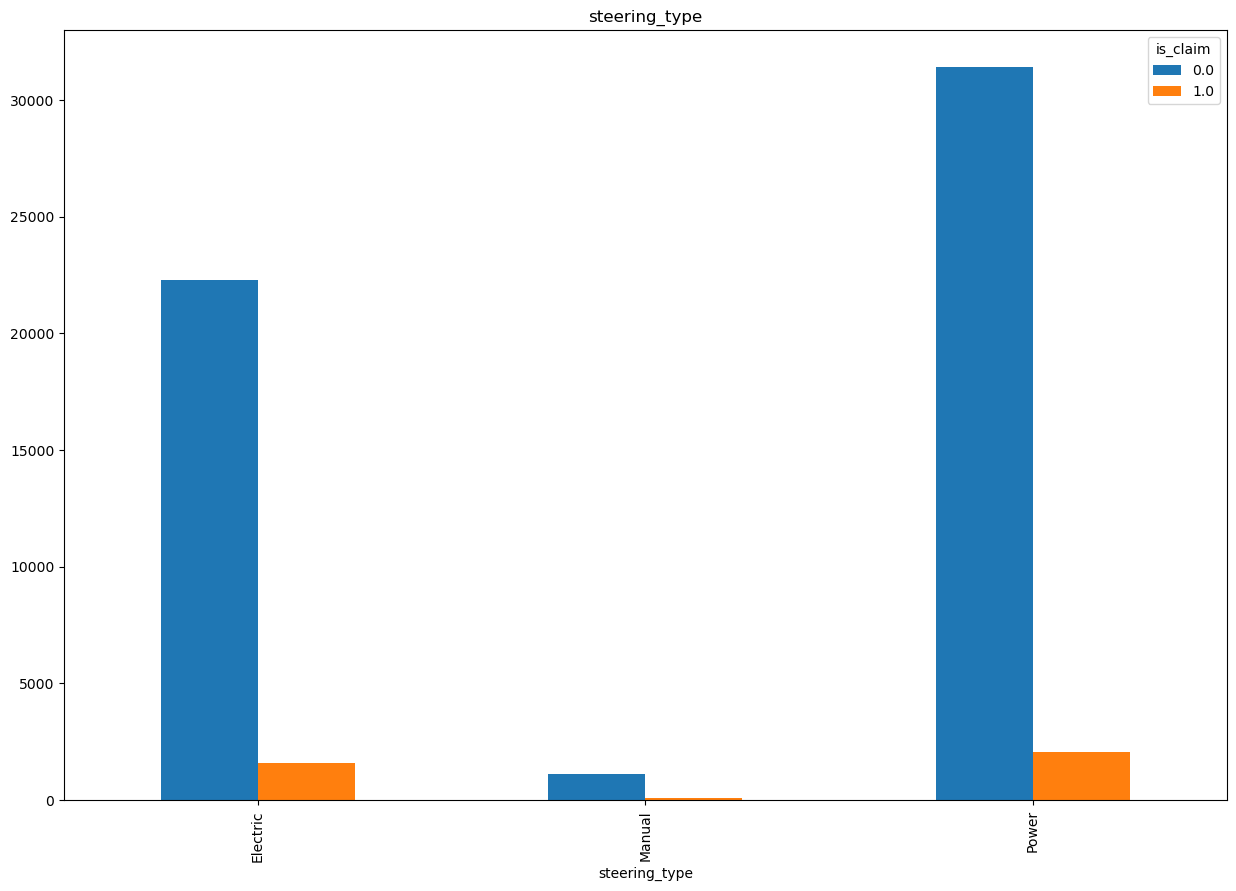

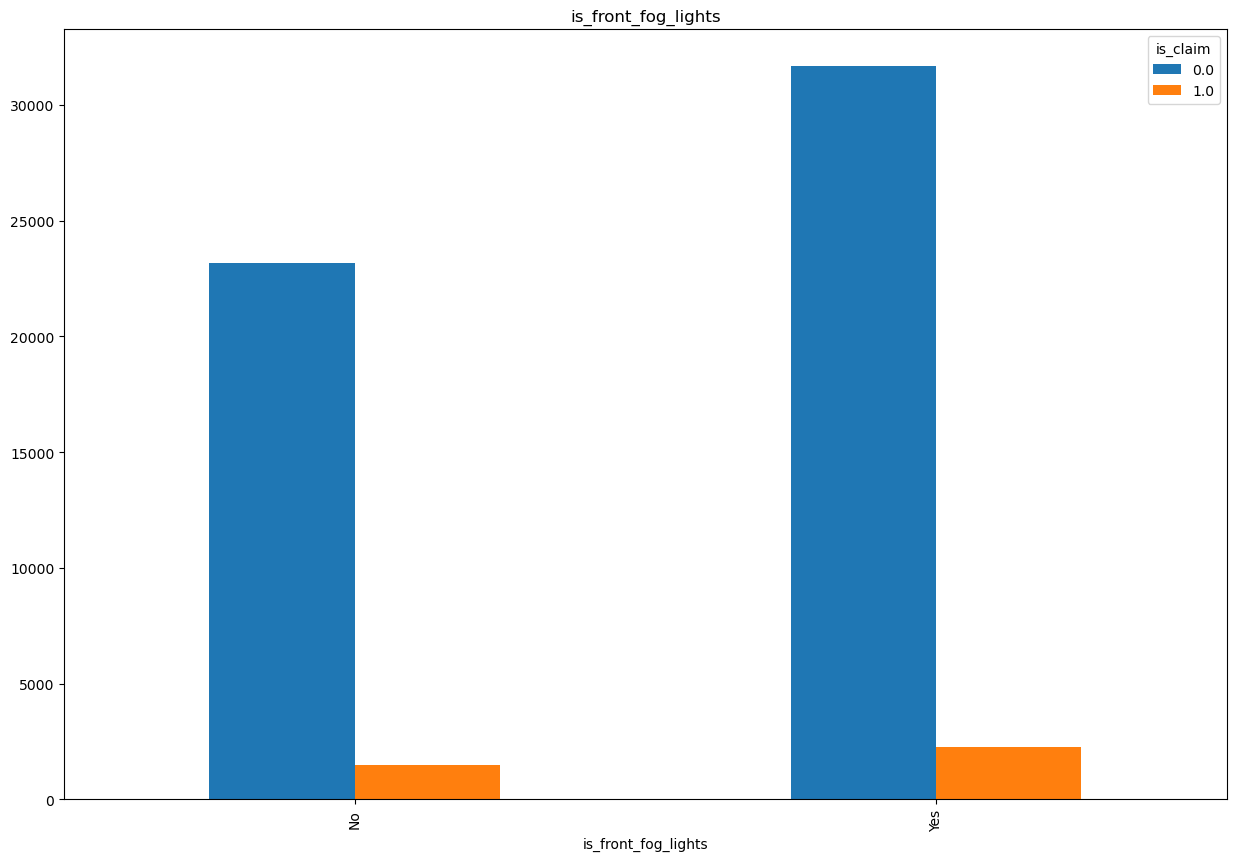

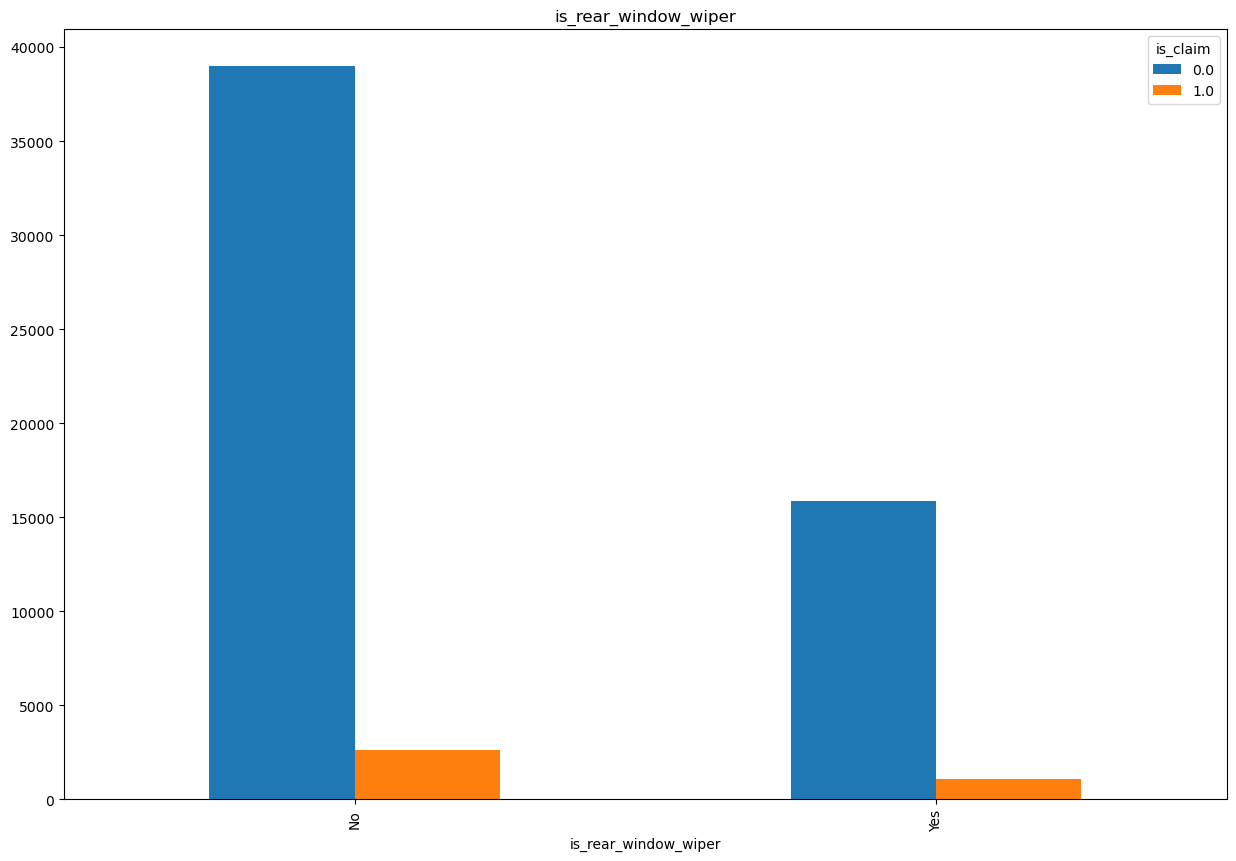

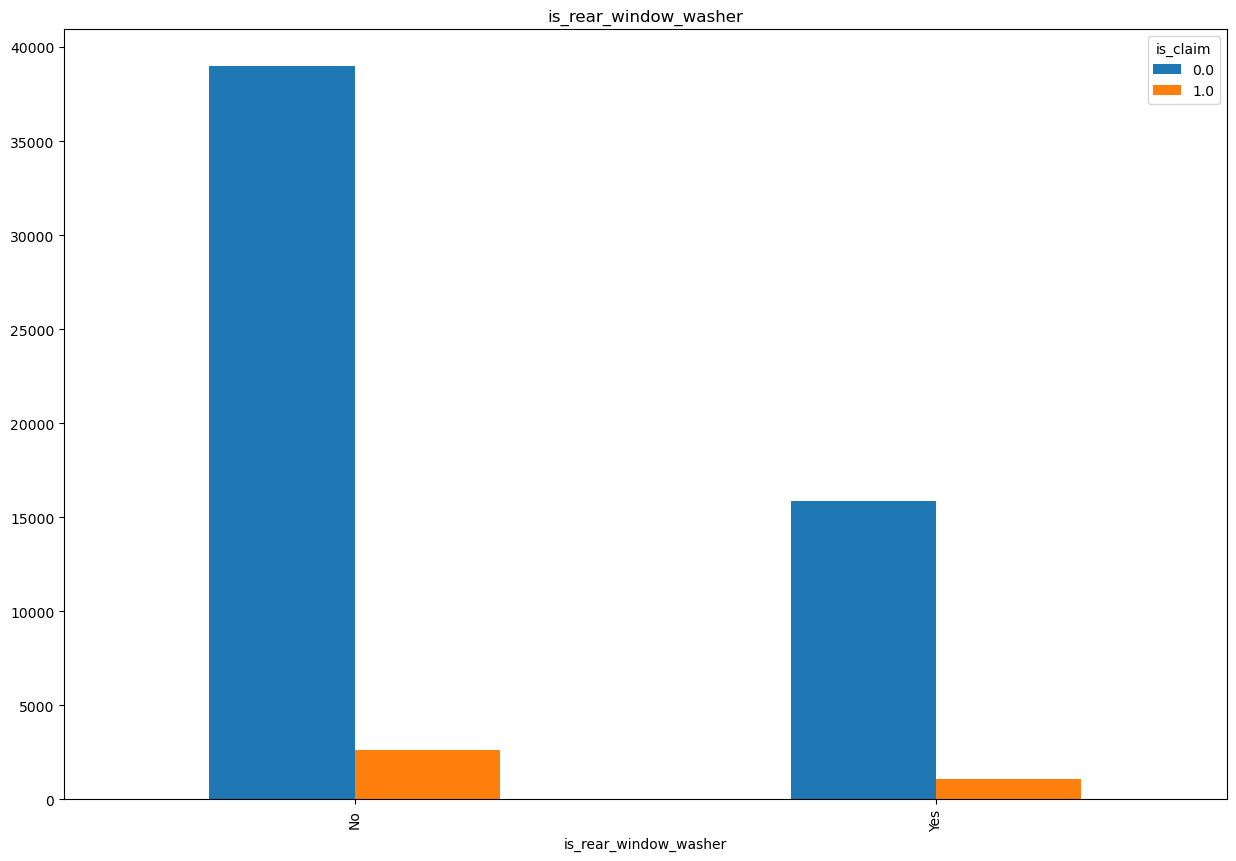

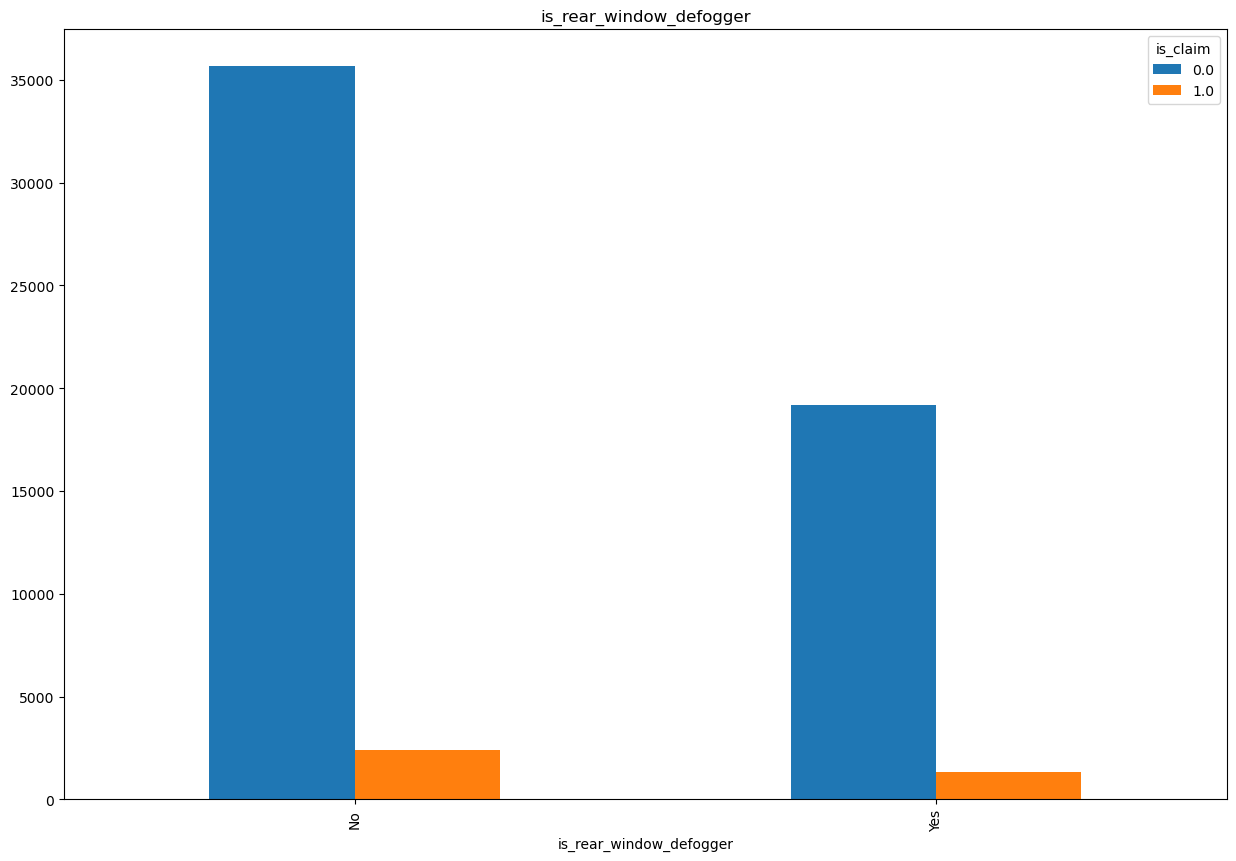

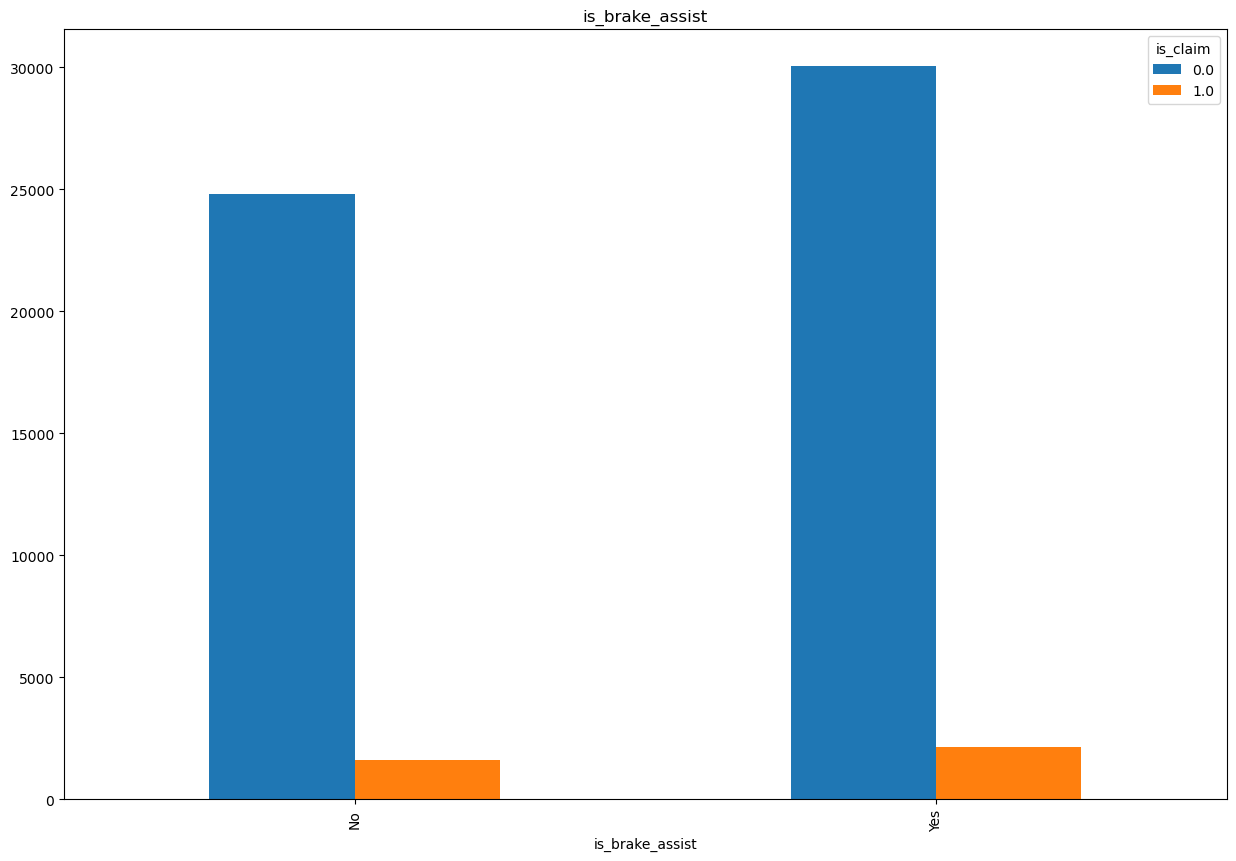

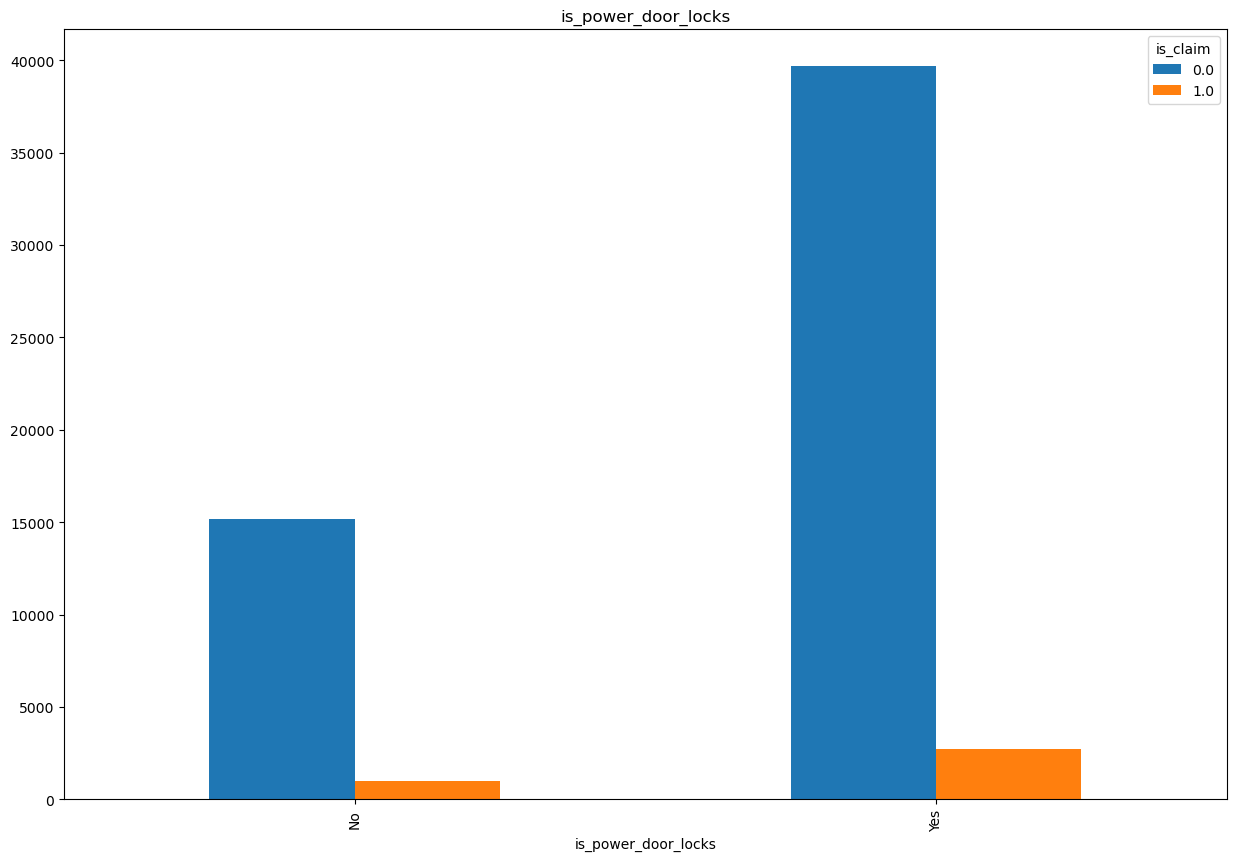

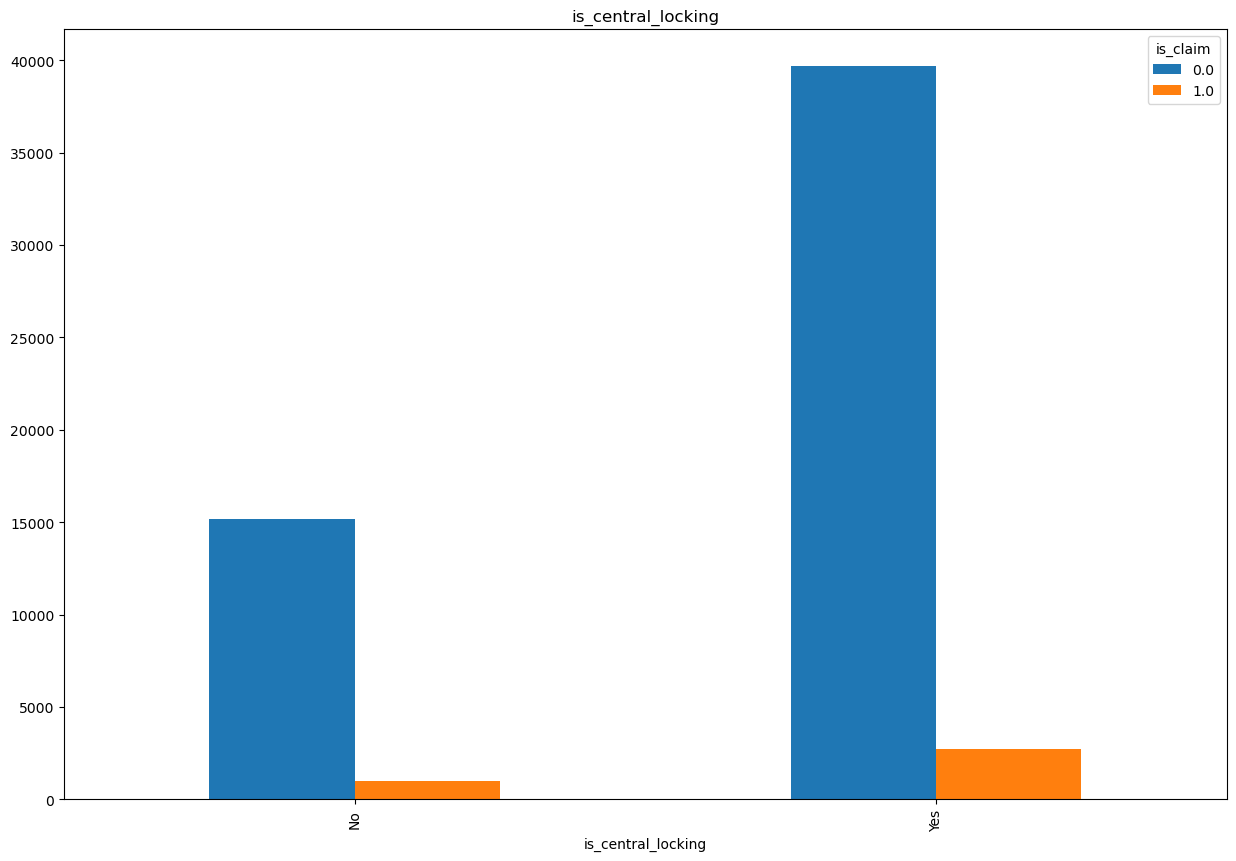

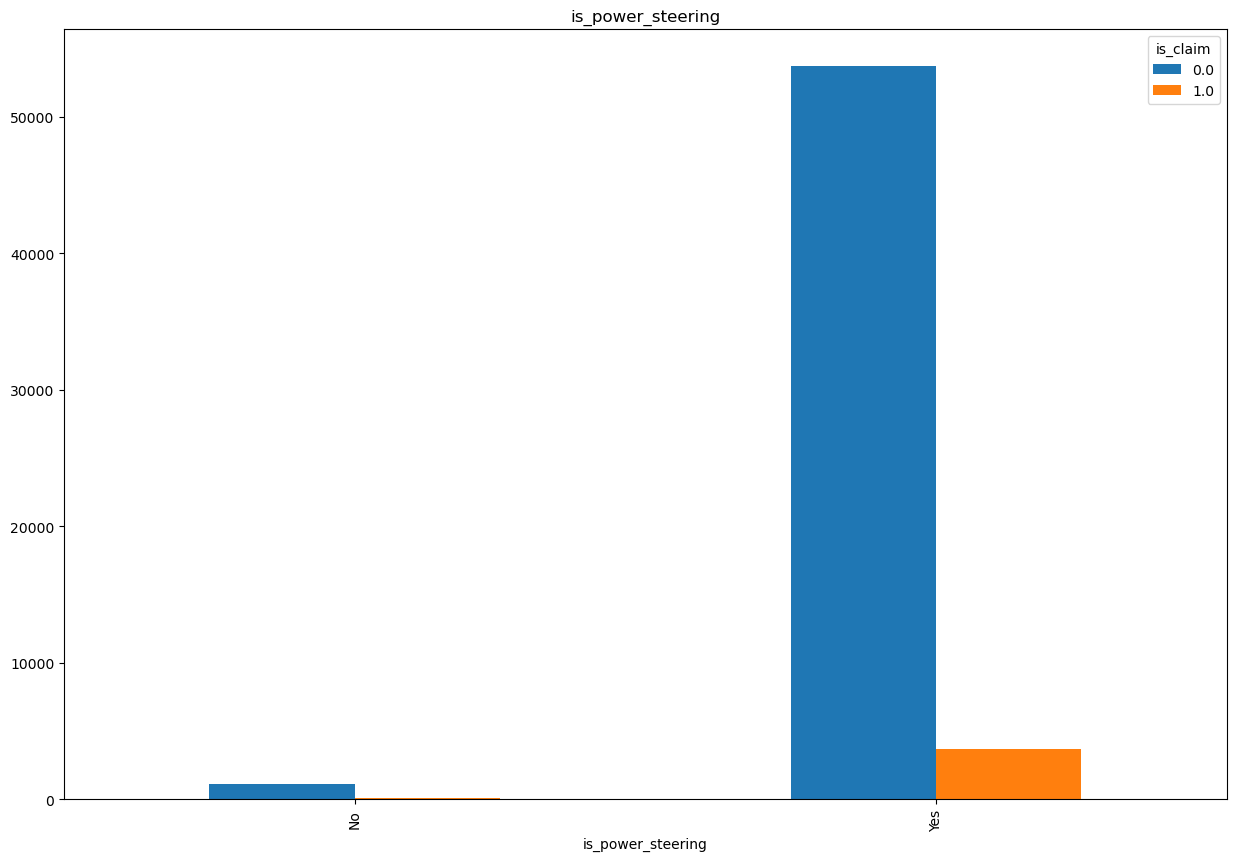

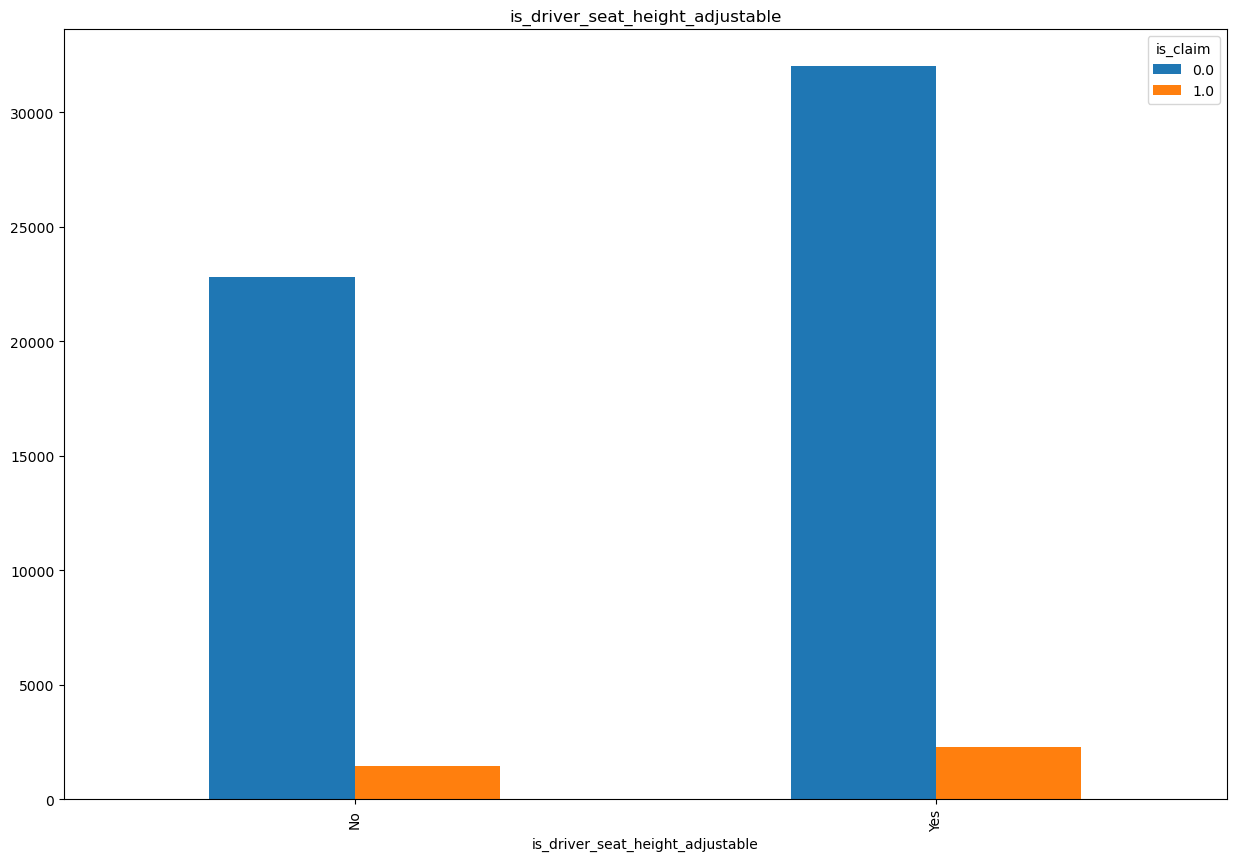

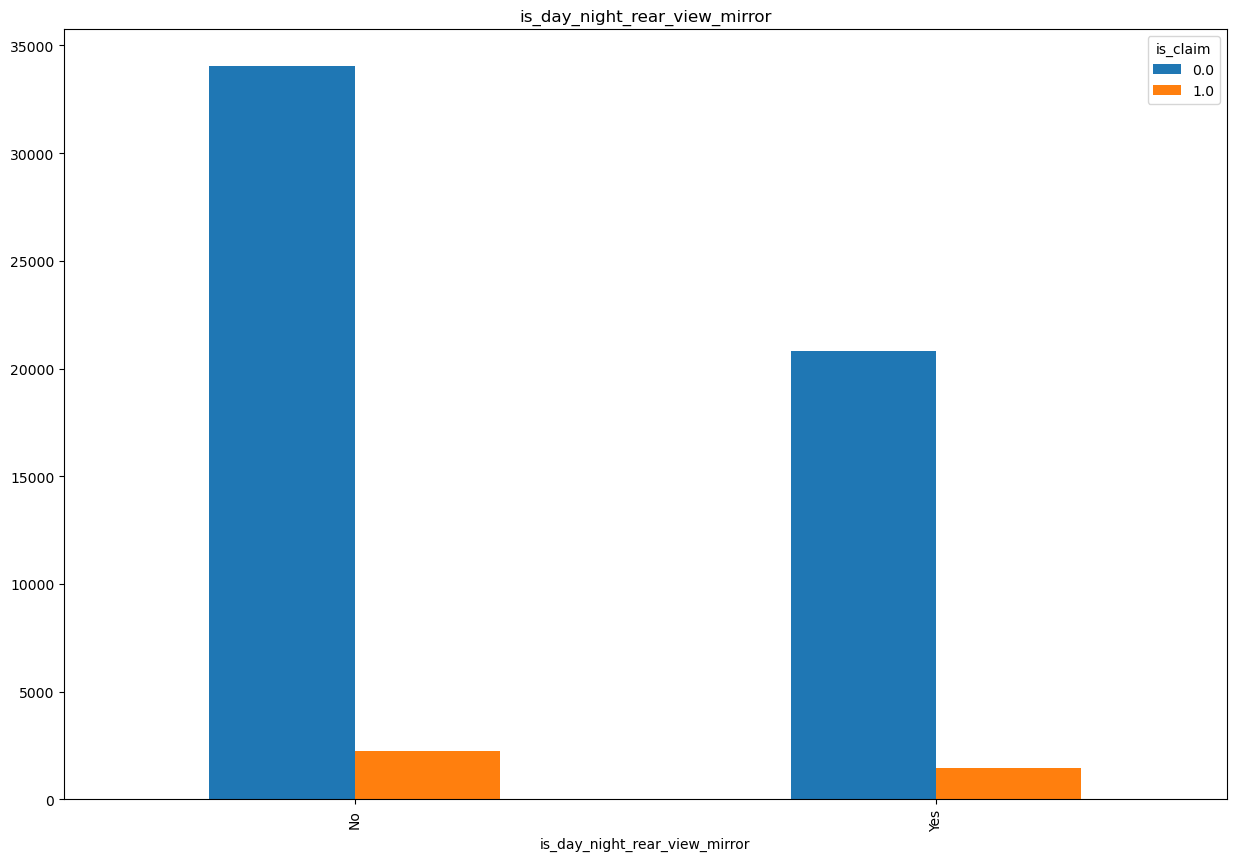

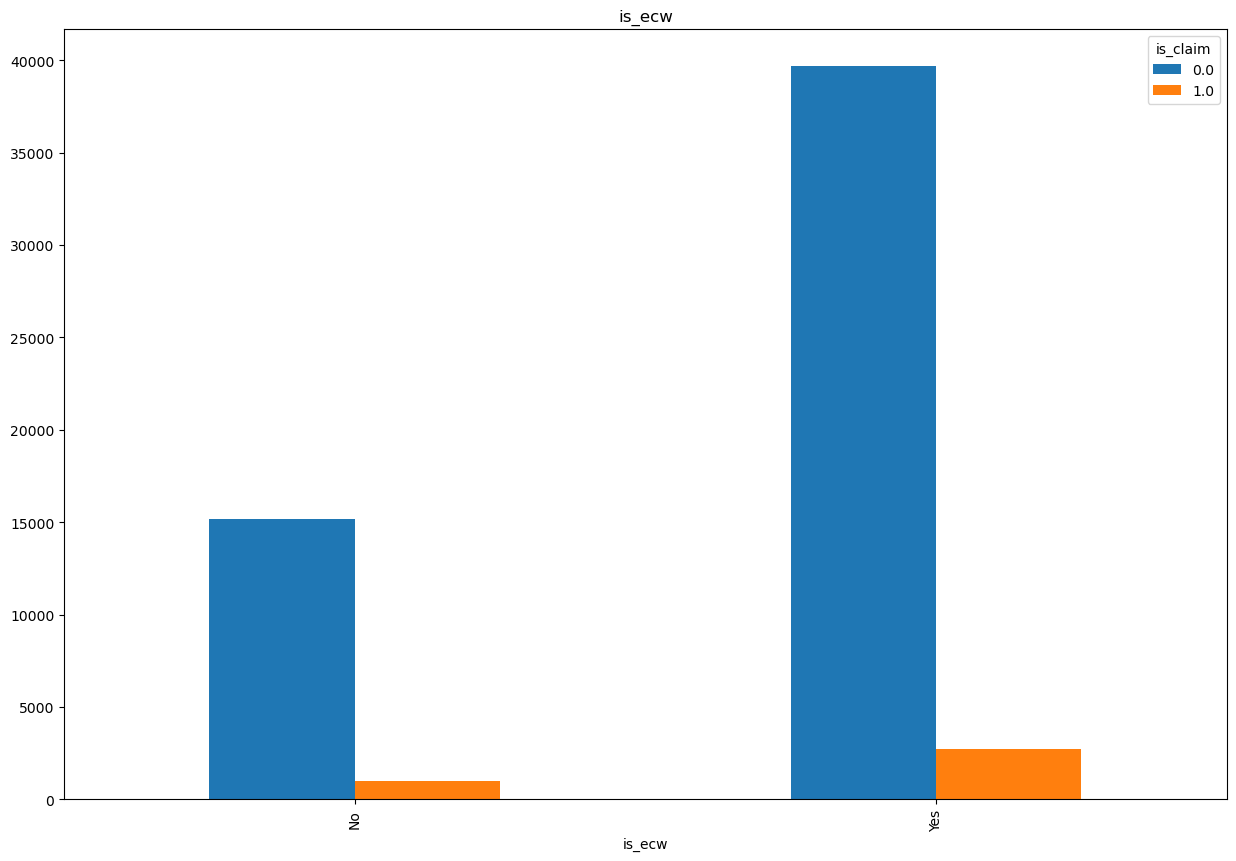

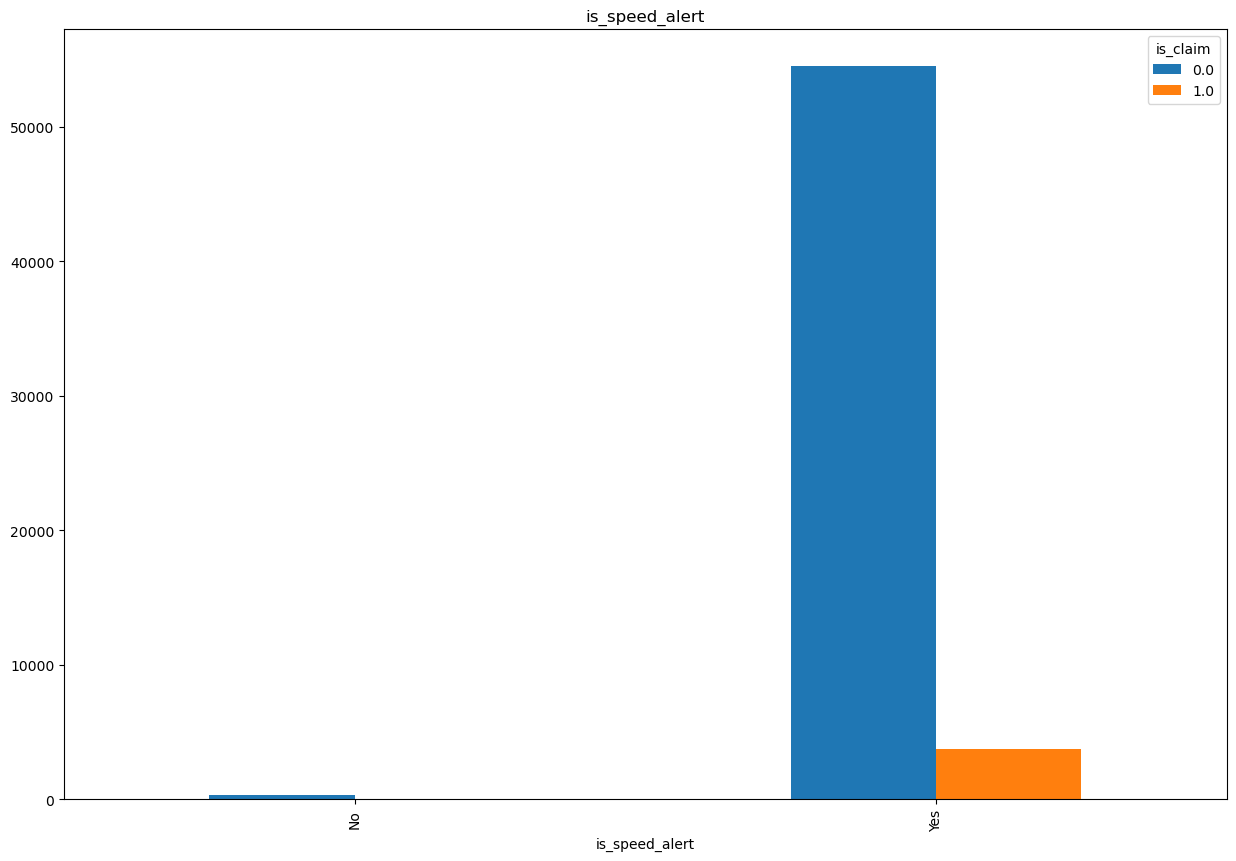

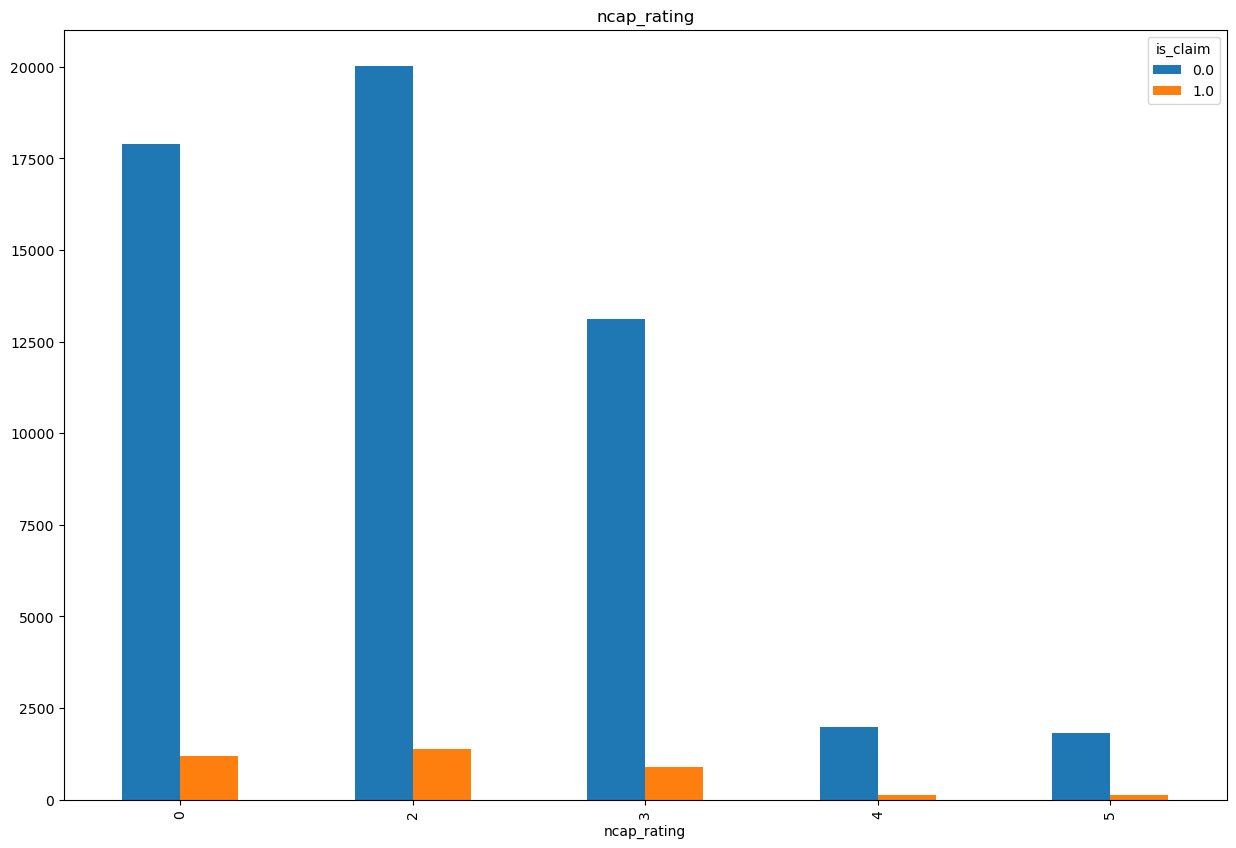

In [27]:
for i in cat_cols:
    pd.crosstab(combined.loc[:,i], combined.is_claim).plot(kind="bar")
    plt.title(i)
    plt.show()

# Statistical Test

In [28]:
# importing libraries

import scipy.stats as stats

In [29]:
category = combined.select_dtypes(include="object")

In [30]:
signif_cats = []

for i in category:
    tbl = pd.crosstab(train.loc[:,i], train.is_claim)
    teststats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
#     print("Pvalue for",i,"is ", pvalue)
    if(pvalue<0.05):
        print(i)
        signif_cats.append(i)

area_cluster
segment
model
max_torque
max_power
engine_type
is_adjustable_steering
is_parking_sensors
cylinder
is_front_fog_lights
is_brake_assist
is_driver_seat_height_adjustable


In [31]:
num_cols = combined.select_dtypes(include=np.number).columns

In [32]:
len(num_cols)

12

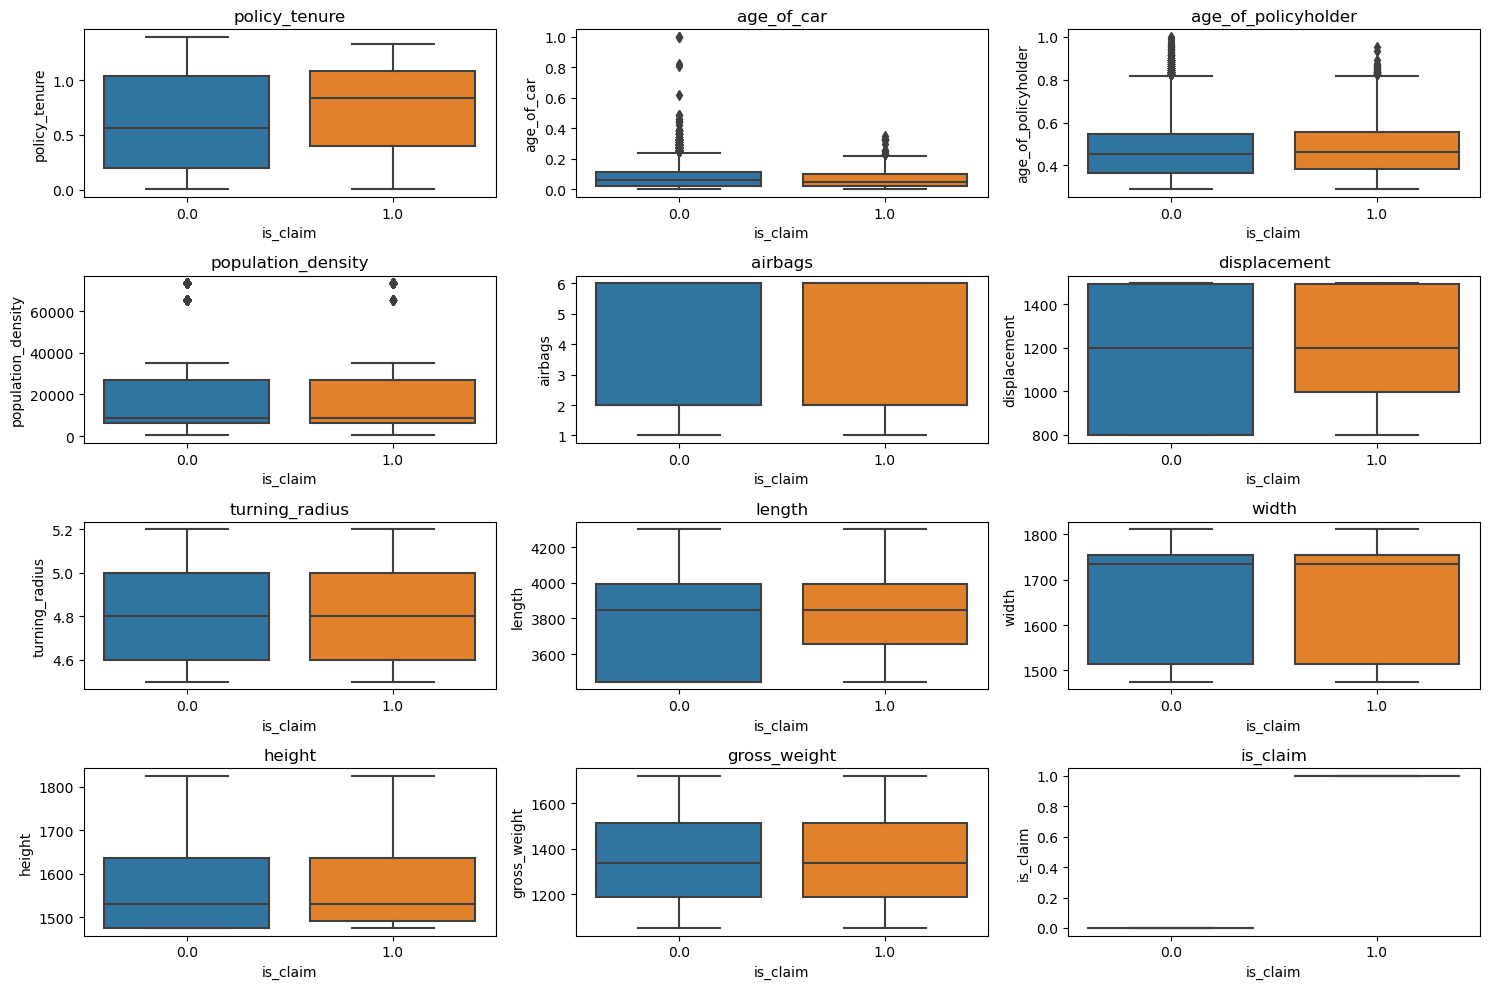

In [33]:
nrows = 4
ncols = 3
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined.is_claim, combined.loc[:,i])
    plt.title(i)
    iterator +=1
plt.tight_layout()
plt.show()

# Statistical test on Numerical vs Target variable (categorical)

In [34]:
signif_num = []

for i in num_cols:
    zero = train.loc[train.is_claim==0,i]
    one = train.loc[train.is_claim==1,i]
    teststats, pvalue = stats.ttest_ind(zero, one)
    if pvalue<0.05:
        signif_num.append(i)
        print(i)

policy_tenure
age_of_car
age_of_policyholder
population_density
width
is_claim


In [35]:
#consolidate all the features...

finaldata = combined.loc[:,signif_cats+signif_num]

In [36]:
finaldata.columns

Index(['area_cluster', 'segment', 'model', 'max_torque', 'max_power',
       'engine_type', 'is_adjustable_steering', 'is_parking_sensors',
       'cylinder', 'is_front_fog_lights', 'is_brake_assist',
       'is_driver_seat_height_adjustable', 'policy_tenure', 'age_of_car',
       'age_of_policyholder', 'population_density', 'width', 'is_claim'],
      dtype='object')

# Feature Engineering

In [37]:
finaldata.head()

area_cluster segment model     max_torque         max_power  \
0           C1       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
1           C2       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
2           C3       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
3           C4      C1    M2  113Nm@4400rpm  88.50bhp@6000rpm   
4           C5       A    M3   91Nm@4250rpm  67.06bhp@5500rpm   

          engine_type is_adjustable_steering is_parking_sensors cylinder  \
0   F8D Petrol Engine                     No                Yes        3   
1   F8D Petrol Engine                     No                Yes        3   
2   F8D Petrol Engine                     No                Yes        3   
3  1.2 L K12N Dualjet                    Yes                Yes        4   
4             1.0 SCe                     No                 No        3   

  is_front_fog_lights is_brake_assist is_driver_seat_height_adjustable  \
0                  No              No                               No   
1                  No              No                               No   
2                  No              No                               No   
3                 Yes             Yes                              Yes   
4                  No              No                               No   

   policy_tenure  age_of_car  age_of_policyholder  population_density  width  \
0       0.515874        0.05             0.644231                4990   1515   
1       0.672619        0.02             0.375000               27003   1515   
2       0.841110        0.02             0.384615                4076   1515   
3       0.900277        0.11             0.432692               21622   1735   
4       0.596403        0.11             0.634615               34738   1579   

   is_claim  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

In [38]:
for col in finaldata:
    if col.startswith("is"):
        finaldata[col].replace({"Yes":1, "No" : 0}, inplace =True)

In [39]:
finaldata.head()

area_cluster segment model     max_torque         max_power  \
0           C1       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
1           C2       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
2           C3       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
3           C4      C1    M2  113Nm@4400rpm  88.50bhp@6000rpm   
4           C5       A    M3   91Nm@4250rpm  67.06bhp@5500rpm   

          engine_type  is_adjustable_steering  is_parking_sensors cylinder  \
0   F8D Petrol Engine                       0                   1        3   
1   F8D Petrol Engine                       0                   1        3   
2   F8D Petrol Engine                       0                   1        3   
3  1.2 L K12N Dualjet                       1                   1        4   
4             1.0 SCe                       0                   0        3   

   is_front_fog_lights  is_brake_assist  is_driver_seat_height_adjustable  \
0                    0                0                                 0   
1                    0                0                                 0   
2                    0                0                                 0   
3                    1                1                                 1   
4                    0                0                                 0   

   policy_tenure  age_of_car  age_of_policyholder  population_density  width  \
0       0.515874        0.05             0.644231                4990   1515   
1       0.672619        0.02             0.375000               27003   1515   
2       0.841110        0.02             0.384615                4076   1515   
3       0.900277        0.11             0.432692               21622   1735   
4       0.596403        0.11             0.634615               34738   1579   

   is_claim  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

In [40]:
# max_torque and max_power 

finaldata[["Nm", "Torque"]] = finaldata.max_torque.str.split("@", expand =True)

In [41]:
finaldata[["bhp", "power"]] = finaldata.max_power.str.split("@", expand =True)

In [42]:
finaldata["Nm"] = finaldata.Nm.apply(lambda x: float(x[:-2]))

In [43]:
finaldata["Torque"] = finaldata.Torque.apply(lambda x: float(x[:-3]))

In [44]:
finaldata["bhp"] = finaldata.bhp.apply(lambda x: float(x[:-3]))

In [45]:
finaldata["power"] = finaldata.power.apply(lambda x: float(x[:-3]))

In [46]:
finaldata.head()

area_cluster segment model     max_torque         max_power  \
0           C1       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
1           C2       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
2           C3       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
3           C4      C1    M2  113Nm@4400rpm  88.50bhp@6000rpm   
4           C5       A    M3   91Nm@4250rpm  67.06bhp@5500rpm   

          engine_type  is_adjustable_steering  is_parking_sensors cylinder  \
0   F8D Petrol Engine                       0                   1        3   
1   F8D Petrol Engine                       0                   1        3   
2   F8D Petrol Engine                       0                   1        3   
3  1.2 L K12N Dualjet                       1                   1        4   
4             1.0 SCe                       0                   0        3   

   is_front_fog_lights  is_brake_assist  is_driver_seat_height_adjustable  \
0                    0                0                                 0   
1                    0                0                                 0   
2                    0                0                                 0   
3                    1                1                                 1   
4                    0                0                                 0   

   policy_tenure  age_of_car  age_of_policyholder  population_density  width  \
0       0.515874        0.05             0.644231                4990   1515   
1       0.672619        0.02             0.375000               27003   1515   
2       0.841110        0.02             0.384615                4076   1515   
3       0.900277        0.11             0.432692               21622   1735   
4       0.596403        0.11             0.634615               34738   1579   

   is_claim     Nm  Torque    bhp   power  
0       0.0   60.0  3500.0  40.36  6000.0  
1       0.0   60.0  3500.0  40.36  6000.0  
2       0.0   60.0  3500.0  40.36  6000.0  
3       0.0  113.0  4400.0  88.50  6000.0  
4       0.0   91.0  4250.0  67.06  5500.0

In [47]:
# Normalize => width, np, torque, bhp, power &  pop_density

In [48]:
# To calculate Speed~RPM = (30*Power)/(3.14*Torque)

finaldata["speed"] = finaldata.Torque/finaldata.Nm

In [49]:
finaldata.head()

area_cluster segment model     max_torque         max_power  \
0           C1       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
1           C2       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
2           C3       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
3           C4      C1    M2  113Nm@4400rpm  88.50bhp@6000rpm   
4           C5       A    M3   91Nm@4250rpm  67.06bhp@5500rpm   

          engine_type  is_adjustable_steering  is_parking_sensors cylinder  \
0   F8D Petrol Engine                       0                   1        3   
1   F8D Petrol Engine                       0                   1        3   
2   F8D Petrol Engine                       0                   1        3   
3  1.2 L K12N Dualjet                       1                   1        4   
4             1.0 SCe                       0                   0        3   

   is_front_fog_lights  is_brake_assist  is_driver_seat_height_adjustable  \
0                    0                0                                 0   
1                    0                0                                 0   
2                    0                0                                 0   
3                    1                1                                 1   
4                    0                0                                 0   

   policy_tenure  age_of_car  age_of_policyholder  population_density  width  \
0       0.515874        0.05             0.644231                4990   1515   
1       0.672619        0.02             0.375000               27003   1515   
2       0.841110        0.02             0.384615                4076   1515   
3       0.900277        0.11             0.432692               21622   1735   
4       0.596403        0.11             0.634615               34738   1579   

   is_claim     Nm  Torque    bhp   power      speed  
0       0.0   60.0  3500.0  40.36  6000.0  58.333333  
1       0.0   60.0  3500.0  40.36  6000.0  58.333333  
2       0.0   60.0  3500.0  40.36  6000.0  58.333333  
3       0.0  113.0  4400.0  88.50  6000.0  38.938053  
4       0.0   91.0  4250.0  67.06  5500.0  46.703297

In [50]:
list_engines = finaldata.engine_type.value_counts(normalize = True)[0:3].index

In [51]:
def engine_types(x):
    if x in list_engines:
        return("Top_3")
    else:
        return("Others")

In [52]:
finaldata["engine_types_top3"] = finaldata.engine_type.apply(engine_types)

In [53]:
finaldata.head()

area_cluster segment model     max_torque         max_power  \
0           C1       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
1           C2       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
2           C3       A    M1   60Nm@3500rpm  40.36bhp@6000rpm   
3           C4      C1    M2  113Nm@4400rpm  88.50bhp@6000rpm   
4           C5       A    M3   91Nm@4250rpm  67.06bhp@5500rpm   

          engine_type  is_adjustable_steering  is_parking_sensors cylinder  \
0   F8D Petrol Engine                       0                   1        3   
1   F8D Petrol Engine                       0                   1        3   
2   F8D Petrol Engine                       0                   1        3   
3  1.2 L K12N Dualjet                       1                   1        4   
4             1.0 SCe                       0                   0        3   

   is_front_fog_lights  is_brake_assist  is_driver_seat_height_adjustable  \
0                    0                0                                 0   
1                    0                0                                 0   
2                    0                0                                 0   
3                    1                1                                 1   
4                    0                0                                 0   

   policy_tenure  age_of_car  age_of_policyholder  population_density  width  \
0       0.515874        0.05             0.644231                4990   1515   
1       0.672619        0.02             0.375000               27003   1515   
2       0.841110        0.02             0.384615                4076   1515   
3       0.900277        0.11             0.432692               21622   1735   
4       0.596403        0.11             0.634615               34738   1579   

   is_claim     Nm  Torque    bhp   power      speed engine_types_top3  
0       0.0   60.0  3500.0  40.36  6000.0  58.333333             Top_3  
1       0.0   60.0  3500.0  40.36  6000.0  58.333333             Top_3  
2       0.0   60.0  3500.0  40.36  6000.0  58.333333             Top_3  
3       0.0  113.0  4400.0  88.50  6000.0  38.938053            Others  
4       0.0   91.0  4250.0  67.06  5500.0  46.703297            Others

In [54]:
finaldata.shape

(97655, 24)

In [55]:
finaldata.drop(["max_torque","max_power","engine_type"],axis =1, inplace=True)

# Split the data into Train and Test

In [56]:
newtrain = finaldata.loc[0:train.shape[0]-1,:]
newtest = finaldata.loc[train.shape[0]:,:]

In [57]:
train.shape, test.shape, newtrain.shape, newtest.shape

((58592, 44), (39063, 43), (58592, 21), (39063, 21))

In [58]:
# Drop the Target from newtest

In [59]:
!pip install category-encoders

In [60]:
import category_encoders as ce

In [61]:
newtest = newtest.drop("is_claim",axis = 1)

In [62]:
tgt_encoding = ce.TargetEncoder(['area_cluster', 'segment', 'model'])

X = newtrain.drop("is_claim",axis = 1)
y = newtrain.is_claim

In [63]:
newx = tgt_encoding.fit_transform(X,y)

In [64]:
newtest = tgt_encoding.transform(newtest)

In [65]:
newx = pd.get_dummies(newx,drop_first=True)
newtest = pd.get_dummies(newtest,drop_first=True)

In [66]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler() 

In [68]:
list_cols = ["population_density","width","Nm","Torque","bhp","power","speed"]

In [69]:
for i in list_cols:
    newx.loc[:,i] = sc.fit_transform(pd.DataFrame(newx.loc[:,i]))
    newtest.loc[:,i] = sc.transform(pd.DataFrame(newtest.loc[:,i]))

In [70]:
newx.head()

area_cluster   segment     model  is_adjustable_steering  \
0      0.051771  0.060389  0.061413                       0   
1      0.070825  0.060389  0.061413                       0   
2      0.070972  0.060389  0.061413                       0   
3      0.076692  0.064099  0.074074                       1   
4      0.057745  0.060389  0.053940                       0   

   is_parking_sensors  cylinder  is_front_fog_lights  is_brake_assist  \
0                   1  0.059706                    0                0   
1                   1  0.059706                    0                0   
2                   1  0.059706                    0                0   
3                   1  0.066503                    1                1   
4                   0  0.059706                    0                0   

   is_driver_seat_height_adjustable  policy_tenure  age_of_car  \
0                                 0       0.515874        0.05   
1                                 0       0.672619        0.02   
2                                 0       0.841110        0.02   
3                                 1       0.900277        0.11   
4                                 0       0.596403        0.11   

   age_of_policyholder  population_density     width        Nm    Torque  \
0             0.644231           -0.783513 -1.402768 -1.017838 -0.045700   
1             0.375000            0.462975 -1.402768 -1.017838 -0.045700   
2             0.384615           -0.835268 -1.402768 -1.017838 -0.045700   
3             0.432692            0.158275  0.559973 -0.293261  1.194047   
4             0.634615            0.900969 -0.831789 -0.594029  0.987423   

        bhp     power     speed  engine_types_top3  
0 -1.394156  0.755743  1.249354           0.064527  
1 -1.394156  0.755743  1.249354           0.064527  
2 -1.394156  0.755743  1.249354           0.064527  
3  0.343811  0.755743  0.174937           0.062461  
4 -0.430223  0.210345  0.605099           0.062461

# Modeling

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
xgb = XGBClassifier()

In [73]:
# Initiate the KFold

kfold = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=0)

# Tuning The Data as per Smote

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
smote = SMOTE()

newx, y = smote.fit_resample(newx,y)

# Logistic Regression

In [76]:
# pred = []

# for train_index, test_index in kfold.split(newx,y):
#     xtrain = newx.loc[train_index]
#     ytrain = y.loc[train_index]
#     pred.append(logreg.fit(xtrain,ytrain).predict(newtest))
    
# # Submission File.

# finalpred = pd.DataFrame(pred).T.mode(axis = 1)
# submission = pd.DataFrame({"policy_id": test.policy_id, "is_claim": 0})

# submission["is_claim"] = finalpred

# submission.to_csv("LogReg.csv", index = False)

# Decision Tree Classifier

In [77]:
# pred = []

# for train_index, test_index in kfold.split(newx,y):
#     xtrain = newx.loc[train_index]
#     ytrain = y.loc[train_index]
#     pred.append(dtree.fit(xtrain,ytrain).predict(newtest))

# # Submission File
# finalpred = pd.DataFrame(pred).T.mode(axis = 1)
# submission = pd.DataFrame({"policy_id": test.policy_id, "is_claim": 0})

# submission["is_claim"] = finalpred

# submission.to_csv("Tree.csv", index = False)

# Random Forest Classifier

In [78]:
# pred = []

# for train_index, test_index in kfold.split(newx,y):
#     xtrain = newx.loc[train_index]
#     ytrain = y.loc[train_index]
#     pred.append(rf.fit(xtrain,ytrain).predict(newtest))

# # Submission File
# finalpred = pd.DataFrame(pred).T.mode(axis = 1)
# submission = pd.DataFrame({"policy_id": test.policy_id, "is_claim": 0})

# submission["is_claim"] = finalpred

# submission.to_csv("RF.csv", index = False)

# Gradient Boosting Classifier

In [79]:
# pred = []

# for train_index, test_index in kfold.split(newx,y):
#     xtrain = newx.loc[train_index]
#     ytrain = y.loc[train_index]
#     pred.append(gbm.fit(xtrain,ytrain).predict(newtest))

# # Submission File
# finalpred = pd.DataFrame(pred).T.mode(axis = 1)
# submission = pd.DataFrame({"policy_id": test.policy_id, "is_claim": 0})

# submission["is_claim"] = finalpred

# submission.to_csv("GBM.csv", index = False)

# XGBClassifier

In [80]:
# pred = []

# for train_index, test_index in kfold.split(newx,y):
#     xtrain = newx.loc[train_index]
#     ytrain = y.loc[train_index]
#     pred.append(xgb.fit(xtrain,ytrain).predict(newtest))

# # Submission File
# finalpred = pd.DataFrame(pred).T.mode(axis = 1)
# submission = pd.DataFrame({"policy_id": test.policy_id, "is_claim": 0})

# submission["is_claim"] = finalpred

# submission.to_csv("XGB.csv", index = False)

In [81]:
# submission.is_claim.value_counts()

In [82]:
# !pip install catboost

In [83]:
#Cat Boost Classifier

from catboost import CatBoostClassifier

In [84]:
# cboost = CatBoostClassifier(scale_pos_weight=14)

In [85]:
# pred = []

# for train_index, test_index in kfold.split(newx,y):
#     xtrain = newx.loc[train_index]
#     ytrain = y.loc[train_index]
#     pred.append(cboost.fit(xtrain,ytrain).predict(newtest))

# # Submission File
# finalpred = pd.DataFrame(pred).T.mode(axis = 1)
# submission = pd.DataFrame({"policy_id": test.policy_id, "is_claim": 0})

# submission["is_claim"] = finalpred

# submission.to_csv("CatBoost.csv", index = False)

# CatBoost Parameter

In [87]:
from sklearn.model_selection import GridSearchCV

In [91]:
cboost = CatBoostClassifier()

params = [{'learning_rate': [0.01, 0.1, 0.001],
          'depth':[2,4,6,8]}]

grid = GridSearchCV(estimator= cboost,
                    param_grid= params, cv=10)

In [92]:
grid.fit(newx, y)
print(grid.best_params_)

0:	learn: 0.6926592	total: 161ms	remaining: 2m 40s
1:	learn: 0.6921601	total: 168ms	remaining: 1m 23s
2:	learn: 0.6916955	total: 175ms	remaining: 58.1s
3:	learn: 0.6912240	total: 181ms	remaining: 45.1s
4:	learn: 0.6907669	total: 188ms	remaining: 37.3s
5:	learn: 0.6903347	total: 194ms	remaining: 32.2s
6:	learn: 0.6899163	total: 201ms	remaining: 28.5s
7:	learn: 0.6894844	total: 208ms	remaining: 25.8s
8:	learn: 0.6890445	total: 215ms	remaining: 23.7s
9:	learn: 0.6886769	total: 222ms	remaining: 22s
10:	learn: 0.6882501	total: 228ms	remaining: 20.5s
11:	learn: 0.6878375	total: 235ms	remaining: 19.3s
12:	learn: 0.6874061	total: 243ms	remaining: 18.4s
13:	learn: 0.6870202	total: 250ms	remaining: 17.6s
14:	learn: 0.6866334	total: 257ms	remaining: 16.9s
15:	learn: 0.6862476	total: 263ms	remaining: 16.2s
16:	learn: 0.6858857	total: 270ms	remaining: 15.6s
17:	learn: 0.6855148	total: 276ms	remaining: 15.1s
18:	learn: 0.6851224	total: 283ms	remaining: 14.6s
19:	learn: 0.6847917	total: 289ms	remaini

185:	learn: 0.6323972	total: 1.57s	remaining: 6.9s
186:	learn: 0.6321045	total: 1.58s	remaining: 6.89s
187:	learn: 0.6319862	total: 1.59s	remaining: 6.88s
188:	learn: 0.6309834	total: 1.6s	remaining: 6.88s
189:	learn: 0.6307939	total: 1.61s	remaining: 6.87s
190:	learn: 0.6303703	total: 1.62s	remaining: 6.85s
191:	learn: 0.6302231	total: 1.62s	remaining: 6.84s
192:	learn: 0.6299394	total: 1.63s	remaining: 6.82s
193:	learn: 0.6297553	total: 1.64s	remaining: 6.81s
194:	learn: 0.6293785	total: 1.65s	remaining: 6.79s
195:	learn: 0.6292338	total: 1.65s	remaining: 6.78s
196:	learn: 0.6290814	total: 1.66s	remaining: 6.76s
197:	learn: 0.6286792	total: 1.67s	remaining: 6.75s
198:	learn: 0.6285765	total: 1.67s	remaining: 6.73s
199:	learn: 0.6282812	total: 1.68s	remaining: 6.72s
200:	learn: 0.6275117	total: 1.69s	remaining: 6.71s
201:	learn: 0.6270842	total: 1.69s	remaining: 6.69s
202:	learn: 0.6266741	total: 1.7s	remaining: 6.68s
203:	learn: 0.6263144	total: 1.71s	remaining: 6.67s
204:	learn: 0.6

366:	learn: 0.5620112	total: 3.06s	remaining: 5.27s
367:	learn: 0.5615444	total: 3.06s	remaining: 5.26s
368:	learn: 0.5614352	total: 3.07s	remaining: 5.26s
369:	learn: 0.5613575	total: 3.08s	remaining: 5.25s
370:	learn: 0.5609134	total: 3.09s	remaining: 5.24s
371:	learn: 0.5605690	total: 3.1s	remaining: 5.23s
372:	learn: 0.5603433	total: 3.1s	remaining: 5.22s
373:	learn: 0.5601482	total: 3.11s	remaining: 5.21s
374:	learn: 0.5597052	total: 3.12s	remaining: 5.2s
375:	learn: 0.5595011	total: 3.13s	remaining: 5.19s
376:	learn: 0.5591654	total: 3.13s	remaining: 5.18s
377:	learn: 0.5582612	total: 3.14s	remaining: 5.17s
378:	learn: 0.5579916	total: 3.15s	remaining: 5.16s
379:	learn: 0.5570801	total: 3.15s	remaining: 5.15s
380:	learn: 0.5568643	total: 3.16s	remaining: 5.14s
381:	learn: 0.5559700	total: 3.17s	remaining: 5.13s
382:	learn: 0.5555242	total: 3.18s	remaining: 5.12s
383:	learn: 0.5553231	total: 3.18s	remaining: 5.11s
384:	learn: 0.5544878	total: 3.19s	remaining: 5.1s
385:	learn: 0.55

532:	learn: 0.5046401	total: 4.29s	remaining: 3.76s
533:	learn: 0.5044813	total: 4.3s	remaining: 3.76s
534:	learn: 0.5042336	total: 4.31s	remaining: 3.75s
535:	learn: 0.5041662	total: 4.32s	remaining: 3.74s
536:	learn: 0.5033999	total: 4.33s	remaining: 3.73s
537:	learn: 0.5030259	total: 4.34s	remaining: 3.73s
538:	learn: 0.5029432	total: 4.34s	remaining: 3.72s
539:	learn: 0.5028899	total: 4.35s	remaining: 3.71s
540:	learn: 0.5024931	total: 4.36s	remaining: 3.7s
541:	learn: 0.5021536	total: 4.37s	remaining: 3.69s
542:	learn: 0.5016165	total: 4.38s	remaining: 3.69s
543:	learn: 0.5015489	total: 4.38s	remaining: 3.67s
544:	learn: 0.5008463	total: 4.39s	remaining: 3.67s
545:	learn: 0.5006290	total: 4.4s	remaining: 3.66s
546:	learn: 0.5002605	total: 4.41s	remaining: 3.65s
547:	learn: 0.5001326	total: 4.41s	remaining: 3.64s
548:	learn: 0.4989310	total: 4.42s	remaining: 3.63s
549:	learn: 0.4988351	total: 4.43s	remaining: 3.63s
550:	learn: 0.4985953	total: 4.44s	remaining: 3.62s
551:	learn: 0.4

693:	learn: 0.4500690	total: 5.53s	remaining: 2.44s
694:	learn: 0.4499611	total: 5.54s	remaining: 2.43s
695:	learn: 0.4495427	total: 5.55s	remaining: 2.42s
696:	learn: 0.4495105	total: 5.55s	remaining: 2.41s
697:	learn: 0.4494233	total: 5.56s	remaining: 2.4s
698:	learn: 0.4490443	total: 5.57s	remaining: 2.4s
699:	learn: 0.4486303	total: 5.57s	remaining: 2.39s
700:	learn: 0.4480842	total: 5.58s	remaining: 2.38s
701:	learn: 0.4476948	total: 5.59s	remaining: 2.37s
702:	learn: 0.4476562	total: 5.59s	remaining: 2.36s
703:	learn: 0.4476230	total: 5.6s	remaining: 2.35s
704:	learn: 0.4474817	total: 5.61s	remaining: 2.35s
705:	learn: 0.4472365	total: 5.61s	remaining: 2.34s
706:	learn: 0.4471294	total: 5.62s	remaining: 2.33s
707:	learn: 0.4467336	total: 5.63s	remaining: 2.32s
708:	learn: 0.4466812	total: 5.64s	remaining: 2.31s
709:	learn: 0.4466254	total: 5.64s	remaining: 2.31s
710:	learn: 0.4465839	total: 5.65s	remaining: 2.3s
711:	learn: 0.4465018	total: 5.66s	remaining: 2.29s
712:	learn: 0.44

858:	learn: 0.4135704	total: 6.76s	remaining: 1.11s
859:	learn: 0.4135206	total: 6.77s	remaining: 1.1s
860:	learn: 0.4134451	total: 6.78s	remaining: 1.09s
861:	learn: 0.4134189	total: 6.79s	remaining: 1.09s
862:	learn: 0.4133925	total: 6.8s	remaining: 1.08s
863:	learn: 0.4133689	total: 6.81s	remaining: 1.07s
864:	learn: 0.4131876	total: 6.82s	remaining: 1.06s
865:	learn: 0.4130125	total: 6.83s	remaining: 1.06s
866:	learn: 0.4128360	total: 6.83s	remaining: 1.05s
867:	learn: 0.4126589	total: 6.84s	remaining: 1.04s
868:	learn: 0.4123640	total: 6.85s	remaining: 1.03s
869:	learn: 0.4123428	total: 6.86s	remaining: 1.02s
870:	learn: 0.4122701	total: 6.87s	remaining: 1.02s
871:	learn: 0.4121987	total: 6.87s	remaining: 1.01s
872:	learn: 0.4119279	total: 6.88s	remaining: 1s
873:	learn: 0.4117233	total: 6.89s	remaining: 993ms
874:	learn: 0.4112535	total: 6.9s	remaining: 986ms
875:	learn: 0.4110763	total: 6.91s	remaining: 978ms
876:	learn: 0.4107249	total: 6.92s	remaining: 970ms
877:	learn: 0.4106

31:	learn: 0.6811285	total: 225ms	remaining: 6.8s
32:	learn: 0.6808488	total: 233ms	remaining: 6.82s
33:	learn: 0.6805870	total: 240ms	remaining: 6.82s
34:	learn: 0.6802836	total: 248ms	remaining: 6.83s
35:	learn: 0.6800147	total: 255ms	remaining: 6.83s
36:	learn: 0.6797422	total: 262ms	remaining: 6.83s
37:	learn: 0.6791245	total: 270ms	remaining: 6.83s
38:	learn: 0.6788382	total: 276ms	remaining: 6.8s
39:	learn: 0.6786059	total: 282ms	remaining: 6.78s
40:	learn: 0.6783264	total: 289ms	remaining: 6.75s
41:	learn: 0.6780390	total: 297ms	remaining: 6.76s
42:	learn: 0.6777846	total: 303ms	remaining: 6.74s
43:	learn: 0.6775245	total: 309ms	remaining: 6.71s
44:	learn: 0.6772741	total: 316ms	remaining: 6.7s
45:	learn: 0.6770088	total: 322ms	remaining: 6.67s
46:	learn: 0.6767544	total: 328ms	remaining: 6.65s
47:	learn: 0.6764980	total: 334ms	remaining: 6.62s
48:	learn: 0.6762551	total: 341ms	remaining: 6.62s
49:	learn: 0.6760107	total: 348ms	remaining: 6.62s
50:	learn: 0.6757422	total: 356ms	

197:	learn: 0.6273056	total: 1.48s	remaining: 6s
198:	learn: 0.6271724	total: 1.49s	remaining: 5.99s
199:	learn: 0.6270616	total: 1.5s	remaining: 5.99s
200:	learn: 0.6269011	total: 1.51s	remaining: 5.99s
201:	learn: 0.6264944	total: 1.51s	remaining: 5.98s
202:	learn: 0.6261222	total: 1.52s	remaining: 5.98s
203:	learn: 0.6260065	total: 1.53s	remaining: 5.98s
204:	learn: 0.6258495	total: 1.54s	remaining: 5.97s
205:	learn: 0.6256366	total: 1.55s	remaining: 5.97s
206:	learn: 0.6255413	total: 1.56s	remaining: 5.97s
207:	learn: 0.6251869	total: 1.57s	remaining: 5.97s
208:	learn: 0.6239041	total: 1.58s	remaining: 5.97s
209:	learn: 0.6235821	total: 1.59s	remaining: 5.97s
210:	learn: 0.6226536	total: 1.6s	remaining: 5.97s
211:	learn: 0.6225420	total: 1.61s	remaining: 5.97s
212:	learn: 0.6224352	total: 1.61s	remaining: 5.97s
213:	learn: 0.6220012	total: 1.62s	remaining: 5.96s
214:	learn: 0.6218987	total: 1.63s	remaining: 5.96s
215:	learn: 0.6217575	total: 1.64s	remaining: 5.97s
216:	learn: 0.621

376:	learn: 0.5647229	total: 3.13s	remaining: 5.18s
377:	learn: 0.5645235	total: 3.14s	remaining: 5.17s
378:	learn: 0.5641963	total: 3.15s	remaining: 5.17s
379:	learn: 0.5639723	total: 3.16s	remaining: 5.16s
380:	learn: 0.5631700	total: 3.17s	remaining: 5.15s
381:	learn: 0.5629830	total: 3.18s	remaining: 5.14s
382:	learn: 0.5629210	total: 3.19s	remaining: 5.13s
383:	learn: 0.5617586	total: 3.19s	remaining: 5.13s
384:	learn: 0.5616835	total: 3.2s	remaining: 5.12s
385:	learn: 0.5605822	total: 3.21s	remaining: 5.11s
386:	learn: 0.5601947	total: 3.22s	remaining: 5.1s
387:	learn: 0.5594590	total: 3.23s	remaining: 5.09s
388:	learn: 0.5586247	total: 3.24s	remaining: 5.09s
389:	learn: 0.5581874	total: 3.25s	remaining: 5.08s
390:	learn: 0.5579679	total: 3.26s	remaining: 5.07s
391:	learn: 0.5572540	total: 3.26s	remaining: 5.06s
392:	learn: 0.5570614	total: 3.27s	remaining: 5.05s
393:	learn: 0.5566952	total: 3.28s	remaining: 5.04s
394:	learn: 0.5562686	total: 3.29s	remaining: 5.03s
395:	learn: 0.

553:	learn: 0.5065118	total: 4.58s	remaining: 3.69s
554:	learn: 0.5063983	total: 4.59s	remaining: 3.68s
555:	learn: 0.5052798	total: 4.6s	remaining: 3.67s
556:	learn: 0.5049852	total: 4.61s	remaining: 3.67s
557:	learn: 0.5049472	total: 4.62s	remaining: 3.66s
558:	learn: 0.5048135	total: 4.62s	remaining: 3.65s
559:	learn: 0.5045258	total: 4.63s	remaining: 3.64s
560:	learn: 0.5039275	total: 4.64s	remaining: 3.63s
561:	learn: 0.5038164	total: 4.65s	remaining: 3.62s
562:	learn: 0.5027572	total: 4.66s	remaining: 3.62s
563:	learn: 0.5018940	total: 4.67s	remaining: 3.61s
564:	learn: 0.5018485	total: 4.68s	remaining: 3.6s
565:	learn: 0.5013796	total: 4.69s	remaining: 3.59s
566:	learn: 0.5008987	total: 4.7s	remaining: 3.59s
567:	learn: 0.5005752	total: 4.71s	remaining: 3.58s
568:	learn: 0.4996243	total: 4.72s	remaining: 3.57s
569:	learn: 0.4995734	total: 4.72s	remaining: 3.56s
570:	learn: 0.4986743	total: 4.73s	remaining: 3.56s
571:	learn: 0.4985658	total: 4.74s	remaining: 3.54s
572:	learn: 0.4

724:	learn: 0.4600989	total: 5.85s	remaining: 2.22s
725:	learn: 0.4592703	total: 5.86s	remaining: 2.21s
726:	learn: 0.4589592	total: 5.87s	remaining: 2.2s
727:	learn: 0.4589164	total: 5.88s	remaining: 2.19s
728:	learn: 0.4588903	total: 5.88s	remaining: 2.19s
729:	learn: 0.4587197	total: 5.89s	remaining: 2.18s
730:	learn: 0.4585739	total: 5.9s	remaining: 2.17s
731:	learn: 0.4584313	total: 5.91s	remaining: 2.16s
732:	learn: 0.4579948	total: 5.91s	remaining: 2.15s
733:	learn: 0.4579609	total: 5.92s	remaining: 2.15s
734:	learn: 0.4579372	total: 5.93s	remaining: 2.14s
735:	learn: 0.4573447	total: 5.93s	remaining: 2.13s
736:	learn: 0.4567445	total: 5.94s	remaining: 2.12s
737:	learn: 0.4566768	total: 5.95s	remaining: 2.11s
738:	learn: 0.4563839	total: 5.96s	remaining: 2.1s
739:	learn: 0.4563595	total: 5.97s	remaining: 2.1s
740:	learn: 0.4557941	total: 5.97s	remaining: 2.09s
741:	learn: 0.4557609	total: 5.98s	remaining: 2.08s
742:	learn: 0.4556303	total: 5.99s	remaining: 2.07s
743:	learn: 0.45

884:	learn: 0.4287511	total: 7.08s	remaining: 920ms
885:	learn: 0.4281984	total: 7.09s	remaining: 912ms
886:	learn: 0.4281723	total: 7.09s	remaining: 904ms
887:	learn: 0.4281515	total: 7.1s	remaining: 896ms
888:	learn: 0.4281102	total: 7.11s	remaining: 888ms
889:	learn: 0.4274835	total: 7.12s	remaining: 879ms
890:	learn: 0.4274661	total: 7.12s	remaining: 871ms
891:	learn: 0.4270278	total: 7.13s	remaining: 863ms
892:	learn: 0.4264313	total: 7.14s	remaining: 855ms
893:	learn: 0.4259445	total: 7.14s	remaining: 847ms
894:	learn: 0.4258831	total: 7.15s	remaining: 839ms
895:	learn: 0.4253972	total: 7.16s	remaining: 831ms
896:	learn: 0.4247844	total: 7.17s	remaining: 823ms
897:	learn: 0.4247327	total: 7.17s	remaining: 815ms
898:	learn: 0.4241687	total: 7.18s	remaining: 807ms
899:	learn: 0.4241075	total: 7.18s	remaining: 798ms
900:	learn: 0.4240249	total: 7.19s	remaining: 790ms
901:	learn: 0.4239654	total: 7.2s	remaining: 782ms
902:	learn: 0.4239476	total: 7.21s	remaining: 774ms
903:	learn: 0.

59:	learn: 0.6729623	total: 417ms	remaining: 6.54s
60:	learn: 0.6727557	total: 426ms	remaining: 6.56s
61:	learn: 0.6725171	total: 434ms	remaining: 6.57s
62:	learn: 0.6723055	total: 441ms	remaining: 6.55s
63:	learn: 0.6720952	total: 447ms	remaining: 6.54s
64:	learn: 0.6718752	total: 454ms	remaining: 6.53s
65:	learn: 0.6716674	total: 461ms	remaining: 6.52s
66:	learn: 0.6711924	total: 470ms	remaining: 6.54s
67:	learn: 0.6710121	total: 477ms	remaining: 6.54s
68:	learn: 0.6708125	total: 484ms	remaining: 6.53s
69:	learn: 0.6706166	total: 492ms	remaining: 6.54s
70:	learn: 0.6703774	total: 499ms	remaining: 6.53s
71:	learn: 0.6701912	total: 507ms	remaining: 6.53s
72:	learn: 0.6699345	total: 515ms	remaining: 6.53s
73:	learn: 0.6697469	total: 522ms	remaining: 6.53s
74:	learn: 0.6695635	total: 528ms	remaining: 6.51s
75:	learn: 0.6693266	total: 535ms	remaining: 6.5s
76:	learn: 0.6691137	total: 541ms	remaining: 6.48s
77:	learn: 0.6689377	total: 547ms	remaining: 6.47s
78:	learn: 0.6687000	total: 554m

222:	learn: 0.6232647	total: 1.64s	remaining: 5.71s
223:	learn: 0.6231399	total: 1.65s	remaining: 5.7s
224:	learn: 0.6230212	total: 1.66s	remaining: 5.7s
225:	learn: 0.6226137	total: 1.66s	remaining: 5.69s
226:	learn: 0.6222556	total: 1.67s	remaining: 5.68s
227:	learn: 0.6221300	total: 1.68s	remaining: 5.68s
228:	learn: 0.6220428	total: 1.68s	remaining: 5.67s
229:	learn: 0.6218993	total: 1.69s	remaining: 5.66s
230:	learn: 0.6217880	total: 1.7s	remaining: 5.65s
231:	learn: 0.6216712	total: 1.7s	remaining: 5.64s
232:	learn: 0.6215511	total: 1.71s	remaining: 5.63s
233:	learn: 0.6211114	total: 1.72s	remaining: 5.63s
234:	learn: 0.6210297	total: 1.73s	remaining: 5.62s
235:	learn: 0.6200961	total: 1.73s	remaining: 5.61s
236:	learn: 0.6197675	total: 1.74s	remaining: 5.6s
237:	learn: 0.6196755	total: 1.75s	remaining: 5.59s
238:	learn: 0.6193604	total: 1.75s	remaining: 5.58s
239:	learn: 0.6190158	total: 1.76s	remaining: 5.58s
240:	learn: 0.6189228	total: 1.77s	remaining: 5.57s
241:	learn: 0.618

405:	learn: 0.5610996	total: 3.06s	remaining: 4.48s
406:	learn: 0.5607456	total: 3.07s	remaining: 4.48s
407:	learn: 0.5600604	total: 3.08s	remaining: 4.47s
408:	learn: 0.5591525	total: 3.09s	remaining: 4.46s
409:	learn: 0.5585662	total: 3.1s	remaining: 4.46s
410:	learn: 0.5583173	total: 3.1s	remaining: 4.45s
411:	learn: 0.5579999	total: 3.11s	remaining: 4.44s
412:	learn: 0.5577283	total: 3.12s	remaining: 4.43s
413:	learn: 0.5576788	total: 3.12s	remaining: 4.42s
414:	learn: 0.5572521	total: 3.13s	remaining: 4.41s
415:	learn: 0.5563979	total: 3.14s	remaining: 4.41s
416:	learn: 0.5562178	total: 3.15s	remaining: 4.4s
417:	learn: 0.5561356	total: 3.15s	remaining: 4.39s
418:	learn: 0.5558753	total: 3.16s	remaining: 4.38s
419:	learn: 0.5557007	total: 3.17s	remaining: 4.37s
420:	learn: 0.5555230	total: 3.17s	remaining: 4.36s
421:	learn: 0.5554587	total: 3.18s	remaining: 4.35s
422:	learn: 0.5553984	total: 3.19s	remaining: 4.34s
423:	learn: 0.5553427	total: 3.19s	remaining: 4.34s
424:	learn: 0.5

565:	learn: 0.5062549	total: 4.3s	remaining: 3.3s
566:	learn: 0.5061444	total: 4.31s	remaining: 3.29s
567:	learn: 0.5050672	total: 4.32s	remaining: 3.29s
568:	learn: 0.5050310	total: 4.33s	remaining: 3.28s
569:	learn: 0.5049151	total: 4.34s	remaining: 3.27s
570:	learn: 0.5047824	total: 4.35s	remaining: 3.27s
571:	learn: 0.5046483	total: 4.36s	remaining: 3.26s
572:	learn: 0.5045954	total: 4.36s	remaining: 3.25s
573:	learn: 0.5042840	total: 4.37s	remaining: 3.25s
574:	learn: 0.5039468	total: 4.38s	remaining: 3.24s
575:	learn: 0.5038165	total: 4.39s	remaining: 3.23s
576:	learn: 0.5037733	total: 4.4s	remaining: 3.23s
577:	learn: 0.5027538	total: 4.41s	remaining: 3.22s
578:	learn: 0.5017888	total: 4.42s	remaining: 3.21s
579:	learn: 0.5015389	total: 4.43s	remaining: 3.21s
580:	learn: 0.5012442	total: 4.44s	remaining: 3.2s
581:	learn: 0.5011885	total: 4.45s	remaining: 3.19s
582:	learn: 0.5010751	total: 4.46s	remaining: 3.19s
583:	learn: 0.5010285	total: 4.46s	remaining: 3.18s
584:	learn: 0.50

737:	learn: 0.4574366	total: 6s	remaining: 2.13s
738:	learn: 0.4573003	total: 6.01s	remaining: 2.12s
739:	learn: 0.4572688	total: 6.03s	remaining: 2.12s
740:	learn: 0.4572070	total: 6.04s	remaining: 2.11s
741:	learn: 0.4566347	total: 6.04s	remaining: 2.1s
742:	learn: 0.4565598	total: 6.05s	remaining: 2.09s
743:	learn: 0.4563970	total: 6.07s	remaining: 2.09s
744:	learn: 0.4563736	total: 6.07s	remaining: 2.08s
745:	learn: 0.4558122	total: 6.08s	remaining: 2.07s
746:	learn: 0.4557506	total: 6.09s	remaining: 2.06s
747:	learn: 0.4557268	total: 6.1s	remaining: 2.06s
748:	learn: 0.4556462	total: 6.11s	remaining: 2.05s
749:	learn: 0.4556126	total: 6.12s	remaining: 2.04s
750:	learn: 0.4555813	total: 6.13s	remaining: 2.03s
751:	learn: 0.4555510	total: 6.14s	remaining: 2.02s
752:	learn: 0.4555195	total: 6.15s	remaining: 2.02s
753:	learn: 0.4550618	total: 6.16s	remaining: 2.01s
754:	learn: 0.4545597	total: 6.17s	remaining: 2s
755:	learn: 0.4543050	total: 6.19s	remaining: 2s
756:	learn: 0.4537975	t

905:	learn: 0.4203556	total: 7.68s	remaining: 797ms
906:	learn: 0.4203364	total: 7.69s	remaining: 789ms
907:	learn: 0.4203160	total: 7.71s	remaining: 781ms
908:	learn: 0.4202572	total: 7.72s	remaining: 772ms
909:	learn: 0.4198417	total: 7.73s	remaining: 764ms
910:	learn: 0.4194188	total: 7.74s	remaining: 756ms
911:	learn: 0.4187857	total: 7.75s	remaining: 748ms
912:	learn: 0.4182993	total: 7.76s	remaining: 739ms
913:	learn: 0.4182044	total: 7.77s	remaining: 731ms
914:	learn: 0.4176461	total: 7.78s	remaining: 723ms
915:	learn: 0.4170486	total: 7.79s	remaining: 714ms
916:	learn: 0.4170241	total: 7.8s	remaining: 706ms
917:	learn: 0.4170008	total: 7.81s	remaining: 698ms
918:	learn: 0.4169414	total: 7.82s	remaining: 689ms
919:	learn: 0.4166870	total: 7.83s	remaining: 681ms
920:	learn: 0.4166285	total: 7.84s	remaining: 672ms
921:	learn: 0.4163793	total: 7.85s	remaining: 664ms
922:	learn: 0.4163564	total: 7.86s	remaining: 655ms
923:	learn: 0.4159443	total: 7.87s	remaining: 647ms
924:	learn: 0

80:	learn: 0.6676142	total: 849ms	remaining: 9.64s
81:	learn: 0.6673929	total: 863ms	remaining: 9.66s
82:	learn: 0.6671983	total: 875ms	remaining: 9.67s
83:	learn: 0.6666321	total: 890ms	remaining: 9.7s
84:	learn: 0.6664598	total: 903ms	remaining: 9.72s
85:	learn: 0.6662860	total: 915ms	remaining: 9.72s
86:	learn: 0.6660870	total: 927ms	remaining: 9.73s
87:	learn: 0.6658902	total: 939ms	remaining: 9.73s
88:	learn: 0.6654260	total: 952ms	remaining: 9.74s
89:	learn: 0.6652467	total: 965ms	remaining: 9.76s
90:	learn: 0.6648756	total: 980ms	remaining: 9.79s
91:	learn: 0.6646862	total: 993ms	remaining: 9.8s
92:	learn: 0.6645088	total: 1.01s	remaining: 9.82s
93:	learn: 0.6643255	total: 1.02s	remaining: 9.81s
94:	learn: 0.6636483	total: 1.03s	remaining: 9.82s
95:	learn: 0.6634910	total: 1.04s	remaining: 9.82s
96:	learn: 0.6633173	total: 1.05s	remaining: 9.81s
97:	learn: 0.6627889	total: 1.07s	remaining: 9.82s
98:	learn: 0.6626046	total: 1.08s	remaining: 9.84s
99:	learn: 0.6624445	total: 1.09s

239:	learn: 0.6225199	total: 2.74s	remaining: 8.69s
240:	learn: 0.6224211	total: 2.76s	remaining: 8.68s
241:	learn: 0.6223256	total: 2.77s	remaining: 8.67s
242:	learn: 0.6219860	total: 2.78s	remaining: 8.66s
243:	learn: 0.6219061	total: 2.79s	remaining: 8.65s
244:	learn: 0.6218314	total: 2.8s	remaining: 8.64s
245:	learn: 0.6214143	total: 2.81s	remaining: 8.62s
246:	learn: 0.6210022	total: 2.82s	remaining: 8.61s
247:	learn: 0.6206715	total: 2.83s	remaining: 8.59s
248:	learn: 0.6202419	total: 2.85s	remaining: 8.58s
249:	learn: 0.6194366	total: 2.86s	remaining: 8.57s
250:	learn: 0.6181648	total: 2.87s	remaining: 8.56s
251:	learn: 0.6170148	total: 2.88s	remaining: 8.55s
252:	learn: 0.6165852	total: 2.89s	remaining: 8.54s
253:	learn: 0.6164719	total: 2.9s	remaining: 8.53s
254:	learn: 0.6151807	total: 2.92s	remaining: 8.52s
255:	learn: 0.6144980	total: 2.93s	remaining: 8.51s
256:	learn: 0.6140958	total: 2.94s	remaining: 8.5s
257:	learn: 0.6140080	total: 2.95s	remaining: 8.49s
258:	learn: 0.6

418:	learn: 0.5566727	total: 4.65s	remaining: 6.45s
419:	learn: 0.5562860	total: 4.66s	remaining: 6.44s
420:	learn: 0.5559179	total: 4.67s	remaining: 6.43s
421:	learn: 0.5558503	total: 4.68s	remaining: 6.41s
422:	learn: 0.5551921	total: 4.69s	remaining: 6.4s
423:	learn: 0.5548926	total: 4.7s	remaining: 6.38s
424:	learn: 0.5545431	total: 4.71s	remaining: 6.37s
425:	learn: 0.5544940	total: 4.72s	remaining: 6.36s
426:	learn: 0.5538705	total: 4.73s	remaining: 6.35s
427:	learn: 0.5535384	total: 4.74s	remaining: 6.33s
428:	learn: 0.5533572	total: 4.75s	remaining: 6.32s
429:	learn: 0.5532740	total: 4.76s	remaining: 6.3s
430:	learn: 0.5530313	total: 4.76s	remaining: 6.29s
431:	learn: 0.5528647	total: 4.77s	remaining: 6.28s
432:	learn: 0.5525135	total: 4.78s	remaining: 6.26s
433:	learn: 0.5524326	total: 4.79s	remaining: 6.25s
434:	learn: 0.5517101	total: 4.8s	remaining: 6.24s
435:	learn: 0.5511170	total: 4.81s	remaining: 6.22s
436:	learn: 0.5510286	total: 4.82s	remaining: 6.21s
437:	learn: 0.55

587:	learn: 0.5103846	total: 6.34s	remaining: 4.44s
588:	learn: 0.5102670	total: 6.35s	remaining: 4.43s
589:	learn: 0.5098232	total: 6.37s	remaining: 4.42s
590:	learn: 0.5097697	total: 6.37s	remaining: 4.41s
591:	learn: 0.5097213	total: 6.38s	remaining: 4.4s
592:	learn: 0.5096883	total: 6.39s	remaining: 4.39s
593:	learn: 0.5090801	total: 6.4s	remaining: 4.38s
594:	learn: 0.5079947	total: 6.41s	remaining: 4.36s
595:	learn: 0.5079098	total: 6.42s	remaining: 4.35s
596:	learn: 0.5078759	total: 6.43s	remaining: 4.34s
597:	learn: 0.5075102	total: 6.44s	remaining: 4.33s
598:	learn: 0.5068334	total: 6.45s	remaining: 4.32s
599:	learn: 0.5067813	total: 6.45s	remaining: 4.3s
600:	learn: 0.5063617	total: 6.46s	remaining: 4.29s
601:	learn: 0.5063124	total: 6.47s	remaining: 4.28s
602:	learn: 0.5062744	total: 6.48s	remaining: 4.27s
603:	learn: 0.5062424	total: 6.49s	remaining: 4.25s
604:	learn: 0.5061301	total: 6.5s	remaining: 4.24s
605:	learn: 0.5059287	total: 6.51s	remaining: 4.23s
606:	learn: 0.50

755:	learn: 0.4612272	total: 8.03s	remaining: 2.59s
756:	learn: 0.4608844	total: 8.04s	remaining: 2.58s
757:	learn: 0.4602226	total: 8.05s	remaining: 2.57s
758:	learn: 0.4601959	total: 8.06s	remaining: 2.56s
759:	learn: 0.4599757	total: 8.06s	remaining: 2.55s
760:	learn: 0.4598285	total: 8.07s	remaining: 2.54s
761:	learn: 0.4597458	total: 8.08s	remaining: 2.52s
762:	learn: 0.4596417	total: 8.09s	remaining: 2.51s
763:	learn: 0.4595610	total: 8.1s	remaining: 2.5s
764:	learn: 0.4589380	total: 8.11s	remaining: 2.49s
765:	learn: 0.4583514	total: 8.12s	remaining: 2.48s
766:	learn: 0.4580783	total: 8.13s	remaining: 2.47s
767:	learn: 0.4572999	total: 8.14s	remaining: 2.46s
768:	learn: 0.4567595	total: 8.15s	remaining: 2.45s
769:	learn: 0.4561402	total: 8.16s	remaining: 2.44s
770:	learn: 0.4560546	total: 8.16s	remaining: 2.42s
771:	learn: 0.4559738	total: 8.17s	remaining: 2.41s
772:	learn: 0.4555304	total: 8.18s	remaining: 2.4s
773:	learn: 0.4549469	total: 8.19s	remaining: 2.39s
774:	learn: 0.4

930:	learn: 0.4218444	total: 9.74s	remaining: 722ms
931:	learn: 0.4218240	total: 9.75s	remaining: 711ms
932:	learn: 0.4218040	total: 9.76s	remaining: 701ms
933:	learn: 0.4217868	total: 9.77s	remaining: 690ms
934:	learn: 0.4213883	total: 9.78s	remaining: 680ms
935:	learn: 0.4213683	total: 9.78s	remaining: 669ms
936:	learn: 0.4213461	total: 9.79s	remaining: 658ms
937:	learn: 0.4213286	total: 9.8s	remaining: 648ms
938:	learn: 0.4207506	total: 9.81s	remaining: 637ms
939:	learn: 0.4205322	total: 9.82s	remaining: 627ms
940:	learn: 0.4201007	total: 9.83s	remaining: 616ms
941:	learn: 0.4200838	total: 9.84s	remaining: 606ms
942:	learn: 0.4200653	total: 9.85s	remaining: 595ms
943:	learn: 0.4197738	total: 9.86s	remaining: 585ms
944:	learn: 0.4197523	total: 9.87s	remaining: 574ms
945:	learn: 0.4195220	total: 9.88s	remaining: 564ms
946:	learn: 0.4194817	total: 9.88s	remaining: 553ms
947:	learn: 0.4188514	total: 9.89s	remaining: 543ms
948:	learn: 0.4187984	total: 9.9s	remaining: 532ms
949:	learn: 0.

94:	learn: 0.6650356	total: 953ms	remaining: 9.07s
95:	learn: 0.6648869	total: 965ms	remaining: 9.09s
96:	learn: 0.6647366	total: 979ms	remaining: 9.11s
97:	learn: 0.6645562	total: 990ms	remaining: 9.12s
98:	learn: 0.6643829	total: 1s	remaining: 9.11s
99:	learn: 0.6641965	total: 1.01s	remaining: 9.11s
100:	learn: 0.6640394	total: 1.02s	remaining: 9.11s
101:	learn: 0.6638409	total: 1.03s	remaining: 9.12s
102:	learn: 0.6633855	total: 1.04s	remaining: 9.11s
103:	learn: 0.6632279	total: 1.05s	remaining: 9.09s
104:	learn: 0.6630298	total: 1.06s	remaining: 9.07s
105:	learn: 0.6624997	total: 1.08s	remaining: 9.07s
106:	learn: 0.6620634	total: 1.09s	remaining: 9.08s
107:	learn: 0.6613965	total: 1.1s	remaining: 9.07s
108:	learn: 0.6611957	total: 1.11s	remaining: 9.05s
109:	learn: 0.6610472	total: 1.12s	remaining: 9.05s
110:	learn: 0.6608794	total: 1.13s	remaining: 9.04s
111:	learn: 0.6606673	total: 1.14s	remaining: 9.03s
112:	learn: 0.6600311	total: 1.15s	remaining: 9.01s
113:	learn: 0.6598711	

261:	learn: 0.6129710	total: 2.62s	remaining: 7.39s
262:	learn: 0.6126201	total: 2.64s	remaining: 7.39s
263:	learn: 0.6125376	total: 2.65s	remaining: 7.38s
264:	learn: 0.6121375	total: 2.66s	remaining: 7.37s
265:	learn: 0.6120269	total: 2.67s	remaining: 7.37s
266:	learn: 0.6119176	total: 2.68s	remaining: 7.36s
267:	learn: 0.6117310	total: 2.69s	remaining: 7.35s
268:	learn: 0.6116152	total: 2.7s	remaining: 7.34s
269:	learn: 0.6113411	total: 2.71s	remaining: 7.34s
270:	learn: 0.6110049	total: 2.73s	remaining: 7.33s
271:	learn: 0.6104506	total: 2.74s	remaining: 7.33s
272:	learn: 0.6103405	total: 2.75s	remaining: 7.32s
273:	learn: 0.6102516	total: 2.76s	remaining: 7.31s
274:	learn: 0.6101652	total: 2.77s	remaining: 7.3s
275:	learn: 0.6097824	total: 2.78s	remaining: 7.3s
276:	learn: 0.6090216	total: 2.8s	remaining: 7.3s
277:	learn: 0.6086478	total: 2.81s	remaining: 7.29s
278:	learn: 0.6085314	total: 2.82s	remaining: 7.28s
279:	learn: 0.6080633	total: 2.83s	remaining: 7.27s
280:	learn: 0.607

429:	learn: 0.5555161	total: 4.73s	remaining: 6.27s
430:	learn: 0.5553521	total: 4.75s	remaining: 6.26s
431:	learn: 0.5552797	total: 4.76s	remaining: 6.25s
432:	learn: 0.5548609	total: 4.77s	remaining: 6.25s
433:	learn: 0.5547139	total: 4.78s	remaining: 6.24s
434:	learn: 0.5545483	total: 4.8s	remaining: 6.23s
435:	learn: 0.5543090	total: 4.81s	remaining: 6.22s
436:	learn: 0.5537271	total: 4.82s	remaining: 6.21s
437:	learn: 0.5530966	total: 4.83s	remaining: 6.2s
438:	learn: 0.5526390	total: 4.84s	remaining: 6.19s
439:	learn: 0.5521621	total: 4.85s	remaining: 6.18s
440:	learn: 0.5520005	total: 4.86s	remaining: 6.17s
441:	learn: 0.5516814	total: 4.88s	remaining: 6.16s
442:	learn: 0.5514518	total: 4.89s	remaining: 6.15s
443:	learn: 0.5510553	total: 4.9s	remaining: 6.14s
444:	learn: 0.5509015	total: 4.91s	remaining: 6.13s
445:	learn: 0.5508306	total: 4.92s	remaining: 6.12s
446:	learn: 0.5507733	total: 4.94s	remaining: 6.11s
447:	learn: 0.5504558	total: 4.95s	remaining: 6.1s
448:	learn: 0.55

598:	learn: 0.5026135	total: 7.07s	remaining: 4.74s
599:	learn: 0.5024753	total: 7.09s	remaining: 4.72s
600:	learn: 0.5024220	total: 7.1s	remaining: 4.71s
601:	learn: 0.5023707	total: 7.11s	remaining: 4.7s
602:	learn: 0.5021239	total: 7.12s	remaining: 4.69s
603:	learn: 0.5010406	total: 7.14s	remaining: 4.68s
604:	learn: 0.5009735	total: 7.15s	remaining: 4.67s
605:	learn: 0.5008391	total: 7.16s	remaining: 4.66s
606:	learn: 0.4998121	total: 7.18s	remaining: 4.65s
607:	learn: 0.4996830	total: 7.19s	remaining: 4.64s
608:	learn: 0.4994052	total: 7.21s	remaining: 4.63s
609:	learn: 0.4992725	total: 7.22s	remaining: 4.62s
610:	learn: 0.4991412	total: 7.24s	remaining: 4.61s
611:	learn: 0.4990110	total: 7.25s	remaining: 4.6s
612:	learn: 0.4989718	total: 7.27s	remaining: 4.59s
613:	learn: 0.4983325	total: 7.28s	remaining: 4.58s
614:	learn: 0.4973623	total: 7.3s	remaining: 4.57s
615:	learn: 0.4969561	total: 7.32s	remaining: 4.56s
616:	learn: 0.4960393	total: 7.33s	remaining: 4.55s
617:	learn: 0.49

762:	learn: 0.4543058	total: 9.22s	remaining: 2.87s
763:	learn: 0.4542804	total: 9.24s	remaining: 2.85s
764:	learn: 0.4542460	total: 9.25s	remaining: 2.84s
765:	learn: 0.4537823	total: 9.26s	remaining: 2.83s
766:	learn: 0.4536727	total: 9.28s	remaining: 2.82s
767:	learn: 0.4535262	total: 9.29s	remaining: 2.81s
768:	learn: 0.4530239	total: 9.3s	remaining: 2.79s
769:	learn: 0.4525057	total: 9.31s	remaining: 2.78s
770:	learn: 0.4522517	total: 9.33s	remaining: 2.77s
771:	learn: 0.4521285	total: 9.35s	remaining: 2.76s
772:	learn: 0.4516021	total: 9.36s	remaining: 2.75s
773:	learn: 0.4515465	total: 9.37s	remaining: 2.74s
774:	learn: 0.4514265	total: 9.39s	remaining: 2.73s
775:	learn: 0.4513906	total: 9.4s	remaining: 2.71s
776:	learn: 0.4508394	total: 9.42s	remaining: 2.7s
777:	learn: 0.4507212	total: 9.43s	remaining: 2.69s
778:	learn: 0.4506980	total: 9.45s	remaining: 2.68s
779:	learn: 0.4506711	total: 9.46s	remaining: 2.67s
780:	learn: 0.4504914	total: 9.47s	remaining: 2.66s
781:	learn: 0.4

927:	learn: 0.4170865	total: 11.3s	remaining: 880ms
928:	learn: 0.4169825	total: 11.4s	remaining: 868ms
929:	learn: 0.4165334	total: 11.4s	remaining: 856ms
930:	learn: 0.4160672	total: 11.4s	remaining: 843ms
931:	learn: 0.4156765	total: 11.4s	remaining: 831ms
932:	learn: 0.4156541	total: 11.4s	remaining: 819ms
933:	learn: 0.4156264	total: 11.4s	remaining: 806ms
934:	learn: 0.4155615	total: 11.4s	remaining: 794ms
935:	learn: 0.4155005	total: 11.4s	remaining: 782ms
936:	learn: 0.4150964	total: 11.4s	remaining: 769ms
937:	learn: 0.4147259	total: 11.5s	remaining: 757ms
938:	learn: 0.4146642	total: 11.5s	remaining: 745ms
939:	learn: 0.4146391	total: 11.5s	remaining: 732ms
940:	learn: 0.4140342	total: 11.5s	remaining: 720ms
941:	learn: 0.4139726	total: 11.5s	remaining: 708ms
942:	learn: 0.4138812	total: 11.5s	remaining: 695ms
943:	learn: 0.4137819	total: 11.5s	remaining: 683ms
944:	learn: 0.4132750	total: 11.5s	remaining: 671ms
945:	learn: 0.4131336	total: 11.5s	remaining: 659ms
946:	learn: 

100:	learn: 0.6642176	total: 1.14s	remaining: 10.2s
101:	learn: 0.6640792	total: 1.15s	remaining: 10.2s
102:	learn: 0.6639243	total: 1.17s	remaining: 10.2s
103:	learn: 0.6634851	total: 1.18s	remaining: 10.2s
104:	learn: 0.6630599	total: 1.19s	remaining: 10.1s
105:	learn: 0.6628714	total: 1.2s	remaining: 10.1s
106:	learn: 0.6626951	total: 1.21s	remaining: 10.1s
107:	learn: 0.6625355	total: 1.22s	remaining: 10.1s
108:	learn: 0.6623942	total: 1.23s	remaining: 10s
109:	learn: 0.6622350	total: 1.24s	remaining: 10s
110:	learn: 0.6620833	total: 1.25s	remaining: 10s
111:	learn: 0.6619403	total: 1.26s	remaining: 9.97s
112:	learn: 0.6615378	total: 1.27s	remaining: 9.95s
113:	learn: 0.6613869	total: 1.28s	remaining: 9.93s
114:	learn: 0.6612228	total: 1.29s	remaining: 9.9s
115:	learn: 0.6606872	total: 1.3s	remaining: 9.89s
116:	learn: 0.6605579	total: 1.31s	remaining: 9.87s
117:	learn: 0.6601349	total: 1.32s	remaining: 9.86s
118:	learn: 0.6599814	total: 1.33s	remaining: 9.84s
119:	learn: 0.6598198

272:	learn: 0.6091986	total: 3.22s	remaining: 8.56s
273:	learn: 0.6088395	total: 3.23s	remaining: 8.56s
274:	learn: 0.6081978	total: 3.24s	remaining: 8.55s
275:	learn: 0.6078067	total: 3.25s	remaining: 8.54s
276:	learn: 0.6075251	total: 3.27s	remaining: 8.52s
277:	learn: 0.6072130	total: 3.28s	remaining: 8.51s
278:	learn: 0.6067615	total: 3.29s	remaining: 8.5s
279:	learn: 0.6064178	total: 3.3s	remaining: 8.48s
280:	learn: 0.6059893	total: 3.31s	remaining: 8.47s
281:	learn: 0.6059028	total: 3.32s	remaining: 8.46s
282:	learn: 0.6054939	total: 3.33s	remaining: 8.45s
283:	learn: 0.6053922	total: 3.34s	remaining: 8.43s
284:	learn: 0.6052032	total: 3.35s	remaining: 8.42s
285:	learn: 0.6048639	total: 3.37s	remaining: 8.4s
286:	learn: 0.6047663	total: 3.38s	remaining: 8.38s
287:	learn: 0.6046836	total: 3.38s	remaining: 8.37s
288:	learn: 0.6045960	total: 3.4s	remaining: 8.35s
289:	learn: 0.6042125	total: 3.41s	remaining: 8.34s
290:	learn: 0.6035892	total: 3.42s	remaining: 8.33s
291:	learn: 0.60

437:	learn: 0.5527919	total: 5.31s	remaining: 6.82s
438:	learn: 0.5524809	total: 5.33s	remaining: 6.8s
439:	learn: 0.5523082	total: 5.34s	remaining: 6.79s
440:	learn: 0.5521445	total: 5.35s	remaining: 6.78s
441:	learn: 0.5514048	total: 5.36s	remaining: 6.76s
442:	learn: 0.5511648	total: 5.37s	remaining: 6.75s
443:	learn: 0.5509934	total: 5.38s	remaining: 6.74s
444:	learn: 0.5509171	total: 5.39s	remaining: 6.72s
445:	learn: 0.5508304	total: 5.4s	remaining: 6.71s
446:	learn: 0.5506577	total: 5.41s	remaining: 6.7s
447:	learn: 0.5504373	total: 5.42s	remaining: 6.68s
448:	learn: 0.5501413	total: 5.44s	remaining: 6.67s
449:	learn: 0.5497068	total: 5.45s	remaining: 6.66s
450:	learn: 0.5493712	total: 5.46s	remaining: 6.65s
451:	learn: 0.5492875	total: 5.48s	remaining: 6.64s
452:	learn: 0.5492052	total: 5.49s	remaining: 6.63s
453:	learn: 0.5485743	total: 5.5s	remaining: 6.62s
454:	learn: 0.5485068	total: 5.51s	remaining: 6.6s
455:	learn: 0.5484484	total: 5.52s	remaining: 6.59s
456:	learn: 0.548

597:	learn: 0.5068540	total: 7.17s	remaining: 4.82s
598:	learn: 0.5067936	total: 7.18s	remaining: 4.81s
599:	learn: 0.5064569	total: 7.2s	remaining: 4.8s
600:	learn: 0.5063360	total: 7.2s	remaining: 4.78s
601:	learn: 0.5062851	total: 7.21s	remaining: 4.77s
602:	learn: 0.5056067	total: 7.22s	remaining: 4.75s
603:	learn: 0.5054894	total: 7.23s	remaining: 4.74s
604:	learn: 0.5045849	total: 7.25s	remaining: 4.73s
605:	learn: 0.5045204	total: 7.26s	remaining: 4.72s
606:	learn: 0.5035825	total: 7.28s	remaining: 4.71s
607:	learn: 0.5035318	total: 7.29s	remaining: 4.7s
608:	learn: 0.5034112	total: 7.31s	remaining: 4.69s
609:	learn: 0.5032960	total: 7.32s	remaining: 4.68s
610:	learn: 0.5031341	total: 7.33s	remaining: 4.67s
611:	learn: 0.5027293	total: 7.35s	remaining: 4.66s
612:	learn: 0.5024704	total: 7.36s	remaining: 4.65s
613:	learn: 0.5024250	total: 7.37s	remaining: 4.63s
614:	learn: 0.5023691	total: 7.38s	remaining: 4.62s
615:	learn: 0.5015516	total: 7.4s	remaining: 4.61s
616:	learn: 0.501

769:	learn: 0.4603121	total: 9.53s	remaining: 2.85s
770:	learn: 0.4597795	total: 9.55s	remaining: 2.83s
771:	learn: 0.4596457	total: 9.56s	remaining: 2.82s
772:	learn: 0.4595722	total: 9.58s	remaining: 2.81s
773:	learn: 0.4591387	total: 9.6s	remaining: 2.8s
774:	learn: 0.4588150	total: 9.61s	remaining: 2.79s
775:	learn: 0.4587894	total: 9.63s	remaining: 2.78s
776:	learn: 0.4587625	total: 9.64s	remaining: 2.77s
777:	learn: 0.4587377	total: 9.65s	remaining: 2.75s
778:	learn: 0.4587165	total: 9.67s	remaining: 2.74s
779:	learn: 0.4586908	total: 9.68s	remaining: 2.73s
780:	learn: 0.4586557	total: 9.69s	remaining: 2.72s
781:	learn: 0.4585514	total: 9.71s	remaining: 2.71s
782:	learn: 0.4582697	total: 9.73s	remaining: 2.69s
783:	learn: 0.4581907	total: 9.74s	remaining: 2.68s
784:	learn: 0.4581608	total: 9.75s	remaining: 2.67s
785:	learn: 0.4579344	total: 9.77s	remaining: 2.66s
786:	learn: 0.4579109	total: 9.78s	remaining: 2.65s
787:	learn: 0.4578886	total: 9.79s	remaining: 2.63s
788:	learn: 0.

941:	learn: 0.4225861	total: 11.9s	remaining: 730ms
942:	learn: 0.4225386	total: 11.9s	remaining: 718ms
943:	learn: 0.4225184	total: 11.9s	remaining: 705ms
944:	learn: 0.4223194	total: 11.9s	remaining: 692ms
945:	learn: 0.4222991	total: 11.9s	remaining: 680ms
946:	learn: 0.4220882	total: 11.9s	remaining: 667ms
947:	learn: 0.4219482	total: 11.9s	remaining: 654ms
948:	learn: 0.4215133	total: 11.9s	remaining: 642ms
949:	learn: 0.4210502	total: 12s	remaining: 629ms
950:	learn: 0.4210277	total: 12s	remaining: 616ms
951:	learn: 0.4210029	total: 12s	remaining: 604ms
952:	learn: 0.4209878	total: 12s	remaining: 591ms
953:	learn: 0.4205488	total: 12s	remaining: 579ms
954:	learn: 0.4200508	total: 12s	remaining: 566ms
955:	learn: 0.4200321	total: 12s	remaining: 553ms
956:	learn: 0.4199590	total: 12s	remaining: 540ms
957:	learn: 0.4195287	total: 12s	remaining: 528ms
958:	learn: 0.4189877	total: 12.1s	remaining: 515ms
959:	learn: 0.4185490	total: 12.1s	remaining: 503ms
960:	learn: 0.4185295	total: 1

102:	learn: 0.6628540	total: 1.1s	remaining: 9.57s
103:	learn: 0.6624080	total: 1.11s	remaining: 9.58s
104:	learn: 0.6622354	total: 1.12s	remaining: 9.57s
105:	learn: 0.6620793	total: 1.13s	remaining: 9.54s
106:	learn: 0.6618712	total: 1.14s	remaining: 9.52s
107:	learn: 0.6617135	total: 1.15s	remaining: 9.49s
108:	learn: 0.6615031	total: 1.16s	remaining: 9.48s
109:	learn: 0.6613003	total: 1.17s	remaining: 9.48s
110:	learn: 0.6611389	total: 1.18s	remaining: 9.46s
111:	learn: 0.6609646	total: 1.19s	remaining: 9.46s
112:	learn: 0.6608277	total: 1.2s	remaining: 9.44s
113:	learn: 0.6606688	total: 1.21s	remaining: 9.44s
114:	learn: 0.6605229	total: 1.22s	remaining: 9.42s
115:	learn: 0.6603629	total: 1.23s	remaining: 9.41s
116:	learn: 0.6602041	total: 1.25s	remaining: 9.41s
117:	learn: 0.6600145	total: 1.26s	remaining: 9.4s
118:	learn: 0.6596447	total: 1.27s	remaining: 9.4s
119:	learn: 0.6594993	total: 1.28s	remaining: 9.38s
120:	learn: 0.6588689	total: 1.29s	remaining: 9.37s
121:	learn: 0.65

275:	learn: 0.6081378	total: 2.99s	remaining: 7.86s
276:	learn: 0.6078636	total: 3s	remaining: 7.84s
277:	learn: 0.6074881	total: 3.02s	remaining: 7.83s
278:	learn: 0.6073909	total: 3.02s	remaining: 7.82s
279:	learn: 0.6069840	total: 3.04s	remaining: 7.8s
280:	learn: 0.6068577	total: 3.05s	remaining: 7.8s
281:	learn: 0.6067656	total: 3.06s	remaining: 7.79s
282:	learn: 0.6063982	total: 3.07s	remaining: 7.78s
283:	learn: 0.6052889	total: 3.08s	remaining: 7.76s
284:	learn: 0.6048666	total: 3.09s	remaining: 7.75s
285:	learn: 0.6044491	total: 3.1s	remaining: 7.75s
286:	learn: 0.6037440	total: 3.11s	remaining: 7.74s
287:	learn: 0.6033949	total: 3.12s	remaining: 7.72s
288:	learn: 0.6032799	total: 3.14s	remaining: 7.73s
289:	learn: 0.6029237	total: 3.17s	remaining: 7.77s
290:	learn: 0.6025777	total: 3.19s	remaining: 7.77s
291:	learn: 0.6022384	total: 3.22s	remaining: 7.81s
292:	learn: 0.6019063	total: 3.24s	remaining: 7.81s
293:	learn: 0.6011930	total: 3.25s	remaining: 7.81s
294:	learn: 0.6005

438:	learn: 0.5465537	total: 5.1s	remaining: 6.52s
439:	learn: 0.5460565	total: 5.11s	remaining: 6.51s
440:	learn: 0.5458778	total: 5.13s	remaining: 6.5s
441:	learn: 0.5458138	total: 5.13s	remaining: 6.48s
442:	learn: 0.5457509	total: 5.15s	remaining: 6.47s
443:	learn: 0.5455918	total: 5.16s	remaining: 6.46s
444:	learn: 0.5450851	total: 5.17s	remaining: 6.45s
445:	learn: 0.5449209	total: 5.18s	remaining: 6.44s
446:	learn: 0.5447658	total: 5.2s	remaining: 6.43s
447:	learn: 0.5445906	total: 5.21s	remaining: 6.42s
448:	learn: 0.5441574	total: 5.22s	remaining: 6.41s
449:	learn: 0.5431916	total: 5.24s	remaining: 6.4s
450:	learn: 0.5428439	total: 5.25s	remaining: 6.39s
451:	learn: 0.5426876	total: 5.26s	remaining: 6.38s
452:	learn: 0.5423800	total: 5.28s	remaining: 6.38s
453:	learn: 0.5423311	total: 5.3s	remaining: 6.37s
454:	learn: 0.5422818	total: 5.31s	remaining: 6.36s
455:	learn: 0.5420628	total: 5.33s	remaining: 6.35s
456:	learn: 0.5420031	total: 5.34s	remaining: 6.35s
457:	learn: 0.541

606:	learn: 0.4999714	total: 7.22s	remaining: 4.67s
607:	learn: 0.4999179	total: 7.23s	remaining: 4.66s
608:	learn: 0.4996374	total: 7.25s	remaining: 4.65s
609:	learn: 0.4994778	total: 7.26s	remaining: 4.64s
610:	learn: 0.4993626	total: 7.27s	remaining: 4.63s
611:	learn: 0.4992499	total: 7.28s	remaining: 4.62s
612:	learn: 0.4992190	total: 7.29s	remaining: 4.6s
613:	learn: 0.4991084	total: 7.3s	remaining: 4.59s
614:	learn: 0.4988420	total: 7.31s	remaining: 4.58s
615:	learn: 0.4985199	total: 7.33s	remaining: 4.57s
616:	learn: 0.4984664	total: 7.34s	remaining: 4.55s
617:	learn: 0.4983138	total: 7.35s	remaining: 4.54s
618:	learn: 0.4980225	total: 7.36s	remaining: 4.53s
619:	learn: 0.4979705	total: 7.38s	remaining: 4.52s
620:	learn: 0.4979376	total: 7.38s	remaining: 4.51s
621:	learn: 0.4976246	total: 7.39s	remaining: 4.49s
622:	learn: 0.4973440	total: 7.41s	remaining: 4.48s
623:	learn: 0.4964155	total: 7.42s	remaining: 4.47s
624:	learn: 0.4960806	total: 7.43s	remaining: 4.46s
625:	learn: 0.

774:	learn: 0.4539758	total: 9.12s	remaining: 2.65s
775:	learn: 0.4538366	total: 9.13s	remaining: 2.63s
776:	learn: 0.4538085	total: 9.14s	remaining: 2.62s
777:	learn: 0.4536726	total: 9.15s	remaining: 2.61s
778:	learn: 0.4532861	total: 9.16s	remaining: 2.6s
779:	learn: 0.4532606	total: 9.17s	remaining: 2.59s
780:	learn: 0.4525925	total: 9.19s	remaining: 2.58s
781:	learn: 0.4525372	total: 9.2s	remaining: 2.56s
782:	learn: 0.4525047	total: 9.21s	remaining: 2.55s
783:	learn: 0.4523741	total: 9.22s	remaining: 2.54s
784:	learn: 0.4518852	total: 9.23s	remaining: 2.53s
785:	learn: 0.4515253	total: 9.24s	remaining: 2.52s
786:	learn: 0.4514955	total: 9.25s	remaining: 2.5s
787:	learn: 0.4514539	total: 9.26s	remaining: 2.49s
788:	learn: 0.4513270	total: 9.28s	remaining: 2.48s
789:	learn: 0.4512256	total: 9.29s	remaining: 2.47s
790:	learn: 0.4512072	total: 9.3s	remaining: 2.46s
791:	learn: 0.4511821	total: 9.31s	remaining: 2.44s
792:	learn: 0.4511084	total: 9.32s	remaining: 2.43s
793:	learn: 0.45

950:	learn: 0.4147248	total: 11s	remaining: 568ms
951:	learn: 0.4144812	total: 11s	remaining: 557ms
952:	learn: 0.4144632	total: 11s	remaining: 545ms
953:	learn: 0.4144479	total: 11.1s	remaining: 533ms
954:	learn: 0.4143309	total: 11.1s	remaining: 521ms
955:	learn: 0.4140865	total: 11.1s	remaining: 510ms
956:	learn: 0.4140372	total: 11.1s	remaining: 498ms
957:	learn: 0.4139703	total: 11.1s	remaining: 487ms
958:	learn: 0.4134548	total: 11.1s	remaining: 475ms
959:	learn: 0.4134066	total: 11.1s	remaining: 463ms
960:	learn: 0.4130335	total: 11.1s	remaining: 452ms
961:	learn: 0.4130139	total: 11.1s	remaining: 440ms
962:	learn: 0.4129488	total: 11.2s	remaining: 429ms
963:	learn: 0.4129019	total: 11.2s	remaining: 417ms
964:	learn: 0.4126898	total: 11.2s	remaining: 405ms
965:	learn: 0.4126429	total: 11.2s	remaining: 394ms
966:	learn: 0.4126234	total: 11.2s	remaining: 382ms
967:	learn: 0.4122702	total: 11.2s	remaining: 371ms
968:	learn: 0.4122532	total: 11.2s	remaining: 359ms
969:	learn: 0.4122

111:	learn: 0.6602556	total: 1.3s	remaining: 10.3s
112:	learn: 0.6600569	total: 1.31s	remaining: 10.3s
113:	learn: 0.6599009	total: 1.32s	remaining: 10.3s
114:	learn: 0.6597451	total: 1.34s	remaining: 10.3s
115:	learn: 0.6595786	total: 1.35s	remaining: 10.3s
116:	learn: 0.6593841	total: 1.36s	remaining: 10.3s
117:	learn: 0.6589862	total: 1.38s	remaining: 10.3s
118:	learn: 0.6587735	total: 1.39s	remaining: 10.3s
119:	learn: 0.6581357	total: 1.4s	remaining: 10.3s
120:	learn: 0.6578007	total: 1.42s	remaining: 10.3s
121:	learn: 0.6576653	total: 1.43s	remaining: 10.3s
122:	learn: 0.6572599	total: 1.44s	remaining: 10.3s
123:	learn: 0.6565538	total: 1.46s	remaining: 10.3s
124:	learn: 0.6564105	total: 1.47s	remaining: 10.3s
125:	learn: 0.6562505	total: 1.48s	remaining: 10.3s
126:	learn: 0.6560968	total: 1.5s	remaining: 10.3s
127:	learn: 0.6559525	total: 1.51s	remaining: 10.3s
128:	learn: 0.6558153	total: 1.52s	remaining: 10.3s
129:	learn: 0.6552098	total: 1.54s	remaining: 10.3s
130:	learn: 0.6

275:	learn: 0.6057955	total: 3.38s	remaining: 8.88s
276:	learn: 0.6051576	total: 3.4s	remaining: 8.87s
277:	learn: 0.6048082	total: 3.41s	remaining: 8.86s
278:	learn: 0.6045318	total: 3.42s	remaining: 8.84s
279:	learn: 0.6044183	total: 3.43s	remaining: 8.82s
280:	learn: 0.6035089	total: 3.44s	remaining: 8.81s
281:	learn: 0.6031567	total: 3.45s	remaining: 8.79s
282:	learn: 0.6023501	total: 3.47s	remaining: 8.79s
283:	learn: 0.6020844	total: 3.48s	remaining: 8.77s
284:	learn: 0.6016395	total: 3.49s	remaining: 8.77s
285:	learn: 0.6015576	total: 3.5s	remaining: 8.75s
286:	learn: 0.6012141	total: 3.52s	remaining: 8.74s
287:	learn: 0.6007071	total: 3.53s	remaining: 8.73s
288:	learn: 0.6006088	total: 3.54s	remaining: 8.71s
289:	learn: 0.6003832	total: 3.55s	remaining: 8.7s
290:	learn: 0.6000489	total: 3.56s	remaining: 8.69s
291:	learn: 0.5993984	total: 3.58s	remaining: 8.68s
292:	learn: 0.5992974	total: 3.59s	remaining: 8.66s
293:	learn: 0.5981816	total: 3.6s	remaining: 8.65s
294:	learn: 0.59

434:	learn: 0.5489457	total: 5.31s	remaining: 6.89s
435:	learn: 0.5487228	total: 5.32s	remaining: 6.88s
436:	learn: 0.5484082	total: 5.33s	remaining: 6.87s
437:	learn: 0.5481099	total: 5.34s	remaining: 6.86s
438:	learn: 0.5480271	total: 5.36s	remaining: 6.84s
439:	learn: 0.5476360	total: 5.37s	remaining: 6.83s
440:	learn: 0.5472642	total: 5.38s	remaining: 6.82s
441:	learn: 0.5467318	total: 5.39s	remaining: 6.8s
442:	learn: 0.5459512	total: 5.4s	remaining: 6.79s
443:	learn: 0.5458458	total: 5.41s	remaining: 6.78s
444:	learn: 0.5456803	total: 5.42s	remaining: 6.76s
445:	learn: 0.5455790	total: 5.43s	remaining: 6.75s
446:	learn: 0.5454795	total: 5.44s	remaining: 6.73s
447:	learn: 0.5453180	total: 5.45s	remaining: 6.72s
448:	learn: 0.5445993	total: 5.46s	remaining: 6.71s
449:	learn: 0.5444390	total: 5.47s	remaining: 6.69s
450:	learn: 0.5434278	total: 5.49s	remaining: 6.68s
451:	learn: 0.5429973	total: 5.5s	remaining: 6.67s
452:	learn: 0.5424406	total: 5.51s	remaining: 6.66s
453:	learn: 0.5

608:	learn: 0.4945308	total: 7.22s	remaining: 4.63s
609:	learn: 0.4938873	total: 7.23s	remaining: 4.62s
610:	learn: 0.4935560	total: 7.24s	remaining: 4.61s
611:	learn: 0.4935231	total: 7.25s	remaining: 4.6s
612:	learn: 0.4934783	total: 7.26s	remaining: 4.58s
613:	learn: 0.4931912	total: 7.28s	remaining: 4.57s
614:	learn: 0.4928746	total: 7.29s	remaining: 4.56s
615:	learn: 0.4927542	total: 7.3s	remaining: 4.55s
616:	learn: 0.4925927	total: 7.31s	remaining: 4.54s
617:	learn: 0.4922627	total: 7.32s	remaining: 4.52s
618:	learn: 0.4921604	total: 7.33s	remaining: 4.51s
619:	learn: 0.4913296	total: 7.34s	remaining: 4.5s
620:	learn: 0.4904005	total: 7.35s	remaining: 4.49s
621:	learn: 0.4903468	total: 7.36s	remaining: 4.47s
622:	learn: 0.4899825	total: 7.37s	remaining: 4.46s
623:	learn: 0.4899457	total: 7.38s	remaining: 4.45s
624:	learn: 0.4890996	total: 7.39s	remaining: 4.44s
625:	learn: 0.4883581	total: 7.41s	remaining: 4.42s
626:	learn: 0.4882371	total: 7.42s	remaining: 4.41s
627:	learn: 0.4

781:	learn: 0.4524865	total: 9.1s	remaining: 2.54s
782:	learn: 0.4524615	total: 9.12s	remaining: 2.53s
783:	learn: 0.4519090	total: 9.13s	remaining: 2.52s
784:	learn: 0.4515651	total: 9.14s	remaining: 2.5s
785:	learn: 0.4515349	total: 9.15s	remaining: 2.49s
786:	learn: 0.4511695	total: 9.16s	remaining: 2.48s
787:	learn: 0.4510975	total: 9.17s	remaining: 2.47s
788:	learn: 0.4510243	total: 9.18s	remaining: 2.46s
789:	learn: 0.4509530	total: 9.19s	remaining: 2.44s
790:	learn: 0.4508395	total: 9.21s	remaining: 2.43s
791:	learn: 0.4508166	total: 9.21s	remaining: 2.42s
792:	learn: 0.4500646	total: 9.23s	remaining: 2.41s
793:	learn: 0.4495266	total: 9.24s	remaining: 2.4s
794:	learn: 0.4491048	total: 9.25s	remaining: 2.38s
795:	learn: 0.4490808	total: 9.26s	remaining: 2.37s
796:	learn: 0.4485539	total: 9.27s	remaining: 2.36s
797:	learn: 0.4485316	total: 9.28s	remaining: 2.35s
798:	learn: 0.4485032	total: 9.29s	remaining: 2.34s
799:	learn: 0.4480001	total: 9.31s	remaining: 2.33s
800:	learn: 0.4

957:	learn: 0.4126226	total: 11s	remaining: 483ms
958:	learn: 0.4120775	total: 11s	remaining: 472ms
959:	learn: 0.4117224	total: 11s	remaining: 460ms
960:	learn: 0.4117041	total: 11.1s	remaining: 449ms
961:	learn: 0.4116868	total: 11.1s	remaining: 437ms
962:	learn: 0.4116682	total: 11.1s	remaining: 426ms
963:	learn: 0.4114510	total: 11.1s	remaining: 414ms
964:	learn: 0.4110169	total: 11.1s	remaining: 403ms
965:	learn: 0.4109971	total: 11.1s	remaining: 391ms
966:	learn: 0.4106699	total: 11.1s	remaining: 380ms
967:	learn: 0.4106529	total: 11.1s	remaining: 368ms
968:	learn: 0.4106296	total: 11.1s	remaining: 357ms
969:	learn: 0.4105599	total: 11.2s	remaining: 345ms
970:	learn: 0.4105104	total: 11.2s	remaining: 333ms
971:	learn: 0.4104899	total: 11.2s	remaining: 322ms
972:	learn: 0.4101793	total: 11.2s	remaining: 310ms
973:	learn: 0.4100495	total: 11.2s	remaining: 299ms
974:	learn: 0.4096346	total: 11.2s	remaining: 287ms
975:	learn: 0.4095864	total: 11.2s	remaining: 276ms
976:	learn: 0.4093

136:	learn: 0.6529292	total: 1.34s	remaining: 8.43s
137:	learn: 0.6528032	total: 1.35s	remaining: 8.42s
138:	learn: 0.6523694	total: 1.36s	remaining: 8.42s
139:	learn: 0.6520677	total: 1.37s	remaining: 8.44s
140:	learn: 0.6519395	total: 1.38s	remaining: 8.43s
141:	learn: 0.6513315	total: 1.4s	remaining: 8.43s
142:	learn: 0.6508584	total: 1.41s	remaining: 8.42s
143:	learn: 0.6499991	total: 1.42s	remaining: 8.41s
144:	learn: 0.6498787	total: 1.43s	remaining: 8.41s
145:	learn: 0.6494926	total: 1.44s	remaining: 8.4s
146:	learn: 0.6493527	total: 1.44s	remaining: 8.38s
147:	learn: 0.6492194	total: 1.45s	remaining: 8.37s
148:	learn: 0.6490461	total: 1.46s	remaining: 8.36s
149:	learn: 0.6489181	total: 1.47s	remaining: 8.35s
150:	learn: 0.6487768	total: 1.48s	remaining: 8.34s
151:	learn: 0.6479777	total: 1.49s	remaining: 8.34s
152:	learn: 0.6477760	total: 1.5s	remaining: 8.33s
153:	learn: 0.6469612	total: 1.51s	remaining: 8.32s
154:	learn: 0.6468416	total: 1.52s	remaining: 8.31s
155:	learn: 0.6

303:	learn: 0.5947368	total: 3.05s	remaining: 6.98s
304:	learn: 0.5943951	total: 3.06s	remaining: 6.98s
305:	learn: 0.5941393	total: 3.07s	remaining: 6.97s
306:	learn: 0.5938157	total: 3.08s	remaining: 6.96s
307:	learn: 0.5935015	total: 3.09s	remaining: 6.95s
308:	learn: 0.5934161	total: 3.1s	remaining: 6.94s
309:	learn: 0.5927619	total: 3.12s	remaining: 6.94s
310:	learn: 0.5923072	total: 3.13s	remaining: 6.93s
311:	learn: 0.5922211	total: 3.14s	remaining: 6.92s
312:	learn: 0.5912294	total: 3.15s	remaining: 6.91s
313:	learn: 0.5907955	total: 3.16s	remaining: 6.9s
314:	learn: 0.5898553	total: 3.17s	remaining: 6.89s
315:	learn: 0.5897650	total: 3.18s	remaining: 6.88s
316:	learn: 0.5895090	total: 3.19s	remaining: 6.87s
317:	learn: 0.5892672	total: 3.2s	remaining: 6.86s
318:	learn: 0.5889612	total: 3.21s	remaining: 6.85s
319:	learn: 0.5883606	total: 3.22s	remaining: 6.84s
320:	learn: 0.5881685	total: 3.23s	remaining: 6.83s
321:	learn: 0.5879227	total: 3.24s	remaining: 6.82s
322:	learn: 0.5

472:	learn: 0.5358416	total: 4.96s	remaining: 5.52s
473:	learn: 0.5356991	total: 4.97s	remaining: 5.52s
474:	learn: 0.5355370	total: 4.99s	remaining: 5.51s
475:	learn: 0.5346550	total: 5s	remaining: 5.5s
476:	learn: 0.5342484	total: 5.01s	remaining: 5.5s
477:	learn: 0.5338508	total: 5.03s	remaining: 5.49s
478:	learn: 0.5336915	total: 5.04s	remaining: 5.48s
479:	learn: 0.5326009	total: 5.05s	remaining: 5.47s
480:	learn: 0.5324441	total: 5.06s	remaining: 5.46s
481:	learn: 0.5312527	total: 5.08s	remaining: 5.46s
482:	learn: 0.5311128	total: 5.09s	remaining: 5.45s
483:	learn: 0.5309569	total: 5.1s	remaining: 5.44s
484:	learn: 0.5306298	total: 5.11s	remaining: 5.43s
485:	learn: 0.5302210	total: 5.13s	remaining: 5.42s
486:	learn: 0.5300950	total: 5.14s	remaining: 5.41s
487:	learn: 0.5289702	total: 5.15s	remaining: 5.41s
488:	learn: 0.5288161	total: 5.16s	remaining: 5.39s
489:	learn: 0.5285291	total: 5.18s	remaining: 5.39s
490:	learn: 0.5284653	total: 5.19s	remaining: 5.38s
491:	learn: 0.5283

637:	learn: 0.4946960	total: 7.08s	remaining: 4.02s
638:	learn: 0.4946644	total: 7.09s	remaining: 4.01s
639:	learn: 0.4946326	total: 7.11s	remaining: 4s
640:	learn: 0.4945241	total: 7.12s	remaining: 3.99s
641:	learn: 0.4934529	total: 7.13s	remaining: 3.98s
642:	learn: 0.4930047	total: 7.14s	remaining: 3.96s
643:	learn: 0.4929647	total: 7.15s	remaining: 3.96s
644:	learn: 0.4928579	total: 7.17s	remaining: 3.94s
645:	learn: 0.4924185	total: 7.18s	remaining: 3.93s
646:	learn: 0.4923143	total: 7.19s	remaining: 3.92s
647:	learn: 0.4922736	total: 7.2s	remaining: 3.91s
648:	learn: 0.4922449	total: 7.21s	remaining: 3.9s
649:	learn: 0.4922134	total: 7.22s	remaining: 3.89s
650:	learn: 0.4916714	total: 7.23s	remaining: 3.88s
651:	learn: 0.4914502	total: 7.24s	remaining: 3.86s
652:	learn: 0.4914228	total: 7.25s	remaining: 3.85s
653:	learn: 0.4912332	total: 7.26s	remaining: 3.84s
654:	learn: 0.4902176	total: 7.27s	remaining: 3.83s
655:	learn: 0.4901889	total: 7.28s	remaining: 3.82s
656:	learn: 0.490

801:	learn: 0.4429004	total: 9.01s	remaining: 2.22s
802:	learn: 0.4428714	total: 9.02s	remaining: 2.21s
803:	learn: 0.4426021	total: 9.03s	remaining: 2.2s
804:	learn: 0.4425240	total: 9.04s	remaining: 2.19s
805:	learn: 0.4421162	total: 9.05s	remaining: 2.18s
806:	learn: 0.4420406	total: 9.06s	remaining: 2.17s
807:	learn: 0.4418452	total: 9.07s	remaining: 2.15s
808:	learn: 0.4415064	total: 9.08s	remaining: 2.14s
809:	learn: 0.4414765	total: 9.09s	remaining: 2.13s
810:	learn: 0.4409518	total: 9.1s	remaining: 2.12s
811:	learn: 0.4408193	total: 9.12s	remaining: 2.11s
812:	learn: 0.4406609	total: 9.13s	remaining: 2.1s
813:	learn: 0.4405629	total: 9.14s	remaining: 2.09s
814:	learn: 0.4405424	total: 9.15s	remaining: 2.08s
815:	learn: 0.4403787	total: 9.16s	remaining: 2.06s
816:	learn: 0.4398571	total: 9.17s	remaining: 2.05s
817:	learn: 0.4392037	total: 9.18s	remaining: 2.04s
818:	learn: 0.4391717	total: 9.19s	remaining: 2.03s
819:	learn: 0.4386788	total: 9.2s	remaining: 2.02s
820:	learn: 0.43

961:	learn: 0.4107586	total: 10.7s	remaining: 422ms
962:	learn: 0.4107395	total: 10.7s	remaining: 411ms
963:	learn: 0.4107198	total: 10.7s	remaining: 400ms
964:	learn: 0.4103539	total: 10.7s	remaining: 389ms
965:	learn: 0.4100720	total: 10.7s	remaining: 378ms
966:	learn: 0.4097905	total: 10.7s	remaining: 367ms
967:	learn: 0.4095228	total: 10.8s	remaining: 356ms
968:	learn: 0.4094760	total: 10.8s	remaining: 344ms
969:	learn: 0.4088605	total: 10.8s	remaining: 333ms
970:	learn: 0.4084822	total: 10.8s	remaining: 322ms
971:	learn: 0.4084362	total: 10.8s	remaining: 311ms
972:	learn: 0.4083898	total: 10.8s	remaining: 300ms
973:	learn: 0.4082725	total: 10.8s	remaining: 289ms
974:	learn: 0.4077083	total: 10.8s	remaining: 278ms
975:	learn: 0.4076931	total: 10.8s	remaining: 267ms
976:	learn: 0.4076735	total: 10.9s	remaining: 255ms
977:	learn: 0.4074425	total: 10.9s	remaining: 244ms
978:	learn: 0.4073971	total: 10.9s	remaining: 233ms
979:	learn: 0.4073524	total: 10.9s	remaining: 222ms
980:	learn: 

141:	learn: 0.6540621	total: 1.43s	remaining: 8.62s
142:	learn: 0.6539131	total: 1.44s	remaining: 8.62s
143:	learn: 0.6537758	total: 1.45s	remaining: 8.63s
144:	learn: 0.6536530	total: 1.46s	remaining: 8.62s
145:	learn: 0.6534824	total: 1.47s	remaining: 8.61s
146:	learn: 0.6533381	total: 1.48s	remaining: 8.59s
147:	learn: 0.6531562	total: 1.49s	remaining: 8.58s
148:	learn: 0.6527671	total: 1.5s	remaining: 8.57s
149:	learn: 0.6526129	total: 1.51s	remaining: 8.56s
150:	learn: 0.6524805	total: 1.52s	remaining: 8.54s
151:	learn: 0.6523626	total: 1.53s	remaining: 8.53s
152:	learn: 0.6522433	total: 1.54s	remaining: 8.52s
153:	learn: 0.6520732	total: 1.55s	remaining: 8.51s
154:	learn: 0.6519549	total: 1.56s	remaining: 8.51s
155:	learn: 0.6518405	total: 1.57s	remaining: 8.5s
156:	learn: 0.6516967	total: 1.58s	remaining: 8.5s
157:	learn: 0.6515381	total: 1.59s	remaining: 8.48s
158:	learn: 0.6514091	total: 1.6s	remaining: 8.46s
159:	learn: 0.6512934	total: 1.61s	remaining: 8.45s
160:	learn: 0.65

319:	learn: 0.5886692	total: 3.35s	remaining: 7.12s
320:	learn: 0.5876951	total: 3.36s	remaining: 7.11s
321:	learn: 0.5870260	total: 3.38s	remaining: 7.11s
322:	learn: 0.5867860	total: 3.38s	remaining: 7.09s
323:	learn: 0.5864728	total: 3.4s	remaining: 7.08s
324:	learn: 0.5863945	total: 3.4s	remaining: 7.07s
325:	learn: 0.5861611	total: 3.41s	remaining: 7.06s
326:	learn: 0.5858638	total: 3.42s	remaining: 7.05s
327:	learn: 0.5856549	total: 3.43s	remaining: 7.04s
328:	learn: 0.5855480	total: 3.44s	remaining: 7.02s
329:	learn: 0.5851387	total: 3.45s	remaining: 7.01s
330:	learn: 0.5849130	total: 3.46s	remaining: 7s
331:	learn: 0.5842768	total: 3.48s	remaining: 6.99s
332:	learn: 0.5839892	total: 3.48s	remaining: 6.98s
333:	learn: 0.5835837	total: 3.5s	remaining: 6.97s
334:	learn: 0.5830381	total: 3.51s	remaining: 6.96s
335:	learn: 0.5829298	total: 3.52s	remaining: 6.96s
336:	learn: 0.5820164	total: 3.53s	remaining: 6.95s
337:	learn: 0.5818141	total: 3.54s	remaining: 6.94s
338:	learn: 0.5809

478:	learn: 0.5387322	total: 5.07s	remaining: 5.52s
479:	learn: 0.5386896	total: 5.09s	remaining: 5.51s
480:	learn: 0.5385403	total: 5.1s	remaining: 5.5s
481:	learn: 0.5384895	total: 5.11s	remaining: 5.49s
482:	learn: 0.5384386	total: 5.12s	remaining: 5.48s
483:	learn: 0.5380751	total: 5.13s	remaining: 5.47s
484:	learn: 0.5377295	total: 5.14s	remaining: 5.46s
485:	learn: 0.5372534	total: 5.15s	remaining: 5.44s
486:	learn: 0.5370107	total: 5.16s	remaining: 5.43s
487:	learn: 0.5366488	total: 5.17s	remaining: 5.42s
488:	learn: 0.5363051	total: 5.18s	remaining: 5.41s
489:	learn: 0.5352504	total: 5.2s	remaining: 5.41s
490:	learn: 0.5341419	total: 5.21s	remaining: 5.4s
491:	learn: 0.5338372	total: 5.22s	remaining: 5.39s
492:	learn: 0.5337957	total: 5.23s	remaining: 5.38s
493:	learn: 0.5333702	total: 5.24s	remaining: 5.37s
494:	learn: 0.5329526	total: 5.25s	remaining: 5.36s
495:	learn: 0.5326267	total: 5.26s	remaining: 5.35s
496:	learn: 0.5324209	total: 5.27s	remaining: 5.34s
497:	learn: 0.53

644:	learn: 0.4898517	total: 6.99s	remaining: 3.85s
645:	learn: 0.4894607	total: 7.01s	remaining: 3.84s
646:	learn: 0.4894172	total: 7.02s	remaining: 3.83s
647:	learn: 0.4886009	total: 7.03s	remaining: 3.82s
648:	learn: 0.4883264	total: 7.05s	remaining: 3.81s
649:	learn: 0.4882803	total: 7.06s	remaining: 3.8s
650:	learn: 0.4880851	total: 7.07s	remaining: 3.79s
651:	learn: 0.4872650	total: 7.08s	remaining: 3.78s
652:	learn: 0.4871565	total: 7.09s	remaining: 3.77s
653:	learn: 0.4863817	total: 7.1s	remaining: 3.76s
654:	learn: 0.4862703	total: 7.12s	remaining: 3.75s
655:	learn: 0.4859608	total: 7.13s	remaining: 3.74s
656:	learn: 0.4857133	total: 7.14s	remaining: 3.73s
657:	learn: 0.4856261	total: 7.15s	remaining: 3.72s
658:	learn: 0.4855175	total: 7.16s	remaining: 3.71s
659:	learn: 0.4854670	total: 7.17s	remaining: 3.7s
660:	learn: 0.4854261	total: 7.19s	remaining: 3.69s
661:	learn: 0.4846947	total: 7.2s	remaining: 3.67s
662:	learn: 0.4846643	total: 7.21s	remaining: 3.66s
663:	learn: 0.48

815:	learn: 0.4444268	total: 9.15s	remaining: 2.06s
816:	learn: 0.4443506	total: 9.16s	remaining: 2.05s
817:	learn: 0.4442786	total: 9.17s	remaining: 2.04s
818:	learn: 0.4442213	total: 9.19s	remaining: 2.03s
819:	learn: 0.4441513	total: 9.2s	remaining: 2.02s
820:	learn: 0.4441247	total: 9.21s	remaining: 2.01s
821:	learn: 0.4436719	total: 9.22s	remaining: 2s
822:	learn: 0.4436005	total: 9.23s	remaining: 1.99s
823:	learn: 0.4431897	total: 9.25s	remaining: 1.98s
824:	learn: 0.4426315	total: 9.26s	remaining: 1.96s
825:	learn: 0.4426049	total: 9.27s	remaining: 1.95s
826:	learn: 0.4424755	total: 9.29s	remaining: 1.94s
827:	learn: 0.4424524	total: 9.3s	remaining: 1.93s
828:	learn: 0.4423835	total: 9.31s	remaining: 1.92s
829:	learn: 0.4421071	total: 9.32s	remaining: 1.91s
830:	learn: 0.4420863	total: 9.33s	remaining: 1.9s
831:	learn: 0.4415611	total: 9.35s	remaining: 1.89s
832:	learn: 0.4408852	total: 9.36s	remaining: 1.88s
833:	learn: 0.4406113	total: 9.38s	remaining: 1.87s
834:	learn: 0.4405

975:	learn: 0.4101904	total: 11.2s	remaining: 276ms
976:	learn: 0.4101674	total: 11.3s	remaining: 265ms
977:	learn: 0.4101483	total: 11.3s	remaining: 253ms
978:	learn: 0.4097743	total: 11.3s	remaining: 242ms
979:	learn: 0.4096646	total: 11.3s	remaining: 230ms
980:	learn: 0.4095572	total: 11.3s	remaining: 219ms
981:	learn: 0.4095205	total: 11.3s	remaining: 207ms
982:	learn: 0.4094156	total: 11.3s	remaining: 196ms
983:	learn: 0.4093713	total: 11.3s	remaining: 184ms
984:	learn: 0.4093551	total: 11.3s	remaining: 173ms
985:	learn: 0.4092921	total: 11.4s	remaining: 161ms
986:	learn: 0.4088134	total: 11.4s	remaining: 150ms
987:	learn: 0.4087906	total: 11.4s	remaining: 138ms
988:	learn: 0.4087710	total: 11.4s	remaining: 127ms
989:	learn: 0.4087099	total: 11.4s	remaining: 115ms
990:	learn: 0.4086879	total: 11.4s	remaining: 104ms
991:	learn: 0.4083340	total: 11.4s	remaining: 92.2ms
992:	learn: 0.4082927	total: 11.4s	remaining: 80.7ms
993:	learn: 0.4080223	total: 11.5s	remaining: 69.2ms
994:	lear

144:	learn: 0.2690092	total: 2.17s	remaining: 12.8s
145:	learn: 0.2663065	total: 2.19s	remaining: 12.8s
146:	learn: 0.2657676	total: 2.21s	remaining: 12.8s
147:	learn: 0.2631047	total: 2.22s	remaining: 12.8s
148:	learn: 0.2606214	total: 2.24s	remaining: 12.8s
149:	learn: 0.2584371	total: 2.25s	remaining: 12.8s
150:	learn: 0.2570787	total: 2.27s	remaining: 12.7s
151:	learn: 0.2551688	total: 2.28s	remaining: 12.7s
152:	learn: 0.2540492	total: 2.29s	remaining: 12.7s
153:	learn: 0.2524061	total: 2.3s	remaining: 12.7s
154:	learn: 0.2491765	total: 2.32s	remaining: 12.6s
155:	learn: 0.2476688	total: 2.33s	remaining: 12.6s
156:	learn: 0.2474159	total: 2.34s	remaining: 12.6s
157:	learn: 0.2471793	total: 2.35s	remaining: 12.5s
158:	learn: 0.2460362	total: 2.37s	remaining: 12.5s
159:	learn: 0.2452654	total: 2.38s	remaining: 12.5s
160:	learn: 0.2445046	total: 2.39s	remaining: 12.5s
161:	learn: 0.2419383	total: 2.41s	remaining: 12.5s
162:	learn: 0.2417290	total: 2.42s	remaining: 12.4s
163:	learn: 0

316:	learn: 0.1587547	total: 4.27s	remaining: 9.2s
317:	learn: 0.1587025	total: 4.28s	remaining: 9.19s
318:	learn: 0.1585194	total: 4.29s	remaining: 9.17s
319:	learn: 0.1584626	total: 4.31s	remaining: 9.15s
320:	learn: 0.1584074	total: 4.32s	remaining: 9.13s
321:	learn: 0.1583615	total: 4.33s	remaining: 9.11s
322:	learn: 0.1583134	total: 4.34s	remaining: 9.09s
323:	learn: 0.1582688	total: 4.35s	remaining: 9.07s
324:	learn: 0.1577765	total: 4.36s	remaining: 9.06s
325:	learn: 0.1572502	total: 4.37s	remaining: 9.04s
326:	learn: 0.1572207	total: 4.38s	remaining: 9.03s
327:	learn: 0.1563100	total: 4.4s	remaining: 9.01s
328:	learn: 0.1562085	total: 4.41s	remaining: 8.99s
329:	learn: 0.1553071	total: 4.42s	remaining: 8.98s
330:	learn: 0.1544836	total: 4.43s	remaining: 8.96s
331:	learn: 0.1535152	total: 4.45s	remaining: 8.95s
332:	learn: 0.1525587	total: 4.46s	remaining: 8.93s
333:	learn: 0.1516796	total: 4.47s	remaining: 8.92s
334:	learn: 0.1507189	total: 4.49s	remaining: 8.91s
335:	learn: 0.

476:	learn: 0.1044957	total: 6.2s	remaining: 6.8s
477:	learn: 0.1040445	total: 6.22s	remaining: 6.79s
478:	learn: 0.1040101	total: 6.23s	remaining: 6.77s
479:	learn: 0.1034953	total: 6.24s	remaining: 6.76s
480:	learn: 0.1030938	total: 6.25s	remaining: 6.74s
481:	learn: 0.1030797	total: 6.26s	remaining: 6.73s
482:	learn: 0.1029678	total: 6.27s	remaining: 6.71s
483:	learn: 0.1029505	total: 6.28s	remaining: 6.69s
484:	learn: 0.1026017	total: 6.29s	remaining: 6.68s
485:	learn: 0.1025693	total: 6.3s	remaining: 6.66s
486:	learn: 0.1025444	total: 6.31s	remaining: 6.65s
487:	learn: 0.1025311	total: 6.32s	remaining: 6.63s
488:	learn: 0.1021073	total: 6.33s	remaining: 6.62s
489:	learn: 0.1020423	total: 6.34s	remaining: 6.6s
490:	learn: 0.1020056	total: 6.35s	remaining: 6.58s
491:	learn: 0.1019958	total: 6.36s	remaining: 6.57s
492:	learn: 0.1017623	total: 6.37s	remaining: 6.55s
493:	learn: 0.1017511	total: 6.38s	remaining: 6.54s
494:	learn: 0.1017221	total: 6.39s	remaining: 6.52s
495:	learn: 0.10

642:	learn: 0.0770648	total: 8.07s	remaining: 4.48s
643:	learn: 0.0769022	total: 8.08s	remaining: 4.47s
644:	learn: 0.0765449	total: 8.1s	remaining: 4.46s
645:	learn: 0.0761356	total: 8.11s	remaining: 4.44s
646:	learn: 0.0759545	total: 8.12s	remaining: 4.43s
647:	learn: 0.0759215	total: 8.13s	remaining: 4.42s
648:	learn: 0.0758636	total: 8.14s	remaining: 4.4s
649:	learn: 0.0757089	total: 8.15s	remaining: 4.39s
650:	learn: 0.0756543	total: 8.16s	remaining: 4.38s
651:	learn: 0.0754952	total: 8.18s	remaining: 4.36s
652:	learn: 0.0754839	total: 8.19s	remaining: 4.35s
653:	learn: 0.0753482	total: 8.2s	remaining: 4.34s
654:	learn: 0.0752602	total: 8.21s	remaining: 4.33s
655:	learn: 0.0752508	total: 8.22s	remaining: 4.31s
656:	learn: 0.0751420	total: 8.24s	remaining: 4.3s
657:	learn: 0.0751282	total: 8.25s	remaining: 4.29s
658:	learn: 0.0748985	total: 8.26s	remaining: 4.28s
659:	learn: 0.0748088	total: 8.28s	remaining: 4.26s
660:	learn: 0.0745962	total: 8.29s	remaining: 4.25s
661:	learn: 0.07

807:	learn: 0.0620989	total: 11.2s	remaining: 2.66s
808:	learn: 0.0620918	total: 11.2s	remaining: 2.64s
809:	learn: 0.0620111	total: 11.2s	remaining: 2.63s
810:	learn: 0.0620067	total: 11.2s	remaining: 2.62s
811:	learn: 0.0619458	total: 11.3s	remaining: 2.6s
812:	learn: 0.0619361	total: 11.3s	remaining: 2.59s
813:	learn: 0.0617972	total: 11.3s	remaining: 2.58s
814:	learn: 0.0615789	total: 11.3s	remaining: 2.56s
815:	learn: 0.0615721	total: 11.3s	remaining: 2.55s
816:	learn: 0.0615583	total: 11.3s	remaining: 2.54s
817:	learn: 0.0615114	total: 11.4s	remaining: 2.53s
818:	learn: 0.0615027	total: 11.4s	remaining: 2.51s
819:	learn: 0.0614973	total: 11.4s	remaining: 2.5s
820:	learn: 0.0614852	total: 11.4s	remaining: 2.48s
821:	learn: 0.0614663	total: 11.4s	remaining: 2.47s
822:	learn: 0.0614535	total: 11.4s	remaining: 2.46s
823:	learn: 0.0614053	total: 11.4s	remaining: 2.44s
824:	learn: 0.0612779	total: 11.5s	remaining: 2.43s
825:	learn: 0.0610851	total: 11.5s	remaining: 2.42s
826:	learn: 0.

966:	learn: 0.0520888	total: 14.2s	remaining: 485ms
967:	learn: 0.0520808	total: 14.2s	remaining: 470ms
968:	learn: 0.0520559	total: 14.2s	remaining: 455ms
969:	learn: 0.0520467	total: 14.3s	remaining: 441ms
970:	learn: 0.0519926	total: 14.3s	remaining: 426ms
971:	learn: 0.0519824	total: 14.3s	remaining: 412ms
972:	learn: 0.0519775	total: 14.3s	remaining: 397ms
973:	learn: 0.0519716	total: 14.3s	remaining: 383ms
974:	learn: 0.0519641	total: 14.4s	remaining: 368ms
975:	learn: 0.0519603	total: 14.4s	remaining: 354ms
976:	learn: 0.0518376	total: 14.4s	remaining: 339ms
977:	learn: 0.0517141	total: 14.4s	remaining: 325ms
978:	learn: 0.0517098	total: 14.5s	remaining: 310ms
979:	learn: 0.0517062	total: 14.5s	remaining: 295ms
980:	learn: 0.0516430	total: 14.5s	remaining: 281ms
981:	learn: 0.0516395	total: 14.5s	remaining: 266ms
982:	learn: 0.0516227	total: 14.5s	remaining: 252ms
983:	learn: 0.0516118	total: 14.6s	remaining: 237ms
984:	learn: 0.0515912	total: 14.6s	remaining: 222ms
985:	learn: 

134:	learn: 0.3162245	total: 2.58s	remaining: 16.6s
135:	learn: 0.3136935	total: 2.6s	remaining: 16.5s
136:	learn: 0.3110926	total: 2.62s	remaining: 16.5s
137:	learn: 0.3094482	total: 2.64s	remaining: 16.5s
138:	learn: 0.3091482	total: 2.66s	remaining: 16.5s
139:	learn: 0.3076164	total: 2.68s	remaining: 16.4s
140:	learn: 0.3073807	total: 2.69s	remaining: 16.4s
141:	learn: 0.3063343	total: 2.71s	remaining: 16.4s
142:	learn: 0.3061288	total: 2.73s	remaining: 16.3s
143:	learn: 0.3059638	total: 2.75s	remaining: 16.3s
144:	learn: 0.3037062	total: 2.77s	remaining: 16.3s
145:	learn: 0.3014107	total: 2.8s	remaining: 16.4s
146:	learn: 0.2990868	total: 2.83s	remaining: 16.4s
147:	learn: 0.2980249	total: 2.85s	remaining: 16.4s
148:	learn: 0.2978476	total: 2.87s	remaining: 16.4s
149:	learn: 0.2976530	total: 2.9s	remaining: 16.4s
150:	learn: 0.2969496	total: 2.92s	remaining: 16.4s
151:	learn: 0.2962420	total: 2.94s	remaining: 16.4s
152:	learn: 0.2946978	total: 2.96s	remaining: 16.4s
153:	learn: 0.2

301:	learn: 0.2340789	total: 5.62s	remaining: 13s
302:	learn: 0.2340541	total: 5.64s	remaining: 13s
303:	learn: 0.2340281	total: 5.65s	remaining: 12.9s
304:	learn: 0.2337862	total: 5.67s	remaining: 12.9s
305:	learn: 0.2337641	total: 5.68s	remaining: 12.9s
306:	learn: 0.2337350	total: 5.7s	remaining: 12.9s
307:	learn: 0.2337129	total: 5.71s	remaining: 12.8s
308:	learn: 0.2332736	total: 5.73s	remaining: 12.8s
309:	learn: 0.2332538	total: 5.75s	remaining: 12.8s
310:	learn: 0.2332187	total: 5.76s	remaining: 12.8s
311:	learn: 0.2331718	total: 5.78s	remaining: 12.7s
312:	learn: 0.2330886	total: 5.79s	remaining: 12.7s
313:	learn: 0.2330498	total: 5.81s	remaining: 12.7s
314:	learn: 0.2330213	total: 5.82s	remaining: 12.7s
315:	learn: 0.2330012	total: 5.83s	remaining: 12.6s
316:	learn: 0.2329798	total: 5.85s	remaining: 12.6s
317:	learn: 0.2329129	total: 5.87s	remaining: 12.6s
318:	learn: 0.2323694	total: 5.88s	remaining: 12.6s
319:	learn: 0.2318320	total: 5.9s	remaining: 12.5s
320:	learn: 0.2312

465:	learn: 0.1904115	total: 7.95s	remaining: 9.11s
466:	learn: 0.1900935	total: 7.96s	remaining: 9.09s
467:	learn: 0.1900816	total: 7.97s	remaining: 9.06s
468:	learn: 0.1900593	total: 7.98s	remaining: 9.04s
469:	learn: 0.1897955	total: 8s	remaining: 9.02s
470:	learn: 0.1896301	total: 8.01s	remaining: 9s
471:	learn: 0.1893005	total: 8.03s	remaining: 8.98s
472:	learn: 0.1892677	total: 8.04s	remaining: 8.96s
473:	learn: 0.1889239	total: 8.05s	remaining: 8.94s
474:	learn: 0.1888963	total: 8.06s	remaining: 8.91s
475:	learn: 0.1885296	total: 8.08s	remaining: 8.89s
476:	learn: 0.1880477	total: 8.09s	remaining: 8.87s
477:	learn: 0.1880349	total: 8.1s	remaining: 8.85s
478:	learn: 0.1878750	total: 8.12s	remaining: 8.83s
479:	learn: 0.1877488	total: 8.13s	remaining: 8.81s
480:	learn: 0.1873247	total: 8.15s	remaining: 8.79s
481:	learn: 0.1873031	total: 8.16s	remaining: 8.77s
482:	learn: 0.1872881	total: 8.17s	remaining: 8.74s
483:	learn: 0.1872704	total: 8.18s	remaining: 8.72s
484:	learn: 0.18716

629:	learn: 0.1743308	total: 10.6s	remaining: 6.2s
630:	learn: 0.1742666	total: 10.6s	remaining: 6.18s
631:	learn: 0.1740657	total: 10.6s	remaining: 6.16s
632:	learn: 0.1738230	total: 10.6s	remaining: 6.15s
633:	learn: 0.1735688	total: 10.6s	remaining: 6.13s
634:	learn: 0.1735636	total: 10.6s	remaining: 6.11s
635:	learn: 0.1735574	total: 10.6s	remaining: 6.09s
636:	learn: 0.1735484	total: 10.7s	remaining: 6.07s
637:	learn: 0.1733052	total: 10.7s	remaining: 6.06s
638:	learn: 0.1730621	total: 10.7s	remaining: 6.04s
639:	learn: 0.1730557	total: 10.7s	remaining: 6.02s
640:	learn: 0.1729497	total: 10.7s	remaining: 6s
641:	learn: 0.1729439	total: 10.7s	remaining: 5.99s
642:	learn: 0.1729397	total: 10.8s	remaining: 5.97s
643:	learn: 0.1727245	total: 10.8s	remaining: 5.95s
644:	learn: 0.1725161	total: 10.8s	remaining: 5.94s
645:	learn: 0.1724996	total: 10.8s	remaining: 5.92s
646:	learn: 0.1724746	total: 10.8s	remaining: 5.9s
647:	learn: 0.1723364	total: 10.8s	remaining: 5.88s
648:	learn: 0.172

795:	learn: 0.1644764	total: 12.9s	remaining: 3.29s
796:	learn: 0.1644670	total: 12.9s	remaining: 3.28s
797:	learn: 0.1644594	total: 12.9s	remaining: 3.26s
798:	learn: 0.1644497	total: 12.9s	remaining: 3.24s
799:	learn: 0.1644028	total: 12.9s	remaining: 3.23s
800:	learn: 0.1643948	total: 12.9s	remaining: 3.21s
801:	learn: 0.1643146	total: 12.9s	remaining: 3.19s
802:	learn: 0.1642960	total: 12.9s	remaining: 3.18s
803:	learn: 0.1641919	total: 13s	remaining: 3.16s
804:	learn: 0.1641524	total: 13s	remaining: 3.14s
805:	learn: 0.1641450	total: 13s	remaining: 3.13s
806:	learn: 0.1640368	total: 13s	remaining: 3.11s
807:	learn: 0.1640210	total: 13s	remaining: 3.09s
808:	learn: 0.1639259	total: 13s	remaining: 3.08s
809:	learn: 0.1638272	total: 13.1s	remaining: 3.06s
810:	learn: 0.1636730	total: 13.1s	remaining: 3.04s
811:	learn: 0.1635561	total: 13.1s	remaining: 3.03s
812:	learn: 0.1635425	total: 13.1s	remaining: 3.01s
813:	learn: 0.1633864	total: 13.1s	remaining: 3s
814:	learn: 0.1633825	total

963:	learn: 0.1593014	total: 15.4s	remaining: 576ms
964:	learn: 0.1592945	total: 15.4s	remaining: 560ms
965:	learn: 0.1592856	total: 15.5s	remaining: 544ms
966:	learn: 0.1592787	total: 15.5s	remaining: 528ms
967:	learn: 0.1592728	total: 15.5s	remaining: 512ms
968:	learn: 0.1592622	total: 15.5s	remaining: 496ms
969:	learn: 0.1592555	total: 15.5s	remaining: 480ms
970:	learn: 0.1592463	total: 15.5s	remaining: 464ms
971:	learn: 0.1592416	total: 15.5s	remaining: 448ms
972:	learn: 0.1592336	total: 15.5s	remaining: 431ms
973:	learn: 0.1592301	total: 15.6s	remaining: 416ms
974:	learn: 0.1592221	total: 15.6s	remaining: 399ms
975:	learn: 0.1592193	total: 15.6s	remaining: 383ms
976:	learn: 0.1592142	total: 15.6s	remaining: 367ms
977:	learn: 0.1592065	total: 15.6s	remaining: 351ms
978:	learn: 0.1592036	total: 15.6s	remaining: 335ms
979:	learn: 0.1591990	total: 15.6s	remaining: 319ms
980:	learn: 0.1591940	total: 15.7s	remaining: 303ms
981:	learn: 0.1591884	total: 15.7s	remaining: 287ms
982:	learn: 

128:	learn: 0.3188021	total: 1.97s	remaining: 13.3s
129:	learn: 0.3185685	total: 1.99s	remaining: 13.3s
130:	learn: 0.3175470	total: 2s	remaining: 13.3s
131:	learn: 0.3173556	total: 2.01s	remaining: 13.2s
132:	learn: 0.3145535	total: 2.03s	remaining: 13.2s
133:	learn: 0.3116993	total: 2.04s	remaining: 13.2s
134:	learn: 0.3093416	total: 2.05s	remaining: 13.1s
135:	learn: 0.3090286	total: 2.06s	remaining: 13.1s
136:	learn: 0.3075008	total: 2.08s	remaining: 13.1s
137:	learn: 0.3059986	total: 2.09s	remaining: 13.1s
138:	learn: 0.3058052	total: 2.1s	remaining: 13s
139:	learn: 0.3047863	total: 2.12s	remaining: 13s
140:	learn: 0.3036643	total: 2.13s	remaining: 13s
141:	learn: 0.3026530	total: 2.15s	remaining: 13s
142:	learn: 0.3010054	total: 2.16s	remaining: 13s
143:	learn: 0.3003348	total: 2.18s	remaining: 13s
144:	learn: 0.3002073	total: 2.19s	remaining: 12.9s
145:	learn: 0.2982504	total: 2.21s	remaining: 12.9s
146:	learn: 0.2975767	total: 2.23s	remaining: 12.9s
147:	learn: 0.2955373	total:

287:	learn: 0.2360682	total: 4.11s	remaining: 10.2s
288:	learn: 0.2351498	total: 4.13s	remaining: 10.2s
289:	learn: 0.2344906	total: 4.14s	remaining: 10.1s
290:	learn: 0.2337690	total: 4.15s	remaining: 10.1s
291:	learn: 0.2330879	total: 4.17s	remaining: 10.1s
292:	learn: 0.2330431	total: 4.18s	remaining: 10.1s
293:	learn: 0.2322878	total: 4.19s	remaining: 10.1s
294:	learn: 0.2322588	total: 4.21s	remaining: 10.1s
295:	learn: 0.2322089	total: 4.22s	remaining: 10s
296:	learn: 0.2315601	total: 4.23s	remaining: 10s
297:	learn: 0.2314207	total: 4.24s	remaining: 10s
298:	learn: 0.2313097	total: 4.26s	remaining: 9.98s
299:	learn: 0.2306180	total: 4.27s	remaining: 9.96s
300:	learn: 0.2305673	total: 4.28s	remaining: 9.94s
301:	learn: 0.2298886	total: 4.29s	remaining: 9.93s
302:	learn: 0.2293301	total: 4.31s	remaining: 9.91s
303:	learn: 0.2285875	total: 4.32s	remaining: 9.89s
304:	learn: 0.2278711	total: 4.33s	remaining: 9.88s
305:	learn: 0.2271195	total: 4.35s	remaining: 9.86s
306:	learn: 0.2266

447:	learn: 0.1927579	total: 6.03s	remaining: 7.43s
448:	learn: 0.1923322	total: 6.04s	remaining: 7.42s
449:	learn: 0.1922991	total: 6.05s	remaining: 7.4s
450:	learn: 0.1922842	total: 6.07s	remaining: 7.38s
451:	learn: 0.1918917	total: 6.08s	remaining: 7.37s
452:	learn: 0.1918822	total: 6.09s	remaining: 7.35s
453:	learn: 0.1913850	total: 6.1s	remaining: 7.34s
454:	learn: 0.1913591	total: 6.11s	remaining: 7.32s
455:	learn: 0.1913477	total: 6.12s	remaining: 7.3s
456:	learn: 0.1909591	total: 6.13s	remaining: 7.29s
457:	learn: 0.1909470	total: 6.14s	remaining: 7.27s
458:	learn: 0.1905670	total: 6.15s	remaining: 7.25s
459:	learn: 0.1903130	total: 6.17s	remaining: 7.24s
460:	learn: 0.1898677	total: 6.18s	remaining: 7.23s
461:	learn: 0.1898569	total: 6.19s	remaining: 7.21s
462:	learn: 0.1898487	total: 6.2s	remaining: 7.19s
463:	learn: 0.1895464	total: 6.21s	remaining: 7.18s
464:	learn: 0.1892127	total: 6.23s	remaining: 7.17s
465:	learn: 0.1888794	total: 6.24s	remaining: 7.15s
466:	learn: 0.18

624:	learn: 0.1756329	total: 7.96s	remaining: 4.78s
625:	learn: 0.1754324	total: 7.98s	remaining: 4.77s
626:	learn: 0.1752337	total: 8s	remaining: 4.76s
627:	learn: 0.1750348	total: 8.02s	remaining: 4.75s
628:	learn: 0.1748469	total: 8.05s	remaining: 4.75s
629:	learn: 0.1748416	total: 8.06s	remaining: 4.73s
630:	learn: 0.1746265	total: 8.09s	remaining: 4.73s
631:	learn: 0.1746208	total: 8.11s	remaining: 4.72s
632:	learn: 0.1746139	total: 8.13s	remaining: 4.71s
633:	learn: 0.1746023	total: 8.14s	remaining: 4.7s
634:	learn: 0.1743766	total: 8.16s	remaining: 4.69s
635:	learn: 0.1743706	total: 8.18s	remaining: 4.68s
636:	learn: 0.1742232	total: 8.2s	remaining: 4.67s
637:	learn: 0.1741432	total: 8.21s	remaining: 4.66s
638:	learn: 0.1739774	total: 8.23s	remaining: 4.65s
639:	learn: 0.1739735	total: 8.24s	remaining: 4.63s
640:	learn: 0.1737222	total: 8.25s	remaining: 4.62s
641:	learn: 0.1736146	total: 8.27s	remaining: 4.61s
642:	learn: 0.1733222	total: 8.29s	remaining: 4.6s
643:	learn: 0.1733

801:	learn: 0.1657112	total: 10s	remaining: 2.48s
802:	learn: 0.1656551	total: 10s	remaining: 2.46s
803:	learn: 0.1656514	total: 10.1s	remaining: 2.45s
804:	learn: 0.1656465	total: 10.1s	remaining: 2.44s
805:	learn: 0.1656402	total: 10.1s	remaining: 2.42s
806:	learn: 0.1656198	total: 10.1s	remaining: 2.41s
807:	learn: 0.1656133	total: 10.1s	remaining: 2.4s
808:	learn: 0.1656050	total: 10.1s	remaining: 2.39s
809:	learn: 0.1655960	total: 10.1s	remaining: 2.37s
810:	learn: 0.1655919	total: 10.1s	remaining: 2.36s
811:	learn: 0.1655869	total: 10.1s	remaining: 2.35s
812:	learn: 0.1655694	total: 10.1s	remaining: 2.33s
813:	learn: 0.1655666	total: 10.2s	remaining: 2.32s
814:	learn: 0.1655558	total: 10.2s	remaining: 2.31s
815:	learn: 0.1655512	total: 10.2s	remaining: 2.29s
816:	learn: 0.1655432	total: 10.2s	remaining: 2.28s
817:	learn: 0.1655367	total: 10.2s	remaining: 2.27s
818:	learn: 0.1654131	total: 10.2s	remaining: 2.25s
819:	learn: 0.1654108	total: 10.2s	remaining: 2.24s
820:	learn: 0.165

967:	learn: 0.1588268	total: 11.8s	remaining: 388ms
968:	learn: 0.1588210	total: 11.8s	remaining: 376ms
969:	learn: 0.1588159	total: 11.8s	remaining: 364ms
970:	learn: 0.1588100	total: 11.8s	remaining: 352ms
971:	learn: 0.1588019	total: 11.8s	remaining: 340ms
972:	learn: 0.1587959	total: 11.8s	remaining: 327ms
973:	learn: 0.1587894	total: 11.8s	remaining: 315ms
974:	learn: 0.1587856	total: 11.8s	remaining: 303ms
975:	learn: 0.1587813	total: 11.8s	remaining: 291ms
976:	learn: 0.1586328	total: 11.8s	remaining: 279ms
977:	learn: 0.1586254	total: 11.8s	remaining: 266ms
978:	learn: 0.1586205	total: 11.9s	remaining: 254ms
979:	learn: 0.1586160	total: 11.9s	remaining: 242ms
980:	learn: 0.1586124	total: 11.9s	remaining: 230ms
981:	learn: 0.1586073	total: 11.9s	remaining: 218ms
982:	learn: 0.1586004	total: 11.9s	remaining: 206ms
983:	learn: 0.1585952	total: 11.9s	remaining: 194ms
984:	learn: 0.1585900	total: 11.9s	remaining: 182ms
985:	learn: 0.1585869	total: 11.9s	remaining: 169ms
986:	learn: 

137:	learn: 0.3271820	total: 1.48s	remaining: 9.24s
138:	learn: 0.3242652	total: 1.49s	remaining: 9.25s
139:	learn: 0.3217982	total: 1.51s	remaining: 9.25s
140:	learn: 0.3190195	total: 1.52s	remaining: 9.26s
141:	learn: 0.3164277	total: 1.53s	remaining: 9.27s
142:	learn: 0.3161725	total: 1.54s	remaining: 9.26s
143:	learn: 0.3146463	total: 1.56s	remaining: 9.26s
144:	learn: 0.3144226	total: 1.57s	remaining: 9.25s
145:	learn: 0.3124657	total: 1.58s	remaining: 9.25s
146:	learn: 0.3122778	total: 1.59s	remaining: 9.24s
147:	learn: 0.3103949	total: 1.6s	remaining: 9.24s
148:	learn: 0.3088309	total: 1.62s	remaining: 9.24s
149:	learn: 0.3076996	total: 1.63s	remaining: 9.24s
150:	learn: 0.3062716	total: 1.64s	remaining: 9.24s
151:	learn: 0.3052511	total: 1.66s	remaining: 9.23s
152:	learn: 0.3028680	total: 1.67s	remaining: 9.24s
153:	learn: 0.3005418	total: 1.68s	remaining: 9.24s
154:	learn: 0.2981889	total: 1.7s	remaining: 9.25s
155:	learn: 0.2966786	total: 1.71s	remaining: 9.25s
156:	learn: 0.

302:	learn: 0.2256233	total: 3.61s	remaining: 8.3s
303:	learn: 0.2255956	total: 3.62s	remaining: 8.29s
304:	learn: 0.2255410	total: 3.63s	remaining: 8.28s
305:	learn: 0.2246983	total: 3.65s	remaining: 8.27s
306:	learn: 0.2245338	total: 3.66s	remaining: 8.26s
307:	learn: 0.2245079	total: 3.67s	remaining: 8.24s
308:	learn: 0.2244779	total: 3.68s	remaining: 8.23s
309:	learn: 0.2236814	total: 3.7s	remaining: 8.23s
310:	learn: 0.2229104	total: 3.71s	remaining: 8.22s
311:	learn: 0.2226093	total: 3.73s	remaining: 8.22s
312:	learn: 0.2225846	total: 3.74s	remaining: 8.2s
313:	learn: 0.2222123	total: 3.75s	remaining: 8.2s
314:	learn: 0.2221235	total: 3.76s	remaining: 8.19s
315:	learn: 0.2216385	total: 3.78s	remaining: 8.18s
316:	learn: 0.2216005	total: 3.79s	remaining: 8.16s
317:	learn: 0.2215685	total: 3.8s	remaining: 8.15s
318:	learn: 0.2215247	total: 3.81s	remaining: 8.14s
319:	learn: 0.2214967	total: 3.83s	remaining: 8.13s
320:	learn: 0.2214767	total: 3.84s	remaining: 8.12s
321:	learn: 0.221

476:	learn: 0.1845479	total: 5.68s	remaining: 6.23s
477:	learn: 0.1842364	total: 5.69s	remaining: 6.22s
478:	learn: 0.1842130	total: 5.7s	remaining: 6.2s
479:	learn: 0.1841972	total: 5.71s	remaining: 6.19s
480:	learn: 0.1841842	total: 5.72s	remaining: 6.17s
481:	learn: 0.1841661	total: 5.73s	remaining: 6.16s
482:	learn: 0.1841551	total: 5.74s	remaining: 6.14s
483:	learn: 0.1838849	total: 5.75s	remaining: 6.13s
484:	learn: 0.1836060	total: 5.76s	remaining: 6.12s
485:	learn: 0.1835902	total: 5.77s	remaining: 6.1s
486:	learn: 0.1835772	total: 5.78s	remaining: 6.09s
487:	learn: 0.1835249	total: 5.79s	remaining: 6.08s
488:	learn: 0.1835066	total: 5.8s	remaining: 6.07s
489:	learn: 0.1834932	total: 5.82s	remaining: 6.05s
490:	learn: 0.1834791	total: 5.83s	remaining: 6.04s
491:	learn: 0.1834563	total: 5.83s	remaining: 6.03s
492:	learn: 0.1834486	total: 5.85s	remaining: 6.01s
493:	learn: 0.1834355	total: 5.86s	remaining: 6s
494:	learn: 0.1834253	total: 5.86s	remaining: 5.98s
495:	learn: 0.18341

650:	learn: 0.1694761	total: 7.59s	remaining: 4.07s
651:	learn: 0.1692983	total: 7.6s	remaining: 4.06s
652:	learn: 0.1691391	total: 7.61s	remaining: 4.04s
653:	learn: 0.1691168	total: 7.62s	remaining: 4.03s
654:	learn: 0.1689691	total: 7.63s	remaining: 4.02s
655:	learn: 0.1689632	total: 7.64s	remaining: 4.01s
656:	learn: 0.1687368	total: 7.66s	remaining: 4s
657:	learn: 0.1687302	total: 7.67s	remaining: 3.98s
658:	learn: 0.1687187	total: 7.67s	remaining: 3.97s
659:	learn: 0.1685708	total: 7.68s	remaining: 3.96s
660:	learn: 0.1685518	total: 7.69s	remaining: 3.95s
661:	learn: 0.1685393	total: 7.7s	remaining: 3.93s
662:	learn: 0.1683475	total: 7.71s	remaining: 3.92s
663:	learn: 0.1683426	total: 7.72s	remaining: 3.91s
664:	learn: 0.1683355	total: 7.73s	remaining: 3.89s
665:	learn: 0.1683291	total: 7.74s	remaining: 3.88s
666:	learn: 0.1683184	total: 7.75s	remaining: 3.87s
667:	learn: 0.1683123	total: 7.76s	remaining: 3.86s
668:	learn: 0.1681224	total: 7.78s	remaining: 3.85s
669:	learn: 0.168

816:	learn: 0.1630910	total: 9.27s	remaining: 2.08s
817:	learn: 0.1630813	total: 9.28s	remaining: 2.06s
818:	learn: 0.1630702	total: 9.28s	remaining: 2.05s
819:	learn: 0.1630656	total: 9.29s	remaining: 2.04s
820:	learn: 0.1630603	total: 9.3s	remaining: 2.03s
821:	learn: 0.1630539	total: 9.31s	remaining: 2.02s
822:	learn: 0.1630431	total: 9.32s	remaining: 2s
823:	learn: 0.1630380	total: 9.33s	remaining: 1.99s
824:	learn: 0.1630280	total: 9.34s	remaining: 1.98s
825:	learn: 0.1629766	total: 9.35s	remaining: 1.97s
826:	learn: 0.1629688	total: 9.36s	remaining: 1.96s
827:	learn: 0.1629652	total: 9.37s	remaining: 1.95s
828:	learn: 0.1629551	total: 9.38s	remaining: 1.93s
829:	learn: 0.1629454	total: 9.39s	remaining: 1.92s
830:	learn: 0.1629413	total: 9.39s	remaining: 1.91s
831:	learn: 0.1629162	total: 9.4s	remaining: 1.9s
832:	learn: 0.1629087	total: 9.41s	remaining: 1.89s
833:	learn: 0.1629010	total: 9.42s	remaining: 1.88s
834:	learn: 0.1628983	total: 9.43s	remaining: 1.86s
835:	learn: 0.1628

982:	learn: 0.1583518	total: 11s	remaining: 190ms
983:	learn: 0.1583439	total: 11s	remaining: 179ms
984:	learn: 0.1583411	total: 11s	remaining: 167ms
985:	learn: 0.1583346	total: 11s	remaining: 156ms
986:	learn: 0.1583284	total: 11s	remaining: 145ms
987:	learn: 0.1583256	total: 11s	remaining: 134ms
988:	learn: 0.1583181	total: 11s	remaining: 123ms
989:	learn: 0.1583121	total: 11s	remaining: 111ms
990:	learn: 0.1583091	total: 11s	remaining: 100ms
991:	learn: 0.1582984	total: 11.1s	remaining: 89.2ms
992:	learn: 0.1582930	total: 11.1s	remaining: 78ms
993:	learn: 0.1582844	total: 11.1s	remaining: 66.8ms
994:	learn: 0.1582835	total: 11.1s	remaining: 55.7ms
995:	learn: 0.1582185	total: 11.1s	remaining: 44.5ms
996:	learn: 0.1582097	total: 11.1s	remaining: 33.4ms
997:	learn: 0.1581913	total: 11.1s	remaining: 22.3ms
998:	learn: 0.1581068	total: 11.1s	remaining: 11.1ms
999:	learn: 0.1581039	total: 11.1s	remaining: 0us
0:	learn: 0.6885338	total: 9.03ms	remaining: 9.03s
1:	learn: 0.6846607	total: 

162:	learn: 0.2952619	total: 1.73s	remaining: 8.87s
163:	learn: 0.2951770	total: 1.74s	remaining: 8.85s
164:	learn: 0.2951101	total: 1.75s	remaining: 8.83s
165:	learn: 0.2949489	total: 1.75s	remaining: 8.81s
166:	learn: 0.2947732	total: 1.76s	remaining: 8.8s
167:	learn: 0.2932796	total: 1.77s	remaining: 8.79s
168:	learn: 0.2917309	total: 1.78s	remaining: 8.78s
169:	learn: 0.2914267	total: 1.79s	remaining: 8.76s
170:	learn: 0.2897303	total: 1.8s	remaining: 8.75s
171:	learn: 0.2888065	total: 1.81s	remaining: 8.74s
172:	learn: 0.2872910	total: 1.82s	remaining: 8.72s
173:	learn: 0.2856530	total: 1.83s	remaining: 8.71s
174:	learn: 0.2842089	total: 1.84s	remaining: 8.7s
175:	learn: 0.2841358	total: 1.85s	remaining: 8.69s
176:	learn: 0.2826266	total: 1.87s	remaining: 8.68s
177:	learn: 0.2823441	total: 1.88s	remaining: 8.68s
178:	learn: 0.2822634	total: 1.89s	remaining: 8.66s
179:	learn: 0.2821969	total: 1.9s	remaining: 8.64s
180:	learn: 0.2819850	total: 1.91s	remaining: 8.63s
181:	learn: 0.28

323:	learn: 0.2275476	total: 3.39s	remaining: 7.07s
324:	learn: 0.2275117	total: 3.4s	remaining: 7.05s
325:	learn: 0.2272267	total: 3.41s	remaining: 7.04s
326:	learn: 0.2267396	total: 3.42s	remaining: 7.03s
327:	learn: 0.2265973	total: 3.42s	remaining: 7.02s
328:	learn: 0.2257686	total: 3.44s	remaining: 7.01s
329:	learn: 0.2251273	total: 3.44s	remaining: 7s
330:	learn: 0.2251037	total: 3.45s	remaining: 6.98s
331:	learn: 0.2247286	total: 3.46s	remaining: 6.97s
332:	learn: 0.2246946	total: 3.47s	remaining: 6.96s
333:	learn: 0.2245206	total: 3.48s	remaining: 6.94s
334:	learn: 0.2244900	total: 3.49s	remaining: 6.93s
335:	learn: 0.2240631	total: 3.5s	remaining: 6.92s
336:	learn: 0.2240280	total: 3.51s	remaining: 6.91s
337:	learn: 0.2236019	total: 3.52s	remaining: 6.89s
338:	learn: 0.2235737	total: 3.53s	remaining: 6.88s
339:	learn: 0.2227738	total: 3.54s	remaining: 6.87s
340:	learn: 0.2227468	total: 3.55s	remaining: 6.86s
341:	learn: 0.2220098	total: 3.56s	remaining: 6.85s
342:	learn: 0.221

490:	learn: 0.1919162	total: 5.07s	remaining: 5.25s
491:	learn: 0.1918909	total: 5.08s	remaining: 5.24s
492:	learn: 0.1918785	total: 5.08s	remaining: 5.23s
493:	learn: 0.1915625	total: 5.1s	remaining: 5.22s
494:	learn: 0.1915473	total: 5.11s	remaining: 5.21s
495:	learn: 0.1915384	total: 5.12s	remaining: 5.2s
496:	learn: 0.1912367	total: 5.13s	remaining: 5.19s
497:	learn: 0.1908849	total: 5.14s	remaining: 5.18s
498:	learn: 0.1908760	total: 5.15s	remaining: 5.17s
499:	learn: 0.1905307	total: 5.16s	remaining: 5.16s
500:	learn: 0.1900547	total: 5.17s	remaining: 5.15s
501:	learn: 0.1896347	total: 5.18s	remaining: 5.14s
502:	learn: 0.1892580	total: 5.2s	remaining: 5.13s
503:	learn: 0.1889062	total: 5.21s	remaining: 5.13s
504:	learn: 0.1885201	total: 5.22s	remaining: 5.12s
505:	learn: 0.1880531	total: 5.23s	remaining: 5.11s
506:	learn: 0.1880403	total: 5.24s	remaining: 5.1s
507:	learn: 0.1879586	total: 5.25s	remaining: 5.09s
508:	learn: 0.1876597	total: 5.27s	remaining: 5.08s
509:	learn: 0.18

663:	learn: 0.1727763	total: 7.4s	remaining: 3.75s
664:	learn: 0.1727586	total: 7.42s	remaining: 3.74s
665:	learn: 0.1727533	total: 7.43s	remaining: 3.73s
666:	learn: 0.1727322	total: 7.44s	remaining: 3.72s
667:	learn: 0.1727173	total: 7.46s	remaining: 3.71s
668:	learn: 0.1727085	total: 7.47s	remaining: 3.7s
669:	learn: 0.1726819	total: 7.49s	remaining: 3.69s
670:	learn: 0.1726746	total: 7.5s	remaining: 3.68s
671:	learn: 0.1725354	total: 7.52s	remaining: 3.67s
672:	learn: 0.1725234	total: 7.53s	remaining: 3.66s
673:	learn: 0.1723171	total: 7.55s	remaining: 3.65s
674:	learn: 0.1722392	total: 7.57s	remaining: 3.64s
675:	learn: 0.1722325	total: 7.58s	remaining: 3.63s
676:	learn: 0.1722219	total: 7.59s	remaining: 3.62s
677:	learn: 0.1722158	total: 7.61s	remaining: 3.61s
678:	learn: 0.1722052	total: 7.62s	remaining: 3.6s
679:	learn: 0.1718994	total: 7.64s	remaining: 3.59s
680:	learn: 0.1718930	total: 7.65s	remaining: 3.58s
681:	learn: 0.1718870	total: 7.66s	remaining: 3.57s
682:	learn: 0.17

822:	learn: 0.1626561	total: 9.7s	remaining: 2.08s
823:	learn: 0.1626511	total: 9.71s	remaining: 2.07s
824:	learn: 0.1626397	total: 9.73s	remaining: 2.06s
825:	learn: 0.1625555	total: 9.74s	remaining: 2.05s
826:	learn: 0.1625463	total: 9.75s	remaining: 2.04s
827:	learn: 0.1625368	total: 9.77s	remaining: 2.03s
828:	learn: 0.1624746	total: 9.78s	remaining: 2.02s
829:	learn: 0.1624707	total: 9.79s	remaining: 2s
830:	learn: 0.1624611	total: 9.8s	remaining: 1.99s
831:	learn: 0.1624501	total: 9.81s	remaining: 1.98s
832:	learn: 0.1624450	total: 9.83s	remaining: 1.97s
833:	learn: 0.1624427	total: 9.84s	remaining: 1.96s
834:	learn: 0.1624356	total: 9.85s	remaining: 1.95s
835:	learn: 0.1624286	total: 9.86s	remaining: 1.93s
836:	learn: 0.1624242	total: 9.87s	remaining: 1.92s
837:	learn: 0.1624129	total: 9.89s	remaining: 1.91s
838:	learn: 0.1623983	total: 9.9s	remaining: 1.9s
839:	learn: 0.1623936	total: 9.91s	remaining: 1.89s
840:	learn: 0.1623853	total: 9.92s	remaining: 1.88s
841:	learn: 0.16238

983:	learn: 0.1580771	total: 11.6s	remaining: 189ms
984:	learn: 0.1580710	total: 11.6s	remaining: 177ms
985:	learn: 0.1579769	total: 11.6s	remaining: 165ms
986:	learn: 0.1579642	total: 11.6s	remaining: 153ms
987:	learn: 0.1579594	total: 11.6s	remaining: 141ms
988:	learn: 0.1579534	total: 11.6s	remaining: 130ms
989:	learn: 0.1579505	total: 11.7s	remaining: 118ms
990:	learn: 0.1579437	total: 11.7s	remaining: 106ms
991:	learn: 0.1579359	total: 11.7s	remaining: 94.2ms
992:	learn: 0.1578603	total: 11.7s	remaining: 82.4ms
993:	learn: 0.1577086	total: 11.7s	remaining: 70.6ms
994:	learn: 0.1577061	total: 11.7s	remaining: 58.8ms
995:	learn: 0.1576963	total: 11.7s	remaining: 47.1ms
996:	learn: 0.1575595	total: 11.7s	remaining: 35.3ms
997:	learn: 0.1575557	total: 11.7s	remaining: 23.5ms
998:	learn: 0.1575509	total: 11.7s	remaining: 11.8ms
999:	learn: 0.1575066	total: 11.8s	remaining: 0us
0:	learn: 0.6886000	total: 13.3ms	remaining: 13.3s
1:	learn: 0.6846745	total: 25.3ms	remaining: 12.6s
2:	learn

154:	learn: 0.3008440	total: 1.9s	remaining: 10.4s
155:	learn: 0.2997692	total: 1.91s	remaining: 10.3s
156:	learn: 0.2996712	total: 1.92s	remaining: 10.3s
157:	learn: 0.2995326	total: 1.93s	remaining: 10.3s
158:	learn: 0.2977368	total: 1.94s	remaining: 10.3s
159:	learn: 0.2948521	total: 1.95s	remaining: 10.2s
160:	learn: 0.2939103	total: 1.96s	remaining: 10.2s
161:	learn: 0.2937791	total: 1.97s	remaining: 10.2s
162:	learn: 0.2933072	total: 1.98s	remaining: 10.2s
163:	learn: 0.2932266	total: 1.99s	remaining: 10.2s
164:	learn: 0.2931263	total: 2s	remaining: 10.1s
165:	learn: 0.2930507	total: 2.01s	remaining: 10.1s
166:	learn: 0.2929637	total: 2.02s	remaining: 10.1s
167:	learn: 0.2926555	total: 2.03s	remaining: 10.1s
168:	learn: 0.2925602	total: 2.04s	remaining: 10s
169:	learn: 0.2905971	total: 2.05s	remaining: 10s
170:	learn: 0.2882148	total: 2.06s	remaining: 10s
171:	learn: 0.2859965	total: 2.08s	remaining: 10s
172:	learn: 0.2857595	total: 2.09s	remaining: 9.98s
173:	learn: 0.2838253	to

324:	learn: 0.2204576	total: 3.81s	remaining: 7.91s
325:	learn: 0.2196360	total: 3.82s	remaining: 7.89s
326:	learn: 0.2192382	total: 3.83s	remaining: 7.88s
327:	learn: 0.2191582	total: 3.84s	remaining: 7.86s
328:	learn: 0.2185185	total: 3.85s	remaining: 7.85s
329:	learn: 0.2177959	total: 3.86s	remaining: 7.83s
330:	learn: 0.2171100	total: 3.87s	remaining: 7.82s
331:	learn: 0.2168153	total: 3.88s	remaining: 7.8s
332:	learn: 0.2162444	total: 3.89s	remaining: 7.79s
333:	learn: 0.2162062	total: 3.9s	remaining: 7.77s
334:	learn: 0.2158482	total: 3.91s	remaining: 7.76s
335:	learn: 0.2157049	total: 3.92s	remaining: 7.75s
336:	learn: 0.2153931	total: 3.93s	remaining: 7.73s
337:	learn: 0.2153516	total: 3.94s	remaining: 7.71s
338:	learn: 0.2150584	total: 3.95s	remaining: 7.7s
339:	learn: 0.2150341	total: 3.96s	remaining: 7.68s
340:	learn: 0.2149880	total: 3.97s	remaining: 7.67s
341:	learn: 0.2149584	total: 3.98s	remaining: 7.65s
342:	learn: 0.2149424	total: 3.98s	remaining: 7.63s
343:	learn: 0.2

494:	learn: 0.1855709	total: 5.7s	remaining: 5.81s
495:	learn: 0.1855613	total: 5.71s	remaining: 5.8s
496:	learn: 0.1855360	total: 5.71s	remaining: 5.78s
497:	learn: 0.1855232	total: 5.72s	remaining: 5.77s
498:	learn: 0.1855109	total: 5.73s	remaining: 5.76s
499:	learn: 0.1855009	total: 5.74s	remaining: 5.74s
500:	learn: 0.1849982	total: 5.75s	remaining: 5.73s
501:	learn: 0.1849881	total: 5.76s	remaining: 5.72s
502:	learn: 0.1849147	total: 5.77s	remaining: 5.71s
503:	learn: 0.1849027	total: 5.78s	remaining: 5.69s
504:	learn: 0.1848896	total: 5.79s	remaining: 5.68s
505:	learn: 0.1848690	total: 5.8s	remaining: 5.66s
506:	learn: 0.1848545	total: 5.81s	remaining: 5.65s
507:	learn: 0.1848420	total: 5.82s	remaining: 5.63s
508:	learn: 0.1848345	total: 5.83s	remaining: 5.62s
509:	learn: 0.1848204	total: 5.84s	remaining: 5.61s
510:	learn: 0.1847932	total: 5.85s	remaining: 5.59s
511:	learn: 0.1847809	total: 5.85s	remaining: 5.58s
512:	learn: 0.1847635	total: 5.86s	remaining: 5.57s
513:	learn: 0.1

673:	learn: 0.1710294	total: 7.62s	remaining: 3.69s
674:	learn: 0.1710256	total: 7.63s	remaining: 3.67s
675:	learn: 0.1710167	total: 7.64s	remaining: 3.66s
676:	learn: 0.1710076	total: 7.65s	remaining: 3.65s
677:	learn: 0.1708274	total: 7.66s	remaining: 3.64s
678:	learn: 0.1707414	total: 7.67s	remaining: 3.63s
679:	learn: 0.1706596	total: 7.68s	remaining: 3.61s
680:	learn: 0.1706508	total: 7.69s	remaining: 3.6s
681:	learn: 0.1706428	total: 7.7s	remaining: 3.59s
682:	learn: 0.1706341	total: 7.71s	remaining: 3.58s
683:	learn: 0.1706218	total: 7.72s	remaining: 3.56s
684:	learn: 0.1706010	total: 7.72s	remaining: 3.55s
685:	learn: 0.1705963	total: 7.74s	remaining: 3.54s
686:	learn: 0.1705868	total: 7.74s	remaining: 3.53s
687:	learn: 0.1705794	total: 7.75s	remaining: 3.52s
688:	learn: 0.1703470	total: 7.76s	remaining: 3.5s
689:	learn: 0.1702395	total: 7.77s	remaining: 3.49s
690:	learn: 0.1702356	total: 7.78s	remaining: 3.48s
691:	learn: 0.1699940	total: 7.79s	remaining: 3.47s
692:	learn: 0.1

833:	learn: 0.1629545	total: 9.32s	remaining: 1.85s
834:	learn: 0.1628145	total: 9.33s	remaining: 1.84s
835:	learn: 0.1626161	total: 9.34s	remaining: 1.83s
836:	learn: 0.1626018	total: 9.35s	remaining: 1.82s
837:	learn: 0.1624684	total: 9.36s	remaining: 1.81s
838:	learn: 0.1623269	total: 9.38s	remaining: 1.8s
839:	learn: 0.1621770	total: 9.39s	remaining: 1.79s
840:	learn: 0.1621159	total: 9.4s	remaining: 1.78s
841:	learn: 0.1620619	total: 9.42s	remaining: 1.77s
842:	learn: 0.1620549	total: 9.43s	remaining: 1.76s
843:	learn: 0.1620111	total: 9.44s	remaining: 1.75s
844:	learn: 0.1620027	total: 9.46s	remaining: 1.73s
845:	learn: 0.1618517	total: 9.47s	remaining: 1.72s
846:	learn: 0.1618408	total: 9.48s	remaining: 1.71s
847:	learn: 0.1618375	total: 9.49s	remaining: 1.7s
848:	learn: 0.1616803	total: 9.5s	remaining: 1.69s
849:	learn: 0.1616690	total: 9.51s	remaining: 1.68s
850:	learn: 0.1616612	total: 9.52s	remaining: 1.67s
851:	learn: 0.1616115	total: 9.54s	remaining: 1.66s
852:	learn: 0.16

0:	learn: 0.6886944	total: 13.5ms	remaining: 13.5s
1:	learn: 0.6849527	total: 25.9ms	remaining: 12.9s
2:	learn: 0.6816025	total: 38.3ms	remaining: 12.7s
3:	learn: 0.6789986	total: 49.6ms	remaining: 12.4s
4:	learn: 0.6763581	total: 62.1ms	remaining: 12.4s
5:	learn: 0.6714382	total: 76ms	remaining: 12.6s
6:	learn: 0.6692987	total: 87.6ms	remaining: 12.4s
7:	learn: 0.6618894	total: 101ms	remaining: 12.5s
8:	learn: 0.6599010	total: 113ms	remaining: 12.5s
9:	learn: 0.6578143	total: 125ms	remaining: 12.4s
10:	learn: 0.6555691	total: 138ms	remaining: 12.4s
11:	learn: 0.6539927	total: 151ms	remaining: 12.4s
12:	learn: 0.6502080	total: 165ms	remaining: 12.5s
13:	learn: 0.6483094	total: 177ms	remaining: 12.4s
14:	learn: 0.6429018	total: 191ms	remaining: 12.5s
15:	learn: 0.6367715	total: 204ms	remaining: 12.5s
16:	learn: 0.6296005	total: 218ms	remaining: 12.6s
17:	learn: 0.6221596	total: 232ms	remaining: 12.6s
18:	learn: 0.6205130	total: 243ms	remaining: 12.6s
19:	learn: 0.6137784	total: 257ms	re

176:	learn: 0.2735706	total: 2.37s	remaining: 11s
177:	learn: 0.2733335	total: 2.38s	remaining: 11s
178:	learn: 0.2732570	total: 2.39s	remaining: 11s
179:	learn: 0.2725088	total: 2.4s	remaining: 10.9s
180:	learn: 0.2721579	total: 2.41s	remaining: 10.9s
181:	learn: 0.2712181	total: 2.43s	remaining: 10.9s
182:	learn: 0.2702188	total: 2.44s	remaining: 10.9s
183:	learn: 0.2701377	total: 2.45s	remaining: 10.9s
184:	learn: 0.2689567	total: 2.46s	remaining: 10.8s
185:	learn: 0.2676956	total: 2.47s	remaining: 10.8s
186:	learn: 0.2664352	total: 2.49s	remaining: 10.8s
187:	learn: 0.2663682	total: 2.5s	remaining: 10.8s
188:	learn: 0.2663033	total: 2.51s	remaining: 10.8s
189:	learn: 0.2662311	total: 2.52s	remaining: 10.8s
190:	learn: 0.2661832	total: 2.53s	remaining: 10.7s
191:	learn: 0.2660665	total: 2.54s	remaining: 10.7s
192:	learn: 0.2659351	total: 2.56s	remaining: 10.7s
193:	learn: 0.2658892	total: 2.57s	remaining: 10.7s
194:	learn: 0.2648314	total: 2.58s	remaining: 10.6s
195:	learn: 0.264711

348:	learn: 0.2166429	total: 4.5s	remaining: 8.4s
349:	learn: 0.2159648	total: 4.51s	remaining: 8.38s
350:	learn: 0.2156833	total: 4.53s	remaining: 8.37s
351:	learn: 0.2156557	total: 4.53s	remaining: 8.35s
352:	learn: 0.2152982	total: 4.55s	remaining: 8.33s
353:	learn: 0.2151481	total: 4.56s	remaining: 8.32s
354:	learn: 0.2151269	total: 4.57s	remaining: 8.3s
355:	learn: 0.2150990	total: 4.58s	remaining: 8.28s
356:	learn: 0.2150460	total: 4.59s	remaining: 8.27s
357:	learn: 0.2147371	total: 4.6s	remaining: 8.25s
358:	learn: 0.2147201	total: 4.61s	remaining: 8.23s
359:	learn: 0.2147063	total: 4.62s	remaining: 8.22s
360:	learn: 0.2146686	total: 4.63s	remaining: 8.2s
361:	learn: 0.2146301	total: 4.64s	remaining: 8.18s
362:	learn: 0.2146046	total: 4.65s	remaining: 8.17s
363:	learn: 0.2145839	total: 4.66s	remaining: 8.15s
364:	learn: 0.2139495	total: 4.68s	remaining: 8.14s
365:	learn: 0.2136127	total: 4.69s	remaining: 8.13s
366:	learn: 0.2129668	total: 4.7s	remaining: 8.11s
367:	learn: 0.2129

520:	learn: 0.1826128	total: 6.42s	remaining: 5.9s
521:	learn: 0.1826062	total: 6.43s	remaining: 5.89s
522:	learn: 0.1825804	total: 6.44s	remaining: 5.87s
523:	learn: 0.1825728	total: 6.45s	remaining: 5.86s
524:	learn: 0.1825656	total: 6.47s	remaining: 5.85s
525:	learn: 0.1824229	total: 6.48s	remaining: 5.84s
526:	learn: 0.1824140	total: 6.49s	remaining: 5.83s
527:	learn: 0.1823946	total: 6.51s	remaining: 5.82s
528:	learn: 0.1823764	total: 6.52s	remaining: 5.81s
529:	learn: 0.1823702	total: 6.53s	remaining: 5.79s
530:	learn: 0.1823556	total: 6.54s	remaining: 5.78s
531:	learn: 0.1822312	total: 6.56s	remaining: 5.77s
532:	learn: 0.1819904	total: 6.58s	remaining: 5.76s
533:	learn: 0.1817775	total: 6.59s	remaining: 5.75s
534:	learn: 0.1817152	total: 6.61s	remaining: 5.74s
535:	learn: 0.1816734	total: 6.62s	remaining: 5.73s
536:	learn: 0.1813310	total: 6.63s	remaining: 5.72s
537:	learn: 0.1813234	total: 6.65s	remaining: 5.71s
538:	learn: 0.1813156	total: 6.66s	remaining: 5.7s
539:	learn: 0.

690:	learn: 0.1668834	total: 8.53s	remaining: 3.81s
691:	learn: 0.1668777	total: 8.55s	remaining: 3.81s
692:	learn: 0.1668746	total: 8.57s	remaining: 3.79s
693:	learn: 0.1668626	total: 8.58s	remaining: 3.78s
694:	learn: 0.1668482	total: 8.6s	remaining: 3.77s
695:	learn: 0.1667350	total: 8.61s	remaining: 3.76s
696:	learn: 0.1667108	total: 8.63s	remaining: 3.75s
697:	learn: 0.1667036	total: 8.65s	remaining: 3.74s
698:	learn: 0.1665385	total: 8.67s	remaining: 3.73s
699:	learn: 0.1664050	total: 8.68s	remaining: 3.72s
700:	learn: 0.1662501	total: 8.7s	remaining: 3.71s
701:	learn: 0.1660594	total: 8.72s	remaining: 3.7s
702:	learn: 0.1658959	total: 8.74s	remaining: 3.69s
703:	learn: 0.1657164	total: 8.76s	remaining: 3.68s
704:	learn: 0.1655319	total: 8.78s	remaining: 3.67s
705:	learn: 0.1653517	total: 8.8s	remaining: 3.66s
706:	learn: 0.1651556	total: 8.81s	remaining: 3.65s
707:	learn: 0.1650357	total: 8.83s	remaining: 3.64s
708:	learn: 0.1648241	total: 8.84s	remaining: 3.63s
709:	learn: 0.16

864:	learn: 0.1598286	total: 10.7s	remaining: 1.67s
865:	learn: 0.1598213	total: 10.7s	remaining: 1.65s
866:	learn: 0.1598082	total: 10.7s	remaining: 1.64s
867:	learn: 0.1598028	total: 10.7s	remaining: 1.63s
868:	learn: 0.1597971	total: 10.7s	remaining: 1.62s
869:	learn: 0.1597962	total: 10.7s	remaining: 1.6s
870:	learn: 0.1597884	total: 10.7s	remaining: 1.59s
871:	learn: 0.1597843	total: 10.8s	remaining: 1.58s
872:	learn: 0.1597775	total: 10.8s	remaining: 1.57s
873:	learn: 0.1597465	total: 10.8s	remaining: 1.55s
874:	learn: 0.1597398	total: 10.8s	remaining: 1.54s
875:	learn: 0.1597360	total: 10.8s	remaining: 1.53s
876:	learn: 0.1597327	total: 10.8s	remaining: 1.52s
877:	learn: 0.1597228	total: 10.8s	remaining: 1.5s
878:	learn: 0.1597183	total: 10.8s	remaining: 1.49s
879:	learn: 0.1597108	total: 10.9s	remaining: 1.48s
880:	learn: 0.1597066	total: 10.9s	remaining: 1.47s
881:	learn: 0.1597004	total: 10.9s	remaining: 1.46s
882:	learn: 0.1596974	total: 10.9s	remaining: 1.45s
883:	learn: 0.

34:	learn: 0.5693652	total: 433ms	remaining: 11.9s
35:	learn: 0.5660121	total: 446ms	remaining: 11.9s
36:	learn: 0.5624905	total: 460ms	remaining: 12s
37:	learn: 0.5587809	total: 474ms	remaining: 12s
38:	learn: 0.5550155	total: 495ms	remaining: 12.2s
39:	learn: 0.5522330	total: 526ms	remaining: 12.6s
40:	learn: 0.5440880	total: 549ms	remaining: 12.8s
41:	learn: 0.5431264	total: 561ms	remaining: 12.8s
42:	learn: 0.5350967	total: 579ms	remaining: 12.9s
43:	learn: 0.5324536	total: 592ms	remaining: 12.9s
44:	learn: 0.5236884	total: 609ms	remaining: 12.9s
45:	learn: 0.5220455	total: 624ms	remaining: 12.9s
46:	learn: 0.5188355	total: 642ms	remaining: 13s
47:	learn: 0.5155672	total: 659ms	remaining: 13.1s
48:	learn: 0.5062571	total: 675ms	remaining: 13.1s
49:	learn: 0.4996568	total: 692ms	remaining: 13.1s
50:	learn: 0.4980349	total: 708ms	remaining: 13.2s
51:	learn: 0.4974741	total: 729ms	remaining: 13.3s
52:	learn: 0.4936176	total: 753ms	remaining: 13.5s
53:	learn: 0.4903370	total: 779ms	rem

197:	learn: 0.2641339	total: 3.17s	remaining: 12.8s
198:	learn: 0.2640670	total: 3.18s	remaining: 12.8s
199:	learn: 0.2640121	total: 3.19s	remaining: 12.8s
200:	learn: 0.2639692	total: 3.21s	remaining: 12.8s
201:	learn: 0.2638845	total: 3.22s	remaining: 12.7s
202:	learn: 0.2629012	total: 3.24s	remaining: 12.7s
203:	learn: 0.2621347	total: 3.26s	remaining: 12.7s
204:	learn: 0.2609569	total: 3.27s	remaining: 12.7s
205:	learn: 0.2597255	total: 3.29s	remaining: 12.7s
206:	learn: 0.2596596	total: 3.3s	remaining: 12.7s
207:	learn: 0.2595124	total: 3.32s	remaining: 12.6s
208:	learn: 0.2588687	total: 3.33s	remaining: 12.6s
209:	learn: 0.2588020	total: 3.35s	remaining: 12.6s
210:	learn: 0.2582337	total: 3.36s	remaining: 12.6s
211:	learn: 0.2580222	total: 3.38s	remaining: 12.6s
212:	learn: 0.2579664	total: 3.39s	remaining: 12.5s
213:	learn: 0.2576592	total: 3.4s	remaining: 12.5s
214:	learn: 0.2570172	total: 3.42s	remaining: 12.5s
215:	learn: 0.2559193	total: 3.44s	remaining: 12.5s
216:	learn: 0.

358:	learn: 0.2104069	total: 5.95s	remaining: 10.6s
359:	learn: 0.2098864	total: 5.96s	remaining: 10.6s
360:	learn: 0.2093669	total: 5.98s	remaining: 10.6s
361:	learn: 0.2093498	total: 5.99s	remaining: 10.6s
362:	learn: 0.2091992	total: 6.01s	remaining: 10.5s
363:	learn: 0.2090312	total: 6.03s	remaining: 10.5s
364:	learn: 0.2090117	total: 6.04s	remaining: 10.5s
365:	learn: 0.2084112	total: 6.06s	remaining: 10.5s
366:	learn: 0.2080936	total: 6.08s	remaining: 10.5s
367:	learn: 0.2078819	total: 6.09s	remaining: 10.5s
368:	learn: 0.2075345	total: 6.11s	remaining: 10.4s
369:	learn: 0.2069559	total: 6.12s	remaining: 10.4s
370:	learn: 0.2069256	total: 6.13s	remaining: 10.4s
371:	learn: 0.2069084	total: 6.15s	remaining: 10.4s
372:	learn: 0.2068797	total: 6.17s	remaining: 10.4s
373:	learn: 0.2062470	total: 6.18s	remaining: 10.3s
374:	learn: 0.2061965	total: 6.2s	remaining: 10.3s
375:	learn: 0.2061561	total: 6.21s	remaining: 10.3s
376:	learn: 0.2061314	total: 6.22s	remaining: 10.3s
377:	learn: 0

526:	learn: 0.1826447	total: 8.47s	remaining: 7.6s
527:	learn: 0.1825517	total: 8.49s	remaining: 7.59s
528:	learn: 0.1823142	total: 8.5s	remaining: 7.57s
529:	learn: 0.1823046	total: 8.52s	remaining: 7.55s
530:	learn: 0.1822757	total: 8.53s	remaining: 7.53s
531:	learn: 0.1822640	total: 8.54s	remaining: 7.51s
532:	learn: 0.1821408	total: 8.56s	remaining: 7.5s
533:	learn: 0.1821249	total: 8.57s	remaining: 7.48s
534:	learn: 0.1821082	total: 8.58s	remaining: 7.46s
535:	learn: 0.1820982	total: 8.6s	remaining: 7.44s
536:	learn: 0.1820814	total: 8.61s	remaining: 7.42s
537:	learn: 0.1820676	total: 8.63s	remaining: 7.41s
538:	learn: 0.1820471	total: 8.64s	remaining: 7.39s
539:	learn: 0.1820342	total: 8.65s	remaining: 7.37s
540:	learn: 0.1818580	total: 8.67s	remaining: 7.35s
541:	learn: 0.1818438	total: 8.68s	remaining: 7.33s
542:	learn: 0.1818330	total: 8.69s	remaining: 7.31s
543:	learn: 0.1818261	total: 8.7s	remaining: 7.29s
544:	learn: 0.1818153	total: 8.71s	remaining: 7.27s
545:	learn: 0.181

695:	learn: 0.1686591	total: 10.4s	remaining: 4.54s
696:	learn: 0.1686464	total: 10.4s	remaining: 4.52s
697:	learn: 0.1686303	total: 10.4s	remaining: 4.51s
698:	learn: 0.1685756	total: 10.4s	remaining: 4.49s
699:	learn: 0.1685542	total: 10.4s	remaining: 4.47s
700:	learn: 0.1684650	total: 10.5s	remaining: 4.46s
701:	learn: 0.1684491	total: 10.5s	remaining: 4.44s
702:	learn: 0.1683057	total: 10.5s	remaining: 4.42s
703:	learn: 0.1681540	total: 10.5s	remaining: 4.41s
704:	learn: 0.1681476	total: 10.5s	remaining: 4.39s
705:	learn: 0.1681421	total: 10.5s	remaining: 4.38s
706:	learn: 0.1681260	total: 10.5s	remaining: 4.36s
707:	learn: 0.1681158	total: 10.5s	remaining: 4.34s
708:	learn: 0.1681056	total: 10.5s	remaining: 4.32s
709:	learn: 0.1679836	total: 10.5s	remaining: 4.31s
710:	learn: 0.1679730	total: 10.6s	remaining: 4.29s
711:	learn: 0.1677720	total: 10.6s	remaining: 4.27s
712:	learn: 0.1677622	total: 10.6s	remaining: 4.25s
713:	learn: 0.1677495	total: 10.6s	remaining: 4.24s
714:	learn: 

863:	learn: 0.1627959	total: 12.3s	remaining: 1.94s
864:	learn: 0.1626980	total: 12.3s	remaining: 1.93s
865:	learn: 0.1625541	total: 12.3s	remaining: 1.91s
866:	learn: 0.1624354	total: 12.4s	remaining: 1.9s
867:	learn: 0.1622437	total: 12.4s	remaining: 1.88s
868:	learn: 0.1622339	total: 12.4s	remaining: 1.87s
869:	learn: 0.1621760	total: 12.4s	remaining: 1.85s
870:	learn: 0.1620427	total: 12.4s	remaining: 1.84s
871:	learn: 0.1620365	total: 12.4s	remaining: 1.82s
872:	learn: 0.1620318	total: 12.4s	remaining: 1.81s
873:	learn: 0.1620224	total: 12.4s	remaining: 1.79s
874:	learn: 0.1619700	total: 12.4s	remaining: 1.78s
875:	learn: 0.1619648	total: 12.4s	remaining: 1.76s
876:	learn: 0.1619615	total: 12.5s	remaining: 1.75s
877:	learn: 0.1619572	total: 12.5s	remaining: 1.73s
878:	learn: 0.1619495	total: 12.5s	remaining: 1.72s
879:	learn: 0.1619433	total: 12.5s	remaining: 1.7s
880:	learn: 0.1619404	total: 12.5s	remaining: 1.69s
881:	learn: 0.1619375	total: 12.5s	remaining: 1.67s
882:	learn: 0.

32:	learn: 0.5626393	total: 439ms	remaining: 12.9s
33:	learn: 0.5523978	total: 453ms	remaining: 12.9s
34:	learn: 0.5452786	total: 469ms	remaining: 12.9s
35:	learn: 0.5443986	total: 482ms	remaining: 12.9s
36:	learn: 0.5412905	total: 497ms	remaining: 12.9s
37:	learn: 0.5380168	total: 513ms	remaining: 13s
38:	learn: 0.5372526	total: 525ms	remaining: 12.9s
39:	learn: 0.5362754	total: 539ms	remaining: 12.9s
40:	learn: 0.5329732	total: 551ms	remaining: 12.9s
41:	learn: 0.5255884	total: 566ms	remaining: 12.9s
42:	learn: 0.5175867	total: 580ms	remaining: 12.9s
43:	learn: 0.5080603	total: 595ms	remaining: 12.9s
44:	learn: 0.5037311	total: 610ms	remaining: 12.9s
45:	learn: 0.4932866	total: 622ms	remaining: 12.9s
46:	learn: 0.4828779	total: 638ms	remaining: 12.9s
47:	learn: 0.4806386	total: 650ms	remaining: 12.9s
48:	learn: 0.4788812	total: 661ms	remaining: 12.8s
49:	learn: 0.4758163	total: 676ms	remaining: 12.8s
50:	learn: 0.4743693	total: 686ms	remaining: 12.8s
51:	learn: 0.4720016	total: 698ms

194:	learn: 0.2637547	total: 2.78s	remaining: 11.5s
195:	learn: 0.2636438	total: 2.8s	remaining: 11.5s
196:	learn: 0.2635628	total: 2.81s	remaining: 11.5s
197:	learn: 0.2627438	total: 2.83s	remaining: 11.5s
198:	learn: 0.2626546	total: 2.85s	remaining: 11.5s
199:	learn: 0.2625813	total: 2.86s	remaining: 11.4s
200:	learn: 0.2624947	total: 2.87s	remaining: 11.4s
201:	learn: 0.2624385	total: 2.88s	remaining: 11.4s
202:	learn: 0.2623636	total: 2.9s	remaining: 11.4s
203:	learn: 0.2623172	total: 2.92s	remaining: 11.4s
204:	learn: 0.2622360	total: 2.93s	remaining: 11.4s
205:	learn: 0.2621812	total: 2.95s	remaining: 11.4s
206:	learn: 0.2621264	total: 2.96s	remaining: 11.4s
207:	learn: 0.2614090	total: 2.98s	remaining: 11.4s
208:	learn: 0.2598620	total: 3s	remaining: 11.4s
209:	learn: 0.2597914	total: 3.04s	remaining: 11.4s
210:	learn: 0.2597382	total: 3.05s	remaining: 11.4s
211:	learn: 0.2596791	total: 3.06s	remaining: 11.4s
212:	learn: 0.2596211	total: 3.08s	remaining: 11.4s
213:	learn: 0.259

362:	learn: 0.2133410	total: 5.34s	remaining: 9.38s
363:	learn: 0.2133203	total: 5.36s	remaining: 9.37s
364:	learn: 0.2133008	total: 5.37s	remaining: 9.35s
365:	learn: 0.2132473	total: 5.39s	remaining: 9.34s
366:	learn: 0.2132124	total: 5.4s	remaining: 9.32s
367:	learn: 0.2129880	total: 5.42s	remaining: 9.3s
368:	learn: 0.2129676	total: 5.43s	remaining: 9.28s
369:	learn: 0.2129470	total: 5.44s	remaining: 9.26s
370:	learn: 0.2129274	total: 5.45s	remaining: 9.24s
371:	learn: 0.2128687	total: 5.46s	remaining: 9.22s
372:	learn: 0.2123460	total: 5.48s	remaining: 9.21s
373:	learn: 0.2118581	total: 5.49s	remaining: 9.19s
374:	learn: 0.2118429	total: 5.5s	remaining: 9.17s
375:	learn: 0.2118220	total: 5.51s	remaining: 9.15s
376:	learn: 0.2113672	total: 5.53s	remaining: 9.13s
377:	learn: 0.2106566	total: 5.54s	remaining: 9.12s
378:	learn: 0.2103603	total: 5.56s	remaining: 9.11s
379:	learn: 0.2098212	total: 5.57s	remaining: 9.09s
380:	learn: 0.2093496	total: 5.58s	remaining: 9.07s
381:	learn: 0.2

534:	learn: 0.1847246	total: 7.68s	remaining: 6.68s
535:	learn: 0.1847082	total: 7.7s	remaining: 6.67s
536:	learn: 0.1846908	total: 7.71s	remaining: 6.65s
537:	learn: 0.1846725	total: 7.72s	remaining: 6.63s
538:	learn: 0.1846502	total: 7.74s	remaining: 6.62s
539:	learn: 0.1845047	total: 7.75s	remaining: 6.6s
540:	learn: 0.1844838	total: 7.76s	remaining: 6.59s
541:	learn: 0.1844670	total: 7.77s	remaining: 6.57s
542:	learn: 0.1844627	total: 7.78s	remaining: 6.55s
543:	learn: 0.1844536	total: 7.79s	remaining: 6.53s
544:	learn: 0.1844427	total: 7.8s	remaining: 6.52s
545:	learn: 0.1844273	total: 7.82s	remaining: 6.5s
546:	learn: 0.1844211	total: 7.83s	remaining: 6.48s
547:	learn: 0.1843574	total: 7.84s	remaining: 6.47s
548:	learn: 0.1843319	total: 7.86s	remaining: 6.45s
549:	learn: 0.1843258	total: 7.87s	remaining: 6.44s
550:	learn: 0.1840563	total: 7.88s	remaining: 6.42s
551:	learn: 0.1840471	total: 7.89s	remaining: 6.41s
552:	learn: 0.1838172	total: 7.91s	remaining: 6.39s
553:	learn: 0.18

706:	learn: 0.1697818	total: 10s	remaining: 4.16s
707:	learn: 0.1697752	total: 10s	remaining: 4.14s
708:	learn: 0.1697682	total: 10.1s	remaining: 4.13s
709:	learn: 0.1697640	total: 10.1s	remaining: 4.11s
710:	learn: 0.1697447	total: 10.1s	remaining: 4.1s
711:	learn: 0.1695950	total: 10.1s	remaining: 4.08s
712:	learn: 0.1693827	total: 10.1s	remaining: 4.07s
713:	learn: 0.1691404	total: 10.1s	remaining: 4.05s
714:	learn: 0.1689082	total: 10.1s	remaining: 4.04s
715:	learn: 0.1687301	total: 10.1s	remaining: 4.02s
716:	learn: 0.1685172	total: 10.2s	remaining: 4.01s
717:	learn: 0.1685125	total: 10.2s	remaining: 3.99s
718:	learn: 0.1684964	total: 10.2s	remaining: 3.98s
719:	learn: 0.1684921	total: 10.2s	remaining: 3.96s
720:	learn: 0.1684810	total: 10.2s	remaining: 3.94s
721:	learn: 0.1684638	total: 10.2s	remaining: 3.93s
722:	learn: 0.1684531	total: 10.2s	remaining: 3.91s
723:	learn: 0.1684423	total: 10.2s	remaining: 3.9s
724:	learn: 0.1684386	total: 10.2s	remaining: 3.88s
725:	learn: 0.1684

873:	learn: 0.1627865	total: 11.9s	remaining: 1.71s
874:	learn: 0.1627812	total: 11.9s	remaining: 1.7s
875:	learn: 0.1627706	total: 11.9s	remaining: 1.69s
876:	learn: 0.1627595	total: 11.9s	remaining: 1.67s
877:	learn: 0.1626179	total: 11.9s	remaining: 1.66s
878:	learn: 0.1626150	total: 11.9s	remaining: 1.64s
879:	learn: 0.1624421	total: 12s	remaining: 1.63s
880:	learn: 0.1624365	total: 12s	remaining: 1.62s
881:	learn: 0.1624316	total: 12s	remaining: 1.6s
882:	learn: 0.1624225	total: 12s	remaining: 1.59s
883:	learn: 0.1623856	total: 12s	remaining: 1.57s
884:	learn: 0.1623723	total: 12s	remaining: 1.56s
885:	learn: 0.1623661	total: 12s	remaining: 1.55s
886:	learn: 0.1623580	total: 12s	remaining: 1.53s
887:	learn: 0.1623546	total: 12.1s	remaining: 1.52s
888:	learn: 0.1622196	total: 12.1s	remaining: 1.51s
889:	learn: 0.1622146	total: 12.1s	remaining: 1.49s
890:	learn: 0.1622065	total: 12.1s	remaining: 1.48s
891:	learn: 0.1622001	total: 12.1s	remaining: 1.46s
892:	learn: 0.1621939	total: 1

37:	learn: 0.5538517	total: 427ms	remaining: 10.8s
38:	learn: 0.5504291	total: 438ms	remaining: 10.8s
39:	learn: 0.5468878	total: 449ms	remaining: 10.8s
40:	learn: 0.5451040	total: 462ms	remaining: 10.8s
41:	learn: 0.5413908	total: 474ms	remaining: 10.8s
42:	learn: 0.5381626	total: 486ms	remaining: 10.8s
43:	learn: 0.5375675	total: 496ms	remaining: 10.8s
44:	learn: 0.5366631	total: 506ms	remaining: 10.7s
45:	learn: 0.5334296	total: 517ms	remaining: 10.7s
46:	learn: 0.5256479	total: 530ms	remaining: 10.7s
47:	learn: 0.5213116	total: 540ms	remaining: 10.7s
48:	learn: 0.5124503	total: 553ms	remaining: 10.7s
49:	learn: 0.5034315	total: 565ms	remaining: 10.7s
50:	learn: 0.4933651	total: 577ms	remaining: 10.7s
51:	learn: 0.4912212	total: 587ms	remaining: 10.7s
52:	learn: 0.4845434	total: 600ms	remaining: 10.7s
53:	learn: 0.4828776	total: 610ms	remaining: 10.7s
54:	learn: 0.4823601	total: 621ms	remaining: 10.7s
55:	learn: 0.4815353	total: 633ms	remaining: 10.7s
56:	learn: 0.4802923	total: 645

198:	learn: 0.2633091	total: 2.32s	remaining: 9.33s
199:	learn: 0.2632107	total: 2.33s	remaining: 9.32s
200:	learn: 0.2625789	total: 2.34s	remaining: 9.31s
201:	learn: 0.2618078	total: 2.36s	remaining: 9.31s
202:	learn: 0.2613654	total: 2.37s	remaining: 9.3s
203:	learn: 0.2612758	total: 2.38s	remaining: 9.29s
204:	learn: 0.2610503	total: 2.39s	remaining: 9.28s
205:	learn: 0.2609480	total: 2.4s	remaining: 9.26s
206:	learn: 0.2604811	total: 2.42s	remaining: 9.26s
207:	learn: 0.2604074	total: 2.43s	remaining: 9.24s
208:	learn: 0.2603416	total: 2.44s	remaining: 9.22s
209:	learn: 0.2602818	total: 2.45s	remaining: 9.21s
210:	learn: 0.2601914	total: 2.46s	remaining: 9.19s
211:	learn: 0.2601298	total: 2.47s	remaining: 9.17s
212:	learn: 0.2600814	total: 2.48s	remaining: 9.15s
213:	learn: 0.2600364	total: 2.49s	remaining: 9.13s
214:	learn: 0.2599907	total: 2.5s	remaining: 9.12s
215:	learn: 0.2590201	total: 2.51s	remaining: 9.12s
216:	learn: 0.2586401	total: 2.52s	remaining: 9.11s
217:	learn: 0.2

362:	learn: 0.2188809	total: 4.42s	remaining: 7.77s
363:	learn: 0.2188637	total: 4.44s	remaining: 7.75s
364:	learn: 0.2188059	total: 4.45s	remaining: 7.74s
365:	learn: 0.2183868	total: 4.46s	remaining: 7.73s
366:	learn: 0.2183528	total: 4.48s	remaining: 7.72s
367:	learn: 0.2179575	total: 4.49s	remaining: 7.71s
368:	learn: 0.2179301	total: 4.5s	remaining: 7.69s
369:	learn: 0.2178716	total: 4.51s	remaining: 7.68s
370:	learn: 0.2178347	total: 4.52s	remaining: 7.66s
371:	learn: 0.2176930	total: 4.53s	remaining: 7.64s
372:	learn: 0.2174468	total: 4.54s	remaining: 7.63s
373:	learn: 0.2174205	total: 4.55s	remaining: 7.62s
374:	learn: 0.2174045	total: 4.56s	remaining: 7.6s
375:	learn: 0.2168164	total: 4.58s	remaining: 7.59s
376:	learn: 0.2167811	total: 4.59s	remaining: 7.58s
377:	learn: 0.2167659	total: 4.6s	remaining: 7.57s
378:	learn: 0.2164355	total: 4.61s	remaining: 7.55s
379:	learn: 0.2164161	total: 4.62s	remaining: 7.54s
380:	learn: 0.2163952	total: 4.63s	remaining: 7.53s
381:	learn: 0.2

521:	learn: 0.1845907	total: 6.54s	remaining: 5.99s
522:	learn: 0.1842177	total: 6.56s	remaining: 5.99s
523:	learn: 0.1841949	total: 6.58s	remaining: 5.97s
524:	learn: 0.1840386	total: 6.59s	remaining: 5.96s
525:	learn: 0.1840304	total: 6.61s	remaining: 5.95s
526:	learn: 0.1839495	total: 6.62s	remaining: 5.94s
527:	learn: 0.1836770	total: 6.64s	remaining: 5.93s
528:	learn: 0.1833640	total: 6.65s	remaining: 5.92s
529:	learn: 0.1830457	total: 6.67s	remaining: 5.91s
530:	learn: 0.1828935	total: 6.68s	remaining: 5.9s
531:	learn: 0.1825520	total: 6.7s	remaining: 5.89s
532:	learn: 0.1825436	total: 6.71s	remaining: 5.88s
533:	learn: 0.1825171	total: 6.73s	remaining: 5.87s
534:	learn: 0.1825019	total: 6.74s	remaining: 5.86s
535:	learn: 0.1821746	total: 6.76s	remaining: 5.85s
536:	learn: 0.1818267	total: 6.77s	remaining: 5.84s
537:	learn: 0.1815102	total: 6.79s	remaining: 5.83s
538:	learn: 0.1815015	total: 6.8s	remaining: 5.82s
539:	learn: 0.1814834	total: 6.81s	remaining: 5.8s
540:	learn: 0.18

682:	learn: 0.1718842	total: 8.85s	remaining: 4.11s
683:	learn: 0.1718050	total: 8.86s	remaining: 4.09s
684:	learn: 0.1717991	total: 8.87s	remaining: 4.08s
685:	learn: 0.1717891	total: 8.89s	remaining: 4.07s
686:	learn: 0.1717824	total: 8.9s	remaining: 4.05s
687:	learn: 0.1715945	total: 8.91s	remaining: 4.04s
688:	learn: 0.1715902	total: 8.93s	remaining: 4.03s
689:	learn: 0.1715825	total: 8.94s	remaining: 4.02s
690:	learn: 0.1713876	total: 8.96s	remaining: 4s
691:	learn: 0.1711900	total: 8.97s	remaining: 3.99s
692:	learn: 0.1709658	total: 8.99s	remaining: 3.98s
693:	learn: 0.1709615	total: 9s	remaining: 3.97s
694:	learn: 0.1708467	total: 9.02s	remaining: 3.96s
695:	learn: 0.1708428	total: 9.03s	remaining: 3.94s
696:	learn: 0.1708317	total: 9.05s	remaining: 3.93s
697:	learn: 0.1706927	total: 9.06s	remaining: 3.92s
698:	learn: 0.1704061	total: 9.08s	remaining: 3.91s
699:	learn: 0.1703369	total: 9.1s	remaining: 3.9s
700:	learn: 0.1703333	total: 9.11s	remaining: 3.88s
701:	learn: 0.1701550

856:	learn: 0.1628333	total: 11.2s	remaining: 1.87s
857:	learn: 0.1628297	total: 11.2s	remaining: 1.85s
858:	learn: 0.1628200	total: 11.2s	remaining: 1.84s
859:	learn: 0.1628149	total: 11.2s	remaining: 1.83s
860:	learn: 0.1628082	total: 11.2s	remaining: 1.81s
861:	learn: 0.1628012	total: 11.3s	remaining: 1.8s
862:	learn: 0.1627952	total: 11.3s	remaining: 1.79s
863:	learn: 0.1627893	total: 11.3s	remaining: 1.77s
864:	learn: 0.1627808	total: 11.3s	remaining: 1.76s
865:	learn: 0.1627751	total: 11.3s	remaining: 1.75s
866:	learn: 0.1627675	total: 11.3s	remaining: 1.74s
867:	learn: 0.1627622	total: 11.3s	remaining: 1.72s
868:	learn: 0.1627579	total: 11.3s	remaining: 1.71s
869:	learn: 0.1627504	total: 11.4s	remaining: 1.7s
870:	learn: 0.1627470	total: 11.4s	remaining: 1.68s
871:	learn: 0.1627239	total: 11.4s	remaining: 1.67s
872:	learn: 0.1627202	total: 11.4s	remaining: 1.66s
873:	learn: 0.1627177	total: 11.4s	remaining: 1.64s
874:	learn: 0.1627158	total: 11.4s	remaining: 1.63s
875:	learn: 0.

22:	learn: 0.6920369	total: 217ms	remaining: 9.21s
23:	learn: 0.6919893	total: 228ms	remaining: 9.27s
24:	learn: 0.6919223	total: 240ms	remaining: 9.35s
25:	learn: 0.6918746	total: 252ms	remaining: 9.43s
26:	learn: 0.6918444	total: 263ms	remaining: 9.48s
27:	learn: 0.6918004	total: 273ms	remaining: 9.49s
28:	learn: 0.6917324	total: 286ms	remaining: 9.58s
29:	learn: 0.6916839	total: 296ms	remaining: 9.57s
30:	learn: 0.6916599	total: 305ms	remaining: 9.54s
31:	learn: 0.6916122	total: 315ms	remaining: 9.52s
32:	learn: 0.6915630	total: 323ms	remaining: 9.47s
33:	learn: 0.6915086	total: 332ms	remaining: 9.44s
34:	learn: 0.6914704	total: 341ms	remaining: 9.4s
35:	learn: 0.6914300	total: 350ms	remaining: 9.36s
36:	learn: 0.6913858	total: 358ms	remaining: 9.32s
37:	learn: 0.6913163	total: 367ms	remaining: 9.29s
38:	learn: 0.6912895	total: 376ms	remaining: 9.26s
39:	learn: 0.6912304	total: 385ms	remaining: 9.24s
40:	learn: 0.6912037	total: 394ms	remaining: 9.21s
41:	learn: 0.6911541	total: 403m

195:	learn: 0.6849079	total: 2.13s	remaining: 8.73s
196:	learn: 0.6848781	total: 2.14s	remaining: 8.72s
197:	learn: 0.6848344	total: 2.15s	remaining: 8.71s
198:	learn: 0.6848044	total: 2.16s	remaining: 8.7s
199:	learn: 0.6847752	total: 2.17s	remaining: 8.68s
200:	learn: 0.6847315	total: 2.18s	remaining: 8.66s
201:	learn: 0.6846935	total: 2.19s	remaining: 8.65s
202:	learn: 0.6846585	total: 2.2s	remaining: 8.63s
203:	learn: 0.6846258	total: 2.21s	remaining: 8.61s
204:	learn: 0.6845982	total: 2.21s	remaining: 8.59s
205:	learn: 0.6845545	total: 2.22s	remaining: 8.57s
206:	learn: 0.6845248	total: 2.23s	remaining: 8.56s
207:	learn: 0.6844797	total: 2.24s	remaining: 8.55s
208:	learn: 0.6844558	total: 2.25s	remaining: 8.53s
209:	learn: 0.6844191	total: 2.26s	remaining: 8.51s
210:	learn: 0.6843892	total: 2.27s	remaining: 8.49s
211:	learn: 0.6843523	total: 2.28s	remaining: 8.48s
212:	learn: 0.6843063	total: 2.29s	remaining: 8.46s
213:	learn: 0.6842843	total: 2.3s	remaining: 8.44s
214:	learn: 0.6

359:	learn: 0.6796162	total: 3.78s	remaining: 6.72s
360:	learn: 0.6795777	total: 3.79s	remaining: 6.71s
361:	learn: 0.6795449	total: 3.8s	remaining: 6.7s
362:	learn: 0.6794880	total: 3.81s	remaining: 6.69s
363:	learn: 0.6794646	total: 3.82s	remaining: 6.68s
364:	learn: 0.6794351	total: 3.83s	remaining: 6.67s
365:	learn: 0.6793992	total: 3.84s	remaining: 6.65s
366:	learn: 0.6793699	total: 3.85s	remaining: 6.64s
367:	learn: 0.6793468	total: 3.86s	remaining: 6.63s
368:	learn: 0.6793183	total: 3.87s	remaining: 6.62s
369:	learn: 0.6792860	total: 3.88s	remaining: 6.61s
370:	learn: 0.6792526	total: 3.89s	remaining: 6.59s
371:	learn: 0.6792296	total: 3.9s	remaining: 6.58s
372:	learn: 0.6791993	total: 3.91s	remaining: 6.57s
373:	learn: 0.6791705	total: 3.92s	remaining: 6.55s
374:	learn: 0.6791348	total: 3.92s	remaining: 6.54s
375:	learn: 0.6791131	total: 3.93s	remaining: 6.53s
376:	learn: 0.6790767	total: 3.94s	remaining: 6.52s
377:	learn: 0.6790474	total: 3.95s	remaining: 6.5s
378:	learn: 0.67

522:	learn: 0.6745260	total: 5.44s	remaining: 4.96s
523:	learn: 0.6745063	total: 5.45s	remaining: 4.95s
524:	learn: 0.6744738	total: 5.46s	remaining: 4.94s
525:	learn: 0.6744470	total: 5.47s	remaining: 4.93s
526:	learn: 0.6744221	total: 5.49s	remaining: 4.92s
527:	learn: 0.6743943	total: 5.5s	remaining: 4.91s
528:	learn: 0.6743655	total: 5.5s	remaining: 4.9s
529:	learn: 0.6743435	total: 5.51s	remaining: 4.89s
530:	learn: 0.6743197	total: 5.53s	remaining: 4.88s
531:	learn: 0.6742904	total: 5.54s	remaining: 4.87s
532:	learn: 0.6742609	total: 5.54s	remaining: 4.86s
533:	learn: 0.6742448	total: 5.55s	remaining: 4.85s
534:	learn: 0.6742081	total: 5.56s	remaining: 4.84s
535:	learn: 0.6741932	total: 5.57s	remaining: 4.83s
536:	learn: 0.6741565	total: 5.58s	remaining: 4.81s
537:	learn: 0.6741391	total: 5.59s	remaining: 4.8s
538:	learn: 0.6741085	total: 5.61s	remaining: 4.79s
539:	learn: 0.6740438	total: 5.62s	remaining: 4.78s
540:	learn: 0.6740198	total: 5.63s	remaining: 4.77s
541:	learn: 0.67

682:	learn: 0.6697343	total: 7.11s	remaining: 3.3s
683:	learn: 0.6697077	total: 7.12s	remaining: 3.29s
684:	learn: 0.6696940	total: 7.13s	remaining: 3.28s
685:	learn: 0.6696592	total: 7.14s	remaining: 3.27s
686:	learn: 0.6696452	total: 7.15s	remaining: 3.26s
687:	learn: 0.6696161	total: 7.16s	remaining: 3.25s
688:	learn: 0.6695980	total: 7.17s	remaining: 3.24s
689:	learn: 0.6695680	total: 7.18s	remaining: 3.23s
690:	learn: 0.6695443	total: 7.19s	remaining: 3.22s
691:	learn: 0.6695239	total: 7.2s	remaining: 3.21s
692:	learn: 0.6695013	total: 7.21s	remaining: 3.2s
693:	learn: 0.6694723	total: 7.22s	remaining: 3.19s
694:	learn: 0.6694460	total: 7.24s	remaining: 3.17s
695:	learn: 0.6694196	total: 7.24s	remaining: 3.16s
696:	learn: 0.6693979	total: 7.25s	remaining: 3.15s
697:	learn: 0.6693820	total: 7.26s	remaining: 3.14s
698:	learn: 0.6693547	total: 7.28s	remaining: 3.13s
699:	learn: 0.6693334	total: 7.29s	remaining: 3.12s
700:	learn: 0.6693033	total: 7.3s	remaining: 3.11s
701:	learn: 0.66

841:	learn: 0.6657210	total: 9s	remaining: 1.69s
842:	learn: 0.6657019	total: 9.01s	remaining: 1.68s
843:	learn: 0.6656379	total: 9.03s	remaining: 1.67s
844:	learn: 0.6655915	total: 9.04s	remaining: 1.66s
845:	learn: 0.6655697	total: 9.05s	remaining: 1.65s
846:	learn: 0.6655519	total: 9.07s	remaining: 1.64s
847:	learn: 0.6655374	total: 9.08s	remaining: 1.63s
848:	learn: 0.6654832	total: 9.09s	remaining: 1.62s
849:	learn: 0.6654573	total: 9.1s	remaining: 1.61s
850:	learn: 0.6654094	total: 9.12s	remaining: 1.6s
851:	learn: 0.6653851	total: 9.13s	remaining: 1.58s
852:	learn: 0.6653707	total: 9.14s	remaining: 1.57s
853:	learn: 0.6653422	total: 9.18s	remaining: 1.57s
854:	learn: 0.6653202	total: 9.19s	remaining: 1.56s
855:	learn: 0.6653042	total: 9.2s	remaining: 1.55s
856:	learn: 0.6652803	total: 9.21s	remaining: 1.54s
857:	learn: 0.6652650	total: 9.23s	remaining: 1.53s
858:	learn: 0.6652479	total: 9.24s	remaining: 1.52s
859:	learn: 0.6652252	total: 9.26s	remaining: 1.51s
860:	learn: 0.6652

5:	learn: 0.6928638	total: 66ms	remaining: 10.9s
6:	learn: 0.6928065	total: 78.7ms	remaining: 11.2s
7:	learn: 0.6927459	total: 90.1ms	remaining: 11.2s
8:	learn: 0.6927021	total: 100ms	remaining: 11s
9:	learn: 0.6926710	total: 111ms	remaining: 11s
10:	learn: 0.6926159	total: 123ms	remaining: 11s
11:	learn: 0.6925664	total: 133ms	remaining: 10.9s
12:	learn: 0.6925004	total: 144ms	remaining: 10.9s
13:	learn: 0.6924553	total: 154ms	remaining: 10.8s
14:	learn: 0.6924243	total: 165ms	remaining: 10.8s
15:	learn: 0.6923695	total: 176ms	remaining: 10.8s
16:	learn: 0.6923095	total: 187ms	remaining: 10.8s
17:	learn: 0.6922593	total: 197ms	remaining: 10.7s
18:	learn: 0.6922308	total: 207ms	remaining: 10.7s
19:	learn: 0.6921799	total: 217ms	remaining: 10.6s
20:	learn: 0.6921157	total: 227ms	remaining: 10.6s
21:	learn: 0.6920711	total: 237ms	remaining: 10.5s
22:	learn: 0.6920389	total: 248ms	remaining: 10.6s
23:	learn: 0.6919955	total: 260ms	remaining: 10.6s
24:	learn: 0.6919472	total: 274ms	remaini

171:	learn: 0.6858697	total: 1.75s	remaining: 8.43s
172:	learn: 0.6858224	total: 1.76s	remaining: 8.42s
173:	learn: 0.6858073	total: 1.77s	remaining: 8.42s
174:	learn: 0.6857680	total: 1.78s	remaining: 8.41s
175:	learn: 0.6857314	total: 1.79s	remaining: 8.4s
176:	learn: 0.6856788	total: 1.8s	remaining: 8.4s
177:	learn: 0.6856573	total: 1.82s	remaining: 8.39s
178:	learn: 0.6856230	total: 1.82s	remaining: 8.37s
179:	learn: 0.6855895	total: 1.84s	remaining: 8.37s
180:	learn: 0.6855499	total: 1.84s	remaining: 8.35s
181:	learn: 0.6855152	total: 1.85s	remaining: 8.33s
182:	learn: 0.6854754	total: 1.86s	remaining: 8.32s
183:	learn: 0.6854514	total: 1.87s	remaining: 8.3s
184:	learn: 0.6854066	total: 1.88s	remaining: 8.29s
185:	learn: 0.6853789	total: 1.89s	remaining: 8.28s
186:	learn: 0.6853245	total: 1.9s	remaining: 8.27s
187:	learn: 0.6853055	total: 1.91s	remaining: 8.26s
188:	learn: 0.6852783	total: 1.92s	remaining: 8.25s
189:	learn: 0.6852353	total: 1.93s	remaining: 8.24s
190:	learn: 0.685

342:	learn: 0.6804294	total: 3.39s	remaining: 6.5s
343:	learn: 0.6803989	total: 3.4s	remaining: 6.49s
344:	learn: 0.6803712	total: 3.42s	remaining: 6.48s
345:	learn: 0.6803447	total: 3.42s	remaining: 6.47s
346:	learn: 0.6803280	total: 3.44s	remaining: 6.47s
347:	learn: 0.6803030	total: 3.44s	remaining: 6.45s
348:	learn: 0.6802807	total: 3.45s	remaining: 6.44s
349:	learn: 0.6802451	total: 3.46s	remaining: 6.43s
350:	learn: 0.6802081	total: 3.47s	remaining: 6.42s
351:	learn: 0.6801829	total: 3.48s	remaining: 6.41s
352:	learn: 0.6801180	total: 3.49s	remaining: 6.4s
353:	learn: 0.6800878	total: 3.5s	remaining: 6.39s
354:	learn: 0.6800760	total: 3.51s	remaining: 6.38s
355:	learn: 0.6800339	total: 3.52s	remaining: 6.37s
356:	learn: 0.6800163	total: 3.54s	remaining: 6.37s
357:	learn: 0.6799879	total: 3.54s	remaining: 6.36s
358:	learn: 0.6799582	total: 3.55s	remaining: 6.34s
359:	learn: 0.6799323	total: 3.56s	remaining: 6.33s
360:	learn: 0.6798985	total: 3.57s	remaining: 6.32s
361:	learn: 0.67

516:	learn: 0.6753466	total: 5.08s	remaining: 4.75s
517:	learn: 0.6753147	total: 5.09s	remaining: 4.74s
518:	learn: 0.6753016	total: 5.11s	remaining: 4.73s
519:	learn: 0.6752704	total: 5.12s	remaining: 4.72s
520:	learn: 0.6752536	total: 5.13s	remaining: 4.71s
521:	learn: 0.6752213	total: 5.13s	remaining: 4.7s
522:	learn: 0.6751987	total: 5.14s	remaining: 4.69s
523:	learn: 0.6751785	total: 5.16s	remaining: 4.68s
524:	learn: 0.6751461	total: 5.17s	remaining: 4.67s
525:	learn: 0.6751220	total: 5.18s	remaining: 4.67s
526:	learn: 0.6751083	total: 5.19s	remaining: 4.66s
527:	learn: 0.6750794	total: 5.2s	remaining: 4.65s
528:	learn: 0.6750535	total: 5.21s	remaining: 4.64s
529:	learn: 0.6750227	total: 5.22s	remaining: 4.63s
530:	learn: 0.6750000	total: 5.23s	remaining: 4.62s
531:	learn: 0.6749752	total: 5.24s	remaining: 4.61s
532:	learn: 0.6749202	total: 5.25s	remaining: 4.6s
533:	learn: 0.6748953	total: 5.26s	remaining: 4.59s
534:	learn: 0.6748673	total: 5.27s	remaining: 4.58s
535:	learn: 0.6

683:	learn: 0.6706596	total: 6.74s	remaining: 3.11s
684:	learn: 0.6706032	total: 6.75s	remaining: 3.11s
685:	learn: 0.6705623	total: 6.77s	remaining: 3.1s
686:	learn: 0.6705101	total: 6.78s	remaining: 3.09s
687:	learn: 0.6704765	total: 6.79s	remaining: 3.08s
688:	learn: 0.6704351	total: 6.8s	remaining: 3.07s
689:	learn: 0.6704167	total: 6.81s	remaining: 3.06s
690:	learn: 0.6703860	total: 6.81s	remaining: 3.05s
691:	learn: 0.6703742	total: 6.82s	remaining: 3.04s
692:	learn: 0.6703025	total: 6.83s	remaining: 3.03s
693:	learn: 0.6702859	total: 6.84s	remaining: 3.02s
694:	learn: 0.6702547	total: 6.85s	remaining: 3.01s
695:	learn: 0.6701878	total: 6.86s	remaining: 3s
696:	learn: 0.6701699	total: 6.87s	remaining: 2.99s
697:	learn: 0.6701469	total: 6.88s	remaining: 2.98s
698:	learn: 0.6701270	total: 6.89s	remaining: 2.97s
699:	learn: 0.6700983	total: 6.9s	remaining: 2.96s
700:	learn: 0.6700498	total: 6.91s	remaining: 2.95s
701:	learn: 0.6700266	total: 6.92s	remaining: 2.94s
702:	learn: 0.6700

851:	learn: 0.6662106	total: 8.45s	remaining: 1.47s
852:	learn: 0.6661927	total: 8.46s	remaining: 1.46s
853:	learn: 0.6661691	total: 8.48s	remaining: 1.45s
854:	learn: 0.6661487	total: 8.49s	remaining: 1.44s
855:	learn: 0.6661394	total: 8.5s	remaining: 1.43s
856:	learn: 0.6660932	total: 8.51s	remaining: 1.42s
857:	learn: 0.6660698	total: 8.52s	remaining: 1.41s
858:	learn: 0.6660479	total: 8.53s	remaining: 1.4s
859:	learn: 0.6659960	total: 8.54s	remaining: 1.39s
860:	learn: 0.6659773	total: 8.55s	remaining: 1.38s
861:	learn: 0.6659537	total: 8.56s	remaining: 1.37s
862:	learn: 0.6659324	total: 8.57s	remaining: 1.36s
863:	learn: 0.6658785	total: 8.58s	remaining: 1.35s
864:	learn: 0.6658580	total: 8.59s	remaining: 1.34s
865:	learn: 0.6658434	total: 8.6s	remaining: 1.33s
866:	learn: 0.6658193	total: 8.61s	remaining: 1.32s
867:	learn: 0.6657690	total: 8.62s	remaining: 1.31s
868:	learn: 0.6657276	total: 8.63s	remaining: 1.3s
869:	learn: 0.6657074	total: 8.64s	remaining: 1.29s
870:	learn: 0.66

21:	learn: 0.6920784	total: 208ms	remaining: 9.27s
22:	learn: 0.6920134	total: 220ms	remaining: 9.33s
23:	learn: 0.6919697	total: 230ms	remaining: 9.37s
24:	learn: 0.6919346	total: 241ms	remaining: 9.41s
25:	learn: 0.6918895	total: 250ms	remaining: 9.37s
26:	learn: 0.6918405	total: 259ms	remaining: 9.34s
27:	learn: 0.6917791	total: 268ms	remaining: 9.3s
28:	learn: 0.6917325	total: 277ms	remaining: 9.27s
29:	learn: 0.6917035	total: 286ms	remaining: 9.26s
30:	learn: 0.6916581	total: 295ms	remaining: 9.22s
31:	learn: 0.6915946	total: 304ms	remaining: 9.21s
32:	learn: 0.6915482	total: 313ms	remaining: 9.19s
33:	learn: 0.6914977	total: 322ms	remaining: 9.16s
34:	learn: 0.6914663	total: 332ms	remaining: 9.14s
35:	learn: 0.6914203	total: 341ms	remaining: 9.14s
36:	learn: 0.6913590	total: 350ms	remaining: 9.11s
37:	learn: 0.6913147	total: 359ms	remaining: 9.08s
38:	learn: 0.6912887	total: 367ms	remaining: 9.05s
39:	learn: 0.6912392	total: 376ms	remaining: 9.02s
40:	learn: 0.6911916	total: 384m

195:	learn: 0.6849440	total: 2.1s	remaining: 8.61s
196:	learn: 0.6849137	total: 2.12s	remaining: 8.62s
197:	learn: 0.6848891	total: 2.13s	remaining: 8.63s
198:	learn: 0.6848482	total: 2.14s	remaining: 8.63s
199:	learn: 0.6848267	total: 2.16s	remaining: 8.63s
200:	learn: 0.6847860	total: 2.17s	remaining: 8.63s
201:	learn: 0.6847425	total: 2.18s	remaining: 8.63s
202:	learn: 0.6847185	total: 2.2s	remaining: 8.63s
203:	learn: 0.6846833	total: 2.21s	remaining: 8.62s
204:	learn: 0.6846377	total: 2.22s	remaining: 8.61s
205:	learn: 0.6846129	total: 2.23s	remaining: 8.61s
206:	learn: 0.6845706	total: 2.24s	remaining: 8.6s
207:	learn: 0.6845410	total: 2.26s	remaining: 8.59s
208:	learn: 0.6845072	total: 2.27s	remaining: 8.58s
209:	learn: 0.6844679	total: 2.28s	remaining: 8.58s
210:	learn: 0.6844310	total: 2.29s	remaining: 8.58s
211:	learn: 0.6844083	total: 2.31s	remaining: 8.57s
212:	learn: 0.6843666	total: 2.32s	remaining: 8.56s
213:	learn: 0.6843320	total: 2.33s	remaining: 8.56s
214:	learn: 0.6

355:	learn: 0.6798786	total: 4.03s	remaining: 7.3s
356:	learn: 0.6798599	total: 4.05s	remaining: 7.29s
357:	learn: 0.6798307	total: 4.06s	remaining: 7.28s
358:	learn: 0.6797949	total: 4.07s	remaining: 7.27s
359:	learn: 0.6797605	total: 4.08s	remaining: 7.26s
360:	learn: 0.6797418	total: 4.09s	remaining: 7.25s
361:	learn: 0.6797039	total: 4.11s	remaining: 7.24s
362:	learn: 0.6796819	total: 4.12s	remaining: 7.22s
363:	learn: 0.6796543	total: 4.13s	remaining: 7.21s
364:	learn: 0.6796143	total: 4.14s	remaining: 7.2s
365:	learn: 0.6795981	total: 4.15s	remaining: 7.19s
366:	learn: 0.6795713	total: 4.16s	remaining: 7.18s
367:	learn: 0.6795498	total: 4.17s	remaining: 7.17s
368:	learn: 0.6795135	total: 4.19s	remaining: 7.16s
369:	learn: 0.6794826	total: 4.2s	remaining: 7.15s
370:	learn: 0.6794630	total: 4.21s	remaining: 7.14s
371:	learn: 0.6794271	total: 4.22s	remaining: 7.13s
372:	learn: 0.6794039	total: 4.23s	remaining: 7.11s
373:	learn: 0.6793682	total: 4.24s	remaining: 7.1s
374:	learn: 0.67

516:	learn: 0.6752202	total: 5.9s	remaining: 5.51s
517:	learn: 0.6751961	total: 5.91s	remaining: 5.5s
518:	learn: 0.6751821	total: 5.92s	remaining: 5.49s
519:	learn: 0.6751510	total: 5.94s	remaining: 5.48s
520:	learn: 0.6751371	total: 5.95s	remaining: 5.47s
521:	learn: 0.6751015	total: 5.96s	remaining: 5.46s
522:	learn: 0.6750827	total: 5.97s	remaining: 5.45s
523:	learn: 0.6750579	total: 5.98s	remaining: 5.43s
524:	learn: 0.6750315	total: 6s	remaining: 5.42s
525:	learn: 0.6749907	total: 6.01s	remaining: 5.41s
526:	learn: 0.6749745	total: 6.02s	remaining: 5.4s
527:	learn: 0.6749509	total: 6.03s	remaining: 5.39s
528:	learn: 0.6749282	total: 6.04s	remaining: 5.38s
529:	learn: 0.6749038	total: 6.05s	remaining: 5.37s
530:	learn: 0.6748796	total: 6.07s	remaining: 5.36s
531:	learn: 0.6748540	total: 6.08s	remaining: 5.35s
532:	learn: 0.6748395	total: 6.09s	remaining: 5.34s
533:	learn: 0.6748074	total: 6.1s	remaining: 5.32s
534:	learn: 0.6747937	total: 6.11s	remaining: 5.31s
535:	learn: 0.67476

675:	learn: 0.6710418	total: 7.57s	remaining: 3.63s
676:	learn: 0.6710200	total: 7.58s	remaining: 3.62s
677:	learn: 0.6710012	total: 7.59s	remaining: 3.6s
678:	learn: 0.6709581	total: 7.6s	remaining: 3.59s
679:	learn: 0.6709383	total: 7.61s	remaining: 3.58s
680:	learn: 0.6709131	total: 7.62s	remaining: 3.57s
681:	learn: 0.6708937	total: 7.63s	remaining: 3.56s
682:	learn: 0.6708696	total: 7.64s	remaining: 3.55s
683:	learn: 0.6708419	total: 7.65s	remaining: 3.54s
684:	learn: 0.6708261	total: 7.66s	remaining: 3.52s
685:	learn: 0.6708025	total: 7.67s	remaining: 3.51s
686:	learn: 0.6707498	total: 7.68s	remaining: 3.5s
687:	learn: 0.6707329	total: 7.69s	remaining: 3.49s
688:	learn: 0.6707075	total: 7.71s	remaining: 3.48s
689:	learn: 0.6706903	total: 7.71s	remaining: 3.47s
690:	learn: 0.6706285	total: 7.73s	remaining: 3.46s
691:	learn: 0.6706003	total: 7.74s	remaining: 3.44s
692:	learn: 0.6705829	total: 7.75s	remaining: 3.43s
693:	learn: 0.6705582	total: 7.75s	remaining: 3.42s
694:	learn: 0.6

842:	learn: 0.6666796	total: 9.25s	remaining: 1.72s
843:	learn: 0.6666595	total: 9.26s	remaining: 1.71s
844:	learn: 0.6666396	total: 9.27s	remaining: 1.7s
845:	learn: 0.6666188	total: 9.28s	remaining: 1.69s
846:	learn: 0.6665505	total: 9.29s	remaining: 1.68s
847:	learn: 0.6665352	total: 9.3s	remaining: 1.67s
848:	learn: 0.6665157	total: 9.31s	remaining: 1.66s
849:	learn: 0.6664924	total: 9.32s	remaining: 1.65s
850:	learn: 0.6664743	total: 9.33s	remaining: 1.63s
851:	learn: 0.6664152	total: 9.34s	remaining: 1.62s
852:	learn: 0.6664012	total: 9.35s	remaining: 1.61s
853:	learn: 0.6663801	total: 9.36s	remaining: 1.6s
854:	learn: 0.6663368	total: 9.38s	remaining: 1.59s
855:	learn: 0.6663164	total: 9.38s	remaining: 1.58s
856:	learn: 0.6662740	total: 9.4s	remaining: 1.57s
857:	learn: 0.6662593	total: 9.4s	remaining: 1.56s
858:	learn: 0.6662379	total: 9.41s	remaining: 1.54s
859:	learn: 0.6661719	total: 9.43s	remaining: 1.53s
860:	learn: 0.6661307	total: 9.44s	remaining: 1.52s
861:	learn: 0.666

0:	learn: 0.6930864	total: 11.5ms	remaining: 11.5s
1:	learn: 0.6930575	total: 21.4ms	remaining: 10.7s
2:	learn: 0.6930062	total: 30.1ms	remaining: 10s
3:	learn: 0.6929362	total: 40.2ms	remaining: 10s
4:	learn: 0.6928875	total: 49.9ms	remaining: 9.93s
5:	learn: 0.6928494	total: 60ms	remaining: 9.93s
6:	learn: 0.6928032	total: 68.3ms	remaining: 9.69s
7:	learn: 0.6927387	total: 77.3ms	remaining: 9.58s
8:	learn: 0.6926911	total: 86.8ms	remaining: 9.55s
9:	learn: 0.6926409	total: 96.5ms	remaining: 9.55s
10:	learn: 0.6925917	total: 106ms	remaining: 9.54s
11:	learn: 0.6925678	total: 115ms	remaining: 9.45s
12:	learn: 0.6925146	total: 124ms	remaining: 9.42s
13:	learn: 0.6924529	total: 135ms	remaining: 9.52s
14:	learn: 0.6923988	total: 145ms	remaining: 9.52s
15:	learn: 0.6923668	total: 156ms	remaining: 9.57s
16:	learn: 0.6923153	total: 165ms	remaining: 9.53s
17:	learn: 0.6922529	total: 175ms	remaining: 9.54s
18:	learn: 0.6922022	total: 185ms	remaining: 9.56s
19:	learn: 0.6921691	total: 196ms	rem

166:	learn: 0.6859727	total: 1.62s	remaining: 8.08s
167:	learn: 0.6859490	total: 1.63s	remaining: 8.07s
168:	learn: 0.6859119	total: 1.64s	remaining: 8.07s
169:	learn: 0.6858802	total: 1.65s	remaining: 8.06s
170:	learn: 0.6858288	total: 1.66s	remaining: 8.05s
171:	learn: 0.6858050	total: 1.67s	remaining: 8.04s
172:	learn: 0.6857689	total: 1.68s	remaining: 8.03s
173:	learn: 0.6857188	total: 1.69s	remaining: 8.02s
174:	learn: 0.6856839	total: 1.7s	remaining: 8.01s
175:	learn: 0.6856687	total: 1.71s	remaining: 7.99s
176:	learn: 0.6856258	total: 1.72s	remaining: 7.98s
177:	learn: 0.6855803	total: 1.72s	remaining: 7.96s
178:	learn: 0.6855610	total: 1.73s	remaining: 7.95s
179:	learn: 0.6855202	total: 1.74s	remaining: 7.93s
180:	learn: 0.6854813	total: 1.75s	remaining: 7.93s
181:	learn: 0.6854518	total: 1.76s	remaining: 7.92s
182:	learn: 0.6854143	total: 1.77s	remaining: 7.91s
183:	learn: 0.6853797	total: 1.78s	remaining: 7.91s
184:	learn: 0.6853443	total: 1.79s	remaining: 7.89s
185:	learn: 0

338:	learn: 0.6804720	total: 3.27s	remaining: 6.38s
339:	learn: 0.6804535	total: 3.29s	remaining: 6.38s
340:	learn: 0.6804200	total: 3.3s	remaining: 6.37s
341:	learn: 0.6803859	total: 3.31s	remaining: 6.36s
342:	learn: 0.6803593	total: 3.31s	remaining: 6.35s
343:	learn: 0.6803388	total: 3.32s	remaining: 6.34s
344:	learn: 0.6803118	total: 3.33s	remaining: 6.33s
345:	learn: 0.6802766	total: 3.34s	remaining: 6.31s
346:	learn: 0.6802572	total: 3.35s	remaining: 6.3s
347:	learn: 0.6802248	total: 3.36s	remaining: 6.29s
348:	learn: 0.6801963	total: 3.37s	remaining: 6.28s
349:	learn: 0.6801546	total: 3.38s	remaining: 6.27s
350:	learn: 0.6801413	total: 3.39s	remaining: 6.26s
351:	learn: 0.6801142	total: 3.4s	remaining: 6.25s
352:	learn: 0.6800510	total: 3.4s	remaining: 6.24s
353:	learn: 0.6800248	total: 3.42s	remaining: 6.23s
354:	learn: 0.6800063	total: 3.42s	remaining: 6.22s
355:	learn: 0.6799725	total: 3.43s	remaining: 6.21s
356:	learn: 0.6799419	total: 3.44s	remaining: 6.2s
357:	learn: 0.679

509:	learn: 0.6755655	total: 4.96s	remaining: 4.77s
510:	learn: 0.6755420	total: 4.97s	remaining: 4.76s
511:	learn: 0.6755290	total: 4.98s	remaining: 4.75s
512:	learn: 0.6754962	total: 4.99s	remaining: 4.74s
513:	learn: 0.6754744	total: 5s	remaining: 4.73s
514:	learn: 0.6754517	total: 5.01s	remaining: 4.72s
515:	learn: 0.6754303	total: 5.02s	remaining: 4.71s
516:	learn: 0.6754080	total: 5.03s	remaining: 4.7s
517:	learn: 0.6753492	total: 5.04s	remaining: 4.69s
518:	learn: 0.6753312	total: 5.05s	remaining: 4.68s
519:	learn: 0.6753043	total: 5.06s	remaining: 4.67s
520:	learn: 0.6752806	total: 5.07s	remaining: 4.66s
521:	learn: 0.6752564	total: 5.08s	remaining: 4.65s
522:	learn: 0.6751986	total: 5.08s	remaining: 4.64s
523:	learn: 0.6751683	total: 5.09s	remaining: 4.63s
524:	learn: 0.6751541	total: 5.1s	remaining: 4.62s
525:	learn: 0.6751232	total: 5.11s	remaining: 4.61s
526:	learn: 0.6750973	total: 5.12s	remaining: 4.59s
527:	learn: 0.6750382	total: 5.13s	remaining: 4.58s
528:	learn: 0.675

680:	learn: 0.6709816	total: 6.64s	remaining: 3.11s
681:	learn: 0.6709654	total: 6.65s	remaining: 3.1s
682:	learn: 0.6709381	total: 6.66s	remaining: 3.09s
683:	learn: 0.6709123	total: 6.67s	remaining: 3.08s
684:	learn: 0.6708995	total: 6.68s	remaining: 3.07s
685:	learn: 0.6708768	total: 6.69s	remaining: 3.06s
686:	learn: 0.6708519	total: 6.7s	remaining: 3.05s
687:	learn: 0.6708309	total: 6.71s	remaining: 3.04s
688:	learn: 0.6707754	total: 6.72s	remaining: 3.03s
689:	learn: 0.6707633	total: 6.73s	remaining: 3.02s
690:	learn: 0.6707374	total: 6.74s	remaining: 3.01s
691:	learn: 0.6707132	total: 6.75s	remaining: 3s
692:	learn: 0.6706877	total: 6.76s	remaining: 2.99s
693:	learn: 0.6706642	total: 6.77s	remaining: 2.98s
694:	learn: 0.6706131	total: 6.78s	remaining: 2.97s
695:	learn: 0.6705963	total: 6.79s	remaining: 2.96s
696:	learn: 0.6705727	total: 6.79s	remaining: 2.95s
697:	learn: 0.6705442	total: 6.81s	remaining: 2.94s
698:	learn: 0.6705254	total: 6.82s	remaining: 2.94s
699:	learn: 0.670

844:	learn: 0.6670404	total: 8.56s	remaining: 1.57s
845:	learn: 0.6670238	total: 8.57s	remaining: 1.56s
846:	learn: 0.6670020	total: 8.59s	remaining: 1.55s
847:	learn: 0.6669874	total: 8.6s	remaining: 1.54s
848:	learn: 0.6669704	total: 8.61s	remaining: 1.53s
849:	learn: 0.6669526	total: 8.62s	remaining: 1.52s
850:	learn: 0.6669375	total: 8.63s	remaining: 1.51s
851:	learn: 0.6669132	total: 8.64s	remaining: 1.5s
852:	learn: 0.6669001	total: 8.66s	remaining: 1.49s
853:	learn: 0.6668464	total: 8.67s	remaining: 1.48s
854:	learn: 0.6668279	total: 8.68s	remaining: 1.47s
855:	learn: 0.6668105	total: 8.69s	remaining: 1.46s
856:	learn: 0.6667883	total: 8.71s	remaining: 1.45s
857:	learn: 0.6667611	total: 8.72s	remaining: 1.44s
858:	learn: 0.6667463	total: 8.73s	remaining: 1.43s
859:	learn: 0.6667269	total: 8.74s	remaining: 1.42s
860:	learn: 0.6667092	total: 8.76s	remaining: 1.41s
861:	learn: 0.6666969	total: 8.77s	remaining: 1.4s
862:	learn: 0.6666670	total: 8.78s	remaining: 1.39s
863:	learn: 0.6

19:	learn: 0.6921449	total: 221ms	remaining: 10.8s
20:	learn: 0.6921240	total: 234ms	remaining: 10.9s
21:	learn: 0.6920759	total: 247ms	remaining: 11s
22:	learn: 0.6920062	total: 258ms	remaining: 11s
23:	learn: 0.6919790	total: 269ms	remaining: 10.9s
24:	learn: 0.6919294	total: 280ms	remaining: 10.9s
25:	learn: 0.6918846	total: 291ms	remaining: 10.9s
26:	learn: 0.6918207	total: 302ms	remaining: 10.9s
27:	learn: 0.6917746	total: 313ms	remaining: 10.8s
28:	learn: 0.6917447	total: 321ms	remaining: 10.8s
29:	learn: 0.6916931	total: 330ms	remaining: 10.7s
30:	learn: 0.6916262	total: 339ms	remaining: 10.6s
31:	learn: 0.6915839	total: 349ms	remaining: 10.5s
32:	learn: 0.6915549	total: 357ms	remaining: 10.5s
33:	learn: 0.6915161	total: 366ms	remaining: 10.4s
34:	learn: 0.6914643	total: 375ms	remaining: 10.3s
35:	learn: 0.6914030	total: 383ms	remaining: 10.3s
36:	learn: 0.6913578	total: 392ms	remaining: 10.2s
37:	learn: 0.6913202	total: 402ms	remaining: 10.2s
38:	learn: 0.6912822	total: 413ms	r

180:	learn: 0.6855103	total: 1.85s	remaining: 8.35s
181:	learn: 0.6854774	total: 1.86s	remaining: 8.35s
182:	learn: 0.6854390	total: 1.87s	remaining: 8.35s
183:	learn: 0.6854042	total: 1.88s	remaining: 8.33s
184:	learn: 0.6853679	total: 1.89s	remaining: 8.32s
185:	learn: 0.6853480	total: 1.9s	remaining: 8.31s
186:	learn: 0.6853030	total: 1.91s	remaining: 8.29s
187:	learn: 0.6852611	total: 1.92s	remaining: 8.28s
188:	learn: 0.6852265	total: 1.93s	remaining: 8.28s
189:	learn: 0.6851950	total: 1.94s	remaining: 8.26s
190:	learn: 0.6851559	total: 1.95s	remaining: 8.24s
191:	learn: 0.6851263	total: 1.95s	remaining: 8.23s
192:	learn: 0.6850826	total: 1.96s	remaining: 8.21s
193:	learn: 0.6850619	total: 1.97s	remaining: 8.2s
194:	learn: 0.6850148	total: 1.98s	remaining: 8.19s
195:	learn: 0.6849887	total: 1.99s	remaining: 8.18s
196:	learn: 0.6849527	total: 2s	remaining: 8.17s
197:	learn: 0.6849108	total: 2.01s	remaining: 8.16s
198:	learn: 0.6848688	total: 2.02s	remaining: 8.14s
199:	learn: 0.684

353:	learn: 0.6800345	total: 3.51s	remaining: 6.41s
354:	learn: 0.6800028	total: 3.52s	remaining: 6.4s
355:	learn: 0.6799789	total: 3.53s	remaining: 6.39s
356:	learn: 0.6799472	total: 3.55s	remaining: 6.39s
357:	learn: 0.6799229	total: 3.56s	remaining: 6.38s
358:	learn: 0.6799016	total: 3.56s	remaining: 6.37s
359:	learn: 0.6798697	total: 3.57s	remaining: 6.36s
360:	learn: 0.6798375	total: 3.58s	remaining: 6.34s
361:	learn: 0.6798134	total: 3.59s	remaining: 6.33s
362:	learn: 0.6797832	total: 3.6s	remaining: 6.32s
363:	learn: 0.6797522	total: 3.61s	remaining: 6.31s
364:	learn: 0.6797226	total: 3.62s	remaining: 6.3s
365:	learn: 0.6796968	total: 3.63s	remaining: 6.29s
366:	learn: 0.6796681	total: 3.64s	remaining: 6.28s
367:	learn: 0.6796405	total: 3.65s	remaining: 6.27s
368:	learn: 0.6796103	total: 3.66s	remaining: 6.26s
369:	learn: 0.6795812	total: 3.67s	remaining: 6.25s
370:	learn: 0.6795525	total: 3.68s	remaining: 6.25s
371:	learn: 0.6795334	total: 3.69s	remaining: 6.23s
372:	learn: 0.6

518:	learn: 0.6753060	total: 5.18s	remaining: 4.8s
519:	learn: 0.6752744	total: 5.19s	remaining: 4.79s
520:	learn: 0.6752597	total: 5.2s	remaining: 4.78s
521:	learn: 0.6752247	total: 5.21s	remaining: 4.77s
522:	learn: 0.6752044	total: 5.22s	remaining: 4.76s
523:	learn: 0.6751356	total: 5.23s	remaining: 4.75s
524:	learn: 0.6751117	total: 5.24s	remaining: 4.75s
525:	learn: 0.6750934	total: 5.25s	remaining: 4.74s
526:	learn: 0.6750699	total: 5.26s	remaining: 4.72s
527:	learn: 0.6750433	total: 5.28s	remaining: 4.71s
528:	learn: 0.6750231	total: 5.29s	remaining: 4.71s
529:	learn: 0.6749987	total: 5.3s	remaining: 4.7s
530:	learn: 0.6749797	total: 5.31s	remaining: 4.69s
531:	learn: 0.6749501	total: 5.32s	remaining: 4.68s
532:	learn: 0.6749249	total: 5.33s	remaining: 4.67s
533:	learn: 0.6749007	total: 5.34s	remaining: 4.66s
534:	learn: 0.6748801	total: 5.35s	remaining: 4.65s
535:	learn: 0.6748602	total: 5.36s	remaining: 4.64s
536:	learn: 0.6748367	total: 5.37s	remaining: 4.63s
537:	learn: 0.67

690:	learn: 0.6707331	total: 6.9s	remaining: 3.09s
691:	learn: 0.6707098	total: 6.91s	remaining: 3.08s
692:	learn: 0.6706631	total: 6.92s	remaining: 3.07s
693:	learn: 0.6706498	total: 6.93s	remaining: 3.06s
694:	learn: 0.6706232	total: 6.95s	remaining: 3.05s
695:	learn: 0.6706028	total: 6.95s	remaining: 3.04s
696:	learn: 0.6705852	total: 6.96s	remaining: 3.03s
697:	learn: 0.6705589	total: 6.97s	remaining: 3.02s
698:	learn: 0.6705439	total: 6.98s	remaining: 3.01s
699:	learn: 0.6705183	total: 6.99s	remaining: 3s
700:	learn: 0.6704948	total: 7s	remaining: 2.98s
701:	learn: 0.6704804	total: 7.01s	remaining: 2.98s
702:	learn: 0.6704221	total: 7.02s	remaining: 2.97s
703:	learn: 0.6704040	total: 7.03s	remaining: 2.96s
704:	learn: 0.6703780	total: 7.04s	remaining: 2.95s
705:	learn: 0.6703640	total: 7.05s	remaining: 2.94s
706:	learn: 0.6703479	total: 7.06s	remaining: 2.93s
707:	learn: 0.6703120	total: 7.07s	remaining: 2.92s
708:	learn: 0.6702997	total: 7.08s	remaining: 2.91s
709:	learn: 0.67027

856:	learn: 0.6668900	total: 8.56s	remaining: 1.43s
857:	learn: 0.6668728	total: 8.57s	remaining: 1.42s
858:	learn: 0.6668587	total: 8.59s	remaining: 1.41s
859:	learn: 0.6668338	total: 8.6s	remaining: 1.4s
860:	learn: 0.6668138	total: 8.61s	remaining: 1.39s
861:	learn: 0.6667959	total: 8.61s	remaining: 1.38s
862:	learn: 0.6667774	total: 8.62s	remaining: 1.37s
863:	learn: 0.6667211	total: 8.63s	remaining: 1.36s
864:	learn: 0.6667008	total: 8.64s	remaining: 1.35s
865:	learn: 0.6666825	total: 8.65s	remaining: 1.34s
866:	learn: 0.6666369	total: 8.66s	remaining: 1.33s
867:	learn: 0.6666159	total: 8.67s	remaining: 1.32s
868:	learn: 0.6665913	total: 8.68s	remaining: 1.31s
869:	learn: 0.6665755	total: 8.69s	remaining: 1.3s
870:	learn: 0.6665607	total: 8.7s	remaining: 1.29s
871:	learn: 0.6665427	total: 8.71s	remaining: 1.28s
872:	learn: 0.6665001	total: 8.72s	remaining: 1.27s
873:	learn: 0.6664749	total: 8.73s	remaining: 1.26s
874:	learn: 0.6664593	total: 8.74s	remaining: 1.25s
875:	learn: 0.66

27:	learn: 0.6917812	total: 292ms	remaining: 10.1s
28:	learn: 0.6917559	total: 305ms	remaining: 10.2s
29:	learn: 0.6917070	total: 315ms	remaining: 10.2s
30:	learn: 0.6916427	total: 325ms	remaining: 10.1s
31:	learn: 0.6916023	total: 334ms	remaining: 10.1s
32:	learn: 0.6915657	total: 343ms	remaining: 10.1s
33:	learn: 0.6915244	total: 352ms	remaining: 10s
34:	learn: 0.6914739	total: 361ms	remaining: 9.97s
35:	learn: 0.6914153	total: 370ms	remaining: 9.92s
36:	learn: 0.6913826	total: 380ms	remaining: 9.89s
37:	learn: 0.6913405	total: 389ms	remaining: 9.85s
38:	learn: 0.6912904	total: 398ms	remaining: 9.8s
39:	learn: 0.6912259	total: 408ms	remaining: 9.79s
40:	learn: 0.6911920	total: 418ms	remaining: 9.77s
41:	learn: 0.6911465	total: 429ms	remaining: 9.78s
42:	learn: 0.6910861	total: 441ms	remaining: 9.82s
43:	learn: 0.6910514	total: 454ms	remaining: 9.85s
44:	learn: 0.6910140	total: 463ms	remaining: 9.83s
45:	learn: 0.6909663	total: 473ms	remaining: 9.81s
46:	learn: 0.6909043	total: 485ms	

187:	learn: 0.6853227	total: 1.96s	remaining: 8.47s
188:	learn: 0.6852908	total: 1.97s	remaining: 8.47s
189:	learn: 0.6852449	total: 1.99s	remaining: 8.47s
190:	learn: 0.6852183	total: 2s	remaining: 8.46s
191:	learn: 0.6851792	total: 2.01s	remaining: 8.46s
192:	learn: 0.6851421	total: 2.02s	remaining: 8.45s
193:	learn: 0.6851071	total: 2.03s	remaining: 8.44s
194:	learn: 0.6850853	total: 2.04s	remaining: 8.43s
195:	learn: 0.6850354	total: 2.05s	remaining: 8.42s
196:	learn: 0.6850021	total: 2.06s	remaining: 8.41s
197:	learn: 0.6849627	total: 2.07s	remaining: 8.4s
198:	learn: 0.6849271	total: 2.08s	remaining: 8.39s
199:	learn: 0.6848990	total: 2.1s	remaining: 8.39s
200:	learn: 0.6848724	total: 2.11s	remaining: 8.38s
201:	learn: 0.6848352	total: 2.12s	remaining: 8.37s
202:	learn: 0.6848021	total: 2.13s	remaining: 8.36s
203:	learn: 0.6847523	total: 2.14s	remaining: 8.35s
204:	learn: 0.6847214	total: 2.15s	remaining: 8.34s
205:	learn: 0.6847004	total: 2.16s	remaining: 8.34s
206:	learn: 0.684

347:	learn: 0.6802430	total: 3.87s	remaining: 7.24s
348:	learn: 0.6802198	total: 3.88s	remaining: 7.23s
349:	learn: 0.6801936	total: 3.89s	remaining: 7.23s
350:	learn: 0.6801594	total: 3.9s	remaining: 7.22s
351:	learn: 0.6801199	total: 3.91s	remaining: 7.21s
352:	learn: 0.6801001	total: 3.93s	remaining: 7.2s
353:	learn: 0.6800750	total: 3.94s	remaining: 7.18s
354:	learn: 0.6800436	total: 3.95s	remaining: 7.17s
355:	learn: 0.6800194	total: 3.96s	remaining: 7.16s
356:	learn: 0.6799859	total: 3.97s	remaining: 7.15s
357:	learn: 0.6799588	total: 3.98s	remaining: 7.14s
358:	learn: 0.6799285	total: 3.99s	remaining: 7.13s
359:	learn: 0.6799061	total: 4s	remaining: 7.12s
360:	learn: 0.6798832	total: 4.02s	remaining: 7.11s
361:	learn: 0.6798487	total: 4.03s	remaining: 7.1s
362:	learn: 0.6798288	total: 4.04s	remaining: 7.09s
363:	learn: 0.6797902	total: 4.05s	remaining: 7.08s
364:	learn: 0.6797621	total: 4.06s	remaining: 7.07s
365:	learn: 0.6797442	total: 4.07s	remaining: 7.05s
366:	learn: 0.6797

510:	learn: 0.6756940	total: 5.74s	remaining: 5.49s
511:	learn: 0.6756666	total: 5.75s	remaining: 5.48s
512:	learn: 0.6756512	total: 5.77s	remaining: 5.47s
513:	learn: 0.6756295	total: 5.78s	remaining: 5.46s
514:	learn: 0.6755934	total: 5.79s	remaining: 5.45s
515:	learn: 0.6755726	total: 5.8s	remaining: 5.44s
516:	learn: 0.6755489	total: 5.81s	remaining: 5.43s
517:	learn: 0.6755163	total: 5.82s	remaining: 5.42s
518:	learn: 0.6754930	total: 5.83s	remaining: 5.4s
519:	learn: 0.6754772	total: 5.84s	remaining: 5.39s
520:	learn: 0.6754505	total: 5.85s	remaining: 5.38s
521:	learn: 0.6754196	total: 5.86s	remaining: 5.37s
522:	learn: 0.6754027	total: 5.87s	remaining: 5.35s
523:	learn: 0.6753787	total: 5.88s	remaining: 5.34s
524:	learn: 0.6753542	total: 5.89s	remaining: 5.33s
525:	learn: 0.6753296	total: 5.89s	remaining: 5.31s
526:	learn: 0.6753024	total: 5.9s	remaining: 5.3s
527:	learn: 0.6752751	total: 5.91s	remaining: 5.29s
528:	learn: 0.6752303	total: 5.92s	remaining: 5.28s
529:	learn: 0.67

676:	learn: 0.6713819	total: 7.42s	remaining: 3.54s
677:	learn: 0.6713545	total: 7.44s	remaining: 3.53s
678:	learn: 0.6713273	total: 7.46s	remaining: 3.53s
679:	learn: 0.6713097	total: 7.48s	remaining: 3.52s
680:	learn: 0.6712914	total: 7.49s	remaining: 3.51s
681:	learn: 0.6712668	total: 7.5s	remaining: 3.5s
682:	learn: 0.6712508	total: 7.51s	remaining: 3.49s
683:	learn: 0.6712218	total: 7.52s	remaining: 3.47s
684:	learn: 0.6711993	total: 7.53s	remaining: 3.46s
685:	learn: 0.6711870	total: 7.54s	remaining: 3.45s
686:	learn: 0.6711698	total: 7.55s	remaining: 3.44s
687:	learn: 0.6711417	total: 7.56s	remaining: 3.43s
688:	learn: 0.6711303	total: 7.57s	remaining: 3.42s
689:	learn: 0.6711046	total: 7.58s	remaining: 3.41s
690:	learn: 0.6710763	total: 7.59s	remaining: 3.39s
691:	learn: 0.6710593	total: 7.6s	remaining: 3.38s
692:	learn: 0.6710391	total: 7.61s	remaining: 3.37s
693:	learn: 0.6710190	total: 7.62s	remaining: 3.36s
694:	learn: 0.6709621	total: 7.63s	remaining: 3.35s
695:	learn: 0.6

843:	learn: 0.6672396	total: 9.13s	remaining: 1.69s
844:	learn: 0.6672246	total: 9.14s	remaining: 1.68s
845:	learn: 0.6672028	total: 9.15s	remaining: 1.67s
846:	learn: 0.6671831	total: 9.16s	remaining: 1.66s
847:	learn: 0.6671634	total: 9.17s	remaining: 1.64s
848:	learn: 0.6671423	total: 9.18s	remaining: 1.63s
849:	learn: 0.6670967	total: 9.19s	remaining: 1.62s
850:	learn: 0.6670764	total: 9.2s	remaining: 1.61s
851:	learn: 0.6670589	total: 9.21s	remaining: 1.6s
852:	learn: 0.6670412	total: 9.22s	remaining: 1.59s
853:	learn: 0.6670253	total: 9.23s	remaining: 1.58s
854:	learn: 0.6670041	total: 9.24s	remaining: 1.57s
855:	learn: 0.6669506	total: 9.25s	remaining: 1.56s
856:	learn: 0.6669108	total: 9.27s	remaining: 1.54s
857:	learn: 0.6668851	total: 9.28s	remaining: 1.53s
858:	learn: 0.6668737	total: 9.29s	remaining: 1.52s
859:	learn: 0.6668324	total: 9.3s	remaining: 1.51s
860:	learn: 0.6667856	total: 9.31s	remaining: 1.5s
861:	learn: 0.6667681	total: 9.32s	remaining: 1.49s
862:	learn: 0.66

22:	learn: 0.6920424	total: 223ms	remaining: 9.48s
23:	learn: 0.6919968	total: 235ms	remaining: 9.57s
24:	learn: 0.6919628	total: 246ms	remaining: 9.61s
25:	learn: 0.6919201	total: 258ms	remaining: 9.65s
26:	learn: 0.6918748	total: 267ms	remaining: 9.62s
27:	learn: 0.6918297	total: 277ms	remaining: 9.63s
28:	learn: 0.6917853	total: 287ms	remaining: 9.62s
29:	learn: 0.6917258	total: 298ms	remaining: 9.63s
30:	learn: 0.6916755	total: 309ms	remaining: 9.67s
31:	learn: 0.6916417	total: 318ms	remaining: 9.63s
32:	learn: 0.6916005	total: 327ms	remaining: 9.59s
33:	learn: 0.6915431	total: 338ms	remaining: 9.59s
34:	learn: 0.6915086	total: 348ms	remaining: 9.58s
35:	learn: 0.6914636	total: 359ms	remaining: 9.62s
36:	learn: 0.6914074	total: 368ms	remaining: 9.58s
37:	learn: 0.6913772	total: 379ms	remaining: 9.59s
38:	learn: 0.6913278	total: 388ms	remaining: 9.56s
39:	learn: 0.6912814	total: 398ms	remaining: 9.55s
40:	learn: 0.6912288	total: 409ms	remaining: 9.56s
41:	learn: 0.6911936	total: 419

195:	learn: 0.6851194	total: 2.12s	remaining: 8.71s
196:	learn: 0.6850960	total: 2.14s	remaining: 8.72s
197:	learn: 0.6850531	total: 2.15s	remaining: 8.73s
198:	learn: 0.6850170	total: 2.17s	remaining: 8.73s
199:	learn: 0.6849788	total: 2.18s	remaining: 8.73s
200:	learn: 0.6849562	total: 2.2s	remaining: 8.73s
201:	learn: 0.6849160	total: 2.21s	remaining: 8.73s
202:	learn: 0.6848722	total: 2.22s	remaining: 8.73s
203:	learn: 0.6848516	total: 2.24s	remaining: 8.73s
204:	learn: 0.6848215	total: 2.25s	remaining: 8.74s
205:	learn: 0.6847716	total: 2.27s	remaining: 8.74s
206:	learn: 0.6847514	total: 2.28s	remaining: 8.74s
207:	learn: 0.6847234	total: 2.3s	remaining: 8.74s
208:	learn: 0.6846778	total: 2.31s	remaining: 8.74s
209:	learn: 0.6846556	total: 2.32s	remaining: 8.74s
210:	learn: 0.6846189	total: 2.34s	remaining: 8.74s
211:	learn: 0.6845842	total: 2.35s	remaining: 8.74s
212:	learn: 0.6845539	total: 2.37s	remaining: 8.75s
213:	learn: 0.6845262	total: 2.38s	remaining: 8.74s
214:	learn: 0.

360:	learn: 0.6800146	total: 4.24s	remaining: 7.51s
361:	learn: 0.6799851	total: 4.26s	remaining: 7.51s
362:	learn: 0.6799627	total: 4.27s	remaining: 7.5s
363:	learn: 0.6799356	total: 4.29s	remaining: 7.49s
364:	learn: 0.6799091	total: 4.3s	remaining: 7.48s
365:	learn: 0.6798806	total: 4.31s	remaining: 7.47s
366:	learn: 0.6798535	total: 4.33s	remaining: 7.46s
367:	learn: 0.6798374	total: 4.34s	remaining: 7.45s
368:	learn: 0.6797925	total: 4.35s	remaining: 7.45s
369:	learn: 0.6797734	total: 4.37s	remaining: 7.43s
370:	learn: 0.6797360	total: 4.38s	remaining: 7.42s
371:	learn: 0.6797075	total: 4.39s	remaining: 7.42s
372:	learn: 0.6796899	total: 4.41s	remaining: 7.41s
373:	learn: 0.6796473	total: 4.42s	remaining: 7.4s
374:	learn: 0.6796212	total: 4.43s	remaining: 7.38s
375:	learn: 0.6796045	total: 4.44s	remaining: 7.37s
376:	learn: 0.6795666	total: 4.45s	remaining: 7.36s
377:	learn: 0.6795478	total: 4.47s	remaining: 7.35s
378:	learn: 0.6795164	total: 4.48s	remaining: 7.34s
379:	learn: 0.6

530:	learn: 0.6750341	total: 6.15s	remaining: 5.43s
531:	learn: 0.6750065	total: 6.17s	remaining: 5.42s
532:	learn: 0.6749860	total: 6.18s	remaining: 5.41s
533:	learn: 0.6749688	total: 6.19s	remaining: 5.4s
534:	learn: 0.6749365	total: 6.2s	remaining: 5.39s
535:	learn: 0.6749154	total: 6.21s	remaining: 5.38s
536:	learn: 0.6748847	total: 6.22s	remaining: 5.37s
537:	learn: 0.6748689	total: 6.23s	remaining: 5.35s
538:	learn: 0.6748363	total: 6.24s	remaining: 5.34s
539:	learn: 0.6748220	total: 6.25s	remaining: 5.33s
540:	learn: 0.6747968	total: 6.26s	remaining: 5.31s
541:	learn: 0.6747662	total: 6.27s	remaining: 5.3s
542:	learn: 0.6747481	total: 6.28s	remaining: 5.29s
543:	learn: 0.6747249	total: 6.29s	remaining: 5.27s
544:	learn: 0.6747099	total: 6.3s	remaining: 5.26s
545:	learn: 0.6746753	total: 6.31s	remaining: 5.25s
546:	learn: 0.6746557	total: 6.32s	remaining: 5.24s
547:	learn: 0.6746333	total: 6.33s	remaining: 5.22s
548:	learn: 0.6746017	total: 6.34s	remaining: 5.21s
549:	learn: 0.67

692:	learn: 0.6708166	total: 8.05s	remaining: 3.56s
693:	learn: 0.6707984	total: 8.06s	remaining: 3.55s
694:	learn: 0.6707347	total: 8.08s	remaining: 3.54s
695:	learn: 0.6707169	total: 8.09s	remaining: 3.53s
696:	learn: 0.6706951	total: 8.1s	remaining: 3.52s
697:	learn: 0.6706692	total: 8.11s	remaining: 3.51s
698:	learn: 0.6706457	total: 8.13s	remaining: 3.5s
699:	learn: 0.6706306	total: 8.14s	remaining: 3.49s
700:	learn: 0.6705977	total: 8.15s	remaining: 3.48s
701:	learn: 0.6705761	total: 8.16s	remaining: 3.46s
702:	learn: 0.6705555	total: 8.17s	remaining: 3.45s
703:	learn: 0.6705326	total: 8.19s	remaining: 3.44s
704:	learn: 0.6704771	total: 8.2s	remaining: 3.43s
705:	learn: 0.6704078	total: 8.21s	remaining: 3.42s
706:	learn: 0.6703505	total: 8.23s	remaining: 3.41s
707:	learn: 0.6702972	total: 8.24s	remaining: 3.4s
708:	learn: 0.6702800	total: 8.25s	remaining: 3.39s
709:	learn: 0.6702569	total: 8.27s	remaining: 3.38s
710:	learn: 0.6702388	total: 8.28s	remaining: 3.37s
711:	learn: 0.67

853:	learn: 0.6667041	total: 9.97s	remaining: 1.71s
854:	learn: 0.6666917	total: 9.99s	remaining: 1.69s
855:	learn: 0.6666652	total: 10s	remaining: 1.68s
856:	learn: 0.6665963	total: 10s	remaining: 1.67s
857:	learn: 0.6665307	total: 10s	remaining: 1.66s
858:	learn: 0.6665119	total: 10s	remaining: 1.65s
859:	learn: 0.6664994	total: 10s	remaining: 1.64s
860:	learn: 0.6664786	total: 10.1s	remaining: 1.62s
861:	learn: 0.6664506	total: 10.1s	remaining: 1.61s
862:	learn: 0.6664370	total: 10.1s	remaining: 1.6s
863:	learn: 0.6664157	total: 10.1s	remaining: 1.59s
864:	learn: 0.6663986	total: 10.1s	remaining: 1.58s
865:	learn: 0.6663822	total: 10.1s	remaining: 1.56s
866:	learn: 0.6663607	total: 10.1s	remaining: 1.55s
867:	learn: 0.6663481	total: 10.1s	remaining: 1.54s
868:	learn: 0.6663245	total: 10.1s	remaining: 1.53s
869:	learn: 0.6663073	total: 10.2s	remaining: 1.52s
870:	learn: 0.6662826	total: 10.2s	remaining: 1.51s
871:	learn: 0.6662670	total: 10.2s	remaining: 1.5s
872:	learn: 0.6662032	to

22:	learn: 0.6920160	total: 228ms	remaining: 9.69s
23:	learn: 0.6919692	total: 241ms	remaining: 9.79s
24:	learn: 0.6919180	total: 252ms	remaining: 9.84s
25:	learn: 0.6918862	total: 262ms	remaining: 9.82s
26:	learn: 0.6918298	total: 271ms	remaining: 9.78s
27:	learn: 0.6917805	total: 282ms	remaining: 9.81s
28:	learn: 0.6917409	total: 291ms	remaining: 9.75s
29:	learn: 0.6916948	total: 300ms	remaining: 9.7s
30:	learn: 0.6916456	total: 309ms	remaining: 9.64s
31:	learn: 0.6915923	total: 320ms	remaining: 9.67s
32:	learn: 0.6915533	total: 329ms	remaining: 9.63s
33:	learn: 0.6915054	total: 339ms	remaining: 9.64s
34:	learn: 0.6914442	total: 350ms	remaining: 9.65s
35:	learn: 0.6913984	total: 360ms	remaining: 9.64s
36:	learn: 0.6913449	total: 369ms	remaining: 9.6s
37:	learn: 0.6913202	total: 379ms	remaining: 9.58s
38:	learn: 0.6912703	total: 387ms	remaining: 9.55s
39:	learn: 0.6912149	total: 396ms	remaining: 9.51s
40:	learn: 0.6911803	total: 405ms	remaining: 9.47s
41:	learn: 0.6911342	total: 414ms

189:	learn: 0.6851859	total: 1.93s	remaining: 8.23s
190:	learn: 0.6851514	total: 1.94s	remaining: 8.24s
191:	learn: 0.6851139	total: 1.96s	remaining: 8.25s
192:	learn: 0.6850897	total: 1.97s	remaining: 8.24s
193:	learn: 0.6850414	total: 1.99s	remaining: 8.25s
194:	learn: 0.6850243	total: 2s	remaining: 8.25s
195:	learn: 0.6849695	total: 2.01s	remaining: 8.24s
196:	learn: 0.6849441	total: 2.02s	remaining: 8.24s
197:	learn: 0.6849035	total: 2.03s	remaining: 8.23s
198:	learn: 0.6848710	total: 2.04s	remaining: 8.22s
199:	learn: 0.6848413	total: 2.05s	remaining: 8.21s
200:	learn: 0.6848023	total: 2.06s	remaining: 8.21s
201:	learn: 0.6847668	total: 2.07s	remaining: 8.19s
202:	learn: 0.6847305	total: 2.08s	remaining: 8.19s
203:	learn: 0.6846956	total: 2.1s	remaining: 8.19s
204:	learn: 0.6846633	total: 2.11s	remaining: 8.18s
205:	learn: 0.6846323	total: 2.12s	remaining: 8.16s
206:	learn: 0.6845945	total: 2.13s	remaining: 8.15s
207:	learn: 0.6845576	total: 2.14s	remaining: 8.14s
208:	learn: 0.68

364:	learn: 0.6796766	total: 3.8s	remaining: 6.62s
365:	learn: 0.6796348	total: 3.81s	remaining: 6.61s
366:	learn: 0.6796068	total: 3.83s	remaining: 6.6s
367:	learn: 0.6795922	total: 3.84s	remaining: 6.59s
368:	learn: 0.6795559	total: 3.85s	remaining: 6.58s
369:	learn: 0.6795284	total: 3.86s	remaining: 6.57s
370:	learn: 0.6794985	total: 3.87s	remaining: 6.56s
371:	learn: 0.6794664	total: 3.88s	remaining: 6.55s
372:	learn: 0.6794345	total: 3.89s	remaining: 6.54s
373:	learn: 0.6794179	total: 3.9s	remaining: 6.53s
374:	learn: 0.6793865	total: 3.91s	remaining: 6.52s
375:	learn: 0.6793614	total: 3.92s	remaining: 6.51s
376:	learn: 0.6793307	total: 3.94s	remaining: 6.5s
377:	learn: 0.6793106	total: 3.95s	remaining: 6.49s
378:	learn: 0.6792775	total: 3.96s	remaining: 6.48s
379:	learn: 0.6792442	total: 3.97s	remaining: 6.47s
380:	learn: 0.6792275	total: 3.98s	remaining: 6.46s
381:	learn: 0.6791880	total: 3.99s	remaining: 6.45s
382:	learn: 0.6791649	total: 4s	remaining: 6.44s
383:	learn: 0.67912

532:	learn: 0.6748258	total: 5.45s	remaining: 4.78s
533:	learn: 0.6748098	total: 5.46s	remaining: 4.77s
534:	learn: 0.6747846	total: 5.47s	remaining: 4.76s
535:	learn: 0.6747494	total: 5.49s	remaining: 4.75s
536:	learn: 0.6747377	total: 5.5s	remaining: 4.74s
537:	learn: 0.6747091	total: 5.5s	remaining: 4.73s
538:	learn: 0.6746848	total: 5.51s	remaining: 4.72s
539:	learn: 0.6746589	total: 5.53s	remaining: 4.71s
540:	learn: 0.6746316	total: 5.53s	remaining: 4.7s
541:	learn: 0.6746069	total: 5.54s	remaining: 4.68s
542:	learn: 0.6745945	total: 5.55s	remaining: 4.67s
543:	learn: 0.6745685	total: 5.56s	remaining: 4.66s
544:	learn: 0.6745489	total: 5.57s	remaining: 4.65s
545:	learn: 0.6745249	total: 5.58s	remaining: 4.64s
546:	learn: 0.6744915	total: 5.59s	remaining: 4.63s
547:	learn: 0.6744637	total: 5.6s	remaining: 4.62s
548:	learn: 0.6744506	total: 5.61s	remaining: 4.61s
549:	learn: 0.6743910	total: 5.62s	remaining: 4.6s
550:	learn: 0.6743784	total: 5.63s	remaining: 4.58s
551:	learn: 0.674

698:	learn: 0.6706217	total: 7.12s	remaining: 3.06s
699:	learn: 0.6706020	total: 7.13s	remaining: 3.06s
700:	learn: 0.6705832	total: 7.14s	remaining: 3.04s
701:	learn: 0.6705363	total: 7.15s	remaining: 3.04s
702:	learn: 0.6705059	total: 7.16s	remaining: 3.02s
703:	learn: 0.6704851	total: 7.17s	remaining: 3.01s
704:	learn: 0.6704630	total: 7.18s	remaining: 3s
705:	learn: 0.6704174	total: 7.19s	remaining: 2.99s
706:	learn: 0.6704004	total: 7.2s	remaining: 2.98s
707:	learn: 0.6703660	total: 7.2s	remaining: 2.97s
708:	learn: 0.6703153	total: 7.21s	remaining: 2.96s
709:	learn: 0.6702918	total: 7.22s	remaining: 2.95s
710:	learn: 0.6702719	total: 7.23s	remaining: 2.94s
711:	learn: 0.6702508	total: 7.24s	remaining: 2.93s
712:	learn: 0.6702059	total: 7.25s	remaining: 2.92s
713:	learn: 0.6701604	total: 7.26s	remaining: 2.91s
714:	learn: 0.6701384	total: 7.27s	remaining: 2.9s
715:	learn: 0.6701217	total: 7.28s	remaining: 2.89s
716:	learn: 0.6701016	total: 7.29s	remaining: 2.88s
717:	learn: 0.6700

872:	learn: 0.6663865	total: 8.82s	remaining: 1.28s
873:	learn: 0.6663582	total: 8.83s	remaining: 1.27s
874:	learn: 0.6663449	total: 8.84s	remaining: 1.26s
875:	learn: 0.6663284	total: 8.85s	remaining: 1.25s
876:	learn: 0.6662724	total: 8.86s	remaining: 1.24s
877:	learn: 0.6662268	total: 8.87s	remaining: 1.23s
878:	learn: 0.6662092	total: 8.88s	remaining: 1.22s
879:	learn: 0.6661979	total: 8.89s	remaining: 1.21s
880:	learn: 0.6661489	total: 8.9s	remaining: 1.2s
881:	learn: 0.6661297	total: 8.91s	remaining: 1.19s
882:	learn: 0.6661111	total: 8.92s	remaining: 1.18s
883:	learn: 0.6660930	total: 8.93s	remaining: 1.17s
884:	learn: 0.6660524	total: 8.94s	remaining: 1.16s
885:	learn: 0.6660343	total: 8.95s	remaining: 1.15s
886:	learn: 0.6660167	total: 8.96s	remaining: 1.14s
887:	learn: 0.6659987	total: 8.97s	remaining: 1.13s
888:	learn: 0.6659438	total: 8.97s	remaining: 1.12s
889:	learn: 0.6659244	total: 8.98s	remaining: 1.11s
890:	learn: 0.6659042	total: 8.99s	remaining: 1.1s
891:	learn: 0.6

44:	learn: 0.6909874	total: 435ms	remaining: 9.24s
45:	learn: 0.6909396	total: 447ms	remaining: 9.26s
46:	learn: 0.6909085	total: 458ms	remaining: 9.29s
47:	learn: 0.6908658	total: 467ms	remaining: 9.26s
48:	learn: 0.6908129	total: 476ms	remaining: 9.24s
49:	learn: 0.6907591	total: 485ms	remaining: 9.22s
50:	learn: 0.6907255	total: 494ms	remaining: 9.19s
51:	learn: 0.6906830	total: 503ms	remaining: 9.17s
52:	learn: 0.6906280	total: 512ms	remaining: 9.15s
53:	learn: 0.6905784	total: 521ms	remaining: 9.13s
54:	learn: 0.6905464	total: 530ms	remaining: 9.11s
55:	learn: 0.6904929	total: 539ms	remaining: 9.09s
56:	learn: 0.6904436	total: 551ms	remaining: 9.11s
57:	learn: 0.6903849	total: 562ms	remaining: 9.13s
58:	learn: 0.6903602	total: 574ms	remaining: 9.15s
59:	learn: 0.6903141	total: 586ms	remaining: 9.17s
60:	learn: 0.6902610	total: 598ms	remaining: 9.2s
61:	learn: 0.6902072	total: 611ms	remaining: 9.25s
62:	learn: 0.6901737	total: 623ms	remaining: 9.27s
63:	learn: 0.6901297	total: 634m

205:	learn: 0.6845376	total: 2.33s	remaining: 8.99s
206:	learn: 0.6845131	total: 2.35s	remaining: 8.99s
207:	learn: 0.6844712	total: 2.36s	remaining: 8.98s
208:	learn: 0.6844250	total: 2.37s	remaining: 8.98s
209:	learn: 0.6844009	total: 2.38s	remaining: 8.97s
210:	learn: 0.6843661	total: 2.4s	remaining: 8.96s
211:	learn: 0.6843355	total: 2.41s	remaining: 8.95s
212:	learn: 0.6843033	total: 2.42s	remaining: 8.94s
213:	learn: 0.6842700	total: 2.43s	remaining: 8.93s
214:	learn: 0.6842297	total: 2.44s	remaining: 8.92s
215:	learn: 0.6841966	total: 2.45s	remaining: 8.91s
216:	learn: 0.6841575	total: 2.47s	remaining: 8.9s
217:	learn: 0.6841286	total: 2.48s	remaining: 8.89s
218:	learn: 0.6840939	total: 2.49s	remaining: 8.88s
219:	learn: 0.6840574	total: 2.5s	remaining: 8.87s
220:	learn: 0.6840295	total: 2.51s	remaining: 8.86s
221:	learn: 0.6839893	total: 2.52s	remaining: 8.85s
222:	learn: 0.6839656	total: 2.54s	remaining: 8.84s
223:	learn: 0.6839206	total: 2.55s	remaining: 8.84s
224:	learn: 0.6

378:	learn: 0.6791675	total: 4.42s	remaining: 7.25s
379:	learn: 0.6791406	total: 4.43s	remaining: 7.24s
380:	learn: 0.6791083	total: 4.45s	remaining: 7.23s
381:	learn: 0.6790807	total: 4.46s	remaining: 7.21s
382:	learn: 0.6790648	total: 4.47s	remaining: 7.2s
383:	learn: 0.6790360	total: 4.48s	remaining: 7.19s
384:	learn: 0.6789997	total: 4.5s	remaining: 7.18s
385:	learn: 0.6789676	total: 4.51s	remaining: 7.17s
386:	learn: 0.6789499	total: 4.52s	remaining: 7.16s
387:	learn: 0.6789184	total: 4.53s	remaining: 7.15s
388:	learn: 0.6788562	total: 4.55s	remaining: 7.14s
389:	learn: 0.6788212	total: 4.56s	remaining: 7.13s
390:	learn: 0.6788025	total: 4.57s	remaining: 7.12s
391:	learn: 0.6787753	total: 4.58s	remaining: 7.11s
392:	learn: 0.6787461	total: 4.59s	remaining: 7.09s
393:	learn: 0.6787174	total: 4.6s	remaining: 7.08s
394:	learn: 0.6786911	total: 4.61s	remaining: 7.06s
395:	learn: 0.6786681	total: 4.62s	remaining: 7.05s
396:	learn: 0.6786397	total: 4.63s	remaining: 7.03s
397:	learn: 0.6

540:	learn: 0.6746066	total: 6.1s	remaining: 5.17s
541:	learn: 0.6745745	total: 6.11s	remaining: 5.16s
542:	learn: 0.6745248	total: 6.12s	remaining: 5.15s
543:	learn: 0.6745005	total: 6.13s	remaining: 5.14s
544:	learn: 0.6744419	total: 6.15s	remaining: 5.13s
545:	learn: 0.6744226	total: 6.16s	remaining: 5.12s
546:	learn: 0.6743916	total: 6.17s	remaining: 5.11s
547:	learn: 0.6743706	total: 6.18s	remaining: 5.09s
548:	learn: 0.6743360	total: 6.19s	remaining: 5.08s
549:	learn: 0.6742799	total: 6.2s	remaining: 5.07s
550:	learn: 0.6742593	total: 6.21s	remaining: 5.06s
551:	learn: 0.6742263	total: 6.22s	remaining: 5.05s
552:	learn: 0.6742123	total: 6.23s	remaining: 5.04s
553:	learn: 0.6741886	total: 6.24s	remaining: 5.02s
554:	learn: 0.6741268	total: 6.25s	remaining: 5.01s
555:	learn: 0.6741104	total: 6.26s	remaining: 5s
556:	learn: 0.6740876	total: 6.27s	remaining: 4.99s
557:	learn: 0.6740644	total: 6.28s	remaining: 4.97s
558:	learn: 0.6740393	total: 6.29s	remaining: 4.96s
559:	learn: 0.674

713:	learn: 0.6700822	total: 7.8s	remaining: 3.12s
714:	learn: 0.6700615	total: 7.81s	remaining: 3.11s
715:	learn: 0.6700387	total: 7.82s	remaining: 3.1s
716:	learn: 0.6700218	total: 7.83s	remaining: 3.09s
717:	learn: 0.6700033	total: 7.84s	remaining: 3.08s
718:	learn: 0.6699724	total: 7.85s	remaining: 3.07s
719:	learn: 0.6699513	total: 7.86s	remaining: 3.06s
720:	learn: 0.6699367	total: 7.87s	remaining: 3.04s
721:	learn: 0.6699119	total: 7.88s	remaining: 3.03s
722:	learn: 0.6698859	total: 7.89s	remaining: 3.02s
723:	learn: 0.6698642	total: 7.9s	remaining: 3.01s
724:	learn: 0.6698464	total: 7.91s	remaining: 3s
725:	learn: 0.6698291	total: 7.92s	remaining: 2.99s
726:	learn: 0.6698105	total: 7.93s	remaining: 2.98s
727:	learn: 0.6697646	total: 7.94s	remaining: 2.97s
728:	learn: 0.6697406	total: 7.95s	remaining: 2.96s
729:	learn: 0.6697181	total: 7.96s	remaining: 2.94s
730:	learn: 0.6696994	total: 7.97s	remaining: 2.93s
731:	learn: 0.6696773	total: 7.98s	remaining: 2.92s
732:	learn: 0.6696

883:	learn: 0.6660781	total: 9.49s	remaining: 1.24s
884:	learn: 0.6660577	total: 9.5s	remaining: 1.23s
885:	learn: 0.6660442	total: 9.51s	remaining: 1.22s
886:	learn: 0.6660211	total: 9.52s	remaining: 1.21s
887:	learn: 0.6660082	total: 9.53s	remaining: 1.2s
888:	learn: 0.6659890	total: 9.54s	remaining: 1.19s
889:	learn: 0.6659726	total: 9.55s	remaining: 1.18s
890:	learn: 0.6659527	total: 9.56s	remaining: 1.17s
891:	learn: 0.6659128	total: 9.58s	remaining: 1.16s
892:	learn: 0.6658918	total: 9.59s	remaining: 1.15s
893:	learn: 0.6658789	total: 9.6s	remaining: 1.14s
894:	learn: 0.6658383	total: 9.61s	remaining: 1.13s
895:	learn: 0.6658268	total: 9.62s	remaining: 1.12s
896:	learn: 0.6658073	total: 9.63s	remaining: 1.1s
897:	learn: 0.6657803	total: 9.64s	remaining: 1.09s
898:	learn: 0.6657656	total: 9.65s	remaining: 1.08s
899:	learn: 0.6657503	total: 9.66s	remaining: 1.07s
900:	learn: 0.6657330	total: 9.67s	remaining: 1.06s
901:	learn: 0.6657120	total: 9.68s	remaining: 1.05s
902:	learn: 0.66

44:	learn: 0.6910324	total: 446ms	remaining: 9.46s
45:	learn: 0.6909845	total: 457ms	remaining: 9.49s
46:	learn: 0.6909324	total: 469ms	remaining: 9.51s
47:	learn: 0.6908850	total: 482ms	remaining: 9.57s
48:	learn: 0.6908497	total: 494ms	remaining: 9.58s
49:	learn: 0.6908096	total: 505ms	remaining: 9.59s
50:	learn: 0.6907651	total: 516ms	remaining: 9.6s
51:	learn: 0.6906953	total: 526ms	remaining: 9.58s
52:	learn: 0.6906720	total: 536ms	remaining: 9.58s
53:	learn: 0.6906257	total: 545ms	remaining: 9.55s
54:	learn: 0.6905756	total: 555ms	remaining: 9.53s
55:	learn: 0.6905231	total: 564ms	remaining: 9.51s
56:	learn: 0.6904868	total: 573ms	remaining: 9.48s
57:	learn: 0.6904503	total: 582ms	remaining: 9.46s
58:	learn: 0.6904033	total: 591ms	remaining: 9.43s
59:	learn: 0.6903634	total: 603ms	remaining: 9.44s
60:	learn: 0.6903125	total: 612ms	remaining: 9.42s
61:	learn: 0.6902666	total: 624ms	remaining: 9.44s
62:	learn: 0.6902231	total: 633ms	remaining: 9.41s
63:	learn: 0.6901787	total: 643m

211:	learn: 0.6844863	total: 2.1s	remaining: 7.82s
212:	learn: 0.6844525	total: 2.11s	remaining: 7.81s
213:	learn: 0.6844167	total: 2.13s	remaining: 7.81s
214:	learn: 0.6843846	total: 2.14s	remaining: 7.8s
215:	learn: 0.6843467	total: 2.15s	remaining: 7.79s
216:	learn: 0.6843325	total: 2.15s	remaining: 7.78s
217:	learn: 0.6842790	total: 2.16s	remaining: 7.76s
218:	learn: 0.6842490	total: 2.17s	remaining: 7.75s
219:	learn: 0.6842121	total: 2.18s	remaining: 7.74s
220:	learn: 0.6841883	total: 2.19s	remaining: 7.72s
221:	learn: 0.6841518	total: 2.2s	remaining: 7.71s
222:	learn: 0.6841108	total: 2.21s	remaining: 7.7s
223:	learn: 0.6840865	total: 2.22s	remaining: 7.69s
224:	learn: 0.6840522	total: 2.23s	remaining: 7.68s
225:	learn: 0.6840217	total: 2.24s	remaining: 7.67s
226:	learn: 0.6839879	total: 2.25s	remaining: 7.66s
227:	learn: 0.6839585	total: 2.26s	remaining: 7.65s
228:	learn: 0.6839243	total: 2.27s	remaining: 7.63s
229:	learn: 0.6838946	total: 2.28s	remaining: 7.63s
230:	learn: 0.68

386:	learn: 0.6791924	total: 3.95s	remaining: 6.25s
387:	learn: 0.6791516	total: 3.96s	remaining: 6.25s
388:	learn: 0.6791347	total: 3.97s	remaining: 6.24s
389:	learn: 0.6791086	total: 3.98s	remaining: 6.23s
390:	learn: 0.6790782	total: 3.99s	remaining: 6.22s
391:	learn: 0.6790514	total: 4s	remaining: 6.21s
392:	learn: 0.6790228	total: 4.01s	remaining: 6.2s
393:	learn: 0.6789974	total: 4.02s	remaining: 6.18s
394:	learn: 0.6789660	total: 4.03s	remaining: 6.17s
395:	learn: 0.6789392	total: 4.04s	remaining: 6.16s
396:	learn: 0.6789132	total: 4.05s	remaining: 6.15s
397:	learn: 0.6788885	total: 4.06s	remaining: 6.14s
398:	learn: 0.6788623	total: 4.07s	remaining: 6.13s
399:	learn: 0.6788353	total: 4.08s	remaining: 6.13s
400:	learn: 0.6788111	total: 4.09s	remaining: 6.11s
401:	learn: 0.6787891	total: 4.1s	remaining: 6.1s
402:	learn: 0.6787543	total: 4.11s	remaining: 6.09s
403:	learn: 0.6787362	total: 4.12s	remaining: 6.08s
404:	learn: 0.6787076	total: 4.13s	remaining: 6.07s
405:	learn: 0.6786

560:	learn: 0.6744859	total: 5.82s	remaining: 4.55s
561:	learn: 0.6744593	total: 5.83s	remaining: 4.55s
562:	learn: 0.6744377	total: 5.85s	remaining: 4.54s
563:	learn: 0.6744230	total: 5.86s	remaining: 4.53s
564:	learn: 0.6743923	total: 5.87s	remaining: 4.52s
565:	learn: 0.6743548	total: 5.88s	remaining: 4.51s
566:	learn: 0.6743289	total: 5.89s	remaining: 4.5s
567:	learn: 0.6743159	total: 5.9s	remaining: 4.49s
568:	learn: 0.6742934	total: 5.92s	remaining: 4.48s
569:	learn: 0.6742456	total: 5.93s	remaining: 4.47s
570:	learn: 0.6742229	total: 5.94s	remaining: 4.46s
571:	learn: 0.6741946	total: 5.95s	remaining: 4.45s
572:	learn: 0.6741673	total: 5.96s	remaining: 4.44s
573:	learn: 0.6741430	total: 5.97s	remaining: 4.43s
574:	learn: 0.6741189	total: 5.99s	remaining: 4.42s
575:	learn: 0.6740934	total: 6s	remaining: 4.42s
576:	learn: 0.6740677	total: 6.01s	remaining: 4.41s
577:	learn: 0.6740469	total: 6.02s	remaining: 4.4s
578:	learn: 0.6740120	total: 6.03s	remaining: 4.39s
579:	learn: 0.6739

731:	learn: 0.6698573	total: 7.93s	remaining: 2.9s
732:	learn: 0.6698104	total: 7.94s	remaining: 2.89s
733:	learn: 0.6697868	total: 7.95s	remaining: 2.88s
734:	learn: 0.6697642	total: 7.96s	remaining: 2.87s
735:	learn: 0.6697399	total: 7.98s	remaining: 2.86s
736:	learn: 0.6697265	total: 7.99s	remaining: 2.85s
737:	learn: 0.6696933	total: 8s	remaining: 2.84s
738:	learn: 0.6696778	total: 8.01s	remaining: 2.83s
739:	learn: 0.6696600	total: 8.02s	remaining: 2.82s
740:	learn: 0.6696406	total: 8.03s	remaining: 2.81s
741:	learn: 0.6696171	total: 8.04s	remaining: 2.8s
742:	learn: 0.6696047	total: 8.06s	remaining: 2.79s
743:	learn: 0.6695830	total: 8.07s	remaining: 2.78s
744:	learn: 0.6695551	total: 8.08s	remaining: 2.77s
745:	learn: 0.6695351	total: 8.09s	remaining: 2.75s
746:	learn: 0.6695112	total: 8.1s	remaining: 2.74s
747:	learn: 0.6694577	total: 8.12s	remaining: 2.73s
748:	learn: 0.6694393	total: 8.13s	remaining: 2.72s
749:	learn: 0.6693991	total: 8.14s	remaining: 2.71s
750:	learn: 0.6693

898:	learn: 0.6658158	total: 9.81s	remaining: 1.1s
899:	learn: 0.6657984	total: 9.82s	remaining: 1.09s
900:	learn: 0.6657868	total: 9.83s	remaining: 1.08s
901:	learn: 0.6657406	total: 9.84s	remaining: 1.07s
902:	learn: 0.6657214	total: 9.85s	remaining: 1.06s
903:	learn: 0.6656970	total: 9.86s	remaining: 1.05s
904:	learn: 0.6656858	total: 9.87s	remaining: 1.04s
905:	learn: 0.6656643	total: 9.88s	remaining: 1.02s
906:	learn: 0.6656442	total: 9.89s	remaining: 1.01s
907:	learn: 0.6656239	total: 9.9s	remaining: 1s
908:	learn: 0.6656076	total: 9.91s	remaining: 992ms
909:	learn: 0.6655904	total: 9.92s	remaining: 981ms
910:	learn: 0.6655448	total: 9.93s	remaining: 970ms
911:	learn: 0.6655235	total: 9.94s	remaining: 959ms
912:	learn: 0.6654687	total: 9.95s	remaining: 948ms
913:	learn: 0.6654479	total: 9.96s	remaining: 937ms
914:	learn: 0.6654303	total: 9.96s	remaining: 926ms
915:	learn: 0.6654153	total: 9.97s	remaining: 915ms
916:	learn: 0.6653935	total: 9.98s	remaining: 904ms
917:	learn: 0.665

72:	learn: 0.6105318	total: 940ms	remaining: 11.9s
73:	learn: 0.6096553	total: 957ms	remaining: 12s
74:	learn: 0.6085248	total: 974ms	remaining: 12s
75:	learn: 0.6074850	total: 989ms	remaining: 12s
76:	learn: 0.6062570	total: 1s	remaining: 12s
77:	learn: 0.6054482	total: 1.01s	remaining: 12s
78:	learn: 0.6046897	total: 1.03s	remaining: 12s
79:	learn: 0.6033530	total: 1.04s	remaining: 11.9s
80:	learn: 0.6022011	total: 1.05s	remaining: 11.9s
81:	learn: 0.6011999	total: 1.06s	remaining: 11.9s
82:	learn: 0.5995961	total: 1.08s	remaining: 11.9s
83:	learn: 0.5988450	total: 1.09s	remaining: 11.9s
84:	learn: 0.5974511	total: 1.1s	remaining: 11.9s
85:	learn: 0.5963767	total: 1.11s	remaining: 11.9s
86:	learn: 0.5948958	total: 1.13s	remaining: 11.9s
87:	learn: 0.5942126	total: 1.14s	remaining: 11.8s
88:	learn: 0.5926121	total: 1.16s	remaining: 11.8s
89:	learn: 0.5907110	total: 1.17s	remaining: 11.9s
90:	learn: 0.5897587	total: 1.19s	remaining: 11.9s
91:	learn: 0.5889304	total: 1.2s	remaining: 11.

233:	learn: 0.4594564	total: 3.08s	remaining: 10.1s
234:	learn: 0.4574257	total: 3.1s	remaining: 10.1s
235:	learn: 0.4567729	total: 3.12s	remaining: 10.1s
236:	learn: 0.4559587	total: 3.13s	remaining: 10.1s
237:	learn: 0.4553253	total: 3.15s	remaining: 10.1s
238:	learn: 0.4545753	total: 3.16s	remaining: 10.1s
239:	learn: 0.4521322	total: 3.17s	remaining: 10s
240:	learn: 0.4516008	total: 3.19s	remaining: 10s
241:	learn: 0.4511849	total: 3.2s	remaining: 10s
242:	learn: 0.4505026	total: 3.21s	remaining: 10s
243:	learn: 0.4497610	total: 3.22s	remaining: 9.99s
244:	learn: 0.4490891	total: 3.24s	remaining: 9.98s
245:	learn: 0.4486507	total: 3.25s	remaining: 9.96s
246:	learn: 0.4478195	total: 3.27s	remaining: 9.96s
247:	learn: 0.4472360	total: 3.28s	remaining: 9.96s
248:	learn: 0.4464455	total: 3.3s	remaining: 9.96s
249:	learn: 0.4457120	total: 3.32s	remaining: 9.95s
250:	learn: 0.4450842	total: 3.33s	remaining: 9.94s
251:	learn: 0.4448442	total: 3.34s	remaining: 9.93s
252:	learn: 0.4429570	t

395:	learn: 0.3666859	total: 5.37s	remaining: 8.2s
396:	learn: 0.3664574	total: 5.39s	remaining: 8.19s
397:	learn: 0.3658804	total: 5.41s	remaining: 8.18s
398:	learn: 0.3653584	total: 5.42s	remaining: 8.16s
399:	learn: 0.3652813	total: 5.43s	remaining: 8.15s
400:	learn: 0.3651651	total: 5.45s	remaining: 8.14s
401:	learn: 0.3632895	total: 5.46s	remaining: 8.13s
402:	learn: 0.3629726	total: 5.48s	remaining: 8.11s
403:	learn: 0.3626555	total: 5.49s	remaining: 8.1s
404:	learn: 0.3624776	total: 5.5s	remaining: 8.09s
405:	learn: 0.3622728	total: 5.52s	remaining: 8.07s
406:	learn: 0.3617552	total: 5.53s	remaining: 8.06s
407:	learn: 0.3616806	total: 5.55s	remaining: 8.05s
408:	learn: 0.3613125	total: 5.56s	remaining: 8.04s
409:	learn: 0.3611337	total: 5.58s	remaining: 8.03s
410:	learn: 0.3604026	total: 5.59s	remaining: 8.02s
411:	learn: 0.3602568	total: 5.61s	remaining: 8s
412:	learn: 0.3599058	total: 5.62s	remaining: 7.99s
413:	learn: 0.3597965	total: 5.63s	remaining: 7.97s
414:	learn: 0.3595

564:	learn: 0.3050481	total: 7.65s	remaining: 5.89s
565:	learn: 0.3049888	total: 7.67s	remaining: 5.88s
566:	learn: 0.3038792	total: 7.68s	remaining: 5.87s
567:	learn: 0.3032872	total: 7.7s	remaining: 5.85s
568:	learn: 0.3021144	total: 7.71s	remaining: 5.84s
569:	learn: 0.3014858	total: 7.72s	remaining: 5.83s
570:	learn: 0.3010963	total: 7.74s	remaining: 5.81s
571:	learn: 0.3005389	total: 7.75s	remaining: 5.8s
572:	learn: 0.3003086	total: 7.77s	remaining: 5.79s
573:	learn: 0.2998693	total: 7.78s	remaining: 5.78s
574:	learn: 0.2997444	total: 7.8s	remaining: 5.76s
575:	learn: 0.2991039	total: 7.81s	remaining: 5.75s
576:	learn: 0.2988197	total: 7.83s	remaining: 5.74s
577:	learn: 0.2987595	total: 7.84s	remaining: 5.72s
578:	learn: 0.2984907	total: 7.85s	remaining: 5.71s
579:	learn: 0.2980190	total: 7.87s	remaining: 5.7s
580:	learn: 0.2974842	total: 7.89s	remaining: 5.69s
581:	learn: 0.2973379	total: 7.9s	remaining: 5.67s
582:	learn: 0.2970988	total: 7.91s	remaining: 5.66s
583:	learn: 0.296

730:	learn: 0.2539672	total: 9.99s	remaining: 3.68s
731:	learn: 0.2538319	total: 10s	remaining: 3.66s
732:	learn: 0.2537323	total: 10s	remaining: 3.65s
733:	learn: 0.2537067	total: 10s	remaining: 3.64s
734:	learn: 0.2533551	total: 10s	remaining: 3.62s
735:	learn: 0.2529528	total: 10.1s	remaining: 3.61s
736:	learn: 0.2525501	total: 10.1s	remaining: 3.6s
737:	learn: 0.2525107	total: 10.1s	remaining: 3.58s
738:	learn: 0.2524070	total: 10.1s	remaining: 3.57s
739:	learn: 0.2521031	total: 10.1s	remaining: 3.56s
740:	learn: 0.2519313	total: 10.1s	remaining: 3.54s
741:	learn: 0.2519042	total: 10.2s	remaining: 3.53s
742:	learn: 0.2516168	total: 10.2s	remaining: 3.52s
743:	learn: 0.2515094	total: 10.2s	remaining: 3.51s
744:	learn: 0.2514850	total: 10.2s	remaining: 3.5s
745:	learn: 0.2512447	total: 10.2s	remaining: 3.48s
746:	learn: 0.2511728	total: 10.2s	remaining: 3.47s
747:	learn: 0.2509839	total: 10.3s	remaining: 3.46s
748:	learn: 0.2509537	total: 10.3s	remaining: 3.44s
749:	learn: 0.2507224	

901:	learn: 0.2216795	total: 12.8s	remaining: 1.39s
902:	learn: 0.2215861	total: 12.8s	remaining: 1.38s
903:	learn: 0.2214309	total: 12.8s	remaining: 1.36s
904:	learn: 0.2212994	total: 12.8s	remaining: 1.35s
905:	learn: 0.2210510	total: 12.9s	remaining: 1.33s
906:	learn: 0.2207911	total: 12.9s	remaining: 1.32s
907:	learn: 0.2206643	total: 12.9s	remaining: 1.31s
908:	learn: 0.2205394	total: 12.9s	remaining: 1.29s
909:	learn: 0.2205191	total: 12.9s	remaining: 1.28s
910:	learn: 0.2204965	total: 12.9s	remaining: 1.26s
911:	learn: 0.2202159	total: 12.9s	remaining: 1.25s
912:	learn: 0.2198779	total: 13s	remaining: 1.24s
913:	learn: 0.2195817	total: 13s	remaining: 1.22s
914:	learn: 0.2195498	total: 13s	remaining: 1.21s
915:	learn: 0.2195351	total: 13s	remaining: 1.19s
916:	learn: 0.2192391	total: 13s	remaining: 1.18s
917:	learn: 0.2192216	total: 13s	remaining: 1.16s
918:	learn: 0.2188813	total: 13.1s	remaining: 1.15s
919:	learn: 0.2187375	total: 13.1s	remaining: 1.14s
920:	learn: 0.2182681	to

68:	learn: 0.6204057	total: 932ms	remaining: 12.6s
69:	learn: 0.6193273	total: 951ms	remaining: 12.6s
70:	learn: 0.6180648	total: 968ms	remaining: 12.7s
71:	learn: 0.6176831	total: 982ms	remaining: 12.7s
72:	learn: 0.6166201	total: 995ms	remaining: 12.6s
73:	learn: 0.6156027	total: 1.01s	remaining: 12.6s
74:	learn: 0.6149284	total: 1.02s	remaining: 12.6s
75:	learn: 0.6144345	total: 1.03s	remaining: 12.6s
76:	learn: 0.6137940	total: 1.05s	remaining: 12.6s
77:	learn: 0.6132432	total: 1.06s	remaining: 12.6s
78:	learn: 0.6125215	total: 1.08s	remaining: 12.5s
79:	learn: 0.6116123	total: 1.09s	remaining: 12.5s
80:	learn: 0.6105626	total: 1.1s	remaining: 12.5s
81:	learn: 0.6099977	total: 1.12s	remaining: 12.5s
82:	learn: 0.6090146	total: 1.13s	remaining: 12.5s
83:	learn: 0.6084181	total: 1.15s	remaining: 12.5s
84:	learn: 0.6078490	total: 1.16s	remaining: 12.5s
85:	learn: 0.6062850	total: 1.18s	remaining: 12.5s
86:	learn: 0.6045844	total: 1.19s	remaining: 12.5s
87:	learn: 0.6039018	total: 1.21

234:	learn: 0.4868675	total: 3.26s	remaining: 10.6s
235:	learn: 0.4865966	total: 3.27s	remaining: 10.6s
236:	learn: 0.4851998	total: 3.29s	remaining: 10.6s
237:	learn: 0.4848862	total: 3.3s	remaining: 10.6s
238:	learn: 0.4846900	total: 3.32s	remaining: 10.6s
239:	learn: 0.4841105	total: 3.33s	remaining: 10.6s
240:	learn: 0.4838050	total: 3.34s	remaining: 10.5s
241:	learn: 0.4836370	total: 3.35s	remaining: 10.5s
242:	learn: 0.4821414	total: 3.37s	remaining: 10.5s
243:	learn: 0.4815111	total: 3.38s	remaining: 10.5s
244:	learn: 0.4807968	total: 3.4s	remaining: 10.5s
245:	learn: 0.4803604	total: 3.41s	remaining: 10.5s
246:	learn: 0.4799114	total: 3.42s	remaining: 10.4s
247:	learn: 0.4792471	total: 3.44s	remaining: 10.4s
248:	learn: 0.4789619	total: 3.45s	remaining: 10.4s
249:	learn: 0.4783520	total: 3.46s	remaining: 10.4s
250:	learn: 0.4777745	total: 3.48s	remaining: 10.4s
251:	learn: 0.4770693	total: 3.5s	remaining: 10.4s
252:	learn: 0.4764730	total: 3.51s	remaining: 10.4s
253:	learn: 0.4

398:	learn: 0.3985589	total: 5.59s	remaining: 8.42s
399:	learn: 0.3972220	total: 5.61s	remaining: 8.41s
400:	learn: 0.3971209	total: 5.62s	remaining: 8.4s
401:	learn: 0.3965181	total: 5.64s	remaining: 8.39s
402:	learn: 0.3962142	total: 5.65s	remaining: 8.37s
403:	learn: 0.3959234	total: 5.66s	remaining: 8.36s
404:	learn: 0.3956710	total: 5.68s	remaining: 8.34s
405:	learn: 0.3944073	total: 5.69s	remaining: 8.33s
406:	learn: 0.3938102	total: 5.7s	remaining: 8.31s
407:	learn: 0.3936957	total: 5.72s	remaining: 8.29s
408:	learn: 0.3932352	total: 5.73s	remaining: 8.28s
409:	learn: 0.3927374	total: 5.75s	remaining: 8.27s
410:	learn: 0.3923773	total: 5.76s	remaining: 8.25s
411:	learn: 0.3921816	total: 5.77s	remaining: 8.24s
412:	learn: 0.3917592	total: 5.79s	remaining: 8.22s
413:	learn: 0.3916065	total: 5.8s	remaining: 8.21s
414:	learn: 0.3909960	total: 5.82s	remaining: 8.2s
415:	learn: 0.3905527	total: 5.83s	remaining: 8.18s
416:	learn: 0.3903838	total: 5.84s	remaining: 8.17s
417:	learn: 0.39

566:	learn: 0.3453295	total: 7.94s	remaining: 6.06s
567:	learn: 0.3452865	total: 7.96s	remaining: 6.05s
568:	learn: 0.3447231	total: 7.97s	remaining: 6.04s
569:	learn: 0.3444105	total: 7.99s	remaining: 6.03s
570:	learn: 0.3442480	total: 8s	remaining: 6.01s
571:	learn: 0.3440916	total: 8.02s	remaining: 6s
572:	learn: 0.3432682	total: 8.03s	remaining: 5.99s
573:	learn: 0.3431092	total: 8.05s	remaining: 5.97s
574:	learn: 0.3430436	total: 8.06s	remaining: 5.96s
575:	learn: 0.3429939	total: 8.07s	remaining: 5.94s
576:	learn: 0.3426983	total: 8.09s	remaining: 5.93s
577:	learn: 0.3425516	total: 8.1s	remaining: 5.91s
578:	learn: 0.3424337	total: 8.11s	remaining: 5.9s
579:	learn: 0.3424049	total: 8.13s	remaining: 5.88s
580:	learn: 0.3423668	total: 8.14s	remaining: 5.87s
581:	learn: 0.3419057	total: 8.15s	remaining: 5.86s
582:	learn: 0.3417811	total: 8.17s	remaining: 5.84s
583:	learn: 0.3416875	total: 8.18s	remaining: 5.83s
584:	learn: 0.3413248	total: 8.2s	remaining: 5.81s
585:	learn: 0.3410313

730:	learn: 0.3085076	total: 10.3s	remaining: 3.77s
731:	learn: 0.3081988	total: 10.3s	remaining: 3.76s
732:	learn: 0.3081352	total: 10.3s	remaining: 3.75s
733:	learn: 0.3081021	total: 10.3s	remaining: 3.73s
734:	learn: 0.3077323	total: 10.3s	remaining: 3.72s
735:	learn: 0.3075792	total: 10.3s	remaining: 3.7s
736:	learn: 0.3075507	total: 10.3s	remaining: 3.69s
737:	learn: 0.3075174	total: 10.4s	remaining: 3.67s
738:	learn: 0.3074874	total: 10.4s	remaining: 3.66s
739:	learn: 0.3072790	total: 10.4s	remaining: 3.65s
740:	learn: 0.3070200	total: 10.4s	remaining: 3.63s
741:	learn: 0.3067207	total: 10.4s	remaining: 3.62s
742:	learn: 0.3067006	total: 10.4s	remaining: 3.6s
743:	learn: 0.3066654	total: 10.4s	remaining: 3.59s
744:	learn: 0.3064312	total: 10.4s	remaining: 3.58s
745:	learn: 0.3063969	total: 10.5s	remaining: 3.56s
746:	learn: 0.3063377	total: 10.5s	remaining: 3.55s
747:	learn: 0.3063118	total: 10.5s	remaining: 3.53s
748:	learn: 0.3061012	total: 10.5s	remaining: 3.52s
749:	learn: 0.

891:	learn: 0.2877635	total: 13s	remaining: 1.57s
892:	learn: 0.2875701	total: 13s	remaining: 1.56s
893:	learn: 0.2875078	total: 13s	remaining: 1.55s
894:	learn: 0.2869414	total: 13.1s	remaining: 1.53s
895:	learn: 0.2868092	total: 13.1s	remaining: 1.52s
896:	learn: 0.2865421	total: 13.1s	remaining: 1.5s
897:	learn: 0.2865221	total: 13.1s	remaining: 1.49s
898:	learn: 0.2864793	total: 13.1s	remaining: 1.48s
899:	learn: 0.2861943	total: 13.2s	remaining: 1.46s
900:	learn: 0.2861064	total: 13.2s	remaining: 1.45s
901:	learn: 0.2860258	total: 13.2s	remaining: 1.43s
902:	learn: 0.2860177	total: 13.2s	remaining: 1.42s
903:	learn: 0.2858328	total: 13.2s	remaining: 1.4s
904:	learn: 0.2855361	total: 13.2s	remaining: 1.39s
905:	learn: 0.2855205	total: 13.3s	remaining: 1.38s
906:	learn: 0.2853009	total: 13.3s	remaining: 1.36s
907:	learn: 0.2851982	total: 13.3s	remaining: 1.35s
908:	learn: 0.2851816	total: 13.3s	remaining: 1.33s
909:	learn: 0.2846938	total: 13.3s	remaining: 1.32s
910:	learn: 0.284616

53:	learn: 0.6349211	total: 872ms	remaining: 15.3s
54:	learn: 0.6343256	total: 890ms	remaining: 15.3s
55:	learn: 0.6335671	total: 906ms	remaining: 15.3s
56:	learn: 0.6326041	total: 922ms	remaining: 15.2s
57:	learn: 0.6322260	total: 937ms	remaining: 15.2s
58:	learn: 0.6309018	total: 955ms	remaining: 15.2s
59:	learn: 0.6301173	total: 971ms	remaining: 15.2s
60:	learn: 0.6292215	total: 988ms	remaining: 15.2s
61:	learn: 0.6282831	total: 1s	remaining: 15.2s
62:	learn: 0.6277636	total: 1.02s	remaining: 15.2s
63:	learn: 0.6270242	total: 1.04s	remaining: 15.2s
64:	learn: 0.6261222	total: 1.05s	remaining: 15.1s
65:	learn: 0.6252364	total: 1.06s	remaining: 15.1s
66:	learn: 0.6245188	total: 1.08s	remaining: 15.1s
67:	learn: 0.6235658	total: 1.1s	remaining: 15.1s
68:	learn: 0.6225458	total: 1.11s	remaining: 15s
69:	learn: 0.6211201	total: 1.13s	remaining: 15s
70:	learn: 0.6204467	total: 1.14s	remaining: 14.9s
71:	learn: 0.6196290	total: 1.15s	remaining: 14.8s
72:	learn: 0.6182726	total: 1.16s	remai

221:	learn: 0.4974802	total: 3.4s	remaining: 11.9s
222:	learn: 0.4972893	total: 3.42s	remaining: 11.9s
223:	learn: 0.4969561	total: 3.43s	remaining: 11.9s
224:	learn: 0.4962844	total: 3.45s	remaining: 11.9s
225:	learn: 0.4958950	total: 3.46s	remaining: 11.9s
226:	learn: 0.4951597	total: 3.48s	remaining: 11.9s
227:	learn: 0.4945355	total: 3.5s	remaining: 11.8s
228:	learn: 0.4936472	total: 3.51s	remaining: 11.8s
229:	learn: 0.4925152	total: 3.53s	remaining: 11.8s
230:	learn: 0.4912666	total: 3.54s	remaining: 11.8s
231:	learn: 0.4908935	total: 3.56s	remaining: 11.8s
232:	learn: 0.4900926	total: 3.58s	remaining: 11.8s
233:	learn: 0.4893559	total: 3.6s	remaining: 11.8s
234:	learn: 0.4886476	total: 3.61s	remaining: 11.8s
235:	learn: 0.4884471	total: 3.63s	remaining: 11.8s
236:	learn: 0.4877501	total: 3.65s	remaining: 11.7s
237:	learn: 0.4859861	total: 3.67s	remaining: 11.7s
238:	learn: 0.4854614	total: 3.68s	remaining: 11.7s
239:	learn: 0.4844291	total: 3.7s	remaining: 11.7s
240:	learn: 0.48

384:	learn: 0.4076499	total: 5.76s	remaining: 9.21s
385:	learn: 0.4073533	total: 5.78s	remaining: 9.2s
386:	learn: 0.4072485	total: 5.8s	remaining: 9.19s
387:	learn: 0.4071451	total: 5.81s	remaining: 9.17s
388:	learn: 0.4069263	total: 5.83s	remaining: 9.15s
389:	learn: 0.4064216	total: 5.84s	remaining: 9.13s
390:	learn: 0.4060746	total: 5.85s	remaining: 9.12s
391:	learn: 0.4051972	total: 5.87s	remaining: 9.1s
392:	learn: 0.4051322	total: 5.88s	remaining: 9.08s
393:	learn: 0.4049049	total: 5.89s	remaining: 9.06s
394:	learn: 0.4047348	total: 5.91s	remaining: 9.05s
395:	learn: 0.4046019	total: 5.92s	remaining: 9.03s
396:	learn: 0.4037921	total: 5.94s	remaining: 9.02s
397:	learn: 0.4035645	total: 5.95s	remaining: 9s
398:	learn: 0.4032159	total: 5.96s	remaining: 8.98s
399:	learn: 0.4031472	total: 5.98s	remaining: 8.97s
400:	learn: 0.4029123	total: 6s	remaining: 8.96s
401:	learn: 0.4022527	total: 6.01s	remaining: 8.94s
402:	learn: 0.4016683	total: 6.03s	remaining: 8.93s
403:	learn: 0.4014885

548:	learn: 0.3533076	total: 8.07s	remaining: 6.63s
549:	learn: 0.3531674	total: 8.09s	remaining: 6.62s
550:	learn: 0.3527358	total: 8.11s	remaining: 6.61s
551:	learn: 0.3524135	total: 8.13s	remaining: 6.59s
552:	learn: 0.3515428	total: 8.14s	remaining: 6.58s
553:	learn: 0.3513957	total: 8.16s	remaining: 6.57s
554:	learn: 0.3513651	total: 8.17s	remaining: 6.55s
555:	learn: 0.3509548	total: 8.19s	remaining: 6.54s
556:	learn: 0.3507160	total: 8.2s	remaining: 6.53s
557:	learn: 0.3501968	total: 8.22s	remaining: 6.51s
558:	learn: 0.3501453	total: 8.23s	remaining: 6.5s
559:	learn: 0.3489730	total: 8.25s	remaining: 6.48s
560:	learn: 0.3486859	total: 8.26s	remaining: 6.46s
561:	learn: 0.3484281	total: 8.27s	remaining: 6.45s
562:	learn: 0.3476882	total: 8.29s	remaining: 6.43s
563:	learn: 0.3476389	total: 8.3s	remaining: 6.42s
564:	learn: 0.3470978	total: 8.31s	remaining: 6.4s
565:	learn: 0.3470610	total: 8.33s	remaining: 6.38s
566:	learn: 0.3465540	total: 8.34s	remaining: 6.37s
567:	learn: 0.34

707:	learn: 0.3126958	total: 10.6s	remaining: 4.39s
708:	learn: 0.3126573	total: 10.7s	remaining: 4.37s
709:	learn: 0.3123466	total: 10.7s	remaining: 4.36s
710:	learn: 0.3122004	total: 10.7s	remaining: 4.35s
711:	learn: 0.3121648	total: 10.7s	remaining: 4.33s
712:	learn: 0.3121324	total: 10.7s	remaining: 4.32s
713:	learn: 0.3117046	total: 10.7s	remaining: 4.3s
714:	learn: 0.3115051	total: 10.8s	remaining: 4.29s
715:	learn: 0.3114765	total: 10.8s	remaining: 4.27s
716:	learn: 0.3111167	total: 10.8s	remaining: 4.26s
717:	learn: 0.3110556	total: 10.8s	remaining: 4.24s
718:	learn: 0.3110255	total: 10.8s	remaining: 4.23s
719:	learn: 0.3107769	total: 10.8s	remaining: 4.21s
720:	learn: 0.3107243	total: 10.9s	remaining: 4.2s
721:	learn: 0.3103745	total: 10.9s	remaining: 4.19s
722:	learn: 0.3103432	total: 10.9s	remaining: 4.17s
723:	learn: 0.3102378	total: 10.9s	remaining: 4.16s
724:	learn: 0.3101001	total: 10.9s	remaining: 4.14s
725:	learn: 0.3100690	total: 10.9s	remaining: 4.13s
726:	learn: 0.

871:	learn: 0.2892120	total: 13.2s	remaining: 1.94s
872:	learn: 0.2889410	total: 13.2s	remaining: 1.93s
873:	learn: 0.2888959	total: 13.3s	remaining: 1.91s
874:	learn: 0.2886646	total: 13.3s	remaining: 1.9s
875:	learn: 0.2883561	total: 13.3s	remaining: 1.88s
876:	learn: 0.2880801	total: 13.3s	remaining: 1.87s
877:	learn: 0.2880537	total: 13.3s	remaining: 1.85s
878:	learn: 0.2880341	total: 13.3s	remaining: 1.84s
879:	learn: 0.2880156	total: 13.4s	remaining: 1.82s
880:	learn: 0.2874560	total: 13.4s	remaining: 1.81s
881:	learn: 0.2873599	total: 13.4s	remaining: 1.79s
882:	learn: 0.2873337	total: 13.4s	remaining: 1.78s
883:	learn: 0.2871185	total: 13.4s	remaining: 1.76s
884:	learn: 0.2869906	total: 13.4s	remaining: 1.75s
885:	learn: 0.2869695	total: 13.5s	remaining: 1.73s
886:	learn: 0.2867219	total: 13.5s	remaining: 1.72s
887:	learn: 0.2866357	total: 13.5s	remaining: 1.7s
888:	learn: 0.2865607	total: 13.5s	remaining: 1.69s
889:	learn: 0.2865434	total: 13.5s	remaining: 1.67s
890:	learn: 0.

37:	learn: 0.6511180	total: 663ms	remaining: 16.8s
38:	learn: 0.6503701	total: 682ms	remaining: 16.8s
39:	learn: 0.6488098	total: 702ms	remaining: 16.9s
40:	learn: 0.6475787	total: 721ms	remaining: 16.9s
41:	learn: 0.6465054	total: 740ms	remaining: 16.9s
42:	learn: 0.6456986	total: 759ms	remaining: 16.9s
43:	learn: 0.6450310	total: 776ms	remaining: 16.9s
44:	learn: 0.6438193	total: 792ms	remaining: 16.8s
45:	learn: 0.6422992	total: 807ms	remaining: 16.7s
46:	learn: 0.6412563	total: 825ms	remaining: 16.7s
47:	learn: 0.6402521	total: 842ms	remaining: 16.7s
48:	learn: 0.6396611	total: 860ms	remaining: 16.7s
49:	learn: 0.6389792	total: 885ms	remaining: 16.8s
50:	learn: 0.6382764	total: 907ms	remaining: 16.9s
51:	learn: 0.6376745	total: 925ms	remaining: 16.9s
52:	learn: 0.6365670	total: 943ms	remaining: 16.9s
53:	learn: 0.6357319	total: 962ms	remaining: 16.9s
54:	learn: 0.6348190	total: 981ms	remaining: 16.9s
55:	learn: 0.6341429	total: 1s	remaining: 16.9s
56:	learn: 0.6332646	total: 1.02s	

202:	learn: 0.5099176	total: 3.24s	remaining: 12.7s
203:	learn: 0.5095298	total: 3.26s	remaining: 12.7s
204:	learn: 0.5088953	total: 3.27s	remaining: 12.7s
205:	learn: 0.5078179	total: 3.29s	remaining: 12.7s
206:	learn: 0.5072838	total: 3.31s	remaining: 12.7s
207:	learn: 0.5068501	total: 3.32s	remaining: 12.7s
208:	learn: 0.5062234	total: 3.34s	remaining: 12.6s
209:	learn: 0.5044738	total: 3.35s	remaining: 12.6s
210:	learn: 0.5039730	total: 3.37s	remaining: 12.6s
211:	learn: 0.5032550	total: 3.39s	remaining: 12.6s
212:	learn: 0.5025709	total: 3.4s	remaining: 12.6s
213:	learn: 0.5009204	total: 3.42s	remaining: 12.6s
214:	learn: 0.5003352	total: 3.44s	remaining: 12.5s
215:	learn: 0.4998224	total: 3.45s	remaining: 12.5s
216:	learn: 0.4990524	total: 3.47s	remaining: 12.5s
217:	learn: 0.4984246	total: 3.48s	remaining: 12.5s
218:	learn: 0.4979943	total: 3.5s	remaining: 12.5s
219:	learn: 0.4973983	total: 3.52s	remaining: 12.5s
220:	learn: 0.4964664	total: 3.53s	remaining: 12.4s
221:	learn: 0.

364:	learn: 0.4172419	total: 5.58s	remaining: 9.72s
365:	learn: 0.4169102	total: 5.6s	remaining: 9.7s
366:	learn: 0.4166655	total: 5.62s	remaining: 9.69s
367:	learn: 0.4163224	total: 5.63s	remaining: 9.67s
368:	learn: 0.4145944	total: 5.65s	remaining: 9.65s
369:	learn: 0.4138824	total: 5.66s	remaining: 9.64s
370:	learn: 0.4135504	total: 5.67s	remaining: 9.62s
371:	learn: 0.4132630	total: 5.69s	remaining: 9.6s
372:	learn: 0.4128698	total: 5.7s	remaining: 9.58s
373:	learn: 0.4126072	total: 5.71s	remaining: 9.56s
374:	learn: 0.4125146	total: 5.73s	remaining: 9.54s
375:	learn: 0.4119212	total: 5.74s	remaining: 9.53s
376:	learn: 0.4118043	total: 5.76s	remaining: 9.51s
377:	learn: 0.4109878	total: 5.77s	remaining: 9.5s
378:	learn: 0.4107155	total: 5.79s	remaining: 9.48s
379:	learn: 0.4102377	total: 5.8s	remaining: 9.46s
380:	learn: 0.4101361	total: 5.82s	remaining: 9.45s
381:	learn: 0.4099289	total: 5.83s	remaining: 9.44s
382:	learn: 0.4096535	total: 5.84s	remaining: 9.41s
383:	learn: 0.4090

527:	learn: 0.3582069	total: 8.15s	remaining: 7.28s
528:	learn: 0.3579996	total: 8.16s	remaining: 7.27s
529:	learn: 0.3578140	total: 8.18s	remaining: 7.26s
530:	learn: 0.3575110	total: 8.2s	remaining: 7.24s
531:	learn: 0.3570162	total: 8.22s	remaining: 7.23s
532:	learn: 0.3566549	total: 8.23s	remaining: 7.21s
533:	learn: 0.3558394	total: 8.25s	remaining: 7.2s
534:	learn: 0.3551016	total: 8.27s	remaining: 7.18s
535:	learn: 0.3550486	total: 8.28s	remaining: 7.17s
536:	learn: 0.3549997	total: 8.3s	remaining: 7.16s
537:	learn: 0.3546690	total: 8.32s	remaining: 7.14s
538:	learn: 0.3544914	total: 8.34s	remaining: 7.13s
539:	learn: 0.3538605	total: 8.35s	remaining: 7.12s
540:	learn: 0.3535001	total: 8.37s	remaining: 7.1s
541:	learn: 0.3530298	total: 8.39s	remaining: 7.09s
542:	learn: 0.3529750	total: 8.4s	remaining: 7.07s
543:	learn: 0.3528344	total: 8.42s	remaining: 7.06s
544:	learn: 0.3527689	total: 8.43s	remaining: 7.04s
545:	learn: 0.3523858	total: 8.45s	remaining: 7.03s
546:	learn: 0.352

695:	learn: 0.3136138	total: 10.7s	remaining: 4.68s
696:	learn: 0.3135788	total: 10.7s	remaining: 4.66s
697:	learn: 0.3130979	total: 10.7s	remaining: 4.65s
698:	learn: 0.3130496	total: 10.8s	remaining: 4.63s
699:	learn: 0.3130183	total: 10.8s	remaining: 4.61s
700:	learn: 0.3129806	total: 10.8s	remaining: 4.6s
701:	learn: 0.3129507	total: 10.8s	remaining: 4.58s
702:	learn: 0.3128688	total: 10.8s	remaining: 4.56s
703:	learn: 0.3126700	total: 10.8s	remaining: 4.55s
704:	learn: 0.3121573	total: 10.8s	remaining: 4.53s
705:	learn: 0.3119493	total: 10.8s	remaining: 4.51s
706:	learn: 0.3115320	total: 10.9s	remaining: 4.5s
707:	learn: 0.3115000	total: 10.9s	remaining: 4.48s
708:	learn: 0.3112360	total: 10.9s	remaining: 4.46s
709:	learn: 0.3111613	total: 10.9s	remaining: 4.45s
710:	learn: 0.3110605	total: 10.9s	remaining: 4.43s
711:	learn: 0.3110122	total: 10.9s	remaining: 4.42s
712:	learn: 0.3106005	total: 10.9s	remaining: 4.4s
713:	learn: 0.3103423	total: 11s	remaining: 4.39s
714:	learn: 0.309

866:	learn: 0.2893487	total: 13.3s	remaining: 2.03s
867:	learn: 0.2893300	total: 13.3s	remaining: 2.02s
868:	learn: 0.2890849	total: 13.3s	remaining: 2s
869:	learn: 0.2889401	total: 13.3s	remaining: 1.99s
870:	learn: 0.2889226	total: 13.3s	remaining: 1.97s
871:	learn: 0.2886635	total: 13.3s	remaining: 1.96s
872:	learn: 0.2884287	total: 13.3s	remaining: 1.94s
873:	learn: 0.2883838	total: 13.4s	remaining: 1.93s
874:	learn: 0.2883653	total: 13.4s	remaining: 1.91s
875:	learn: 0.2883462	total: 13.4s	remaining: 1.9s
876:	learn: 0.2882078	total: 13.4s	remaining: 1.88s
877:	learn: 0.2880543	total: 13.4s	remaining: 1.86s
878:	learn: 0.2880244	total: 13.4s	remaining: 1.85s
879:	learn: 0.2879147	total: 13.5s	remaining: 1.83s
880:	learn: 0.2878778	total: 13.5s	remaining: 1.82s
881:	learn: 0.2877002	total: 13.5s	remaining: 1.8s
882:	learn: 0.2876249	total: 13.5s	remaining: 1.79s
883:	learn: 0.2873887	total: 13.5s	remaining: 1.77s
884:	learn: 0.2871054	total: 13.5s	remaining: 1.76s
885:	learn: 0.286

30:	learn: 0.6535537	total: 485ms	remaining: 15.2s
31:	learn: 0.6528030	total: 502ms	remaining: 15.2s
32:	learn: 0.6518855	total: 518ms	remaining: 15.2s
33:	learn: 0.6513507	total: 532ms	remaining: 15.1s
34:	learn: 0.6506505	total: 547ms	remaining: 15.1s
35:	learn: 0.6501882	total: 562ms	remaining: 15.1s
36:	learn: 0.6489211	total: 579ms	remaining: 15.1s
37:	learn: 0.6484685	total: 594ms	remaining: 15s
38:	learn: 0.6478615	total: 609ms	remaining: 15s
39:	learn: 0.6471701	total: 624ms	remaining: 15s
40:	learn: 0.6455504	total: 639ms	remaining: 14.9s
41:	learn: 0.6451172	total: 655ms	remaining: 14.9s
42:	learn: 0.6444937	total: 672ms	remaining: 15s
43:	learn: 0.6438072	total: 689ms	remaining: 15s
44:	learn: 0.6428627	total: 706ms	remaining: 15s
45:	learn: 0.6420255	total: 725ms	remaining: 15s
46:	learn: 0.6412704	total: 740ms	remaining: 15s
47:	learn: 0.6401893	total: 757ms	remaining: 15s
48:	learn: 0.6395994	total: 771ms	remaining: 15s
49:	learn: 0.6388852	total: 787ms	remaining: 15s
50

191:	learn: 0.5159646	total: 2.8s	remaining: 11.8s
192:	learn: 0.5150224	total: 2.82s	remaining: 11.8s
193:	learn: 0.5147631	total: 2.83s	remaining: 11.8s
194:	learn: 0.5143335	total: 2.85s	remaining: 11.7s
195:	learn: 0.5134633	total: 2.86s	remaining: 11.7s
196:	learn: 0.5130240	total: 2.87s	remaining: 11.7s
197:	learn: 0.5120906	total: 2.89s	remaining: 11.7s
198:	learn: 0.5115014	total: 2.9s	remaining: 11.7s
199:	learn: 0.5111540	total: 2.91s	remaining: 11.6s
200:	learn: 0.5104242	total: 2.92s	remaining: 11.6s
201:	learn: 0.5096841	total: 2.94s	remaining: 11.6s
202:	learn: 0.5093056	total: 2.95s	remaining: 11.6s
203:	learn: 0.5086779	total: 2.97s	remaining: 11.6s
204:	learn: 0.5078128	total: 2.98s	remaining: 11.6s
205:	learn: 0.5073712	total: 3s	remaining: 11.6s
206:	learn: 0.5066349	total: 3.01s	remaining: 11.6s
207:	learn: 0.5043876	total: 3.03s	remaining: 11.6s
208:	learn: 0.5039680	total: 3.05s	remaining: 11.5s
209:	learn: 0.5032094	total: 3.07s	remaining: 11.5s
210:	learn: 0.502

358:	learn: 0.4150421	total: 5.13s	remaining: 9.16s
359:	learn: 0.4146270	total: 5.14s	remaining: 9.15s
360:	learn: 0.4130249	total: 5.16s	remaining: 9.14s
361:	learn: 0.4127700	total: 5.17s	remaining: 9.12s
362:	learn: 0.4124534	total: 5.19s	remaining: 9.1s
363:	learn: 0.4119446	total: 5.2s	remaining: 9.09s
364:	learn: 0.4112805	total: 5.21s	remaining: 9.07s
365:	learn: 0.4103782	total: 5.22s	remaining: 9.05s
366:	learn: 0.4102762	total: 5.24s	remaining: 9.03s
367:	learn: 0.4099251	total: 5.25s	remaining: 9.02s
368:	learn: 0.4091742	total: 5.26s	remaining: 9s
369:	learn: 0.4087189	total: 5.28s	remaining: 8.98s
370:	learn: 0.4085085	total: 5.29s	remaining: 8.96s
371:	learn: 0.4079985	total: 5.3s	remaining: 8.95s
372:	learn: 0.4079340	total: 5.31s	remaining: 8.93s
373:	learn: 0.4076713	total: 5.33s	remaining: 8.91s
374:	learn: 0.4074433	total: 5.34s	remaining: 8.9s
375:	learn: 0.4067061	total: 5.35s	remaining: 8.88s
376:	learn: 0.4064970	total: 5.37s	remaining: 8.87s
377:	learn: 0.40623

527:	learn: 0.3535656	total: 7.46s	remaining: 6.67s
528:	learn: 0.3532430	total: 7.48s	remaining: 6.66s
529:	learn: 0.3531846	total: 7.49s	remaining: 6.64s
530:	learn: 0.3527065	total: 7.5s	remaining: 6.63s
531:	learn: 0.3526631	total: 7.51s	remaining: 6.61s
532:	learn: 0.3525260	total: 7.53s	remaining: 6.59s
533:	learn: 0.3521744	total: 7.54s	remaining: 6.58s
534:	learn: 0.3521062	total: 7.55s	remaining: 6.56s
535:	learn: 0.3519638	total: 7.56s	remaining: 6.55s
536:	learn: 0.3517690	total: 7.58s	remaining: 6.53s
537:	learn: 0.3514736	total: 7.59s	remaining: 6.52s
538:	learn: 0.3512102	total: 7.6s	remaining: 6.5s
539:	learn: 0.3504888	total: 7.61s	remaining: 6.49s
540:	learn: 0.3500585	total: 7.63s	remaining: 6.47s
541:	learn: 0.3492290	total: 7.64s	remaining: 6.46s
542:	learn: 0.3490497	total: 7.65s	remaining: 6.44s
543:	learn: 0.3489856	total: 7.67s	remaining: 6.43s
544:	learn: 0.3484205	total: 7.68s	remaining: 6.41s
545:	learn: 0.3476440	total: 7.7s	remaining: 6.4s
546:	learn: 0.347

695:	learn: 0.3133337	total: 9.79s	remaining: 4.28s
696:	learn: 0.3132548	total: 9.8s	remaining: 4.26s
697:	learn: 0.3130801	total: 9.82s	remaining: 4.25s
698:	learn: 0.3127402	total: 9.84s	remaining: 4.24s
699:	learn: 0.3124241	total: 9.85s	remaining: 4.22s
700:	learn: 0.3120806	total: 9.87s	remaining: 4.21s
701:	learn: 0.3118972	total: 9.88s	remaining: 4.19s
702:	learn: 0.3118579	total: 9.89s	remaining: 4.18s
703:	learn: 0.3117101	total: 9.91s	remaining: 4.17s
704:	learn: 0.3116784	total: 9.92s	remaining: 4.15s
705:	learn: 0.3114076	total: 9.94s	remaining: 4.14s
706:	learn: 0.3111515	total: 9.95s	remaining: 4.12s
707:	learn: 0.3111267	total: 9.96s	remaining: 4.11s
708:	learn: 0.3108214	total: 9.98s	remaining: 4.1s
709:	learn: 0.3107973	total: 9.99s	remaining: 4.08s
710:	learn: 0.3107091	total: 10s	remaining: 4.07s
711:	learn: 0.3106772	total: 10s	remaining: 4.05s
712:	learn: 0.3106554	total: 10s	remaining: 4.04s
713:	learn: 0.3106138	total: 10.1s	remaining: 4.03s
714:	learn: 0.310252

863:	learn: 0.2904803	total: 12.1s	remaining: 1.91s
864:	learn: 0.2903667	total: 12.1s	remaining: 1.89s
865:	learn: 0.2902845	total: 12.1s	remaining: 1.88s
866:	learn: 0.2900218	total: 12.2s	remaining: 1.86s
867:	learn: 0.2898602	total: 12.2s	remaining: 1.85s
868:	learn: 0.2896878	total: 12.2s	remaining: 1.84s
869:	learn: 0.2896675	total: 12.2s	remaining: 1.82s
870:	learn: 0.2896495	total: 12.2s	remaining: 1.81s
871:	learn: 0.2896355	total: 12.2s	remaining: 1.79s
872:	learn: 0.2895764	total: 12.2s	remaining: 1.78s
873:	learn: 0.2895612	total: 12.3s	remaining: 1.77s
874:	learn: 0.2894839	total: 12.3s	remaining: 1.75s
875:	learn: 0.2892757	total: 12.3s	remaining: 1.74s
876:	learn: 0.2891675	total: 12.3s	remaining: 1.72s
877:	learn: 0.2891506	total: 12.3s	remaining: 1.71s
878:	learn: 0.2890692	total: 12.3s	remaining: 1.7s
879:	learn: 0.2889075	total: 12.3s	remaining: 1.68s
880:	learn: 0.2887152	total: 12.4s	remaining: 1.67s
881:	learn: 0.2886969	total: 12.4s	remaining: 1.65s
882:	learn: 0

27:	learn: 0.6576746	total: 477ms	remaining: 16.6s
28:	learn: 0.6568191	total: 498ms	remaining: 16.7s
29:	learn: 0.6563206	total: 513ms	remaining: 16.6s
30:	learn: 0.6556050	total: 528ms	remaining: 16.5s
31:	learn: 0.6544036	total: 543ms	remaining: 16.4s
32:	learn: 0.6527899	total: 558ms	remaining: 16.4s
33:	learn: 0.6520429	total: 574ms	remaining: 16.3s
34:	learn: 0.6514084	total: 587ms	remaining: 16.2s
35:	learn: 0.6502528	total: 602ms	remaining: 16.1s
36:	learn: 0.6488215	total: 618ms	remaining: 16.1s
37:	learn: 0.6482009	total: 632ms	remaining: 16s
38:	learn: 0.6474870	total: 647ms	remaining: 15.9s
39:	learn: 0.6467971	total: 662ms	remaining: 15.9s
40:	learn: 0.6457373	total: 677ms	remaining: 15.8s
41:	learn: 0.6450681	total: 692ms	remaining: 15.8s
42:	learn: 0.6437111	total: 711ms	remaining: 15.8s
43:	learn: 0.6430225	total: 726ms	remaining: 15.8s
44:	learn: 0.6418924	total: 742ms	remaining: 15.8s
45:	learn: 0.6410984	total: 757ms	remaining: 15.7s
46:	learn: 0.6403501	total: 772ms

197:	learn: 0.5184302	total: 3.03s	remaining: 12.3s
198:	learn: 0.5177303	total: 3.05s	remaining: 12.3s
199:	learn: 0.5157615	total: 3.07s	remaining: 12.3s
200:	learn: 0.5150784	total: 3.08s	remaining: 12.2s
201:	learn: 0.5143255	total: 3.09s	remaining: 12.2s
202:	learn: 0.5135147	total: 3.1s	remaining: 12.2s
203:	learn: 0.5122654	total: 3.12s	remaining: 12.2s
204:	learn: 0.5120198	total: 3.13s	remaining: 12.1s
205:	learn: 0.5109220	total: 3.14s	remaining: 12.1s
206:	learn: 0.5099767	total: 3.16s	remaining: 12.1s
207:	learn: 0.5090921	total: 3.17s	remaining: 12.1s
208:	learn: 0.5088998	total: 3.19s	remaining: 12.1s
209:	learn: 0.5083514	total: 3.2s	remaining: 12s
210:	learn: 0.5076362	total: 3.21s	remaining: 12s
211:	learn: 0.5057954	total: 3.23s	remaining: 12s
212:	learn: 0.5049947	total: 3.25s	remaining: 12s
213:	learn: 0.5047665	total: 3.26s	remaining: 12s
214:	learn: 0.5041465	total: 3.27s	remaining: 12s
215:	learn: 0.5035469	total: 3.29s	remaining: 11.9s
216:	learn: 0.5027924	tota

367:	learn: 0.4154017	total: 5.39s	remaining: 9.26s
368:	learn: 0.4152887	total: 5.41s	remaining: 9.24s
369:	learn: 0.4151357	total: 5.42s	remaining: 9.23s
370:	learn: 0.4147853	total: 5.44s	remaining: 9.22s
371:	learn: 0.4144462	total: 5.45s	remaining: 9.21s
372:	learn: 0.4140939	total: 5.47s	remaining: 9.19s
373:	learn: 0.4135787	total: 5.48s	remaining: 9.18s
374:	learn: 0.4132824	total: 5.5s	remaining: 9.16s
375:	learn: 0.4130385	total: 5.51s	remaining: 9.14s
376:	learn: 0.4129549	total: 5.52s	remaining: 9.12s
377:	learn: 0.4125449	total: 5.53s	remaining: 9.11s
378:	learn: 0.4120225	total: 5.55s	remaining: 9.09s
379:	learn: 0.4119297	total: 5.56s	remaining: 9.07s
380:	learn: 0.4116600	total: 5.58s	remaining: 9.06s
381:	learn: 0.4113737	total: 5.59s	remaining: 9.04s
382:	learn: 0.4112276	total: 5.6s	remaining: 9.03s
383:	learn: 0.4111178	total: 5.62s	remaining: 9.01s
384:	learn: 0.4094849	total: 5.63s	remaining: 9s
385:	learn: 0.4094017	total: 5.65s	remaining: 8.98s
386:	learn: 0.409

534:	learn: 0.3564050	total: 7.71s	remaining: 6.7s
535:	learn: 0.3560302	total: 7.72s	remaining: 6.69s
536:	learn: 0.3557215	total: 7.74s	remaining: 6.67s
537:	learn: 0.3553201	total: 7.75s	remaining: 6.66s
538:	learn: 0.3548427	total: 7.77s	remaining: 6.64s
539:	learn: 0.3546817	total: 7.78s	remaining: 6.63s
540:	learn: 0.3545640	total: 7.8s	remaining: 6.62s
541:	learn: 0.3541594	total: 7.81s	remaining: 6.6s
542:	learn: 0.3535535	total: 7.83s	remaining: 6.58s
543:	learn: 0.3535019	total: 7.84s	remaining: 6.57s
544:	learn: 0.3531084	total: 7.85s	remaining: 6.56s
545:	learn: 0.3526781	total: 7.87s	remaining: 6.54s
546:	learn: 0.3525556	total: 7.88s	remaining: 6.53s
547:	learn: 0.3523683	total: 7.89s	remaining: 6.51s
548:	learn: 0.3521726	total: 7.91s	remaining: 6.5s
549:	learn: 0.3511845	total: 7.92s	remaining: 6.48s
550:	learn: 0.3506553	total: 7.94s	remaining: 6.47s
551:	learn: 0.3505903	total: 7.95s	remaining: 6.45s
552:	learn: 0.3504681	total: 7.96s	remaining: 6.44s
553:	learn: 0.35

705:	learn: 0.3134218	total: 10.1s	remaining: 4.2s
706:	learn: 0.3133323	total: 10.1s	remaining: 4.18s
707:	learn: 0.3131565	total: 10.1s	remaining: 4.17s
708:	learn: 0.3128788	total: 10.1s	remaining: 4.15s
709:	learn: 0.3128479	total: 10.1s	remaining: 4.14s
710:	learn: 0.3126925	total: 10.1s	remaining: 4.12s
711:	learn: 0.3124944	total: 10.2s	remaining: 4.11s
712:	learn: 0.3124644	total: 10.2s	remaining: 4.09s
713:	learn: 0.3122214	total: 10.2s	remaining: 4.08s
714:	learn: 0.3119192	total: 10.2s	remaining: 4.06s
715:	learn: 0.3116378	total: 10.2s	remaining: 4.05s
716:	learn: 0.3112321	total: 10.2s	remaining: 4.03s
717:	learn: 0.3108949	total: 10.2s	remaining: 4.02s
718:	learn: 0.3106437	total: 10.2s	remaining: 4s
719:	learn: 0.3103345	total: 10.3s	remaining: 3.99s
720:	learn: 0.3102998	total: 10.3s	remaining: 3.97s
721:	learn: 0.3102087	total: 10.3s	remaining: 3.96s
722:	learn: 0.3101838	total: 10.3s	remaining: 3.94s
723:	learn: 0.3100908	total: 10.3s	remaining: 3.93s
724:	learn: 0.30

872:	learn: 0.2901979	total: 12.4s	remaining: 1.81s
873:	learn: 0.2901331	total: 12.4s	remaining: 1.79s
874:	learn: 0.2899813	total: 12.5s	remaining: 1.78s
875:	learn: 0.2898054	total: 12.5s	remaining: 1.76s
876:	learn: 0.2897337	total: 12.5s	remaining: 1.75s
877:	learn: 0.2895560	total: 12.5s	remaining: 1.74s
878:	learn: 0.2894795	total: 12.5s	remaining: 1.72s
879:	learn: 0.2893453	total: 12.5s	remaining: 1.71s
880:	learn: 0.2892519	total: 12.5s	remaining: 1.69s
881:	learn: 0.2891641	total: 12.5s	remaining: 1.68s
882:	learn: 0.2889595	total: 12.6s	remaining: 1.66s
883:	learn: 0.2889435	total: 12.6s	remaining: 1.65s
884:	learn: 0.2888151	total: 12.6s	remaining: 1.63s
885:	learn: 0.2887022	total: 12.6s	remaining: 1.62s
886:	learn: 0.2886901	total: 12.6s	remaining: 1.6s
887:	learn: 0.2886474	total: 12.6s	remaining: 1.59s
888:	learn: 0.2885182	total: 12.6s	remaining: 1.58s
889:	learn: 0.2882644	total: 12.6s	remaining: 1.56s
890:	learn: 0.2881421	total: 12.7s	remaining: 1.55s
891:	learn: 0

41:	learn: 0.6483253	total: 651ms	remaining: 14.8s
42:	learn: 0.6469145	total: 669ms	remaining: 14.9s
43:	learn: 0.6461989	total: 688ms	remaining: 15s
44:	learn: 0.6455078	total: 705ms	remaining: 15s
45:	learn: 0.6450893	total: 721ms	remaining: 15s
46:	learn: 0.6442078	total: 738ms	remaining: 15s
47:	learn: 0.6436229	total: 756ms	remaining: 15s
48:	learn: 0.6431194	total: 773ms	remaining: 15s
49:	learn: 0.6423535	total: 791ms	remaining: 15s
50:	learn: 0.6408681	total: 808ms	remaining: 15s
51:	learn: 0.6398696	total: 825ms	remaining: 15s
52:	learn: 0.6388817	total: 842ms	remaining: 15s
53:	learn: 0.6380458	total: 861ms	remaining: 15.1s
54:	learn: 0.6374070	total: 881ms	remaining: 15.1s
55:	learn: 0.6368081	total: 904ms	remaining: 15.2s
56:	learn: 0.6351095	total: 924ms	remaining: 15.3s
57:	learn: 0.6341781	total: 944ms	remaining: 15.3s
58:	learn: 0.6332587	total: 964ms	remaining: 15.4s
59:	learn: 0.6320519	total: 983ms	remaining: 15.4s
60:	learn: 0.6314726	total: 1s	remaining: 15.4s
61:

210:	learn: 0.5100196	total: 3.44s	remaining: 12.9s
211:	learn: 0.5082242	total: 3.46s	remaining: 12.9s
212:	learn: 0.5074674	total: 3.48s	remaining: 12.9s
213:	learn: 0.5069407	total: 3.5s	remaining: 12.8s
214:	learn: 0.5061932	total: 3.51s	remaining: 12.8s
215:	learn: 0.5054704	total: 3.53s	remaining: 12.8s
216:	learn: 0.5049505	total: 3.55s	remaining: 12.8s
217:	learn: 0.5041137	total: 3.56s	remaining: 12.8s
218:	learn: 0.5033819	total: 3.58s	remaining: 12.8s
219:	learn: 0.5023189	total: 3.6s	remaining: 12.8s
220:	learn: 0.5006858	total: 3.62s	remaining: 12.7s
221:	learn: 0.5004465	total: 3.63s	remaining: 12.7s
222:	learn: 0.4997050	total: 3.65s	remaining: 12.7s
223:	learn: 0.4990052	total: 3.66s	remaining: 12.7s
224:	learn: 0.4987281	total: 3.68s	remaining: 12.7s
225:	learn: 0.4979537	total: 3.69s	remaining: 12.7s
226:	learn: 0.4972733	total: 3.71s	remaining: 12.6s
227:	learn: 0.4968719	total: 3.72s	remaining: 12.6s
228:	learn: 0.4962097	total: 3.73s	remaining: 12.6s
229:	learn: 0.

371:	learn: 0.4149707	total: 5.77s	remaining: 9.75s
372:	learn: 0.4145397	total: 5.79s	remaining: 9.73s
373:	learn: 0.4139826	total: 5.8s	remaining: 9.71s
374:	learn: 0.4138876	total: 5.82s	remaining: 9.69s
375:	learn: 0.4137143	total: 5.83s	remaining: 9.68s
376:	learn: 0.4135977	total: 5.85s	remaining: 9.66s
377:	learn: 0.4135017	total: 5.86s	remaining: 9.64s
378:	learn: 0.4132946	total: 5.88s	remaining: 9.63s
379:	learn: 0.4128548	total: 5.89s	remaining: 9.61s
380:	learn: 0.4127521	total: 5.9s	remaining: 9.59s
381:	learn: 0.4125398	total: 5.91s	remaining: 9.57s
382:	learn: 0.4123881	total: 5.93s	remaining: 9.55s
383:	learn: 0.4121509	total: 5.94s	remaining: 9.53s
384:	learn: 0.4115788	total: 5.95s	remaining: 9.51s
385:	learn: 0.4110940	total: 5.97s	remaining: 9.49s
386:	learn: 0.4108696	total: 5.98s	remaining: 9.47s
387:	learn: 0.4091958	total: 6s	remaining: 9.46s
388:	learn: 0.4086925	total: 6.01s	remaining: 9.44s
389:	learn: 0.4085212	total: 6.03s	remaining: 9.43s
390:	learn: 0.406

536:	learn: 0.3613388	total: 8.13s	remaining: 7.01s
537:	learn: 0.3609558	total: 8.14s	remaining: 7s
538:	learn: 0.3606861	total: 8.16s	remaining: 6.98s
539:	learn: 0.3601045	total: 8.18s	remaining: 6.96s
540:	learn: 0.3599191	total: 8.19s	remaining: 6.95s
541:	learn: 0.3595604	total: 8.2s	remaining: 6.93s
542:	learn: 0.3588509	total: 8.21s	remaining: 6.91s
543:	learn: 0.3587072	total: 8.23s	remaining: 6.9s
544:	learn: 0.3576370	total: 8.24s	remaining: 6.88s
545:	learn: 0.3574904	total: 8.25s	remaining: 6.86s
546:	learn: 0.3568285	total: 8.27s	remaining: 6.85s
547:	learn: 0.3564430	total: 8.28s	remaining: 6.83s
548:	learn: 0.3560471	total: 8.29s	remaining: 6.81s
549:	learn: 0.3556328	total: 8.31s	remaining: 6.8s
550:	learn: 0.3553213	total: 8.32s	remaining: 6.78s
551:	learn: 0.3552587	total: 8.33s	remaining: 6.76s
552:	learn: 0.3551002	total: 8.35s	remaining: 6.75s
553:	learn: 0.3550689	total: 8.36s	remaining: 6.73s
554:	learn: 0.3549073	total: 8.38s	remaining: 6.72s
555:	learn: 0.3547

700:	learn: 0.3165826	total: 10.4s	remaining: 4.46s
701:	learn: 0.3165493	total: 10.5s	remaining: 4.44s
702:	learn: 0.3165159	total: 10.5s	remaining: 4.43s
703:	learn: 0.3164809	total: 10.5s	remaining: 4.41s
704:	learn: 0.3163257	total: 10.5s	remaining: 4.39s
705:	learn: 0.3160856	total: 10.5s	remaining: 4.38s
706:	learn: 0.3160541	total: 10.5s	remaining: 4.37s
707:	learn: 0.3159722	total: 10.5s	remaining: 4.35s
708:	learn: 0.3159335	total: 10.6s	remaining: 4.33s
709:	learn: 0.3159043	total: 10.6s	remaining: 4.32s
710:	learn: 0.3156382	total: 10.6s	remaining: 4.3s
711:	learn: 0.3152894	total: 10.6s	remaining: 4.29s
712:	learn: 0.3145903	total: 10.6s	remaining: 4.27s
713:	learn: 0.3145616	total: 10.6s	remaining: 4.26s
714:	learn: 0.3145333	total: 10.6s	remaining: 4.24s
715:	learn: 0.3142229	total: 10.7s	remaining: 4.23s
716:	learn: 0.3136613	total: 10.7s	remaining: 4.21s
717:	learn: 0.3136032	total: 10.7s	remaining: 4.2s
718:	learn: 0.3133666	total: 10.7s	remaining: 4.18s
719:	learn: 0.

870:	learn: 0.2908906	total: 12.8s	remaining: 1.9s
871:	learn: 0.2908378	total: 12.8s	remaining: 1.88s
872:	learn: 0.2907103	total: 12.8s	remaining: 1.87s
873:	learn: 0.2906882	total: 12.8s	remaining: 1.85s
874:	learn: 0.2906675	total: 12.9s	remaining: 1.84s
875:	learn: 0.2905047	total: 12.9s	remaining: 1.82s
876:	learn: 0.2902505	total: 12.9s	remaining: 1.81s
877:	learn: 0.2902343	total: 12.9s	remaining: 1.79s
878:	learn: 0.2898950	total: 12.9s	remaining: 1.78s
879:	learn: 0.2897439	total: 12.9s	remaining: 1.76s
880:	learn: 0.2896549	total: 12.9s	remaining: 1.75s
881:	learn: 0.2893820	total: 13s	remaining: 1.73s
882:	learn: 0.2891241	total: 13s	remaining: 1.72s
883:	learn: 0.2891021	total: 13s	remaining: 1.7s
884:	learn: 0.2890149	total: 13s	remaining: 1.69s
885:	learn: 0.2888801	total: 13s	remaining: 1.67s
886:	learn: 0.2887179	total: 13s	remaining: 1.66s
887:	learn: 0.2886970	total: 13s	remaining: 1.64s
888:	learn: 0.2886799	total: 13.1s	remaining: 1.63s
889:	learn: 0.2886621	total:

34:	learn: 0.6519604	total: 466ms	remaining: 12.8s
35:	learn: 0.6512019	total: 482ms	remaining: 12.9s
36:	learn: 0.6507460	total: 497ms	remaining: 12.9s
37:	learn: 0.6500047	total: 512ms	remaining: 13s
38:	learn: 0.6493766	total: 524ms	remaining: 12.9s
39:	learn: 0.6484962	total: 537ms	remaining: 12.9s
40:	learn: 0.6473971	total: 550ms	remaining: 12.9s
41:	learn: 0.6469780	total: 564ms	remaining: 12.9s
42:	learn: 0.6459739	total: 578ms	remaining: 12.9s
43:	learn: 0.6454373	total: 591ms	remaining: 12.8s
44:	learn: 0.6442419	total: 605ms	remaining: 12.8s
45:	learn: 0.6431931	total: 621ms	remaining: 12.9s
46:	learn: 0.6425031	total: 635ms	remaining: 12.9s
47:	learn: 0.6421263	total: 648ms	remaining: 12.8s
48:	learn: 0.6410933	total: 661ms	remaining: 12.8s
49:	learn: 0.6405179	total: 676ms	remaining: 12.8s
50:	learn: 0.6399040	total: 692ms	remaining: 12.9s
51:	learn: 0.6390081	total: 707ms	remaining: 12.9s
52:	learn: 0.6376019	total: 721ms	remaining: 12.9s
53:	learn: 0.6366157	total: 733ms

206:	learn: 0.5000607	total: 3.28s	remaining: 12.6s
207:	learn: 0.4984379	total: 3.3s	remaining: 12.6s
208:	learn: 0.4968775	total: 3.32s	remaining: 12.6s
209:	learn: 0.4960217	total: 3.33s	remaining: 12.5s
210:	learn: 0.4958134	total: 3.35s	remaining: 12.5s
211:	learn: 0.4950609	total: 3.37s	remaining: 12.5s
212:	learn: 0.4947868	total: 3.38s	remaining: 12.5s
213:	learn: 0.4939906	total: 3.4s	remaining: 12.5s
214:	learn: 0.4935159	total: 3.42s	remaining: 12.5s
215:	learn: 0.4927145	total: 3.43s	remaining: 12.5s
216:	learn: 0.4922083	total: 3.45s	remaining: 12.4s
217:	learn: 0.4917456	total: 3.46s	remaining: 12.4s
218:	learn: 0.4910055	total: 3.48s	remaining: 12.4s
219:	learn: 0.4903088	total: 3.5s	remaining: 12.4s
220:	learn: 0.4897815	total: 3.52s	remaining: 12.4s
221:	learn: 0.4895869	total: 3.54s	remaining: 12.4s
222:	learn: 0.4893292	total: 3.55s	remaining: 12.4s
223:	learn: 0.4885600	total: 3.57s	remaining: 12.4s
224:	learn: 0.4879257	total: 3.58s	remaining: 12.4s
225:	learn: 0.4

374:	learn: 0.4095527	total: 5.81s	remaining: 9.68s
375:	learn: 0.4094527	total: 5.83s	remaining: 9.67s
376:	learn: 0.4086316	total: 5.84s	remaining: 9.65s
377:	learn: 0.4085263	total: 5.85s	remaining: 9.63s
378:	learn: 0.4082996	total: 5.87s	remaining: 9.62s
379:	learn: 0.4078279	total: 5.88s	remaining: 9.6s
380:	learn: 0.4077113	total: 5.89s	remaining: 9.58s
381:	learn: 0.4074094	total: 5.91s	remaining: 9.56s
382:	learn: 0.4065723	total: 5.92s	remaining: 9.54s
383:	learn: 0.4057509	total: 5.93s	remaining: 9.52s
384:	learn: 0.4054924	total: 5.95s	remaining: 9.5s
385:	learn: 0.4037022	total: 5.97s	remaining: 9.49s
386:	learn: 0.4028286	total: 5.98s	remaining: 9.48s
387:	learn: 0.4025021	total: 6s	remaining: 9.46s
388:	learn: 0.4021333	total: 6.01s	remaining: 9.44s
389:	learn: 0.4012374	total: 6.03s	remaining: 9.43s
390:	learn: 0.4011458	total: 6.04s	remaining: 9.41s
391:	learn: 0.4010831	total: 6.06s	remaining: 9.39s
392:	learn: 0.4001622	total: 6.07s	remaining: 9.38s
393:	learn: 0.399

533:	learn: 0.3572189	total: 8.15s	remaining: 7.11s
534:	learn: 0.3570146	total: 8.16s	remaining: 7.1s
535:	learn: 0.3567599	total: 8.18s	remaining: 7.08s
536:	learn: 0.3567145	total: 8.2s	remaining: 7.07s
537:	learn: 0.3562185	total: 8.21s	remaining: 7.05s
538:	learn: 0.3561187	total: 8.23s	remaining: 7.04s
539:	learn: 0.3560341	total: 8.24s	remaining: 7.02s
540:	learn: 0.3555973	total: 8.26s	remaining: 7.01s
541:	learn: 0.3555410	total: 8.27s	remaining: 6.99s
542:	learn: 0.3550914	total: 8.29s	remaining: 6.98s
543:	learn: 0.3541706	total: 8.3s	remaining: 6.96s
544:	learn: 0.3541226	total: 8.32s	remaining: 6.94s
545:	learn: 0.3537689	total: 8.33s	remaining: 6.93s
546:	learn: 0.3535651	total: 8.35s	remaining: 6.91s
547:	learn: 0.3534957	total: 8.36s	remaining: 6.89s
548:	learn: 0.3529528	total: 8.38s	remaining: 6.88s
549:	learn: 0.3526960	total: 8.39s	remaining: 6.87s
550:	learn: 0.3517963	total: 8.41s	remaining: 6.85s
551:	learn: 0.3513972	total: 8.42s	remaining: 6.83s
552:	learn: 0.3

706:	learn: 0.3144648	total: 10.7s	remaining: 4.44s
707:	learn: 0.3143771	total: 10.7s	remaining: 4.42s
708:	learn: 0.3143533	total: 10.7s	remaining: 4.41s
709:	learn: 0.3141309	total: 10.8s	remaining: 4.39s
710:	learn: 0.3139832	total: 10.8s	remaining: 4.38s
711:	learn: 0.3137662	total: 10.8s	remaining: 4.36s
712:	learn: 0.3137386	total: 10.8s	remaining: 4.34s
713:	learn: 0.3136073	total: 10.8s	remaining: 4.33s
714:	learn: 0.3132537	total: 10.8s	remaining: 4.31s
715:	learn: 0.3131388	total: 10.8s	remaining: 4.3s
716:	learn: 0.3128428	total: 10.9s	remaining: 4.28s
717:	learn: 0.3128010	total: 10.9s	remaining: 4.27s
718:	learn: 0.3127663	total: 10.9s	remaining: 4.25s
719:	learn: 0.3126965	total: 10.9s	remaining: 4.24s
720:	learn: 0.3124160	total: 10.9s	remaining: 4.22s
721:	learn: 0.3117696	total: 10.9s	remaining: 4.21s
722:	learn: 0.3117420	total: 10.9s	remaining: 4.19s
723:	learn: 0.3117162	total: 11s	remaining: 4.18s
724:	learn: 0.3115174	total: 11s	remaining: 4.16s
725:	learn: 0.311

878:	learn: 0.2894706	total: 13.3s	remaining: 1.83s
879:	learn: 0.2893525	total: 13.3s	remaining: 1.82s
880:	learn: 0.2893084	total: 13.3s	remaining: 1.8s
881:	learn: 0.2890146	total: 13.4s	remaining: 1.79s
882:	learn: 0.2885864	total: 13.4s	remaining: 1.77s
883:	learn: 0.2884122	total: 13.4s	remaining: 1.76s
884:	learn: 0.2883955	total: 13.4s	remaining: 1.74s
885:	learn: 0.2883059	total: 13.4s	remaining: 1.73s
886:	learn: 0.2882036	total: 13.4s	remaining: 1.71s
887:	learn: 0.2881467	total: 13.4s	remaining: 1.69s
888:	learn: 0.2881257	total: 13.4s	remaining: 1.68s
889:	learn: 0.2879890	total: 13.5s	remaining: 1.66s
890:	learn: 0.2879715	total: 13.5s	remaining: 1.65s
891:	learn: 0.2879540	total: 13.5s	remaining: 1.63s
892:	learn: 0.2878967	total: 13.5s	remaining: 1.62s
893:	learn: 0.2878714	total: 13.5s	remaining: 1.6s
894:	learn: 0.2877333	total: 13.5s	remaining: 1.59s
895:	learn: 0.2876457	total: 13.5s	remaining: 1.57s
896:	learn: 0.2874749	total: 13.6s	remaining: 1.56s
897:	learn: 0.

51:	learn: 0.6353528	total: 661ms	remaining: 12s
52:	learn: 0.6342715	total: 677ms	remaining: 12.1s
53:	learn: 0.6333931	total: 693ms	remaining: 12.1s
54:	learn: 0.6324604	total: 706ms	remaining: 12.1s
55:	learn: 0.6309419	total: 720ms	remaining: 12.1s
56:	learn: 0.6302545	total: 734ms	remaining: 12.1s
57:	learn: 0.6291101	total: 750ms	remaining: 12.2s
58:	learn: 0.6280455	total: 767ms	remaining: 12.2s
59:	learn: 0.6271955	total: 783ms	remaining: 12.3s
60:	learn: 0.6258099	total: 797ms	remaining: 12.3s
61:	learn: 0.6248104	total: 810ms	remaining: 12.3s
62:	learn: 0.6242888	total: 824ms	remaining: 12.3s
63:	learn: 0.6236881	total: 837ms	remaining: 12.2s
64:	learn: 0.6225781	total: 849ms	remaining: 12.2s
65:	learn: 0.6217225	total: 864ms	remaining: 12.2s
66:	learn: 0.6204937	total: 884ms	remaining: 12.3s
67:	learn: 0.6198495	total: 906ms	remaining: 12.4s
68:	learn: 0.6192340	total: 923ms	remaining: 12.5s
69:	learn: 0.6180307	total: 939ms	remaining: 12.5s
70:	learn: 0.6172268	total: 956ms

212:	learn: 0.4994317	total: 3.23s	remaining: 11.9s
213:	learn: 0.4981462	total: 3.25s	remaining: 12s
214:	learn: 0.4970417	total: 3.27s	remaining: 12s
215:	learn: 0.4961105	total: 3.29s	remaining: 11.9s
216:	learn: 0.4955010	total: 3.31s	remaining: 11.9s
217:	learn: 0.4948057	total: 3.33s	remaining: 11.9s
218:	learn: 0.4941750	total: 3.34s	remaining: 11.9s
219:	learn: 0.4931739	total: 3.36s	remaining: 11.9s
220:	learn: 0.4913420	total: 3.38s	remaining: 11.9s
221:	learn: 0.4906507	total: 3.4s	remaining: 11.9s
222:	learn: 0.4898102	total: 3.41s	remaining: 11.9s
223:	learn: 0.4893448	total: 3.43s	remaining: 11.9s
224:	learn: 0.4882916	total: 3.45s	remaining: 11.9s
225:	learn: 0.4876449	total: 3.46s	remaining: 11.9s
226:	learn: 0.4873342	total: 3.48s	remaining: 11.9s
227:	learn: 0.4865121	total: 3.5s	remaining: 11.8s
228:	learn: 0.4859432	total: 3.51s	remaining: 11.8s
229:	learn: 0.4857346	total: 3.53s	remaining: 11.8s
230:	learn: 0.4847693	total: 3.55s	remaining: 11.8s
231:	learn: 0.4842

383:	learn: 0.4068360	total: 5.95s	remaining: 9.55s
384:	learn: 0.4064291	total: 5.97s	remaining: 9.54s
385:	learn: 0.4061473	total: 5.98s	remaining: 9.52s
386:	learn: 0.4059297	total: 6s	remaining: 9.5s
387:	learn: 0.4058140	total: 6.01s	remaining: 9.48s
388:	learn: 0.4054185	total: 6.02s	remaining: 9.46s
389:	learn: 0.4047643	total: 6.03s	remaining: 9.44s
390:	learn: 0.4032936	total: 6.05s	remaining: 9.42s
391:	learn: 0.4019012	total: 6.06s	remaining: 9.4s
392:	learn: 0.4014133	total: 6.07s	remaining: 9.38s
393:	learn: 0.4004990	total: 6.09s	remaining: 9.36s
394:	learn: 0.4003617	total: 6.1s	remaining: 9.34s
395:	learn: 0.4002705	total: 6.11s	remaining: 9.32s
396:	learn: 0.3999899	total: 6.12s	remaining: 9.3s
397:	learn: 0.3996367	total: 6.13s	remaining: 9.28s
398:	learn: 0.3981077	total: 6.15s	remaining: 9.26s
399:	learn: 0.3979160	total: 6.16s	remaining: 9.24s
400:	learn: 0.3975809	total: 6.17s	remaining: 9.22s
401:	learn: 0.3973679	total: 6.19s	remaining: 9.21s
402:	learn: 0.39694

557:	learn: 0.3470718	total: 8.3s	remaining: 6.57s
558:	learn: 0.3470242	total: 8.31s	remaining: 6.55s
559:	learn: 0.3469453	total: 8.32s	remaining: 6.54s
560:	learn: 0.3468126	total: 8.34s	remaining: 6.53s
561:	learn: 0.3467617	total: 8.35s	remaining: 6.51s
562:	learn: 0.3467033	total: 8.36s	remaining: 6.49s
563:	learn: 0.3458505	total: 8.38s	remaining: 6.47s
564:	learn: 0.3455092	total: 8.39s	remaining: 6.46s
565:	learn: 0.3452641	total: 8.4s	remaining: 6.44s
566:	learn: 0.3450917	total: 8.42s	remaining: 6.43s
567:	learn: 0.3442780	total: 8.43s	remaining: 6.41s
568:	learn: 0.3440610	total: 8.44s	remaining: 6.39s
569:	learn: 0.3438259	total: 8.46s	remaining: 6.38s
570:	learn: 0.3434881	total: 8.47s	remaining: 6.36s
571:	learn: 0.3431280	total: 8.48s	remaining: 6.35s
572:	learn: 0.3427371	total: 8.5s	remaining: 6.33s
573:	learn: 0.3426206	total: 8.51s	remaining: 6.32s
574:	learn: 0.3424955	total: 8.53s	remaining: 6.3s
575:	learn: 0.3424531	total: 8.54s	remaining: 6.29s
576:	learn: 0.34

717:	learn: 0.3118150	total: 10.6s	remaining: 4.18s
718:	learn: 0.3117392	total: 10.7s	remaining: 4.16s
719:	learn: 0.3114626	total: 10.7s	remaining: 4.15s
720:	learn: 0.3111858	total: 10.7s	remaining: 4.13s
721:	learn: 0.3111577	total: 10.7s	remaining: 4.12s
722:	learn: 0.3110647	total: 10.7s	remaining: 4.11s
723:	learn: 0.3108935	total: 10.7s	remaining: 4.09s
724:	learn: 0.3104218	total: 10.7s	remaining: 4.08s
725:	learn: 0.3102208	total: 10.8s	remaining: 4.06s
726:	learn: 0.3101904	total: 10.8s	remaining: 4.05s
727:	learn: 0.3101639	total: 10.8s	remaining: 4.03s
728:	learn: 0.3100525	total: 10.8s	remaining: 4.02s
729:	learn: 0.3097415	total: 10.8s	remaining: 4s
730:	learn: 0.3096722	total: 10.8s	remaining: 3.99s
731:	learn: 0.3096491	total: 10.9s	remaining: 3.97s
732:	learn: 0.3096189	total: 10.9s	remaining: 3.96s
733:	learn: 0.3093378	total: 10.9s	remaining: 3.94s
734:	learn: 0.3093116	total: 10.9s	remaining: 3.93s
735:	learn: 0.3092263	total: 10.9s	remaining: 3.92s
736:	learn: 0.3

876:	learn: 0.2911677	total: 12.9s	remaining: 1.81s
877:	learn: 0.2910134	total: 12.9s	remaining: 1.8s
878:	learn: 0.2909984	total: 12.9s	remaining: 1.78s
879:	learn: 0.2909089	total: 13s	remaining: 1.77s
880:	learn: 0.2908562	total: 13s	remaining: 1.75s
881:	learn: 0.2906340	total: 13s	remaining: 1.74s
882:	learn: 0.2902735	total: 13s	remaining: 1.72s
883:	learn: 0.2900617	total: 13s	remaining: 1.71s
884:	learn: 0.2898087	total: 13s	remaining: 1.69s
885:	learn: 0.2897925	total: 13s	remaining: 1.68s
886:	learn: 0.2895302	total: 13.1s	remaining: 1.66s
887:	learn: 0.2894972	total: 13.1s	remaining: 1.65s
888:	learn: 0.2894781	total: 13.1s	remaining: 1.63s
889:	learn: 0.2894101	total: 13.1s	remaining: 1.62s
890:	learn: 0.2893940	total: 13.1s	remaining: 1.6s
891:	learn: 0.2892792	total: 13.1s	remaining: 1.59s
892:	learn: 0.2891851	total: 13.1s	remaining: 1.57s
893:	learn: 0.2890278	total: 13.1s	remaining: 1.56s
894:	learn: 0.2890109	total: 13.2s	remaining: 1.54s
895:	learn: 0.2888947	total:

49:	learn: 0.6392302	total: 651ms	remaining: 12.4s
50:	learn: 0.6385072	total: 666ms	remaining: 12.4s
51:	learn: 0.6368212	total: 680ms	remaining: 12.4s
52:	learn: 0.6361269	total: 692ms	remaining: 12.4s
53:	learn: 0.6353095	total: 704ms	remaining: 12.3s
54:	learn: 0.6344694	total: 716ms	remaining: 12.3s
55:	learn: 0.6340167	total: 727ms	remaining: 12.3s
56:	learn: 0.6334062	total: 738ms	remaining: 12.2s
57:	learn: 0.6327706	total: 750ms	remaining: 12.2s
58:	learn: 0.6318037	total: 763ms	remaining: 12.2s
59:	learn: 0.6306456	total: 774ms	remaining: 12.1s
60:	learn: 0.6302078	total: 785ms	remaining: 12.1s
61:	learn: 0.6289579	total: 797ms	remaining: 12.1s
62:	learn: 0.6283291	total: 809ms	remaining: 12s
63:	learn: 0.6277359	total: 821ms	remaining: 12s
64:	learn: 0.6270894	total: 833ms	remaining: 12s
65:	learn: 0.6260413	total: 845ms	remaining: 12s
66:	learn: 0.6250817	total: 857ms	remaining: 11.9s
67:	learn: 0.6246133	total: 874ms	remaining: 12s
68:	learn: 0.6237514	total: 893ms	remaini

217:	learn: 0.4982505	total: 2.97s	remaining: 10.7s
218:	learn: 0.4971724	total: 2.99s	remaining: 10.7s
219:	learn: 0.4968856	total: 3s	remaining: 10.7s
220:	learn: 0.4960017	total: 3.02s	remaining: 10.6s
221:	learn: 0.4955892	total: 3.04s	remaining: 10.6s
222:	learn: 0.4949444	total: 3.05s	remaining: 10.6s
223:	learn: 0.4941131	total: 3.07s	remaining: 10.6s
224:	learn: 0.4935080	total: 3.08s	remaining: 10.6s
225:	learn: 0.4928187	total: 3.1s	remaining: 10.6s
226:	learn: 0.4920708	total: 3.12s	remaining: 10.6s
227:	learn: 0.4913776	total: 3.13s	remaining: 10.6s
228:	learn: 0.4906972	total: 3.15s	remaining: 10.6s
229:	learn: 0.4898993	total: 3.16s	remaining: 10.6s
230:	learn: 0.4894867	total: 3.18s	remaining: 10.6s
231:	learn: 0.4892935	total: 3.2s	remaining: 10.6s
232:	learn: 0.4886422	total: 3.22s	remaining: 10.6s
233:	learn: 0.4875891	total: 3.23s	remaining: 10.6s
234:	learn: 0.4862106	total: 3.25s	remaining: 10.6s
235:	learn: 0.4856568	total: 3.27s	remaining: 10.6s
236:	learn: 0.484

387:	learn: 0.4058315	total: 5.72s	remaining: 9.02s
388:	learn: 0.4057687	total: 5.73s	remaining: 9s
389:	learn: 0.4053553	total: 5.75s	remaining: 8.99s
390:	learn: 0.4050255	total: 5.76s	remaining: 8.97s
391:	learn: 0.4046737	total: 5.78s	remaining: 8.96s
392:	learn: 0.4045763	total: 5.79s	remaining: 8.94s
393:	learn: 0.4034383	total: 5.8s	remaining: 8.92s
394:	learn: 0.4031322	total: 5.82s	remaining: 8.91s
395:	learn: 0.4029630	total: 5.83s	remaining: 8.9s
396:	learn: 0.4023723	total: 5.85s	remaining: 8.89s
397:	learn: 0.4021434	total: 5.87s	remaining: 8.88s
398:	learn: 0.4019706	total: 5.88s	remaining: 8.86s
399:	learn: 0.4014463	total: 5.9s	remaining: 8.85s
400:	learn: 0.4009122	total: 5.92s	remaining: 8.84s
401:	learn: 0.4008346	total: 5.93s	remaining: 8.83s
402:	learn: 0.4005681	total: 5.95s	remaining: 8.82s
403:	learn: 0.4001064	total: 5.97s	remaining: 8.8s
404:	learn: 0.3998828	total: 5.98s	remaining: 8.79s
405:	learn: 0.3994639	total: 6s	remaining: 8.78s
406:	learn: 0.3990917	

548:	learn: 0.3507691	total: 8.06s	remaining: 6.62s
549:	learn: 0.3506452	total: 8.07s	remaining: 6.61s
550:	learn: 0.3503391	total: 8.09s	remaining: 6.59s
551:	learn: 0.3501882	total: 8.1s	remaining: 6.57s
552:	learn: 0.3501416	total: 8.11s	remaining: 6.56s
553:	learn: 0.3498615	total: 8.13s	remaining: 6.54s
554:	learn: 0.3495470	total: 8.14s	remaining: 6.53s
555:	learn: 0.3491735	total: 8.16s	remaining: 6.51s
556:	learn: 0.3491276	total: 8.17s	remaining: 6.5s
557:	learn: 0.3490631	total: 8.18s	remaining: 6.48s
558:	learn: 0.3489838	total: 8.2s	remaining: 6.47s
559:	learn: 0.3488286	total: 8.21s	remaining: 6.45s
560:	learn: 0.3484124	total: 8.22s	remaining: 6.43s
561:	learn: 0.3478902	total: 8.24s	remaining: 6.42s
562:	learn: 0.3475224	total: 8.25s	remaining: 6.41s
563:	learn: 0.3473950	total: 8.27s	remaining: 6.39s
564:	learn: 0.3470728	total: 8.28s	remaining: 6.38s
565:	learn: 0.3467916	total: 8.3s	remaining: 6.36s
566:	learn: 0.3466569	total: 8.31s	remaining: 6.35s
567:	learn: 0.34

712:	learn: 0.3138258	total: 10.4s	remaining: 4.18s
713:	learn: 0.3137908	total: 10.4s	remaining: 4.17s
714:	learn: 0.3135088	total: 10.4s	remaining: 4.15s
715:	learn: 0.3132114	total: 10.4s	remaining: 4.14s
716:	learn: 0.3129172	total: 10.4s	remaining: 4.12s
717:	learn: 0.3128879	total: 10.5s	remaining: 4.11s
718:	learn: 0.3127757	total: 10.5s	remaining: 4.09s
719:	learn: 0.3124769	total: 10.5s	remaining: 4.08s
720:	learn: 0.3124435	total: 10.5s	remaining: 4.06s
721:	learn: 0.3123502	total: 10.5s	remaining: 4.05s
722:	learn: 0.3123145	total: 10.5s	remaining: 4.03s
723:	learn: 0.3121313	total: 10.5s	remaining: 4.02s
724:	learn: 0.3120933	total: 10.6s	remaining: 4s
725:	learn: 0.3120083	total: 10.6s	remaining: 3.99s
726:	learn: 0.3118349	total: 10.6s	remaining: 3.97s
727:	learn: 0.3118029	total: 10.6s	remaining: 3.96s
728:	learn: 0.3113169	total: 10.6s	remaining: 3.94s
729:	learn: 0.3112283	total: 10.6s	remaining: 3.93s
730:	learn: 0.3112003	total: 10.6s	remaining: 3.92s
731:	learn: 0.3

876:	learn: 0.2932063	total: 12.8s	remaining: 1.79s
877:	learn: 0.2931697	total: 12.8s	remaining: 1.77s
878:	learn: 0.2931118	total: 12.8s	remaining: 1.76s
879:	learn: 0.2926890	total: 12.8s	remaining: 1.75s
880:	learn: 0.2926714	total: 12.8s	remaining: 1.73s
881:	learn: 0.2925875	total: 12.8s	remaining: 1.72s
882:	learn: 0.2925691	total: 12.8s	remaining: 1.7s
883:	learn: 0.2923114	total: 12.9s	remaining: 1.69s
884:	learn: 0.2922359	total: 12.9s	remaining: 1.67s
885:	learn: 0.2919513	total: 12.9s	remaining: 1.66s
886:	learn: 0.2918833	total: 12.9s	remaining: 1.64s
887:	learn: 0.2916005	total: 12.9s	remaining: 1.63s
888:	learn: 0.2915827	total: 12.9s	remaining: 1.61s
889:	learn: 0.2915048	total: 12.9s	remaining: 1.6s
890:	learn: 0.2913441	total: 12.9s	remaining: 1.58s
891:	learn: 0.2911865	total: 13s	remaining: 1.57s
892:	learn: 0.2910582	total: 13s	remaining: 1.55s
893:	learn: 0.2909815	total: 13s	remaining: 1.54s
894:	learn: 0.2905293	total: 13s	remaining: 1.52s
895:	learn: 0.2903733	

51:	learn: 0.2983822	total: 649ms	remaining: 11.8s
52:	learn: 0.2940420	total: 665ms	remaining: 11.9s
53:	learn: 0.2883251	total: 681ms	remaining: 11.9s
54:	learn: 0.2875908	total: 694ms	remaining: 11.9s
55:	learn: 0.2863403	total: 706ms	remaining: 11.9s
56:	learn: 0.2835570	total: 719ms	remaining: 11.9s
57:	learn: 0.2806743	total: 732ms	remaining: 11.9s
58:	learn: 0.2766439	total: 745ms	remaining: 11.9s
59:	learn: 0.2730653	total: 758ms	remaining: 11.9s
60:	learn: 0.2696689	total: 771ms	remaining: 11.9s
61:	learn: 0.2654141	total: 783ms	remaining: 11.9s
62:	learn: 0.2610230	total: 796ms	remaining: 11.8s
63:	learn: 0.2573887	total: 809ms	remaining: 11.8s
64:	learn: 0.2561056	total: 824ms	remaining: 11.9s
65:	learn: 0.2537973	total: 838ms	remaining: 11.9s
66:	learn: 0.2512715	total: 852ms	remaining: 11.9s
67:	learn: 0.2497506	total: 869ms	remaining: 11.9s
68:	learn: 0.2468979	total: 889ms	remaining: 12s
69:	learn: 0.2464858	total: 907ms	remaining: 12.1s
70:	learn: 0.2461465	total: 924ms

220:	learn: 0.1056541	total: 2.99s	remaining: 10.5s
221:	learn: 0.1051733	total: 3s	remaining: 10.5s
222:	learn: 0.1045730	total: 3.02s	remaining: 10.5s
223:	learn: 0.1038420	total: 3.03s	remaining: 10.5s
224:	learn: 0.1026881	total: 3.05s	remaining: 10.5s
225:	learn: 0.1021832	total: 3.06s	remaining: 10.5s
226:	learn: 0.1016122	total: 3.07s	remaining: 10.5s
227:	learn: 0.1010071	total: 3.09s	remaining: 10.5s
228:	learn: 0.1002242	total: 3.1s	remaining: 10.4s
229:	learn: 0.0997889	total: 3.12s	remaining: 10.4s
230:	learn: 0.0994015	total: 3.13s	remaining: 10.4s
231:	learn: 0.0987987	total: 3.14s	remaining: 10.4s
232:	learn: 0.0982341	total: 3.16s	remaining: 10.4s
233:	learn: 0.0973747	total: 3.17s	remaining: 10.4s
234:	learn: 0.0970476	total: 3.19s	remaining: 10.4s
235:	learn: 0.0968325	total: 3.2s	remaining: 10.4s
236:	learn: 0.0964777	total: 3.22s	remaining: 10.4s
237:	learn: 0.0959178	total: 3.23s	remaining: 10.4s
238:	learn: 0.0955769	total: 3.25s	remaining: 10.3s
239:	learn: 0.095

385:	learn: 0.0565938	total: 5.57s	remaining: 8.86s
386:	learn: 0.0564270	total: 5.59s	remaining: 8.86s
387:	learn: 0.0563446	total: 5.61s	remaining: 8.85s
388:	learn: 0.0562965	total: 5.63s	remaining: 8.84s
389:	learn: 0.0560785	total: 5.64s	remaining: 8.83s
390:	learn: 0.0559839	total: 5.66s	remaining: 8.82s
391:	learn: 0.0559177	total: 5.68s	remaining: 8.81s
392:	learn: 0.0556727	total: 5.69s	remaining: 8.79s
393:	learn: 0.0556283	total: 5.71s	remaining: 8.79s
394:	learn: 0.0553639	total: 5.73s	remaining: 8.77s
395:	learn: 0.0551727	total: 5.75s	remaining: 8.76s
396:	learn: 0.0548732	total: 5.76s	remaining: 8.75s
397:	learn: 0.0546544	total: 5.78s	remaining: 8.74s
398:	learn: 0.0542694	total: 5.8s	remaining: 8.74s
399:	learn: 0.0538524	total: 5.82s	remaining: 8.73s
400:	learn: 0.0536157	total: 5.83s	remaining: 8.72s
401:	learn: 0.0534721	total: 5.85s	remaining: 8.7s
402:	learn: 0.0533807	total: 5.87s	remaining: 8.69s
403:	learn: 0.0532445	total: 5.88s	remaining: 8.68s
404:	learn: 0.

551:	learn: 0.0411618	total: 8.12s	remaining: 6.59s
552:	learn: 0.0411424	total: 8.14s	remaining: 6.58s
553:	learn: 0.0410714	total: 8.15s	remaining: 6.57s
554:	learn: 0.0409998	total: 8.17s	remaining: 6.55s
555:	learn: 0.0409731	total: 8.18s	remaining: 6.53s
556:	learn: 0.0409272	total: 8.2s	remaining: 6.52s
557:	learn: 0.0408802	total: 8.21s	remaining: 6.51s
558:	learn: 0.0408694	total: 8.23s	remaining: 6.49s
559:	learn: 0.0408357	total: 8.24s	remaining: 6.47s
560:	learn: 0.0408240	total: 8.25s	remaining: 6.46s
561:	learn: 0.0407478	total: 8.27s	remaining: 6.44s
562:	learn: 0.0407077	total: 8.28s	remaining: 6.42s
563:	learn: 0.0406900	total: 8.29s	remaining: 6.41s
564:	learn: 0.0406603	total: 8.3s	remaining: 6.39s
565:	learn: 0.0406173	total: 8.31s	remaining: 6.38s
566:	learn: 0.0404827	total: 8.33s	remaining: 6.36s
567:	learn: 0.0404575	total: 8.35s	remaining: 6.35s
568:	learn: 0.0403795	total: 8.36s	remaining: 6.33s
569:	learn: 0.0403330	total: 8.37s	remaining: 6.32s
570:	learn: 0.

725:	learn: 0.0342742	total: 10.4s	remaining: 3.94s
726:	learn: 0.0342361	total: 10.5s	remaining: 3.93s
727:	learn: 0.0342301	total: 10.5s	remaining: 3.91s
728:	learn: 0.0342195	total: 10.5s	remaining: 3.9s
729:	learn: 0.0342106	total: 10.5s	remaining: 3.88s
730:	learn: 0.0341770	total: 10.5s	remaining: 3.87s
731:	learn: 0.0341607	total: 10.5s	remaining: 3.85s
732:	learn: 0.0341002	total: 10.5s	remaining: 3.84s
733:	learn: 0.0340904	total: 10.5s	remaining: 3.82s
734:	learn: 0.0340788	total: 10.6s	remaining: 3.81s
735:	learn: 0.0340545	total: 10.6s	remaining: 3.79s
736:	learn: 0.0340283	total: 10.6s	remaining: 3.77s
737:	learn: 0.0339978	total: 10.6s	remaining: 3.76s
738:	learn: 0.0339875	total: 10.6s	remaining: 3.74s
739:	learn: 0.0339704	total: 10.6s	remaining: 3.73s
740:	learn: 0.0339448	total: 10.6s	remaining: 3.71s
741:	learn: 0.0339347	total: 10.6s	remaining: 3.7s
742:	learn: 0.0339188	total: 10.7s	remaining: 3.68s
743:	learn: 0.0338437	total: 10.7s	remaining: 3.67s
744:	learn: 0.

893:	learn: 0.0295696	total: 12.8s	remaining: 1.51s
894:	learn: 0.0295467	total: 12.8s	remaining: 1.5s
895:	learn: 0.0295395	total: 12.8s	remaining: 1.49s
896:	learn: 0.0295264	total: 12.8s	remaining: 1.47s
897:	learn: 0.0294598	total: 12.8s	remaining: 1.46s
898:	learn: 0.0294515	total: 12.9s	remaining: 1.45s
899:	learn: 0.0294452	total: 12.9s	remaining: 1.43s
900:	learn: 0.0294385	total: 12.9s	remaining: 1.42s
901:	learn: 0.0294246	total: 12.9s	remaining: 1.4s
902:	learn: 0.0294164	total: 12.9s	remaining: 1.39s
903:	learn: 0.0294098	total: 12.9s	remaining: 1.37s
904:	learn: 0.0294002	total: 13s	remaining: 1.36s
905:	learn: 0.0293939	total: 13s	remaining: 1.34s
906:	learn: 0.0293848	total: 13s	remaining: 1.33s
907:	learn: 0.0293680	total: 13s	remaining: 1.32s
908:	learn: 0.0293548	total: 13s	remaining: 1.3s
909:	learn: 0.0293118	total: 13s	remaining: 1.29s
910:	learn: 0.0293061	total: 13.1s	remaining: 1.27s
911:	learn: 0.0292711	total: 13.1s	remaining: 1.26s
912:	learn: 0.0292596	total

62:	learn: 0.3153798	total: 875ms	remaining: 13s
63:	learn: 0.3150206	total: 890ms	remaining: 13s
64:	learn: 0.3146765	total: 905ms	remaining: 13s
65:	learn: 0.3137773	total: 922ms	remaining: 13s
66:	learn: 0.3125262	total: 939ms	remaining: 13.1s
67:	learn: 0.3120883	total: 955ms	remaining: 13.1s
68:	learn: 0.3107469	total: 971ms	remaining: 13.1s
69:	learn: 0.3064915	total: 987ms	remaining: 13.1s
70:	learn: 0.3022958	total: 1s	remaining: 13.1s
71:	learn: 0.2977102	total: 1.02s	remaining: 13.2s
72:	learn: 0.2957767	total: 1.03s	remaining: 13.1s
73:	learn: 0.2929685	total: 1.05s	remaining: 13.1s
74:	learn: 0.2885249	total: 1.06s	remaining: 13.1s
75:	learn: 0.2872725	total: 1.08s	remaining: 13.1s
76:	learn: 0.2870089	total: 1.09s	remaining: 13.1s
77:	learn: 0.2867161	total: 1.11s	remaining: 13.1s
78:	learn: 0.2864839	total: 1.12s	remaining: 13.1s
79:	learn: 0.2841682	total: 1.14s	remaining: 13.1s
80:	learn: 0.2827178	total: 1.15s	remaining: 13.1s
81:	learn: 0.2796306	total: 1.17s	remainin

225:	learn: 0.1858343	total: 3.23s	remaining: 11.1s
226:	learn: 0.1856944	total: 3.25s	remaining: 11.1s
227:	learn: 0.1855104	total: 3.26s	remaining: 11s
228:	learn: 0.1854188	total: 3.27s	remaining: 11s
229:	learn: 0.1852043	total: 3.29s	remaining: 11s
230:	learn: 0.1851475	total: 3.3s	remaining: 11s
231:	learn: 0.1850928	total: 3.32s	remaining: 11s
232:	learn: 0.1849113	total: 3.33s	remaining: 11s
233:	learn: 0.1848515	total: 3.34s	remaining: 10.9s
234:	learn: 0.1848104	total: 3.35s	remaining: 10.9s
235:	learn: 0.1847581	total: 3.36s	remaining: 10.9s
236:	learn: 0.1847149	total: 3.38s	remaining: 10.9s
237:	learn: 0.1846767	total: 3.39s	remaining: 10.9s
238:	learn: 0.1845745	total: 3.4s	remaining: 10.8s
239:	learn: 0.1843765	total: 3.41s	remaining: 10.8s
240:	learn: 0.1842214	total: 3.42s	remaining: 10.8s
241:	learn: 0.1841792	total: 3.44s	remaining: 10.8s
242:	learn: 0.1841200	total: 3.45s	remaining: 10.8s
243:	learn: 0.1837936	total: 3.47s	remaining: 10.7s
244:	learn: 0.1833096	tota

395:	learn: 0.1600756	total: 5.62s	remaining: 8.57s
396:	learn: 0.1600314	total: 5.63s	remaining: 8.56s
397:	learn: 0.1600010	total: 5.65s	remaining: 8.55s
398:	learn: 0.1599642	total: 5.67s	remaining: 8.53s
399:	learn: 0.1599450	total: 5.68s	remaining: 8.52s
400:	learn: 0.1599141	total: 5.7s	remaining: 8.51s
401:	learn: 0.1598863	total: 5.71s	remaining: 8.5s
402:	learn: 0.1597608	total: 5.73s	remaining: 8.49s
403:	learn: 0.1597452	total: 5.74s	remaining: 8.47s
404:	learn: 0.1597124	total: 5.76s	remaining: 8.46s
405:	learn: 0.1596798	total: 5.78s	remaining: 8.45s
406:	learn: 0.1596598	total: 5.79s	remaining: 8.44s
407:	learn: 0.1596362	total: 5.8s	remaining: 8.42s
408:	learn: 0.1596054	total: 5.82s	remaining: 8.41s
409:	learn: 0.1595854	total: 5.83s	remaining: 8.4s
410:	learn: 0.1595625	total: 5.85s	remaining: 8.39s
411:	learn: 0.1595266	total: 5.87s	remaining: 8.37s
412:	learn: 0.1595094	total: 5.88s	remaining: 8.36s
413:	learn: 0.1593607	total: 5.9s	remaining: 8.35s
414:	learn: 0.159

564:	learn: 0.1507249	total: 8.62s	remaining: 6.63s
565:	learn: 0.1507098	total: 8.63s	remaining: 6.62s
566:	learn: 0.1506097	total: 8.65s	remaining: 6.61s
567:	learn: 0.1505947	total: 8.67s	remaining: 6.6s
568:	learn: 0.1505685	total: 8.69s	remaining: 6.58s
569:	learn: 0.1505479	total: 8.71s	remaining: 6.57s
570:	learn: 0.1505261	total: 8.73s	remaining: 6.56s
571:	learn: 0.1505049	total: 8.75s	remaining: 6.55s
572:	learn: 0.1504865	total: 8.77s	remaining: 6.54s
573:	learn: 0.1504702	total: 8.79s	remaining: 6.53s
574:	learn: 0.1504475	total: 8.81s	remaining: 6.51s
575:	learn: 0.1504312	total: 8.84s	remaining: 6.5s
576:	learn: 0.1504082	total: 8.86s	remaining: 6.49s
577:	learn: 0.1503949	total: 8.88s	remaining: 6.48s
578:	learn: 0.1503737	total: 8.9s	remaining: 6.47s
579:	learn: 0.1503526	total: 8.92s	remaining: 6.46s
580:	learn: 0.1503400	total: 8.94s	remaining: 6.45s
581:	learn: 0.1503074	total: 8.96s	remaining: 6.43s
582:	learn: 0.1502908	total: 8.98s	remaining: 6.42s
583:	learn: 0.1

733:	learn: 0.1458314	total: 11.7s	remaining: 4.23s
734:	learn: 0.1458184	total: 11.7s	remaining: 4.21s
735:	learn: 0.1457961	total: 11.7s	remaining: 4.2s
736:	learn: 0.1457820	total: 11.7s	remaining: 4.18s
737:	learn: 0.1457705	total: 11.7s	remaining: 4.16s
738:	learn: 0.1457501	total: 11.7s	remaining: 4.15s
739:	learn: 0.1457368	total: 11.8s	remaining: 4.13s
740:	learn: 0.1457171	total: 11.8s	remaining: 4.11s
741:	learn: 0.1457006	total: 11.8s	remaining: 4.1s
742:	learn: 0.1456826	total: 11.8s	remaining: 4.08s
743:	learn: 0.1456641	total: 11.8s	remaining: 4.06s
744:	learn: 0.1456528	total: 11.8s	remaining: 4.04s
745:	learn: 0.1456372	total: 11.8s	remaining: 4.03s
746:	learn: 0.1456237	total: 11.8s	remaining: 4.01s
747:	learn: 0.1456162	total: 11.9s	remaining: 3.99s
748:	learn: 0.1456075	total: 11.9s	remaining: 3.98s
749:	learn: 0.1455901	total: 11.9s	remaining: 3.96s
750:	learn: 0.1455771	total: 11.9s	remaining: 3.94s
751:	learn: 0.1455420	total: 11.9s	remaining: 3.93s
752:	learn: 0.

894:	learn: 0.1424155	total: 14s	remaining: 1.64s
895:	learn: 0.1423969	total: 14s	remaining: 1.63s
896:	learn: 0.1423872	total: 14s	remaining: 1.61s
897:	learn: 0.1423812	total: 14s	remaining: 1.59s
898:	learn: 0.1423690	total: 14.1s	remaining: 1.58s
899:	learn: 0.1423241	total: 14.1s	remaining: 1.56s
900:	learn: 0.1423004	total: 14.1s	remaining: 1.55s
901:	learn: 0.1422819	total: 14.1s	remaining: 1.53s
902:	learn: 0.1422508	total: 14.1s	remaining: 1.52s
903:	learn: 0.1422417	total: 14.1s	remaining: 1.5s
904:	learn: 0.1422337	total: 14.2s	remaining: 1.49s
905:	learn: 0.1422035	total: 14.2s	remaining: 1.47s
906:	learn: 0.1421899	total: 14.2s	remaining: 1.45s
907:	learn: 0.1421808	total: 14.2s	remaining: 1.44s
908:	learn: 0.1421755	total: 14.2s	remaining: 1.42s
909:	learn: 0.1421381	total: 14.2s	remaining: 1.41s
910:	learn: 0.1421228	total: 14.2s	remaining: 1.39s
911:	learn: 0.1421110	total: 14.3s	remaining: 1.38s
912:	learn: 0.1420949	total: 14.3s	remaining: 1.36s
913:	learn: 0.1420840

60:	learn: 0.3343537	total: 882ms	remaining: 13.6s
61:	learn: 0.3271254	total: 902ms	remaining: 13.6s
62:	learn: 0.3268469	total: 919ms	remaining: 13.7s
63:	learn: 0.3244677	total: 936ms	remaining: 13.7s
64:	learn: 0.3187654	total: 954ms	remaining: 13.7s
65:	learn: 0.3175337	total: 970ms	remaining: 13.7s
66:	learn: 0.3129113	total: 988ms	remaining: 13.8s
67:	learn: 0.3092922	total: 1s	remaining: 13.7s
68:	learn: 0.3059353	total: 1.02s	remaining: 13.7s
69:	learn: 0.3041265	total: 1.03s	remaining: 13.7s
70:	learn: 0.2995478	total: 1.05s	remaining: 13.7s
71:	learn: 0.2971983	total: 1.06s	remaining: 13.7s
72:	learn: 0.2949428	total: 1.07s	remaining: 13.6s
73:	learn: 0.2942504	total: 1.09s	remaining: 13.6s
74:	learn: 0.2908894	total: 1.11s	remaining: 13.6s
75:	learn: 0.2894693	total: 1.12s	remaining: 13.6s
76:	learn: 0.2883172	total: 1.13s	remaining: 13.6s
77:	learn: 0.2878896	total: 1.15s	remaining: 13.6s
78:	learn: 0.2855520	total: 1.16s	remaining: 13.6s
79:	learn: 0.2839209	total: 1.18s	

230:	learn: 0.1884508	total: 3.22s	remaining: 10.7s
231:	learn: 0.1881086	total: 3.23s	remaining: 10.7s
232:	learn: 0.1877599	total: 3.25s	remaining: 10.7s
233:	learn: 0.1876960	total: 3.26s	remaining: 10.7s
234:	learn: 0.1876372	total: 3.27s	remaining: 10.7s
235:	learn: 0.1875383	total: 3.29s	remaining: 10.6s
236:	learn: 0.1874516	total: 3.3s	remaining: 10.6s
237:	learn: 0.1873841	total: 3.31s	remaining: 10.6s
238:	learn: 0.1870455	total: 3.32s	remaining: 10.6s
239:	learn: 0.1868824	total: 3.33s	remaining: 10.6s
240:	learn: 0.1868381	total: 3.35s	remaining: 10.5s
241:	learn: 0.1866566	total: 3.36s	remaining: 10.5s
242:	learn: 0.1864073	total: 3.37s	remaining: 10.5s
243:	learn: 0.1861976	total: 3.38s	remaining: 10.5s
244:	learn: 0.1860631	total: 3.39s	remaining: 10.5s
245:	learn: 0.1857105	total: 3.41s	remaining: 10.4s
246:	learn: 0.1856377	total: 3.42s	remaining: 10.4s
247:	learn: 0.1856025	total: 3.43s	remaining: 10.4s
248:	learn: 0.1853473	total: 3.45s	remaining: 10.4s
249:	learn: 0

399:	learn: 0.1606788	total: 5.57s	remaining: 8.35s
400:	learn: 0.1605022	total: 5.58s	remaining: 8.34s
401:	learn: 0.1604809	total: 5.6s	remaining: 8.34s
402:	learn: 0.1604412	total: 5.62s	remaining: 8.33s
403:	learn: 0.1604200	total: 5.64s	remaining: 8.31s
404:	learn: 0.1603878	total: 5.65s	remaining: 8.3s
405:	learn: 0.1603688	total: 5.67s	remaining: 8.29s
406:	learn: 0.1602518	total: 5.68s	remaining: 8.28s
407:	learn: 0.1602234	total: 5.7s	remaining: 8.27s
408:	learn: 0.1602084	total: 5.71s	remaining: 8.26s
409:	learn: 0.1601871	total: 5.73s	remaining: 8.24s
410:	learn: 0.1601696	total: 5.75s	remaining: 8.23s
411:	learn: 0.1600562	total: 5.76s	remaining: 8.22s
412:	learn: 0.1600304	total: 5.78s	remaining: 8.21s
413:	learn: 0.1597970	total: 5.79s	remaining: 8.2s
414:	learn: 0.1597838	total: 5.81s	remaining: 8.19s
415:	learn: 0.1597559	total: 5.83s	remaining: 8.18s
416:	learn: 0.1597268	total: 5.84s	remaining: 8.17s
417:	learn: 0.1597048	total: 5.86s	remaining: 8.15s
418:	learn: 0.15

562:	learn: 0.1531395	total: 8.15s	remaining: 6.32s
563:	learn: 0.1531152	total: 8.16s	remaining: 6.31s
564:	learn: 0.1530987	total: 8.17s	remaining: 6.29s
565:	learn: 0.1530809	total: 8.19s	remaining: 6.28s
566:	learn: 0.1530637	total: 8.2s	remaining: 6.26s
567:	learn: 0.1530462	total: 8.21s	remaining: 6.25s
568:	learn: 0.1530385	total: 8.23s	remaining: 6.23s
569:	learn: 0.1529151	total: 8.24s	remaining: 6.21s
570:	learn: 0.1528951	total: 8.25s	remaining: 6.2s
571:	learn: 0.1527881	total: 8.27s	remaining: 6.19s
572:	learn: 0.1527792	total: 8.28s	remaining: 6.17s
573:	learn: 0.1527296	total: 8.29s	remaining: 6.16s
574:	learn: 0.1527053	total: 8.31s	remaining: 6.14s
575:	learn: 0.1526908	total: 8.32s	remaining: 6.12s
576:	learn: 0.1526278	total: 8.33s	remaining: 6.11s
577:	learn: 0.1526044	total: 8.35s	remaining: 6.09s
578:	learn: 0.1525901	total: 8.36s	remaining: 6.08s
579:	learn: 0.1525678	total: 8.37s	remaining: 6.06s
580:	learn: 0.1525393	total: 8.39s	remaining: 6.05s
581:	learn: 0.

729:	learn: 0.1467357	total: 10.5s	remaining: 3.88s
730:	learn: 0.1467230	total: 10.5s	remaining: 3.87s
731:	learn: 0.1466922	total: 10.5s	remaining: 3.86s
732:	learn: 0.1466750	total: 10.6s	remaining: 3.84s
733:	learn: 0.1466613	total: 10.6s	remaining: 3.83s
734:	learn: 0.1466514	total: 10.6s	remaining: 3.81s
735:	learn: 0.1466391	total: 10.6s	remaining: 3.8s
736:	learn: 0.1466230	total: 10.6s	remaining: 3.78s
737:	learn: 0.1465716	total: 10.6s	remaining: 3.77s
738:	learn: 0.1465608	total: 10.6s	remaining: 3.75s
739:	learn: 0.1465383	total: 10.6s	remaining: 3.74s
740:	learn: 0.1464759	total: 10.7s	remaining: 3.72s
741:	learn: 0.1464199	total: 10.7s	remaining: 3.71s
742:	learn: 0.1464009	total: 10.7s	remaining: 3.7s
743:	learn: 0.1463831	total: 10.7s	remaining: 3.68s
744:	learn: 0.1463719	total: 10.7s	remaining: 3.67s
745:	learn: 0.1463533	total: 10.7s	remaining: 3.65s
746:	learn: 0.1463295	total: 10.7s	remaining: 3.64s
747:	learn: 0.1463115	total: 10.8s	remaining: 3.62s
748:	learn: 0.

893:	learn: 0.1429397	total: 12.8s	remaining: 1.52s
894:	learn: 0.1429257	total: 12.8s	remaining: 1.5s
895:	learn: 0.1429103	total: 12.8s	remaining: 1.49s
896:	learn: 0.1428950	total: 12.8s	remaining: 1.48s
897:	learn: 0.1428685	total: 12.9s	remaining: 1.46s
898:	learn: 0.1428577	total: 12.9s	remaining: 1.45s
899:	learn: 0.1428445	total: 12.9s	remaining: 1.43s
900:	learn: 0.1428362	total: 12.9s	remaining: 1.42s
901:	learn: 0.1428268	total: 12.9s	remaining: 1.4s
902:	learn: 0.1428142	total: 12.9s	remaining: 1.39s
903:	learn: 0.1427923	total: 12.9s	remaining: 1.38s
904:	learn: 0.1427723	total: 13s	remaining: 1.36s
905:	learn: 0.1427603	total: 13s	remaining: 1.35s
906:	learn: 0.1427481	total: 13s	remaining: 1.33s
907:	learn: 0.1427411	total: 13s	remaining: 1.32s
908:	learn: 0.1427213	total: 13s	remaining: 1.3s
909:	learn: 0.1427067	total: 13s	remaining: 1.29s
910:	learn: 0.1426979	total: 13.1s	remaining: 1.27s
911:	learn: 0.1426884	total: 13.1s	remaining: 1.26s
912:	learn: 0.1426772	total

62:	learn: 0.3150460	total: 1.09s	remaining: 16.2s
63:	learn: 0.3146822	total: 1.11s	remaining: 16.2s
64:	learn: 0.3123091	total: 1.12s	remaining: 16.2s
65:	learn: 0.3119693	total: 1.14s	remaining: 16.1s
66:	learn: 0.3095138	total: 1.15s	remaining: 16.1s
67:	learn: 0.3083501	total: 1.17s	remaining: 16s
68:	learn: 0.3048067	total: 1.18s	remaining: 15.9s
69:	learn: 0.3028479	total: 1.19s	remaining: 15.9s
70:	learn: 0.3015321	total: 1.21s	remaining: 15.8s
71:	learn: 0.2997703	total: 1.22s	remaining: 15.8s
72:	learn: 0.2943411	total: 1.24s	remaining: 15.7s
73:	learn: 0.2915052	total: 1.25s	remaining: 15.6s
74:	learn: 0.2911756	total: 1.26s	remaining: 15.6s
75:	learn: 0.2902773	total: 1.27s	remaining: 15.5s
76:	learn: 0.2897356	total: 1.29s	remaining: 15.4s
77:	learn: 0.2878221	total: 1.3s	remaining: 15.4s
78:	learn: 0.2858480	total: 1.32s	remaining: 15.3s
79:	learn: 0.2845146	total: 1.33s	remaining: 15.3s
80:	learn: 0.2834597	total: 1.34s	remaining: 15.2s
81:	learn: 0.2831874	total: 1.36s	

230:	learn: 0.1871960	total: 3.44s	remaining: 11.4s
231:	learn: 0.1871383	total: 3.45s	remaining: 11.4s
232:	learn: 0.1865129	total: 3.46s	remaining: 11.4s
233:	learn: 0.1859658	total: 3.48s	remaining: 11.4s
234:	learn: 0.1859082	total: 3.49s	remaining: 11.4s
235:	learn: 0.1855697	total: 3.5s	remaining: 11.3s
236:	learn: 0.1853991	total: 3.52s	remaining: 11.3s
237:	learn: 0.1853510	total: 3.53s	remaining: 11.3s
238:	learn: 0.1850540	total: 3.54s	remaining: 11.3s
239:	learn: 0.1850062	total: 3.56s	remaining: 11.3s
240:	learn: 0.1849448	total: 3.57s	remaining: 11.2s
241:	learn: 0.1848817	total: 3.58s	remaining: 11.2s
242:	learn: 0.1848430	total: 3.6s	remaining: 11.2s
243:	learn: 0.1845677	total: 3.61s	remaining: 11.2s
244:	learn: 0.1843979	total: 3.62s	remaining: 11.2s
245:	learn: 0.1839950	total: 3.64s	remaining: 11.1s
246:	learn: 0.1839524	total: 3.65s	remaining: 11.1s
247:	learn: 0.1839006	total: 3.67s	remaining: 11.1s
248:	learn: 0.1837561	total: 3.68s	remaining: 11.1s
249:	learn: 0.

402:	learn: 0.1596810	total: 5.78s	remaining: 8.57s
403:	learn: 0.1596534	total: 5.8s	remaining: 8.56s
404:	learn: 0.1596299	total: 5.82s	remaining: 8.55s
405:	learn: 0.1595132	total: 5.83s	remaining: 8.53s
406:	learn: 0.1594885	total: 5.84s	remaining: 8.52s
407:	learn: 0.1593609	total: 5.86s	remaining: 8.5s
408:	learn: 0.1592329	total: 5.87s	remaining: 8.49s
409:	learn: 0.1591721	total: 5.89s	remaining: 8.47s
410:	learn: 0.1590873	total: 5.91s	remaining: 8.46s
411:	learn: 0.1587257	total: 5.92s	remaining: 8.45s
412:	learn: 0.1586721	total: 5.94s	remaining: 8.44s
413:	learn: 0.1586417	total: 5.95s	remaining: 8.42s
414:	learn: 0.1586225	total: 5.96s	remaining: 8.41s
415:	learn: 0.1585957	total: 5.98s	remaining: 8.39s
416:	learn: 0.1584132	total: 5.99s	remaining: 8.38s
417:	learn: 0.1582702	total: 6.01s	remaining: 8.37s
418:	learn: 0.1581796	total: 6.03s	remaining: 8.36s
419:	learn: 0.1580619	total: 6.04s	remaining: 8.34s
420:	learn: 0.1579407	total: 6.06s	remaining: 8.33s
421:	learn: 0.

566:	learn: 0.1512301	total: 8.35s	remaining: 6.38s
567:	learn: 0.1512073	total: 8.37s	remaining: 6.36s
568:	learn: 0.1511725	total: 8.38s	remaining: 6.35s
569:	learn: 0.1511370	total: 8.4s	remaining: 6.34s
570:	learn: 0.1511299	total: 8.42s	remaining: 6.33s
571:	learn: 0.1510493	total: 8.44s	remaining: 6.31s
572:	learn: 0.1510257	total: 8.45s	remaining: 6.3s
573:	learn: 0.1510047	total: 8.47s	remaining: 6.28s
574:	learn: 0.1509889	total: 8.48s	remaining: 6.27s
575:	learn: 0.1509704	total: 8.5s	remaining: 6.26s
576:	learn: 0.1509541	total: 8.52s	remaining: 6.24s
577:	learn: 0.1508240	total: 8.53s	remaining: 6.23s
578:	learn: 0.1507915	total: 8.55s	remaining: 6.22s
579:	learn: 0.1507755	total: 8.57s	remaining: 6.2s
580:	learn: 0.1507605	total: 8.59s	remaining: 6.19s
581:	learn: 0.1507508	total: 8.6s	remaining: 6.18s
582:	learn: 0.1507367	total: 8.62s	remaining: 6.17s
583:	learn: 0.1506519	total: 8.64s	remaining: 6.15s
584:	learn: 0.1506375	total: 8.65s	remaining: 6.14s
585:	learn: 0.150

732:	learn: 0.1467727	total: 10.9s	remaining: 3.97s
733:	learn: 0.1467562	total: 10.9s	remaining: 3.95s
734:	learn: 0.1467485	total: 10.9s	remaining: 3.94s
735:	learn: 0.1467371	total: 10.9s	remaining: 3.92s
736:	learn: 0.1467251	total: 10.9s	remaining: 3.9s
737:	learn: 0.1466438	total: 11s	remaining: 3.89s
738:	learn: 0.1466367	total: 11s	remaining: 3.87s
739:	learn: 0.1465789	total: 11s	remaining: 3.86s
740:	learn: 0.1464615	total: 11s	remaining: 3.84s
741:	learn: 0.1464454	total: 11s	remaining: 3.83s
742:	learn: 0.1464218	total: 11s	remaining: 3.81s
743:	learn: 0.1464006	total: 11s	remaining: 3.8s
744:	learn: 0.1463882	total: 11s	remaining: 3.78s
745:	learn: 0.1463715	total: 11.1s	remaining: 3.77s
746:	learn: 0.1463607	total: 11.1s	remaining: 3.75s
747:	learn: 0.1463405	total: 11.1s	remaining: 3.73s
748:	learn: 0.1463197	total: 11.1s	remaining: 3.72s
749:	learn: 0.1463066	total: 11.1s	remaining: 3.7s
750:	learn: 0.1462963	total: 11.1s	remaining: 3.69s
751:	learn: 0.1462790	total: 11

905:	learn: 0.1427704	total: 13.2s	remaining: 1.37s
906:	learn: 0.1427567	total: 13.2s	remaining: 1.35s
907:	learn: 0.1427487	total: 13.2s	remaining: 1.34s
908:	learn: 0.1427332	total: 13.2s	remaining: 1.32s
909:	learn: 0.1427125	total: 13.3s	remaining: 1.31s
910:	learn: 0.1426974	total: 13.3s	remaining: 1.3s
911:	learn: 0.1426774	total: 13.3s	remaining: 1.28s
912:	learn: 0.1426637	total: 13.3s	remaining: 1.27s
913:	learn: 0.1426358	total: 13.3s	remaining: 1.25s
914:	learn: 0.1426247	total: 13.3s	remaining: 1.24s
915:	learn: 0.1426115	total: 13.3s	remaining: 1.22s
916:	learn: 0.1426044	total: 13.3s	remaining: 1.21s
917:	learn: 0.1425526	total: 13.4s	remaining: 1.19s
918:	learn: 0.1425422	total: 13.4s	remaining: 1.18s
919:	learn: 0.1425362	total: 13.4s	remaining: 1.16s
920:	learn: 0.1425042	total: 13.4s	remaining: 1.15s
921:	learn: 0.1424937	total: 13.4s	remaining: 1.13s
922:	learn: 0.1424841	total: 13.4s	remaining: 1.12s
923:	learn: 0.1424740	total: 13.4s	remaining: 1.1s
924:	learn: 0.

70:	learn: 0.2996180	total: 1.33s	remaining: 17.4s
71:	learn: 0.2983068	total: 1.35s	remaining: 17.4s
72:	learn: 0.2961889	total: 1.37s	remaining: 17.4s
73:	learn: 0.2959052	total: 1.39s	remaining: 17.4s
74:	learn: 0.2955623	total: 1.41s	remaining: 17.4s
75:	learn: 0.2943486	total: 1.43s	remaining: 17.4s
76:	learn: 0.2940853	total: 1.45s	remaining: 17.3s
77:	learn: 0.2913153	total: 1.47s	remaining: 17.3s
78:	learn: 0.2910668	total: 1.48s	remaining: 17.3s
79:	learn: 0.2903111	total: 1.5s	remaining: 17.3s
80:	learn: 0.2901297	total: 1.52s	remaining: 17.3s
81:	learn: 0.2899875	total: 1.54s	remaining: 17.3s
82:	learn: 0.2884016	total: 1.57s	remaining: 17.3s
83:	learn: 0.2877616	total: 1.58s	remaining: 17.3s
84:	learn: 0.2866980	total: 1.6s	remaining: 17.3s
85:	learn: 0.2854307	total: 1.62s	remaining: 17.3s
86:	learn: 0.2837067	total: 1.64s	remaining: 17.2s
87:	learn: 0.2835614	total: 1.66s	remaining: 17.2s
88:	learn: 0.2823104	total: 1.68s	remaining: 17.2s
89:	learn: 0.2821704	total: 1.7s	

236:	learn: 0.1870526	total: 3.9s	remaining: 12.6s
237:	learn: 0.1866722	total: 3.92s	remaining: 12.6s
238:	learn: 0.1864677	total: 3.94s	remaining: 12.5s
239:	learn: 0.1863899	total: 3.95s	remaining: 12.5s
240:	learn: 0.1860904	total: 3.96s	remaining: 12.5s
241:	learn: 0.1855587	total: 3.97s	remaining: 12.4s
242:	learn: 0.1854316	total: 3.99s	remaining: 12.4s
243:	learn: 0.1848368	total: 4s	remaining: 12.4s
244:	learn: 0.1844913	total: 4.01s	remaining: 12.4s
245:	learn: 0.1844019	total: 4.03s	remaining: 12.3s
246:	learn: 0.1841791	total: 4.04s	remaining: 12.3s
247:	learn: 0.1839494	total: 4.06s	remaining: 12.3s
248:	learn: 0.1839062	total: 4.07s	remaining: 12.3s
249:	learn: 0.1838790	total: 4.08s	remaining: 12.2s
250:	learn: 0.1834491	total: 4.09s	remaining: 12.2s
251:	learn: 0.1832039	total: 4.11s	remaining: 12.2s
252:	learn: 0.1830970	total: 4.12s	remaining: 12.2s
253:	learn: 0.1830524	total: 4.13s	remaining: 12.1s
254:	learn: 0.1829927	total: 4.15s	remaining: 12.1s
255:	learn: 0.18

409:	learn: 0.1607677	total: 6.26s	remaining: 9s
410:	learn: 0.1607183	total: 6.27s	remaining: 8.99s
411:	learn: 0.1604865	total: 6.29s	remaining: 8.97s
412:	learn: 0.1602905	total: 6.3s	remaining: 8.95s
413:	learn: 0.1602314	total: 6.31s	remaining: 8.94s
414:	learn: 0.1601806	total: 6.33s	remaining: 8.92s
415:	learn: 0.1600395	total: 6.34s	remaining: 8.9s
416:	learn: 0.1599828	total: 6.35s	remaining: 8.88s
417:	learn: 0.1598063	total: 6.36s	remaining: 8.86s
418:	learn: 0.1596205	total: 6.38s	remaining: 8.84s
419:	learn: 0.1595753	total: 6.39s	remaining: 8.82s
420:	learn: 0.1595592	total: 6.4s	remaining: 8.8s
421:	learn: 0.1594984	total: 6.41s	remaining: 8.78s
422:	learn: 0.1593822	total: 6.42s	remaining: 8.76s
423:	learn: 0.1593389	total: 6.44s	remaining: 8.74s
424:	learn: 0.1593075	total: 6.45s	remaining: 8.72s
425:	learn: 0.1592852	total: 6.46s	remaining: 8.7s
426:	learn: 0.1592617	total: 6.47s	remaining: 8.69s
427:	learn: 0.1592493	total: 6.49s	remaining: 8.67s
428:	learn: 0.159225

568:	learn: 0.1520252	total: 8.55s	remaining: 6.47s
569:	learn: 0.1519478	total: 8.57s	remaining: 6.46s
570:	learn: 0.1518717	total: 8.59s	remaining: 6.45s
571:	learn: 0.1518484	total: 8.6s	remaining: 6.44s
572:	learn: 0.1518408	total: 8.62s	remaining: 6.42s
573:	learn: 0.1518222	total: 8.63s	remaining: 6.41s
574:	learn: 0.1517536	total: 8.65s	remaining: 6.39s
575:	learn: 0.1517333	total: 8.67s	remaining: 6.38s
576:	learn: 0.1516612	total: 8.68s	remaining: 6.37s
577:	learn: 0.1516503	total: 8.7s	remaining: 6.35s
578:	learn: 0.1515409	total: 8.71s	remaining: 6.34s
579:	learn: 0.1515131	total: 8.73s	remaining: 6.32s
580:	learn: 0.1514950	total: 8.75s	remaining: 6.31s
581:	learn: 0.1514758	total: 8.76s	remaining: 6.29s
582:	learn: 0.1513972	total: 8.78s	remaining: 6.28s
583:	learn: 0.1513273	total: 8.8s	remaining: 6.27s
584:	learn: 0.1513193	total: 8.82s	remaining: 6.25s
585:	learn: 0.1512376	total: 8.83s	remaining: 6.24s
586:	learn: 0.1511478	total: 8.85s	remaining: 6.23s
587:	learn: 0.1

731:	learn: 0.1466448	total: 11.1s	remaining: 4.08s
732:	learn: 0.1466187	total: 11.2s	remaining: 4.06s
733:	learn: 0.1465645	total: 11.2s	remaining: 4.05s
734:	learn: 0.1465525	total: 11.2s	remaining: 4.04s
735:	learn: 0.1465374	total: 11.2s	remaining: 4.02s
736:	learn: 0.1465235	total: 11.2s	remaining: 4s
737:	learn: 0.1465144	total: 11.2s	remaining: 3.99s
738:	learn: 0.1464999	total: 11.3s	remaining: 3.97s
739:	learn: 0.1464941	total: 11.3s	remaining: 3.96s
740:	learn: 0.1464756	total: 11.3s	remaining: 3.94s
741:	learn: 0.1464688	total: 11.3s	remaining: 3.93s
742:	learn: 0.1464010	total: 11.3s	remaining: 3.91s
743:	learn: 0.1463855	total: 11.3s	remaining: 3.9s
744:	learn: 0.1463658	total: 11.3s	remaining: 3.88s
745:	learn: 0.1463469	total: 11.4s	remaining: 3.87s
746:	learn: 0.1463153	total: 11.4s	remaining: 3.85s
747:	learn: 0.1463098	total: 11.4s	remaining: 3.84s
748:	learn: 0.1462947	total: 11.4s	remaining: 3.83s
749:	learn: 0.1462096	total: 11.4s	remaining: 3.81s
750:	learn: 0.14

898:	learn: 0.1432418	total: 13.5s	remaining: 1.51s
899:	learn: 0.1432327	total: 13.5s	remaining: 1.5s
900:	learn: 0.1432162	total: 13.5s	remaining: 1.48s
901:	learn: 0.1432061	total: 13.5s	remaining: 1.47s
902:	learn: 0.1431886	total: 13.5s	remaining: 1.45s
903:	learn: 0.1431769	total: 13.5s	remaining: 1.44s
904:	learn: 0.1431572	total: 13.6s	remaining: 1.42s
905:	learn: 0.1431450	total: 13.6s	remaining: 1.41s
906:	learn: 0.1431342	total: 13.6s	remaining: 1.39s
907:	learn: 0.1431231	total: 13.6s	remaining: 1.38s
908:	learn: 0.1431003	total: 13.6s	remaining: 1.36s
909:	learn: 0.1430870	total: 13.6s	remaining: 1.35s
910:	learn: 0.1430671	total: 13.6s	remaining: 1.33s
911:	learn: 0.1430549	total: 13.6s	remaining: 1.32s
912:	learn: 0.1430474	total: 13.7s	remaining: 1.3s
913:	learn: 0.1429953	total: 13.7s	remaining: 1.28s
914:	learn: 0.1429837	total: 13.7s	remaining: 1.27s
915:	learn: 0.1429379	total: 13.7s	remaining: 1.25s
916:	learn: 0.1429317	total: 13.7s	remaining: 1.24s
917:	learn: 0.

65:	learn: 0.3116447	total: 1.06s	remaining: 15s
66:	learn: 0.3103346	total: 1.08s	remaining: 15s
67:	learn: 0.3083109	total: 1.1s	remaining: 15s
68:	learn: 0.3041374	total: 1.11s	remaining: 15s
69:	learn: 0.3019906	total: 1.13s	remaining: 15s
70:	learn: 0.3015938	total: 1.14s	remaining: 14.9s
71:	learn: 0.3012836	total: 1.16s	remaining: 14.9s
72:	learn: 0.3003123	total: 1.17s	remaining: 14.9s
73:	learn: 0.2999956	total: 1.19s	remaining: 14.9s
74:	learn: 0.2997377	total: 1.2s	remaining: 14.8s
75:	learn: 0.2963110	total: 1.22s	remaining: 14.8s
76:	learn: 0.2938895	total: 1.23s	remaining: 14.8s
77:	learn: 0.2935850	total: 1.25s	remaining: 14.7s
78:	learn: 0.2913550	total: 1.26s	remaining: 14.7s
79:	learn: 0.2904832	total: 1.28s	remaining: 14.7s
80:	learn: 0.2889408	total: 1.3s	remaining: 14.7s
81:	learn: 0.2887122	total: 1.31s	remaining: 14.7s
82:	learn: 0.2885507	total: 1.33s	remaining: 14.7s
83:	learn: 0.2866589	total: 1.34s	remaining: 14.7s
84:	learn: 0.2859533	total: 1.36s	remaining:

233:	learn: 0.1864266	total: 3.58s	remaining: 11.7s
234:	learn: 0.1863646	total: 3.6s	remaining: 11.7s
235:	learn: 0.1863236	total: 3.62s	remaining: 11.7s
236:	learn: 0.1859847	total: 3.63s	remaining: 11.7s
237:	learn: 0.1850843	total: 3.64s	remaining: 11.7s
238:	learn: 0.1844879	total: 3.66s	remaining: 11.7s
239:	learn: 0.1838954	total: 3.67s	remaining: 11.6s
240:	learn: 0.1832450	total: 3.69s	remaining: 11.6s
241:	learn: 0.1829343	total: 3.7s	remaining: 11.6s
242:	learn: 0.1824496	total: 3.72s	remaining: 11.6s
243:	learn: 0.1818876	total: 3.73s	remaining: 11.6s
244:	learn: 0.1816594	total: 3.75s	remaining: 11.6s
245:	learn: 0.1814441	total: 3.77s	remaining: 11.5s
246:	learn: 0.1809647	total: 3.78s	remaining: 11.5s
247:	learn: 0.1807070	total: 3.8s	remaining: 11.5s
248:	learn: 0.1806233	total: 3.81s	remaining: 11.5s
249:	learn: 0.1805181	total: 3.83s	remaining: 11.5s
250:	learn: 0.1803038	total: 3.84s	remaining: 11.5s
251:	learn: 0.1802343	total: 3.86s	remaining: 11.4s
252:	learn: 0.1

401:	learn: 0.1591410	total: 5.92s	remaining: 8.81s
402:	learn: 0.1589690	total: 5.94s	remaining: 8.79s
403:	learn: 0.1589360	total: 5.97s	remaining: 8.81s
404:	learn: 0.1588716	total: 5.99s	remaining: 8.8s
405:	learn: 0.1587629	total: 6.01s	remaining: 8.8s
406:	learn: 0.1586248	total: 6.03s	remaining: 8.78s
407:	learn: 0.1586121	total: 6.04s	remaining: 8.77s
408:	learn: 0.1585918	total: 6.06s	remaining: 8.76s
409:	learn: 0.1585680	total: 6.08s	remaining: 8.75s
410:	learn: 0.1584592	total: 6.1s	remaining: 8.74s
411:	learn: 0.1583375	total: 6.12s	remaining: 8.73s
412:	learn: 0.1581280	total: 6.13s	remaining: 8.72s
413:	learn: 0.1581176	total: 6.15s	remaining: 8.71s
414:	learn: 0.1579280	total: 6.17s	remaining: 8.69s
415:	learn: 0.1577431	total: 6.18s	remaining: 8.68s
416:	learn: 0.1575455	total: 6.2s	remaining: 8.67s
417:	learn: 0.1574935	total: 6.22s	remaining: 8.66s
418:	learn: 0.1573699	total: 6.24s	remaining: 8.65s
419:	learn: 0.1573171	total: 6.25s	remaining: 8.64s
420:	learn: 0.15

566:	learn: 0.1518947	total: 8.24s	remaining: 6.29s
567:	learn: 0.1518802	total: 8.26s	remaining: 6.28s
568:	learn: 0.1518149	total: 8.27s	remaining: 6.26s
569:	learn: 0.1517997	total: 8.29s	remaining: 6.25s
570:	learn: 0.1517482	total: 8.31s	remaining: 6.24s
571:	learn: 0.1516167	total: 8.32s	remaining: 6.23s
572:	learn: 0.1515127	total: 8.34s	remaining: 6.22s
573:	learn: 0.1514288	total: 8.36s	remaining: 6.2s
574:	learn: 0.1513910	total: 8.38s	remaining: 6.19s
575:	learn: 0.1513734	total: 8.39s	remaining: 6.18s
576:	learn: 0.1513568	total: 8.41s	remaining: 6.16s
577:	learn: 0.1513390	total: 8.42s	remaining: 6.15s
578:	learn: 0.1512834	total: 8.44s	remaining: 6.13s
579:	learn: 0.1512604	total: 8.45s	remaining: 6.12s
580:	learn: 0.1511992	total: 8.47s	remaining: 6.11s
581:	learn: 0.1511811	total: 8.49s	remaining: 6.09s
582:	learn: 0.1511322	total: 8.5s	remaining: 6.08s
583:	learn: 0.1511154	total: 8.52s	remaining: 6.07s
584:	learn: 0.1511036	total: 8.53s	remaining: 6.05s
585:	learn: 0.

734:	learn: 0.1468730	total: 11s	remaining: 3.97s
735:	learn: 0.1468596	total: 11s	remaining: 3.95s
736:	learn: 0.1468466	total: 11s	remaining: 3.94s
737:	learn: 0.1468325	total: 11.1s	remaining: 3.92s
738:	learn: 0.1468105	total: 11.1s	remaining: 3.91s
739:	learn: 0.1467931	total: 11.1s	remaining: 3.89s
740:	learn: 0.1467085	total: 11.1s	remaining: 3.88s
741:	learn: 0.1466809	total: 11.1s	remaining: 3.86s
742:	learn: 0.1466641	total: 11.1s	remaining: 3.85s
743:	learn: 0.1466504	total: 11.1s	remaining: 3.83s
744:	learn: 0.1466389	total: 11.2s	remaining: 3.82s
745:	learn: 0.1466156	total: 11.2s	remaining: 3.8s
746:	learn: 0.1465919	total: 11.2s	remaining: 3.79s
747:	learn: 0.1465772	total: 11.2s	remaining: 3.77s
748:	learn: 0.1465643	total: 11.2s	remaining: 3.76s
749:	learn: 0.1465535	total: 11.2s	remaining: 3.75s
750:	learn: 0.1465078	total: 11.3s	remaining: 3.73s
751:	learn: 0.1464957	total: 11.3s	remaining: 3.71s
752:	learn: 0.1464753	total: 11.3s	remaining: 3.7s
753:	learn: 0.146464

898:	learn: 0.1434972	total: 13.4s	remaining: 1.5s
899:	learn: 0.1434854	total: 13.4s	remaining: 1.49s
900:	learn: 0.1434716	total: 13.4s	remaining: 1.47s
901:	learn: 0.1434625	total: 13.4s	remaining: 1.46s
902:	learn: 0.1434542	total: 13.4s	remaining: 1.44s
903:	learn: 0.1434438	total: 13.4s	remaining: 1.43s
904:	learn: 0.1434167	total: 13.5s	remaining: 1.41s
905:	learn: 0.1434123	total: 13.5s	remaining: 1.4s
906:	learn: 0.1433894	total: 13.5s	remaining: 1.38s
907:	learn: 0.1433727	total: 13.5s	remaining: 1.37s
908:	learn: 0.1433458	total: 13.5s	remaining: 1.35s
909:	learn: 0.1433389	total: 13.5s	remaining: 1.34s
910:	learn: 0.1433243	total: 13.5s	remaining: 1.32s
911:	learn: 0.1433119	total: 13.5s	remaining: 1.31s
912:	learn: 0.1433032	total: 13.6s	remaining: 1.29s
913:	learn: 0.1432933	total: 13.6s	remaining: 1.28s
914:	learn: 0.1432387	total: 13.6s	remaining: 1.26s
915:	learn: 0.1432252	total: 13.6s	remaining: 1.25s
916:	learn: 0.1432042	total: 13.6s	remaining: 1.23s
917:	learn: 0.

61:	learn: 0.3167097	total: 848ms	remaining: 12.8s
62:	learn: 0.3164329	total: 864ms	remaining: 12.8s
63:	learn: 0.3161175	total: 882ms	remaining: 12.9s
64:	learn: 0.3156649	total: 898ms	remaining: 12.9s
65:	learn: 0.3121019	total: 916ms	remaining: 13s
66:	learn: 0.3105074	total: 933ms	remaining: 13s
67:	learn: 0.3102832	total: 947ms	remaining: 13s
68:	learn: 0.3087057	total: 963ms	remaining: 13s
69:	learn: 0.3083909	total: 980ms	remaining: 13s
70:	learn: 0.3065257	total: 996ms	remaining: 13s
71:	learn: 0.3037400	total: 1.01s	remaining: 13s
72:	learn: 0.3034750	total: 1.02s	remaining: 13s
73:	learn: 0.3013386	total: 1.04s	remaining: 13s
74:	learn: 0.2968872	total: 1.05s	remaining: 13s
75:	learn: 0.2913451	total: 1.07s	remaining: 13s
76:	learn: 0.2890345	total: 1.09s	remaining: 13s
77:	learn: 0.2885431	total: 1.1s	remaining: 13s
78:	learn: 0.2862628	total: 1.12s	remaining: 13s
79:	learn: 0.2821560	total: 1.13s	remaining: 13s
80:	learn: 0.2813641	total: 1.15s	remaining: 13s
81:	learn: 0.

226:	learn: 0.1898320	total: 3.45s	remaining: 11.7s
227:	learn: 0.1897194	total: 3.46s	remaining: 11.7s
228:	learn: 0.1896409	total: 3.48s	remaining: 11.7s
229:	learn: 0.1892549	total: 3.49s	remaining: 11.7s
230:	learn: 0.1889273	total: 3.5s	remaining: 11.7s
231:	learn: 0.1888956	total: 3.52s	remaining: 11.6s
232:	learn: 0.1886210	total: 3.53s	remaining: 11.6s
233:	learn: 0.1884177	total: 3.54s	remaining: 11.6s
234:	learn: 0.1883538	total: 3.56s	remaining: 11.6s
235:	learn: 0.1882429	total: 3.57s	remaining: 11.6s
236:	learn: 0.1872691	total: 3.59s	remaining: 11.6s
237:	learn: 0.1871990	total: 3.6s	remaining: 11.5s
238:	learn: 0.1864508	total: 3.61s	remaining: 11.5s
239:	learn: 0.1857987	total: 3.63s	remaining: 11.5s
240:	learn: 0.1857409	total: 3.64s	remaining: 11.5s
241:	learn: 0.1849766	total: 3.65s	remaining: 11.4s
242:	learn: 0.1845671	total: 3.67s	remaining: 11.4s
243:	learn: 0.1844735	total: 3.68s	remaining: 11.4s
244:	learn: 0.1836473	total: 3.7s	remaining: 11.4s
245:	learn: 0.1

396:	learn: 0.1601569	total: 5.78s	remaining: 8.78s
397:	learn: 0.1601186	total: 5.8s	remaining: 8.77s
398:	learn: 0.1599736	total: 5.81s	remaining: 8.75s
399:	learn: 0.1598490	total: 5.82s	remaining: 8.73s
400:	learn: 0.1597853	total: 5.84s	remaining: 8.72s
401:	learn: 0.1597604	total: 5.85s	remaining: 8.7s
402:	learn: 0.1597359	total: 5.86s	remaining: 8.68s
403:	learn: 0.1595363	total: 5.87s	remaining: 8.66s
404:	learn: 0.1595011	total: 5.88s	remaining: 8.64s
405:	learn: 0.1593219	total: 5.9s	remaining: 8.63s
406:	learn: 0.1591883	total: 5.91s	remaining: 8.61s
407:	learn: 0.1590580	total: 5.92s	remaining: 8.6s
408:	learn: 0.1589301	total: 5.94s	remaining: 8.58s
409:	learn: 0.1588161	total: 5.95s	remaining: 8.56s
410:	learn: 0.1587027	total: 5.96s	remaining: 8.55s
411:	learn: 0.1586469	total: 5.97s	remaining: 8.53s
412:	learn: 0.1586299	total: 5.99s	remaining: 8.51s
413:	learn: 0.1586121	total: 6s	remaining: 8.5s
414:	learn: 0.1585272	total: 6.02s	remaining: 8.48s
415:	learn: 0.158501

570:	learn: 0.1509269	total: 8.12s	remaining: 6.1s
571:	learn: 0.1509103	total: 8.13s	remaining: 6.09s
572:	learn: 0.1509025	total: 8.15s	remaining: 6.07s
573:	learn: 0.1508784	total: 8.16s	remaining: 6.06s
574:	learn: 0.1508524	total: 8.18s	remaining: 6.04s
575:	learn: 0.1507957	total: 8.19s	remaining: 6.03s
576:	learn: 0.1507794	total: 8.21s	remaining: 6.01s
577:	learn: 0.1507454	total: 8.22s	remaining: 6s
578:	learn: 0.1507231	total: 8.24s	remaining: 5.99s
579:	learn: 0.1507033	total: 8.25s	remaining: 5.97s
580:	learn: 0.1506601	total: 8.27s	remaining: 5.96s
581:	learn: 0.1506491	total: 8.28s	remaining: 5.94s
582:	learn: 0.1506207	total: 8.29s	remaining: 5.93s
583:	learn: 0.1505974	total: 8.3s	remaining: 5.91s
584:	learn: 0.1505008	total: 8.32s	remaining: 5.9s
585:	learn: 0.1504797	total: 8.33s	remaining: 5.89s
586:	learn: 0.1504651	total: 8.35s	remaining: 5.87s
587:	learn: 0.1504503	total: 8.36s	remaining: 5.86s
588:	learn: 0.1504245	total: 8.37s	remaining: 5.84s
589:	learn: 0.1504

737:	learn: 0.1461418	total: 10.7s	remaining: 3.79s
738:	learn: 0.1460584	total: 10.7s	remaining: 3.77s
739:	learn: 0.1460280	total: 10.7s	remaining: 3.76s
740:	learn: 0.1460150	total: 10.7s	remaining: 3.75s
741:	learn: 0.1460026	total: 10.7s	remaining: 3.73s
742:	learn: 0.1459945	total: 10.7s	remaining: 3.72s
743:	learn: 0.1459768	total: 10.8s	remaining: 3.7s
744:	learn: 0.1459601	total: 10.8s	remaining: 3.69s
745:	learn: 0.1459484	total: 10.8s	remaining: 3.68s
746:	learn: 0.1459379	total: 10.8s	remaining: 3.66s
747:	learn: 0.1459219	total: 10.8s	remaining: 3.65s
748:	learn: 0.1459016	total: 10.8s	remaining: 3.64s
749:	learn: 0.1458828	total: 10.9s	remaining: 3.62s
750:	learn: 0.1458642	total: 10.9s	remaining: 3.61s
751:	learn: 0.1458560	total: 10.9s	remaining: 3.6s
752:	learn: 0.1458411	total: 10.9s	remaining: 3.58s
753:	learn: 0.1458220	total: 10.9s	remaining: 3.57s
754:	learn: 0.1458025	total: 11s	remaining: 3.55s
755:	learn: 0.1457847	total: 11s	remaining: 3.54s
756:	learn: 0.1457

902:	learn: 0.1429587	total: 13.2s	remaining: 1.42s
903:	learn: 0.1429449	total: 13.3s	remaining: 1.41s
904:	learn: 0.1428937	total: 13.3s	remaining: 1.39s
905:	learn: 0.1428855	total: 13.3s	remaining: 1.38s
906:	learn: 0.1428715	total: 13.3s	remaining: 1.36s
907:	learn: 0.1428586	total: 13.3s	remaining: 1.35s
908:	learn: 0.1428491	total: 13.3s	remaining: 1.33s
909:	learn: 0.1428412	total: 13.3s	remaining: 1.32s
910:	learn: 0.1428236	total: 13.4s	remaining: 1.3s
911:	learn: 0.1428144	total: 13.4s	remaining: 1.29s
912:	learn: 0.1428020	total: 13.4s	remaining: 1.27s
913:	learn: 0.1427325	total: 13.4s	remaining: 1.26s
914:	learn: 0.1426812	total: 13.4s	remaining: 1.25s
915:	learn: 0.1426717	total: 13.4s	remaining: 1.23s
916:	learn: 0.1426549	total: 13.4s	remaining: 1.22s
917:	learn: 0.1426218	total: 13.5s	remaining: 1.2s
918:	learn: 0.1425840	total: 13.5s	remaining: 1.19s
919:	learn: 0.1425724	total: 13.5s	remaining: 1.17s
920:	learn: 0.1425565	total: 13.5s	remaining: 1.16s
921:	learn: 0.

63:	learn: 0.3200794	total: 893ms	remaining: 13.1s
64:	learn: 0.3175463	total: 914ms	remaining: 13.2s
65:	learn: 0.3137920	total: 939ms	remaining: 13.3s
66:	learn: 0.3134156	total: 957ms	remaining: 13.3s
67:	learn: 0.3131006	total: 972ms	remaining: 13.3s
68:	learn: 0.3113797	total: 988ms	remaining: 13.3s
69:	learn: 0.3079141	total: 1s	remaining: 13.3s
70:	learn: 0.3069422	total: 1.02s	remaining: 13.3s
71:	learn: 0.3054345	total: 1.03s	remaining: 13.3s
72:	learn: 0.3031260	total: 1.04s	remaining: 13.3s
73:	learn: 0.3028512	total: 1.06s	remaining: 13.3s
74:	learn: 0.2989453	total: 1.07s	remaining: 13.3s
75:	learn: 0.2961851	total: 1.09s	remaining: 13.2s
76:	learn: 0.2917808	total: 1.11s	remaining: 13.3s
77:	learn: 0.2901238	total: 1.12s	remaining: 13.3s
78:	learn: 0.2898500	total: 1.14s	remaining: 13.3s
79:	learn: 0.2889279	total: 1.15s	remaining: 13.3s
80:	learn: 0.2872617	total: 1.17s	remaining: 13.3s
81:	learn: 0.2859315	total: 1.18s	remaining: 13.2s
82:	learn: 0.2846534	total: 1.2s	r

233:	learn: 0.1844968	total: 3.88s	remaining: 12.7s
234:	learn: 0.1844136	total: 3.9s	remaining: 12.7s
235:	learn: 0.1842746	total: 3.92s	remaining: 12.7s
236:	learn: 0.1838226	total: 3.94s	remaining: 12.7s
237:	learn: 0.1835569	total: 3.96s	remaining: 12.7s
238:	learn: 0.1834970	total: 3.98s	remaining: 12.7s
239:	learn: 0.1834116	total: 4s	remaining: 12.7s
240:	learn: 0.1830770	total: 4.02s	remaining: 12.7s
241:	learn: 0.1830092	total: 4.04s	remaining: 12.7s
242:	learn: 0.1829505	total: 4.06s	remaining: 12.7s
243:	learn: 0.1826660	total: 4.08s	remaining: 12.7s
244:	learn: 0.1825971	total: 4.11s	remaining: 12.7s
245:	learn: 0.1825100	total: 4.13s	remaining: 12.7s
246:	learn: 0.1824362	total: 4.15s	remaining: 12.7s
247:	learn: 0.1823886	total: 4.17s	remaining: 12.7s
248:	learn: 0.1823289	total: 4.2s	remaining: 12.7s
249:	learn: 0.1820225	total: 4.21s	remaining: 12.6s
250:	learn: 0.1818731	total: 4.23s	remaining: 12.6s
251:	learn: 0.1817990	total: 4.25s	remaining: 12.6s
252:	learn: 0.181

406:	learn: 0.1600482	total: 6.43s	remaining: 9.37s
407:	learn: 0.1599717	total: 6.45s	remaining: 9.36s
408:	learn: 0.1599413	total: 6.46s	remaining: 9.33s
409:	learn: 0.1597645	total: 6.47s	remaining: 9.31s
410:	learn: 0.1597194	total: 6.48s	remaining: 9.29s
411:	learn: 0.1593364	total: 6.5s	remaining: 9.27s
412:	learn: 0.1591513	total: 6.51s	remaining: 9.25s
413:	learn: 0.1589885	total: 6.52s	remaining: 9.23s
414:	learn: 0.1588662	total: 6.53s	remaining: 9.21s
415:	learn: 0.1587543	total: 6.55s	remaining: 9.19s
416:	learn: 0.1586584	total: 6.56s	remaining: 9.17s
417:	learn: 0.1586333	total: 6.57s	remaining: 9.15s
418:	learn: 0.1585642	total: 6.58s	remaining: 9.13s
419:	learn: 0.1585441	total: 6.59s	remaining: 9.1s
420:	learn: 0.1584255	total: 6.61s	remaining: 9.08s
421:	learn: 0.1582727	total: 6.62s	remaining: 9.06s
422:	learn: 0.1580002	total: 6.63s	remaining: 9.04s
423:	learn: 0.1578222	total: 6.64s	remaining: 9.03s
424:	learn: 0.1577395	total: 6.66s	remaining: 9.01s
425:	learn: 0.

571:	learn: 0.1507665	total: 8.57s	remaining: 6.42s
572:	learn: 0.1507553	total: 8.59s	remaining: 6.4s
573:	learn: 0.1507389	total: 8.6s	remaining: 6.38s
574:	learn: 0.1507169	total: 8.62s	remaining: 6.37s
575:	learn: 0.1506837	total: 8.63s	remaining: 6.35s
576:	learn: 0.1506630	total: 8.64s	remaining: 6.33s
577:	learn: 0.1506311	total: 8.65s	remaining: 6.32s
578:	learn: 0.1506137	total: 8.66s	remaining: 6.3s
579:	learn: 0.1505925	total: 8.68s	remaining: 6.28s
580:	learn: 0.1505672	total: 8.69s	remaining: 6.27s
581:	learn: 0.1505603	total: 8.7s	remaining: 6.25s
582:	learn: 0.1505160	total: 8.71s	remaining: 6.23s
583:	learn: 0.1504992	total: 8.72s	remaining: 6.21s
584:	learn: 0.1504724	total: 8.74s	remaining: 6.2s
585:	learn: 0.1503920	total: 8.75s	remaining: 6.18s
586:	learn: 0.1503475	total: 8.76s	remaining: 6.16s
587:	learn: 0.1503340	total: 8.77s	remaining: 6.15s
588:	learn: 0.1502961	total: 8.79s	remaining: 6.13s
589:	learn: 0.1502016	total: 8.8s	remaining: 6.12s
590:	learn: 0.1501

736:	learn: 0.1457757	total: 10.9s	remaining: 3.88s
737:	learn: 0.1457674	total: 10.9s	remaining: 3.86s
738:	learn: 0.1457120	total: 10.9s	remaining: 3.85s
739:	learn: 0.1457075	total: 10.9s	remaining: 3.83s
740:	learn: 0.1456926	total: 10.9s	remaining: 3.82s
741:	learn: 0.1456382	total: 10.9s	remaining: 3.8s
742:	learn: 0.1456226	total: 11s	remaining: 3.79s
743:	learn: 0.1455814	total: 11s	remaining: 3.77s
744:	learn: 0.1455536	total: 11s	remaining: 3.76s
745:	learn: 0.1455219	total: 11s	remaining: 3.75s
746:	learn: 0.1455124	total: 11s	remaining: 3.73s
747:	learn: 0.1454835	total: 11s	remaining: 3.72s
748:	learn: 0.1454728	total: 11.1s	remaining: 3.7s
749:	learn: 0.1454544	total: 11.1s	remaining: 3.69s
750:	learn: 0.1454342	total: 11.1s	remaining: 3.67s
751:	learn: 0.1454254	total: 11.1s	remaining: 3.66s
752:	learn: 0.1454152	total: 11.1s	remaining: 3.65s
753:	learn: 0.1453988	total: 11.1s	remaining: 3.63s
754:	learn: 0.1453750	total: 11.1s	remaining: 3.62s
755:	learn: 0.1453640	tota

902:	learn: 0.1426576	total: 13.4s	remaining: 1.44s
903:	learn: 0.1426474	total: 13.5s	remaining: 1.43s
904:	learn: 0.1426319	total: 13.5s	remaining: 1.41s
905:	learn: 0.1426231	total: 13.5s	remaining: 1.4s
906:	learn: 0.1426078	total: 13.5s	remaining: 1.38s
907:	learn: 0.1425929	total: 13.5s	remaining: 1.37s
908:	learn: 0.1425452	total: 13.5s	remaining: 1.35s
909:	learn: 0.1425342	total: 13.5s	remaining: 1.34s
910:	learn: 0.1425245	total: 13.6s	remaining: 1.32s
911:	learn: 0.1425140	total: 13.6s	remaining: 1.31s
912:	learn: 0.1424951	total: 13.6s	remaining: 1.29s
913:	learn: 0.1424760	total: 13.6s	remaining: 1.28s
914:	learn: 0.1424656	total: 13.6s	remaining: 1.26s
915:	learn: 0.1424552	total: 13.6s	remaining: 1.25s
916:	learn: 0.1424476	total: 13.6s	remaining: 1.24s
917:	learn: 0.1424391	total: 13.7s	remaining: 1.22s
918:	learn: 0.1424267	total: 13.7s	remaining: 1.21s
919:	learn: 0.1424000	total: 13.7s	remaining: 1.19s
920:	learn: 0.1423814	total: 13.7s	remaining: 1.18s
921:	learn: 0

72:	learn: 0.3027032	total: 1.06s	remaining: 13.5s
73:	learn: 0.3004582	total: 1.08s	remaining: 13.5s
74:	learn: 0.3000380	total: 1.1s	remaining: 13.5s
75:	learn: 0.2990820	total: 1.11s	remaining: 13.5s
76:	learn: 0.2961904	total: 1.13s	remaining: 13.5s
77:	learn: 0.2918946	total: 1.14s	remaining: 13.5s
78:	learn: 0.2915718	total: 1.15s	remaining: 13.4s
79:	learn: 0.2887623	total: 1.17s	remaining: 13.4s
80:	learn: 0.2874130	total: 1.18s	remaining: 13.4s
81:	learn: 0.2841903	total: 1.2s	remaining: 13.4s
82:	learn: 0.2830777	total: 1.21s	remaining: 13.4s
83:	learn: 0.2809587	total: 1.22s	remaining: 13.3s
84:	learn: 0.2795039	total: 1.23s	remaining: 13.3s
85:	learn: 0.2780123	total: 1.25s	remaining: 13.3s
86:	learn: 0.2778330	total: 1.26s	remaining: 13.2s
87:	learn: 0.2768883	total: 1.27s	remaining: 13.2s
88:	learn: 0.2754104	total: 1.29s	remaining: 13.2s
89:	learn: 0.2752012	total: 1.3s	remaining: 13.2s
90:	learn: 0.2742883	total: 1.31s	remaining: 13.1s
91:	learn: 0.2724462	total: 1.33s	

235:	learn: 0.1909741	total: 3.6s	remaining: 11.6s
236:	learn: 0.1909149	total: 3.61s	remaining: 11.6s
237:	learn: 0.1906232	total: 3.63s	remaining: 11.6s
238:	learn: 0.1905923	total: 3.64s	remaining: 11.6s
239:	learn: 0.1905425	total: 3.66s	remaining: 11.6s
240:	learn: 0.1900723	total: 3.67s	remaining: 11.6s
241:	learn: 0.1900272	total: 3.69s	remaining: 11.6s
242:	learn: 0.1890339	total: 3.71s	remaining: 11.6s
243:	learn: 0.1889745	total: 3.73s	remaining: 11.5s
244:	learn: 0.1886243	total: 3.75s	remaining: 11.5s
245:	learn: 0.1873563	total: 3.76s	remaining: 11.5s
246:	learn: 0.1872862	total: 3.77s	remaining: 11.5s
247:	learn: 0.1872333	total: 3.79s	remaining: 11.5s
248:	learn: 0.1869320	total: 3.8s	remaining: 11.5s
249:	learn: 0.1868985	total: 3.82s	remaining: 11.5s
250:	learn: 0.1868535	total: 3.84s	remaining: 11.5s
251:	learn: 0.1868089	total: 3.85s	remaining: 11.4s
252:	learn: 0.1867599	total: 3.87s	remaining: 11.4s
253:	learn: 0.1866302	total: 3.88s	remaining: 11.4s
254:	learn: 0.

398:	learn: 0.1599538	total: 6.16s	remaining: 9.28s
399:	learn: 0.1598426	total: 6.17s	remaining: 9.26s
400:	learn: 0.1597992	total: 6.19s	remaining: 9.25s
401:	learn: 0.1597889	total: 6.21s	remaining: 9.23s
402:	learn: 0.1597679	total: 6.22s	remaining: 9.21s
403:	learn: 0.1596695	total: 6.23s	remaining: 9.19s
404:	learn: 0.1596451	total: 6.24s	remaining: 9.17s
405:	learn: 0.1595959	total: 6.26s	remaining: 9.15s
406:	learn: 0.1595737	total: 6.27s	remaining: 9.13s
407:	learn: 0.1595308	total: 6.28s	remaining: 9.12s
408:	learn: 0.1594877	total: 6.3s	remaining: 9.1s
409:	learn: 0.1594518	total: 6.31s	remaining: 9.08s
410:	learn: 0.1594291	total: 6.33s	remaining: 9.06s
411:	learn: 0.1594029	total: 6.34s	remaining: 9.04s
412:	learn: 0.1593848	total: 6.35s	remaining: 9.03s
413:	learn: 0.1593622	total: 6.37s	remaining: 9.01s
414:	learn: 0.1593515	total: 6.38s	remaining: 9s
415:	learn: 0.1591666	total: 6.4s	remaining: 8.98s
416:	learn: 0.1590164	total: 6.41s	remaining: 8.97s
417:	learn: 0.1589

570:	learn: 0.1516471	total: 8.51s	remaining: 6.39s
571:	learn: 0.1516262	total: 8.53s	remaining: 6.38s
572:	learn: 0.1515932	total: 8.54s	remaining: 6.37s
573:	learn: 0.1514747	total: 8.56s	remaining: 6.35s
574:	learn: 0.1514512	total: 8.57s	remaining: 6.34s
575:	learn: 0.1514371	total: 8.59s	remaining: 6.32s
576:	learn: 0.1514228	total: 8.6s	remaining: 6.31s
577:	learn: 0.1514097	total: 8.62s	remaining: 6.29s
578:	learn: 0.1513996	total: 8.63s	remaining: 6.28s
579:	learn: 0.1513691	total: 8.65s	remaining: 6.26s
580:	learn: 0.1513554	total: 8.66s	remaining: 6.25s
581:	learn: 0.1513449	total: 8.68s	remaining: 6.23s
582:	learn: 0.1513304	total: 8.69s	remaining: 6.22s
583:	learn: 0.1513190	total: 8.71s	remaining: 6.2s
584:	learn: 0.1512060	total: 8.72s	remaining: 6.19s
585:	learn: 0.1511093	total: 8.74s	remaining: 6.17s
586:	learn: 0.1510502	total: 8.75s	remaining: 6.16s
587:	learn: 0.1509780	total: 8.76s	remaining: 6.14s
588:	learn: 0.1509575	total: 8.78s	remaining: 6.13s
589:	learn: 0.

739:	learn: 0.1465926	total: 10.9s	remaining: 3.82s
740:	learn: 0.1465528	total: 10.9s	remaining: 3.8s
741:	learn: 0.1465429	total: 10.9s	remaining: 3.79s
742:	learn: 0.1465363	total: 10.9s	remaining: 3.77s
743:	learn: 0.1465233	total: 10.9s	remaining: 3.76s
744:	learn: 0.1464909	total: 10.9s	remaining: 3.74s
745:	learn: 0.1464747	total: 10.9s	remaining: 3.73s
746:	learn: 0.1464648	total: 11s	remaining: 3.71s
747:	learn: 0.1464501	total: 11s	remaining: 3.7s
748:	learn: 0.1464432	total: 11s	remaining: 3.68s
749:	learn: 0.1464124	total: 11s	remaining: 3.67s
750:	learn: 0.1463977	total: 11s	remaining: 3.65s
751:	learn: 0.1463701	total: 11s	remaining: 3.64s
752:	learn: 0.1463523	total: 11s	remaining: 3.62s
753:	learn: 0.1463244	total: 11.1s	remaining: 3.61s
754:	learn: 0.1463186	total: 11.1s	remaining: 3.59s
755:	learn: 0.1463080	total: 11.1s	remaining: 3.58s
756:	learn: 0.1462853	total: 11.1s	remaining: 3.56s
757:	learn: 0.1462714	total: 11.1s	remaining: 3.55s
758:	learn: 0.1461969	total:

899:	learn: 0.1436213	total: 13.4s	remaining: 1.49s
900:	learn: 0.1436107	total: 13.5s	remaining: 1.48s
901:	learn: 0.1435990	total: 13.5s	remaining: 1.46s
902:	learn: 0.1435470	total: 13.5s	remaining: 1.45s
903:	learn: 0.1435304	total: 13.5s	remaining: 1.43s
904:	learn: 0.1435237	total: 13.5s	remaining: 1.42s
905:	learn: 0.1435180	total: 13.5s	remaining: 1.4s
906:	learn: 0.1435045	total: 13.5s	remaining: 1.39s
907:	learn: 0.1434904	total: 13.6s	remaining: 1.37s
908:	learn: 0.1434639	total: 13.6s	remaining: 1.36s
909:	learn: 0.1434422	total: 13.6s	remaining: 1.34s
910:	learn: 0.1434269	total: 13.6s	remaining: 1.33s
911:	learn: 0.1434212	total: 13.6s	remaining: 1.31s
912:	learn: 0.1434026	total: 13.6s	remaining: 1.3s
913:	learn: 0.1433877	total: 13.7s	remaining: 1.28s
914:	learn: 0.1433664	total: 13.7s	remaining: 1.27s
915:	learn: 0.1433537	total: 13.7s	remaining: 1.25s
916:	learn: 0.1433277	total: 13.7s	remaining: 1.24s
917:	learn: 0.1433166	total: 13.7s	remaining: 1.23s
918:	learn: 0.

67:	learn: 0.3081877	total: 886ms	remaining: 12.1s
68:	learn: 0.3078604	total: 903ms	remaining: 12.2s
69:	learn: 0.3052973	total: 922ms	remaining: 12.2s
70:	learn: 0.3025389	total: 938ms	remaining: 12.3s
71:	learn: 0.3013073	total: 954ms	remaining: 12.3s
72:	learn: 0.3000677	total: 970ms	remaining: 12.3s
73:	learn: 0.2991098	total: 986ms	remaining: 12.3s
74:	learn: 0.2965610	total: 1s	remaining: 12.4s
75:	learn: 0.2952379	total: 1.02s	remaining: 12.4s
76:	learn: 0.2912813	total: 1.03s	remaining: 12.4s
77:	learn: 0.2909812	total: 1.04s	remaining: 12.4s
78:	learn: 0.2885858	total: 1.06s	remaining: 12.3s
79:	learn: 0.2879020	total: 1.07s	remaining: 12.3s
80:	learn: 0.2877467	total: 1.08s	remaining: 12.3s
81:	learn: 0.2858703	total: 1.1s	remaining: 12.3s
82:	learn: 0.2839429	total: 1.12s	remaining: 12.3s
83:	learn: 0.2809892	total: 1.13s	remaining: 12.3s
84:	learn: 0.2789897	total: 1.14s	remaining: 12.3s
85:	learn: 0.2750771	total: 1.15s	remaining: 12.3s
86:	learn: 0.2715461	total: 1.17s	r

232:	learn: 0.1890878	total: 3.44s	remaining: 11.3s
233:	learn: 0.1889932	total: 3.46s	remaining: 11.3s
234:	learn: 0.1889601	total: 3.48s	remaining: 11.3s
235:	learn: 0.1889261	total: 3.5s	remaining: 11.3s
236:	learn: 0.1881880	total: 3.51s	remaining: 11.3s
237:	learn: 0.1878567	total: 3.53s	remaining: 11.3s
238:	learn: 0.1867476	total: 3.54s	remaining: 11.3s
239:	learn: 0.1861636	total: 3.56s	remaining: 11.3s
240:	learn: 0.1855007	total: 3.58s	remaining: 11.3s
241:	learn: 0.1852252	total: 3.6s	remaining: 11.3s
242:	learn: 0.1851543	total: 3.61s	remaining: 11.2s
243:	learn: 0.1845759	total: 3.63s	remaining: 11.2s
244:	learn: 0.1844193	total: 3.64s	remaining: 11.2s
245:	learn: 0.1842681	total: 3.66s	remaining: 11.2s
246:	learn: 0.1839888	total: 3.67s	remaining: 11.2s
247:	learn: 0.1839389	total: 3.69s	remaining: 11.2s
248:	learn: 0.1836079	total: 3.71s	remaining: 11.2s
249:	learn: 0.1835574	total: 3.72s	remaining: 11.2s
250:	learn: 0.1835211	total: 3.74s	remaining: 11.1s
251:	learn: 0.

392:	learn: 0.1607830	total: 6.04s	remaining: 9.33s
393:	learn: 0.1607654	total: 6.06s	remaining: 9.32s
394:	learn: 0.1607372	total: 6.08s	remaining: 9.31s
395:	learn: 0.1607132	total: 6.09s	remaining: 9.29s
396:	learn: 0.1606599	total: 6.11s	remaining: 9.28s
397:	learn: 0.1605915	total: 6.12s	remaining: 9.26s
398:	learn: 0.1604443	total: 6.14s	remaining: 9.24s
399:	learn: 0.1602283	total: 6.15s	remaining: 9.23s
400:	learn: 0.1601969	total: 6.17s	remaining: 9.21s
401:	learn: 0.1598649	total: 6.18s	remaining: 9.19s
402:	learn: 0.1594587	total: 6.2s	remaining: 9.18s
403:	learn: 0.1592987	total: 6.21s	remaining: 9.16s
404:	learn: 0.1592555	total: 6.23s	remaining: 9.15s
405:	learn: 0.1591330	total: 6.24s	remaining: 9.13s
406:	learn: 0.1590982	total: 6.26s	remaining: 9.12s
407:	learn: 0.1589724	total: 6.28s	remaining: 9.11s
408:	learn: 0.1588719	total: 6.29s	remaining: 9.09s
409:	learn: 0.1586194	total: 6.3s	remaining: 9.07s
410:	learn: 0.1585023	total: 6.32s	remaining: 9.05s
411:	learn: 0.

561:	learn: 0.1513278	total: 8.34s	remaining: 6.5s
562:	learn: 0.1513010	total: 8.36s	remaining: 6.49s
563:	learn: 0.1512864	total: 8.37s	remaining: 6.47s
564:	learn: 0.1512703	total: 8.38s	remaining: 6.45s
565:	learn: 0.1512511	total: 8.39s	remaining: 6.44s
566:	learn: 0.1512361	total: 8.41s	remaining: 6.42s
567:	learn: 0.1511613	total: 8.42s	remaining: 6.4s
568:	learn: 0.1510775	total: 8.43s	remaining: 6.39s
569:	learn: 0.1509948	total: 8.44s	remaining: 6.37s
570:	learn: 0.1509199	total: 8.46s	remaining: 6.35s
571:	learn: 0.1508546	total: 8.47s	remaining: 6.34s
572:	learn: 0.1507979	total: 8.49s	remaining: 6.33s
573:	learn: 0.1507794	total: 8.56s	remaining: 6.35s
574:	learn: 0.1507611	total: 8.6s	remaining: 6.36s
575:	learn: 0.1507247	total: 8.62s	remaining: 6.35s
576:	learn: 0.1507017	total: 8.64s	remaining: 6.33s
577:	learn: 0.1506878	total: 8.66s	remaining: 6.32s
578:	learn: 0.1506753	total: 8.68s	remaining: 6.31s
579:	learn: 0.1506613	total: 8.7s	remaining: 6.3s
580:	learn: 0.150

734:	learn: 0.1461524	total: 12.8s	remaining: 4.63s
735:	learn: 0.1461273	total: 12.8s	remaining: 4.62s
736:	learn: 0.1461079	total: 12.9s	remaining: 4.6s
737:	learn: 0.1460903	total: 12.9s	remaining: 4.58s
738:	learn: 0.1460828	total: 12.9s	remaining: 4.56s
739:	learn: 0.1460681	total: 12.9s	remaining: 4.54s
740:	learn: 0.1460551	total: 12.9s	remaining: 4.52s
741:	learn: 0.1460459	total: 12.9s	remaining: 4.5s
742:	learn: 0.1460347	total: 12.9s	remaining: 4.48s
743:	learn: 0.1460177	total: 13s	remaining: 4.46s
744:	learn: 0.1460055	total: 13s	remaining: 4.45s
745:	learn: 0.1459886	total: 13s	remaining: 4.43s
746:	learn: 0.1459211	total: 13s	remaining: 4.41s
747:	learn: 0.1458639	total: 13s	remaining: 4.39s
748:	learn: 0.1458423	total: 13s	remaining: 4.37s
749:	learn: 0.1458301	total: 13s	remaining: 4.35s
750:	learn: 0.1458113	total: 13.1s	remaining: 4.34s
751:	learn: 0.1457970	total: 13.1s	remaining: 4.32s
752:	learn: 0.1457670	total: 13.1s	remaining: 4.3s
753:	learn: 0.1456972	total: 

894:	learn: 0.1429047	total: 15.4s	remaining: 1.81s
895:	learn: 0.1428729	total: 15.4s	remaining: 1.79s
896:	learn: 0.1428648	total: 15.4s	remaining: 1.77s
897:	learn: 0.1428562	total: 15.5s	remaining: 1.76s
898:	learn: 0.1428434	total: 15.5s	remaining: 1.74s
899:	learn: 0.1428269	total: 15.5s	remaining: 1.72s
900:	learn: 0.1428205	total: 15.5s	remaining: 1.7s
901:	learn: 0.1428123	total: 15.5s	remaining: 1.69s
902:	learn: 0.1427984	total: 15.5s	remaining: 1.67s
903:	learn: 0.1427872	total: 15.5s	remaining: 1.65s
904:	learn: 0.1427791	total: 15.5s	remaining: 1.63s
905:	learn: 0.1427687	total: 15.5s	remaining: 1.61s
906:	learn: 0.1427139	total: 15.6s	remaining: 1.6s
907:	learn: 0.1426979	total: 15.6s	remaining: 1.58s
908:	learn: 0.1426926	total: 15.6s	remaining: 1.56s
909:	learn: 0.1426804	total: 15.6s	remaining: 1.54s
910:	learn: 0.1426665	total: 15.6s	remaining: 1.53s
911:	learn: 0.1426570	total: 15.6s	remaining: 1.51s
912:	learn: 0.1426473	total: 15.6s	remaining: 1.49s
913:	learn: 0.

54:	learn: 0.6819425	total: 648ms	remaining: 11.1s
55:	learn: 0.6817594	total: 663ms	remaining: 11.2s
56:	learn: 0.6815552	total: 680ms	remaining: 11.2s
57:	learn: 0.6813684	total: 697ms	remaining: 11.3s
58:	learn: 0.6811909	total: 711ms	remaining: 11.3s
59:	learn: 0.6810000	total: 725ms	remaining: 11.4s
60:	learn: 0.6808043	total: 738ms	remaining: 11.4s
61:	learn: 0.6805991	total: 752ms	remaining: 11.4s
62:	learn: 0.6804145	total: 765ms	remaining: 11.4s
63:	learn: 0.6802282	total: 776ms	remaining: 11.4s
64:	learn: 0.6800396	total: 789ms	remaining: 11.4s
65:	learn: 0.6798547	total: 802ms	remaining: 11.3s
66:	learn: 0.6797538	total: 812ms	remaining: 11.3s
67:	learn: 0.6795589	total: 824ms	remaining: 11.3s
68:	learn: 0.6794430	total: 832ms	remaining: 11.2s
69:	learn: 0.6792523	total: 842ms	remaining: 11.2s
70:	learn: 0.6790593	total: 854ms	remaining: 11.2s
71:	learn: 0.6788569	total: 868ms	remaining: 11.2s
72:	learn: 0.6787516	total: 880ms	remaining: 11.2s
73:	learn: 0.6785645	total: 892

231:	learn: 0.6594926	total: 2.54s	remaining: 8.42s
232:	learn: 0.6594388	total: 2.56s	remaining: 8.41s
233:	learn: 0.6593823	total: 2.56s	remaining: 8.4s
234:	learn: 0.6593201	total: 2.58s	remaining: 8.39s
235:	learn: 0.6592685	total: 2.59s	remaining: 8.38s
236:	learn: 0.6591039	total: 2.6s	remaining: 8.36s
237:	learn: 0.6590073	total: 2.61s	remaining: 8.35s
238:	learn: 0.6588241	total: 2.62s	remaining: 8.33s
239:	learn: 0.6586612	total: 2.63s	remaining: 8.32s
240:	learn: 0.6584960	total: 2.64s	remaining: 8.3s
241:	learn: 0.6583523	total: 2.65s	remaining: 8.29s
242:	learn: 0.6581772	total: 2.66s	remaining: 8.28s
243:	learn: 0.6581096	total: 2.67s	remaining: 8.26s
244:	learn: 0.6579590	total: 2.68s	remaining: 8.25s
245:	learn: 0.6578258	total: 2.69s	remaining: 8.24s
246:	learn: 0.6577195	total: 2.7s	remaining: 8.23s
247:	learn: 0.6576661	total: 2.71s	remaining: 8.21s
248:	learn: 0.6575147	total: 2.72s	remaining: 8.2s
249:	learn: 0.6574310	total: 2.73s	remaining: 8.18s
250:	learn: 0.657

390:	learn: 0.6434991	total: 4.24s	remaining: 6.6s
391:	learn: 0.6433561	total: 4.25s	remaining: 6.59s
392:	learn: 0.6432736	total: 4.26s	remaining: 6.58s
393:	learn: 0.6431721	total: 4.27s	remaining: 6.56s
394:	learn: 0.6430457	total: 4.28s	remaining: 6.55s
395:	learn: 0.6428833	total: 4.29s	remaining: 6.54s
396:	learn: 0.6428251	total: 4.3s	remaining: 6.53s
397:	learn: 0.6427266	total: 4.3s	remaining: 6.51s
398:	learn: 0.6425915	total: 4.32s	remaining: 6.5s
399:	learn: 0.6425251	total: 4.32s	remaining: 6.49s
400:	learn: 0.6424134	total: 4.33s	remaining: 6.47s
401:	learn: 0.6423521	total: 4.34s	remaining: 6.46s
402:	learn: 0.6422334	total: 4.35s	remaining: 6.45s
403:	learn: 0.6421585	total: 4.36s	remaining: 6.44s
404:	learn: 0.6420860	total: 4.37s	remaining: 6.42s
405:	learn: 0.6419701	total: 4.38s	remaining: 6.41s
406:	learn: 0.6418940	total: 4.39s	remaining: 6.4s
407:	learn: 0.6417982	total: 4.4s	remaining: 6.39s
408:	learn: 0.6416846	total: 4.41s	remaining: 6.37s
409:	learn: 0.6416

567:	learn: 0.6252511	total: 6.13s	remaining: 4.66s
568:	learn: 0.6252119	total: 6.14s	remaining: 4.65s
569:	learn: 0.6251403	total: 6.16s	remaining: 4.64s
570:	learn: 0.6250091	total: 6.17s	remaining: 4.63s
571:	learn: 0.6249178	total: 6.18s	remaining: 4.62s
572:	learn: 0.6247381	total: 6.19s	remaining: 4.61s
573:	learn: 0.6246448	total: 6.2s	remaining: 4.6s
574:	learn: 0.6245268	total: 6.21s	remaining: 4.59s
575:	learn: 0.6244562	total: 6.22s	remaining: 4.58s
576:	learn: 0.6243585	total: 6.23s	remaining: 4.57s
577:	learn: 0.6242071	total: 6.24s	remaining: 4.56s
578:	learn: 0.6241424	total: 6.25s	remaining: 4.55s
579:	learn: 0.6240863	total: 6.26s	remaining: 4.53s
580:	learn: 0.6239969	total: 6.27s	remaining: 4.52s
581:	learn: 0.6239089	total: 6.28s	remaining: 4.51s
582:	learn: 0.6238424	total: 6.29s	remaining: 4.5s
583:	learn: 0.6237757	total: 6.3s	remaining: 4.49s
584:	learn: 0.6236704	total: 6.31s	remaining: 4.48s
585:	learn: 0.6235962	total: 6.32s	remaining: 4.46s
586:	learn: 0.62

730:	learn: 0.6086189	total: 7.84s	remaining: 2.89s
731:	learn: 0.6085775	total: 7.86s	remaining: 2.88s
732:	learn: 0.6085094	total: 7.87s	remaining: 2.87s
733:	learn: 0.6083846	total: 7.88s	remaining: 2.85s
734:	learn: 0.6082004	total: 7.88s	remaining: 2.84s
735:	learn: 0.6081611	total: 7.89s	remaining: 2.83s
736:	learn: 0.6080339	total: 7.9s	remaining: 2.82s
737:	learn: 0.6079687	total: 7.91s	remaining: 2.81s
738:	learn: 0.6078747	total: 7.92s	remaining: 2.8s
739:	learn: 0.6077583	total: 7.93s	remaining: 2.79s
740:	learn: 0.6075964	total: 7.94s	remaining: 2.77s
741:	learn: 0.6074653	total: 7.95s	remaining: 2.76s
742:	learn: 0.6073405	total: 7.96s	remaining: 2.75s
743:	learn: 0.6072273	total: 7.97s	remaining: 2.74s
744:	learn: 0.6070645	total: 7.97s	remaining: 2.73s
745:	learn: 0.6069835	total: 7.98s	remaining: 2.72s
746:	learn: 0.6068649	total: 8s	remaining: 2.71s
747:	learn: 0.6067708	total: 8.01s	remaining: 2.7s
748:	learn: 0.6066359	total: 8.02s	remaining: 2.69s
749:	learn: 0.6065

897:	learn: 0.5903923	total: 9.52s	remaining: 1.08s
898:	learn: 0.5903455	total: 9.53s	remaining: 1.07s
899:	learn: 0.5902453	total: 9.55s	remaining: 1.06s
900:	learn: 0.5900680	total: 9.56s	remaining: 1.05s
901:	learn: 0.5899692	total: 9.57s	remaining: 1.04s
902:	learn: 0.5898538	total: 9.58s	remaining: 1.03s
903:	learn: 0.5897579	total: 9.59s	remaining: 1.02s
904:	learn: 0.5896068	total: 9.6s	remaining: 1.01s
905:	learn: 0.5894976	total: 9.61s	remaining: 997ms
906:	learn: 0.5893899	total: 9.62s	remaining: 987ms
907:	learn: 0.5892932	total: 9.63s	remaining: 976ms
908:	learn: 0.5891884	total: 9.65s	remaining: 966ms
909:	learn: 0.5890068	total: 9.66s	remaining: 955ms
910:	learn: 0.5889336	total: 9.67s	remaining: 945ms
911:	learn: 0.5888693	total: 9.69s	remaining: 935ms
912:	learn: 0.5887372	total: 9.7s	remaining: 924ms
913:	learn: 0.5886215	total: 9.71s	remaining: 914ms
914:	learn: 0.5885097	total: 9.72s	remaining: 903ms
915:	learn: 0.5884166	total: 9.73s	remaining: 893ms
916:	learn: 0.

74:	learn: 0.6793963	total: 855ms	remaining: 10.6s
75:	learn: 0.6793183	total: 868ms	remaining: 10.6s
76:	learn: 0.6791551	total: 883ms	remaining: 10.6s
77:	learn: 0.6789857	total: 895ms	remaining: 10.6s
78:	learn: 0.6788415	total: 907ms	remaining: 10.6s
79:	learn: 0.6786842	total: 919ms	remaining: 10.6s
80:	learn: 0.6785070	total: 931ms	remaining: 10.6s
81:	learn: 0.6783394	total: 942ms	remaining: 10.5s
82:	learn: 0.6782598	total: 953ms	remaining: 10.5s
83:	learn: 0.6781021	total: 965ms	remaining: 10.5s
84:	learn: 0.6779315	total: 977ms	remaining: 10.5s
85:	learn: 0.6777710	total: 989ms	remaining: 10.5s
86:	learn: 0.6776714	total: 998ms	remaining: 10.5s
87:	learn: 0.6775114	total: 1.01s	remaining: 10.5s
88:	learn: 0.6774240	total: 1.02s	remaining: 10.4s
89:	learn: 0.6772819	total: 1.03s	remaining: 10.4s
90:	learn: 0.6771990	total: 1.04s	remaining: 10.4s
91:	learn: 0.6770317	total: 1.05s	remaining: 10.4s
92:	learn: 0.6769454	total: 1.06s	remaining: 10.4s
93:	learn: 0.6768423	total: 1.0

242:	learn: 0.6615941	total: 2.76s	remaining: 8.6s
243:	learn: 0.6615167	total: 2.77s	remaining: 8.58s
244:	learn: 0.6614549	total: 2.78s	remaining: 8.57s
245:	learn: 0.6613549	total: 2.79s	remaining: 8.56s
246:	learn: 0.6612726	total: 2.81s	remaining: 8.56s
247:	learn: 0.6611960	total: 2.82s	remaining: 8.55s
248:	learn: 0.6610559	total: 2.83s	remaining: 8.54s
249:	learn: 0.6608878	total: 2.84s	remaining: 8.53s
250:	learn: 0.6607750	total: 2.85s	remaining: 8.52s
251:	learn: 0.6607059	total: 2.87s	remaining: 8.51s
252:	learn: 0.6606466	total: 2.88s	remaining: 8.49s
253:	learn: 0.6605802	total: 2.89s	remaining: 8.48s
254:	learn: 0.6605319	total: 2.9s	remaining: 8.46s
255:	learn: 0.6603748	total: 2.91s	remaining: 8.45s
256:	learn: 0.6603179	total: 2.92s	remaining: 8.44s
257:	learn: 0.6602627	total: 2.93s	remaining: 8.42s
258:	learn: 0.6601822	total: 2.94s	remaining: 8.4s
259:	learn: 0.6600875	total: 2.95s	remaining: 8.39s
260:	learn: 0.6599719	total: 2.96s	remaining: 8.38s
261:	learn: 0.6

408:	learn: 0.6460521	total: 5.14s	remaining: 7.42s
409:	learn: 0.6459517	total: 5.15s	remaining: 7.41s
410:	learn: 0.6458920	total: 5.17s	remaining: 7.41s
411:	learn: 0.6458498	total: 5.18s	remaining: 7.4s
412:	learn: 0.6457672	total: 5.2s	remaining: 7.39s
413:	learn: 0.6456157	total: 5.21s	remaining: 7.38s
414:	learn: 0.6455311	total: 5.23s	remaining: 7.37s
415:	learn: 0.6454914	total: 5.24s	remaining: 7.36s
416:	learn: 0.6454231	total: 5.26s	remaining: 7.35s
417:	learn: 0.6453521	total: 5.27s	remaining: 7.34s
418:	learn: 0.6452657	total: 5.29s	remaining: 7.33s
419:	learn: 0.6451935	total: 5.3s	remaining: 7.32s
420:	learn: 0.6451183	total: 5.32s	remaining: 7.31s
421:	learn: 0.6450264	total: 5.33s	remaining: 7.3s
422:	learn: 0.6449218	total: 5.35s	remaining: 7.29s
423:	learn: 0.6448115	total: 5.36s	remaining: 7.29s
424:	learn: 0.6447052	total: 5.38s	remaining: 7.28s
425:	learn: 0.6445647	total: 5.39s	remaining: 7.26s
426:	learn: 0.6444696	total: 5.4s	remaining: 7.25s
427:	learn: 0.644

570:	learn: 0.6321728	total: 7.51s	remaining: 5.64s
571:	learn: 0.6320857	total: 7.52s	remaining: 5.63s
572:	learn: 0.6320074	total: 7.54s	remaining: 5.62s
573:	learn: 0.6318949	total: 7.55s	remaining: 5.6s
574:	learn: 0.6318143	total: 7.56s	remaining: 5.59s
575:	learn: 0.6317413	total: 7.57s	remaining: 5.58s
576:	learn: 0.6316513	total: 7.59s	remaining: 5.56s
577:	learn: 0.6315771	total: 7.6s	remaining: 5.55s
578:	learn: 0.6314407	total: 7.61s	remaining: 5.53s
579:	learn: 0.6313709	total: 7.62s	remaining: 5.52s
580:	learn: 0.6312819	total: 7.64s	remaining: 5.51s
581:	learn: 0.6311320	total: 7.65s	remaining: 5.49s
582:	learn: 0.6309722	total: 7.66s	remaining: 5.48s
583:	learn: 0.6309069	total: 7.67s	remaining: 5.47s
584:	learn: 0.6308101	total: 7.68s	remaining: 5.45s
585:	learn: 0.6307675	total: 7.7s	remaining: 5.44s
586:	learn: 0.6307064	total: 7.71s	remaining: 5.42s
587:	learn: 0.6306411	total: 7.72s	remaining: 5.41s
588:	learn: 0.6305824	total: 7.74s	remaining: 5.4s
589:	learn: 0.63

734:	learn: 0.6192237	total: 9.63s	remaining: 3.47s
735:	learn: 0.6191211	total: 9.65s	remaining: 3.46s
736:	learn: 0.6189709	total: 9.66s	remaining: 3.45s
737:	learn: 0.6188195	total: 9.67s	remaining: 3.43s
738:	learn: 0.6187140	total: 9.69s	remaining: 3.42s
739:	learn: 0.6186030	total: 9.7s	remaining: 3.41s
740:	learn: 0.6185258	total: 9.71s	remaining: 3.39s
741:	learn: 0.6184140	total: 9.72s	remaining: 3.38s
742:	learn: 0.6183535	total: 9.73s	remaining: 3.37s
743:	learn: 0.6182647	total: 9.75s	remaining: 3.35s
744:	learn: 0.6181953	total: 9.76s	remaining: 3.34s
745:	learn: 0.6180703	total: 9.77s	remaining: 3.33s
746:	learn: 0.6179198	total: 9.78s	remaining: 3.31s
747:	learn: 0.6178107	total: 9.8s	remaining: 3.3s
748:	learn: 0.6177340	total: 9.81s	remaining: 3.29s
749:	learn: 0.6176208	total: 9.82s	remaining: 3.27s
750:	learn: 0.6175616	total: 9.83s	remaining: 3.26s
751:	learn: 0.6175022	total: 9.85s	remaining: 3.25s
752:	learn: 0.6174271	total: 9.86s	remaining: 3.23s
753:	learn: 0.6

897:	learn: 0.6051901	total: 11.8s	remaining: 1.34s
898:	learn: 0.6051516	total: 11.8s	remaining: 1.32s
899:	learn: 0.6050518	total: 11.8s	remaining: 1.31s
900:	learn: 0.6049171	total: 11.8s	remaining: 1.3s
901:	learn: 0.6048779	total: 11.8s	remaining: 1.28s
902:	learn: 0.6048381	total: 11.8s	remaining: 1.27s
903:	learn: 0.6047983	total: 11.9s	remaining: 1.26s
904:	learn: 0.6046694	total: 11.9s	remaining: 1.25s
905:	learn: 0.6045802	total: 11.9s	remaining: 1.23s
906:	learn: 0.6045376	total: 11.9s	remaining: 1.22s
907:	learn: 0.6044485	total: 11.9s	remaining: 1.21s
908:	learn: 0.6043733	total: 11.9s	remaining: 1.19s
909:	learn: 0.6042484	total: 11.9s	remaining: 1.18s
910:	learn: 0.6041316	total: 12s	remaining: 1.17s
911:	learn: 0.6040862	total: 12s	remaining: 1.15s
912:	learn: 0.6040364	total: 12s	remaining: 1.14s
913:	learn: 0.6039382	total: 12s	remaining: 1.13s
914:	learn: 0.6038105	total: 12s	remaining: 1.12s
915:	learn: 0.6037147	total: 12s	remaining: 1.1s
916:	learn: 0.6036290	tota

65:	learn: 0.6807857	total: 876ms	remaining: 12.4s
66:	learn: 0.6806222	total: 892ms	remaining: 12.4s
67:	learn: 0.6804500	total: 910ms	remaining: 12.5s
68:	learn: 0.6802941	total: 926ms	remaining: 12.5s
69:	learn: 0.6801970	total: 939ms	remaining: 12.5s
70:	learn: 0.6800190	total: 954ms	remaining: 12.5s
71:	learn: 0.6799236	total: 968ms	remaining: 12.5s
72:	learn: 0.6797489	total: 986ms	remaining: 12.5s
73:	learn: 0.6795830	total: 1s	remaining: 12.5s
74:	learn: 0.6794198	total: 1.01s	remaining: 12.5s
75:	learn: 0.6792475	total: 1.03s	remaining: 12.5s
76:	learn: 0.6790769	total: 1.04s	remaining: 12.5s
77:	learn: 0.6789059	total: 1.05s	remaining: 12.4s
78:	learn: 0.6787453	total: 1.07s	remaining: 12.4s
79:	learn: 0.6785684	total: 1.08s	remaining: 12.4s
80:	learn: 0.6784049	total: 1.1s	remaining: 12.4s
81:	learn: 0.6783101	total: 1.11s	remaining: 12.4s
82:	learn: 0.6781410	total: 1.12s	remaining: 12.4s
83:	learn: 0.6779969	total: 1.14s	remaining: 12.4s
84:	learn: 0.6778305	total: 1.15s	r

225:	learn: 0.6626102	total: 3.02s	remaining: 10.4s
226:	learn: 0.6625383	total: 3.04s	remaining: 10.4s
227:	learn: 0.6624314	total: 3.06s	remaining: 10.4s
228:	learn: 0.6623731	total: 3.08s	remaining: 10.4s
229:	learn: 0.6622899	total: 3.09s	remaining: 10.3s
230:	learn: 0.6621582	total: 3.11s	remaining: 10.3s
231:	learn: 0.6620618	total: 3.12s	remaining: 10.3s
232:	learn: 0.6620061	total: 3.14s	remaining: 10.3s
233:	learn: 0.6619411	total: 3.15s	remaining: 10.3s
234:	learn: 0.6618715	total: 3.17s	remaining: 10.3s
235:	learn: 0.6618033	total: 3.18s	remaining: 10.3s
236:	learn: 0.6617443	total: 3.2s	remaining: 10.3s
237:	learn: 0.6616915	total: 3.21s	remaining: 10.3s
238:	learn: 0.6615272	total: 3.23s	remaining: 10.3s
239:	learn: 0.6614329	total: 3.25s	remaining: 10.3s
240:	learn: 0.6613826	total: 3.27s	remaining: 10.3s
241:	learn: 0.6613123	total: 3.28s	remaining: 10.3s
242:	learn: 0.6612490	total: 3.29s	remaining: 10.3s
243:	learn: 0.6611644	total: 3.31s	remaining: 10.3s
244:	learn: 0

384:	learn: 0.6491048	total: 5.58s	remaining: 8.91s
385:	learn: 0.6489564	total: 5.59s	remaining: 8.9s
386:	learn: 0.6488485	total: 5.61s	remaining: 8.88s
387:	learn: 0.6487376	total: 5.62s	remaining: 8.87s
388:	learn: 0.6486235	total: 5.64s	remaining: 8.85s
389:	learn: 0.6485614	total: 5.65s	remaining: 8.84s
390:	learn: 0.6484923	total: 5.66s	remaining: 8.82s
391:	learn: 0.6483607	total: 5.67s	remaining: 8.8s
392:	learn: 0.6482598	total: 5.69s	remaining: 8.78s
393:	learn: 0.6482094	total: 5.71s	remaining: 8.78s
394:	learn: 0.6481414	total: 5.72s	remaining: 8.76s
395:	learn: 0.6480189	total: 5.73s	remaining: 8.74s
396:	learn: 0.6479470	total: 5.75s	remaining: 8.73s
397:	learn: 0.6478275	total: 5.76s	remaining: 8.71s
398:	learn: 0.6477253	total: 5.77s	remaining: 8.7s
399:	learn: 0.6476474	total: 5.79s	remaining: 8.69s
400:	learn: 0.6475349	total: 5.81s	remaining: 8.67s
401:	learn: 0.6474907	total: 5.82s	remaining: 8.66s
402:	learn: 0.6474469	total: 5.83s	remaining: 8.64s
403:	learn: 0.6

554:	learn: 0.6342819	total: 8.14s	remaining: 6.53s
555:	learn: 0.6342261	total: 8.16s	remaining: 6.51s
556:	learn: 0.6341270	total: 8.17s	remaining: 6.5s
557:	learn: 0.6340640	total: 8.19s	remaining: 6.49s
558:	learn: 0.6339692	total: 8.2s	remaining: 6.47s
559:	learn: 0.6339040	total: 8.21s	remaining: 6.45s
560:	learn: 0.6338280	total: 8.23s	remaining: 6.44s
561:	learn: 0.6337589	total: 8.24s	remaining: 6.42s
562:	learn: 0.6336402	total: 8.25s	remaining: 6.41s
563:	learn: 0.6335479	total: 8.27s	remaining: 6.39s
564:	learn: 0.6334682	total: 8.28s	remaining: 6.37s
565:	learn: 0.6333552	total: 8.29s	remaining: 6.36s
566:	learn: 0.6332949	total: 8.3s	remaining: 6.34s
567:	learn: 0.6332350	total: 8.32s	remaining: 6.33s
568:	learn: 0.6331397	total: 8.33s	remaining: 6.31s
569:	learn: 0.6330701	total: 8.34s	remaining: 6.29s
570:	learn: 0.6330102	total: 8.36s	remaining: 6.28s
571:	learn: 0.6329068	total: 8.38s	remaining: 6.27s
572:	learn: 0.6328458	total: 8.39s	remaining: 6.25s
573:	learn: 0.6

726:	learn: 0.6197824	total: 10.5s	remaining: 3.93s
727:	learn: 0.6196917	total: 10.5s	remaining: 3.92s
728:	learn: 0.6196385	total: 10.5s	remaining: 3.9s
729:	learn: 0.6194978	total: 10.5s	remaining: 3.89s
730:	learn: 0.6193773	total: 10.5s	remaining: 3.87s
731:	learn: 0.6192358	total: 10.5s	remaining: 3.86s
732:	learn: 0.6191837	total: 10.6s	remaining: 3.84s
733:	learn: 0.6191146	total: 10.6s	remaining: 3.83s
734:	learn: 0.6190291	total: 10.6s	remaining: 3.81s
735:	learn: 0.6189799	total: 10.6s	remaining: 3.8s
736:	learn: 0.6189311	total: 10.6s	remaining: 3.78s
737:	learn: 0.6188044	total: 10.6s	remaining: 3.77s
738:	learn: 0.6187217	total: 10.6s	remaining: 3.75s
739:	learn: 0.6186505	total: 10.6s	remaining: 3.74s
740:	learn: 0.6185573	total: 10.7s	remaining: 3.72s
741:	learn: 0.6185052	total: 10.7s	remaining: 3.71s
742:	learn: 0.6183922	total: 10.7s	remaining: 3.69s
743:	learn: 0.6183307	total: 10.7s	remaining: 3.68s
744:	learn: 0.6182410	total: 10.7s	remaining: 3.67s
745:	learn: 0.

896:	learn: 0.6041855	total: 12.8s	remaining: 1.47s
897:	learn: 0.6040760	total: 12.8s	remaining: 1.45s
898:	learn: 0.6039780	total: 12.8s	remaining: 1.44s
899:	learn: 0.6038135	total: 12.8s	remaining: 1.42s
900:	learn: 0.6037347	total: 12.8s	remaining: 1.41s
901:	learn: 0.6036913	total: 12.8s	remaining: 1.4s
902:	learn: 0.6036163	total: 12.9s	remaining: 1.38s
903:	learn: 0.6035384	total: 12.9s	remaining: 1.37s
904:	learn: 0.6034321	total: 12.9s	remaining: 1.35s
905:	learn: 0.6033841	total: 12.9s	remaining: 1.34s
906:	learn: 0.6032782	total: 12.9s	remaining: 1.32s
907:	learn: 0.6031910	total: 12.9s	remaining: 1.31s
908:	learn: 0.6031187	total: 12.9s	remaining: 1.3s
909:	learn: 0.6029854	total: 13s	remaining: 1.28s
910:	learn: 0.6029338	total: 13s	remaining: 1.27s
911:	learn: 0.6028822	total: 13s	remaining: 1.25s
912:	learn: 0.6027946	total: 13s	remaining: 1.24s
913:	learn: 0.6027504	total: 13s	remaining: 1.22s
914:	learn: 0.6027144	total: 13s	remaining: 1.21s
915:	learn: 0.6026044	tota

61:	learn: 0.6813401	total: 875ms	remaining: 13.2s
62:	learn: 0.6811985	total: 893ms	remaining: 13.3s
63:	learn: 0.6810011	total: 913ms	remaining: 13.3s
64:	learn: 0.6808662	total: 930ms	remaining: 13.4s
65:	learn: 0.6807648	total: 944ms	remaining: 13.4s
66:	learn: 0.6805939	total: 961ms	remaining: 13.4s
67:	learn: 0.6804446	total: 977ms	remaining: 13.4s
68:	learn: 0.6802785	total: 992ms	remaining: 13.4s
69:	learn: 0.6801184	total: 1s	remaining: 13.4s
70:	learn: 0.6799452	total: 1.02s	remaining: 13.3s
71:	learn: 0.6797905	total: 1.03s	remaining: 13.3s
72:	learn: 0.6796157	total: 1.04s	remaining: 13.2s
73:	learn: 0.6794465	total: 1.05s	remaining: 13.2s
74:	learn: 0.6792902	total: 1.07s	remaining: 13.2s
75:	learn: 0.6791462	total: 1.08s	remaining: 13.1s
76:	learn: 0.6789744	total: 1.09s	remaining: 13.1s
77:	learn: 0.6788024	total: 1.11s	remaining: 13.1s
78:	learn: 0.6786322	total: 1.12s	remaining: 13.1s
79:	learn: 0.6784768	total: 1.14s	remaining: 13.1s
80:	learn: 0.6783615	total: 1.15s	

233:	learn: 0.6617089	total: 3.17s	remaining: 10.4s
234:	learn: 0.6616457	total: 3.18s	remaining: 10.4s
235:	learn: 0.6615941	total: 3.2s	remaining: 10.4s
236:	learn: 0.6614771	total: 3.21s	remaining: 10.3s
237:	learn: 0.6614245	total: 3.22s	remaining: 10.3s
238:	learn: 0.6613389	total: 3.23s	remaining: 10.3s
239:	learn: 0.6612116	total: 3.25s	remaining: 10.3s
240:	learn: 0.6611307	total: 3.26s	remaining: 10.3s
241:	learn: 0.6610544	total: 3.27s	remaining: 10.2s
242:	learn: 0.6609743	total: 3.28s	remaining: 10.2s
243:	learn: 0.6608842	total: 3.29s	remaining: 10.2s
244:	learn: 0.6608056	total: 3.31s	remaining: 10.2s
245:	learn: 0.6607253	total: 3.32s	remaining: 10.2s
246:	learn: 0.6606216	total: 3.34s	remaining: 10.2s
247:	learn: 0.6604549	total: 3.35s	remaining: 10.2s
248:	learn: 0.6603356	total: 3.36s	remaining: 10.1s
249:	learn: 0.6602699	total: 3.38s	remaining: 10.1s
250:	learn: 0.6602024	total: 3.39s	remaining: 10.1s
251:	learn: 0.6601029	total: 3.4s	remaining: 10.1s
252:	learn: 0.

392:	learn: 0.6480343	total: 5.51s	remaining: 8.52s
393:	learn: 0.6479769	total: 5.53s	remaining: 8.51s
394:	learn: 0.6478259	total: 5.55s	remaining: 8.5s
395:	learn: 0.6477755	total: 5.56s	remaining: 8.48s
396:	learn: 0.6476950	total: 5.58s	remaining: 8.47s
397:	learn: 0.6476313	total: 5.59s	remaining: 8.46s
398:	learn: 0.6474784	total: 5.61s	remaining: 8.45s
399:	learn: 0.6473712	total: 5.62s	remaining: 8.44s
400:	learn: 0.6472869	total: 5.64s	remaining: 8.43s
401:	learn: 0.6472147	total: 5.66s	remaining: 8.41s
402:	learn: 0.6471542	total: 5.67s	remaining: 8.4s
403:	learn: 0.6470743	total: 5.69s	remaining: 8.39s
404:	learn: 0.6470354	total: 5.7s	remaining: 8.38s
405:	learn: 0.6469030	total: 5.72s	remaining: 8.37s
406:	learn: 0.6468352	total: 5.74s	remaining: 8.36s
407:	learn: 0.6467880	total: 5.75s	remaining: 8.35s
408:	learn: 0.6466735	total: 5.77s	remaining: 8.34s
409:	learn: 0.6465937	total: 5.79s	remaining: 8.33s
410:	learn: 0.6465340	total: 5.8s	remaining: 8.31s
411:	learn: 0.64

552:	learn: 0.6347437	total: 8.02s	remaining: 6.48s
553:	learn: 0.6346705	total: 8.03s	remaining: 6.47s
554:	learn: 0.6345732	total: 8.05s	remaining: 6.45s
555:	learn: 0.6344750	total: 8.06s	remaining: 6.44s
556:	learn: 0.6343075	total: 8.08s	remaining: 6.42s
557:	learn: 0.6342324	total: 8.09s	remaining: 6.41s
558:	learn: 0.6341406	total: 8.11s	remaining: 6.4s
559:	learn: 0.6340664	total: 8.12s	remaining: 6.38s
560:	learn: 0.6339702	total: 8.14s	remaining: 6.37s
561:	learn: 0.6339100	total: 8.15s	remaining: 6.35s
562:	learn: 0.6338238	total: 8.16s	remaining: 6.34s
563:	learn: 0.6337593	total: 8.18s	remaining: 6.32s
564:	learn: 0.6336573	total: 8.19s	remaining: 6.31s
565:	learn: 0.6335737	total: 8.21s	remaining: 6.29s
566:	learn: 0.6334830	total: 8.22s	remaining: 6.28s
567:	learn: 0.6333381	total: 8.23s	remaining: 6.26s
568:	learn: 0.6332842	total: 8.25s	remaining: 6.25s
569:	learn: 0.6331892	total: 8.27s	remaining: 6.24s
570:	learn: 0.6331478	total: 8.29s	remaining: 6.22s
571:	learn: 0

722:	learn: 0.6203652	total: 10.3s	remaining: 3.96s
723:	learn: 0.6203126	total: 10.4s	remaining: 3.95s
724:	learn: 0.6202221	total: 10.4s	remaining: 3.93s
725:	learn: 0.6201278	total: 10.4s	remaining: 3.92s
726:	learn: 0.6200471	total: 10.4s	remaining: 3.9s
727:	learn: 0.6200048	total: 10.4s	remaining: 3.89s
728:	learn: 0.6199445	total: 10.4s	remaining: 3.88s
729:	learn: 0.6198671	total: 10.4s	remaining: 3.86s
730:	learn: 0.6198147	total: 10.5s	remaining: 3.85s
731:	learn: 0.6197414	total: 10.5s	remaining: 3.83s
732:	learn: 0.6196327	total: 10.5s	remaining: 3.82s
733:	learn: 0.6195756	total: 10.5s	remaining: 3.8s
734:	learn: 0.6194955	total: 10.5s	remaining: 3.79s
735:	learn: 0.6193818	total: 10.5s	remaining: 3.77s
736:	learn: 0.6192842	total: 10.5s	remaining: 3.76s
737:	learn: 0.6192048	total: 10.6s	remaining: 3.75s
738:	learn: 0.6190242	total: 10.6s	remaining: 3.73s
739:	learn: 0.6188730	total: 10.6s	remaining: 3.72s
740:	learn: 0.6187949	total: 10.6s	remaining: 3.7s
741:	learn: 0.6

882:	learn: 0.6061981	total: 12.5s	remaining: 1.65s
883:	learn: 0.6061064	total: 12.5s	remaining: 1.64s
884:	learn: 0.6059613	total: 12.5s	remaining: 1.63s
885:	learn: 0.6058625	total: 12.5s	remaining: 1.61s
886:	learn: 0.6057749	total: 12.5s	remaining: 1.6s
887:	learn: 0.6056794	total: 12.6s	remaining: 1.58s
888:	learn: 0.6056229	total: 12.6s	remaining: 1.57s
889:	learn: 0.6055791	total: 12.6s	remaining: 1.55s
890:	learn: 0.6055252	total: 12.6s	remaining: 1.54s
891:	learn: 0.6054663	total: 12.6s	remaining: 1.53s
892:	learn: 0.6054150	total: 12.6s	remaining: 1.51s
893:	learn: 0.6052403	total: 12.6s	remaining: 1.5s
894:	learn: 0.6051915	total: 12.7s	remaining: 1.48s
895:	learn: 0.6051354	total: 12.7s	remaining: 1.47s
896:	learn: 0.6050359	total: 12.7s	remaining: 1.46s
897:	learn: 0.6049494	total: 12.7s	remaining: 1.44s
898:	learn: 0.6048459	total: 12.7s	remaining: 1.43s
899:	learn: 0.6047033	total: 12.7s	remaining: 1.41s
900:	learn: 0.6045917	total: 12.7s	remaining: 1.4s
901:	learn: 0.6

44:	learn: 0.6842902	total: 641ms	remaining: 13.6s
45:	learn: 0.6840946	total: 656ms	remaining: 13.6s
46:	learn: 0.6839126	total: 672ms	remaining: 13.6s
47:	learn: 0.6837346	total: 686ms	remaining: 13.6s
48:	learn: 0.6835607	total: 699ms	remaining: 13.6s
49:	learn: 0.6834069	total: 712ms	remaining: 13.5s
50:	learn: 0.6832174	total: 724ms	remaining: 13.5s
51:	learn: 0.6830518	total: 737ms	remaining: 13.4s
52:	learn: 0.6828711	total: 749ms	remaining: 13.4s
53:	learn: 0.6826978	total: 762ms	remaining: 13.3s
54:	learn: 0.6825230	total: 775ms	remaining: 13.3s
55:	learn: 0.6823346	total: 788ms	remaining: 13.3s
56:	learn: 0.6821521	total: 800ms	remaining: 13.2s
57:	learn: 0.6819894	total: 814ms	remaining: 13.2s
58:	learn: 0.6818157	total: 827ms	remaining: 13.2s
59:	learn: 0.6816355	total: 839ms	remaining: 13.2s
60:	learn: 0.6814654	total: 855ms	remaining: 13.2s
61:	learn: 0.6812997	total: 871ms	remaining: 13.2s
62:	learn: 0.6811262	total: 887ms	remaining: 13.2s
63:	learn: 0.6809477	total: 903

216:	learn: 0.6630617	total: 3.1s	remaining: 11.2s
217:	learn: 0.6629835	total: 3.12s	remaining: 11.2s
218:	learn: 0.6628472	total: 3.14s	remaining: 11.2s
219:	learn: 0.6627843	total: 3.16s	remaining: 11.2s
220:	learn: 0.6627299	total: 3.17s	remaining: 11.2s
221:	learn: 0.6626679	total: 3.19s	remaining: 11.2s
222:	learn: 0.6625778	total: 3.2s	remaining: 11.2s
223:	learn: 0.6624896	total: 3.22s	remaining: 11.1s
224:	learn: 0.6623587	total: 3.23s	remaining: 11.1s
225:	learn: 0.6622846	total: 3.25s	remaining: 11.1s
226:	learn: 0.6622014	total: 3.27s	remaining: 11.1s
227:	learn: 0.6621245	total: 3.28s	remaining: 11.1s
228:	learn: 0.6620422	total: 3.3s	remaining: 11.1s
229:	learn: 0.6619225	total: 3.32s	remaining: 11.1s
230:	learn: 0.6618716	total: 3.33s	remaining: 11.1s
231:	learn: 0.6617713	total: 3.35s	remaining: 11.1s
232:	learn: 0.6616681	total: 3.37s	remaining: 11.1s
233:	learn: 0.6615397	total: 3.39s	remaining: 11.1s
234:	learn: 0.6614540	total: 3.4s	remaining: 11.1s
235:	learn: 0.66

381:	learn: 0.6483135	total: 5.45s	remaining: 8.82s
382:	learn: 0.6482533	total: 5.46s	remaining: 8.8s
383:	learn: 0.6482108	total: 5.48s	remaining: 8.79s
384:	learn: 0.6481207	total: 5.49s	remaining: 8.78s
385:	learn: 0.6480679	total: 5.5s	remaining: 8.76s
386:	learn: 0.6480292	total: 5.52s	remaining: 8.74s
387:	learn: 0.6478748	total: 5.53s	remaining: 8.72s
388:	learn: 0.6478322	total: 5.54s	remaining: 8.71s
389:	learn: 0.6477175	total: 5.56s	remaining: 8.69s
390:	learn: 0.6476090	total: 5.57s	remaining: 8.68s
391:	learn: 0.6475611	total: 5.59s	remaining: 8.66s
392:	learn: 0.6474653	total: 5.6s	remaining: 8.65s
393:	learn: 0.6473896	total: 5.62s	remaining: 8.64s
394:	learn: 0.6472575	total: 5.64s	remaining: 8.64s
395:	learn: 0.6471472	total: 5.66s	remaining: 8.63s
396:	learn: 0.6470467	total: 5.67s	remaining: 8.62s
397:	learn: 0.6469785	total: 5.69s	remaining: 8.6s
398:	learn: 0.6469073	total: 5.7s	remaining: 8.59s
399:	learn: 0.6467936	total: 5.72s	remaining: 8.58s
400:	learn: 0.646

550:	learn: 0.6343514	total: 8.24s	remaining: 6.71s
551:	learn: 0.6342587	total: 8.26s	remaining: 6.7s
552:	learn: 0.6341201	total: 8.28s	remaining: 6.69s
553:	learn: 0.6340456	total: 8.29s	remaining: 6.67s
554:	learn: 0.6339626	total: 8.31s	remaining: 6.66s
555:	learn: 0.6338238	total: 8.33s	remaining: 6.65s
556:	learn: 0.6337274	total: 8.34s	remaining: 6.63s
557:	learn: 0.6336670	total: 8.36s	remaining: 6.62s
558:	learn: 0.6335795	total: 8.37s	remaining: 6.61s
559:	learn: 0.6334798	total: 8.39s	remaining: 6.59s
560:	learn: 0.6334207	total: 8.4s	remaining: 6.58s
561:	learn: 0.6333110	total: 8.42s	remaining: 6.56s
562:	learn: 0.6332244	total: 8.43s	remaining: 6.54s
563:	learn: 0.6331339	total: 8.45s	remaining: 6.53s
564:	learn: 0.6330346	total: 8.46s	remaining: 6.52s
565:	learn: 0.6329673	total: 8.48s	remaining: 6.5s
566:	learn: 0.6328584	total: 8.5s	remaining: 6.49s
567:	learn: 0.6327539	total: 8.51s	remaining: 6.47s
568:	learn: 0.6325833	total: 8.53s	remaining: 6.46s
569:	learn: 0.63

711:	learn: 0.6207358	total: 10.6s	remaining: 4.28s
712:	learn: 0.6206941	total: 10.6s	remaining: 4.26s
713:	learn: 0.6205407	total: 10.6s	remaining: 4.25s
714:	learn: 0.6204953	total: 10.6s	remaining: 4.23s
715:	learn: 0.6204047	total: 10.6s	remaining: 4.22s
716:	learn: 0.6203225	total: 10.6s	remaining: 4.2s
717:	learn: 0.6202200	total: 10.7s	remaining: 4.19s
718:	learn: 0.6201638	total: 10.7s	remaining: 4.17s
719:	learn: 0.6200808	total: 10.7s	remaining: 4.15s
720:	learn: 0.6199553	total: 10.7s	remaining: 4.14s
721:	learn: 0.6198682	total: 10.7s	remaining: 4.12s
722:	learn: 0.6197859	total: 10.7s	remaining: 4.11s
723:	learn: 0.6197362	total: 10.7s	remaining: 4.09s
724:	learn: 0.6196884	total: 10.7s	remaining: 4.08s
725:	learn: 0.6196022	total: 10.8s	remaining: 4.06s
726:	learn: 0.6195385	total: 10.8s	remaining: 4.04s
727:	learn: 0.6194694	total: 10.8s	remaining: 4.03s
728:	learn: 0.6194250	total: 10.8s	remaining: 4.01s
729:	learn: 0.6192731	total: 10.8s	remaining: 4s
730:	learn: 0.61

883:	learn: 0.6054553	total: 12.9s	remaining: 1.69s
884:	learn: 0.6054074	total: 12.9s	remaining: 1.68s
885:	learn: 0.6053512	total: 12.9s	remaining: 1.66s
886:	learn: 0.6052441	total: 12.9s	remaining: 1.65s
887:	learn: 0.6052128	total: 13s	remaining: 1.63s
888:	learn: 0.6051241	total: 13s	remaining: 1.62s
889:	learn: 0.6050908	total: 13s	remaining: 1.6s
890:	learn: 0.6050488	total: 13s	remaining: 1.59s
891:	learn: 0.6049490	total: 13s	remaining: 1.57s
892:	learn: 0.6048386	total: 13s	remaining: 1.56s
893:	learn: 0.6047503	total: 13s	remaining: 1.54s
894:	learn: 0.6046978	total: 13s	remaining: 1.53s
895:	learn: 0.6045618	total: 13.1s	remaining: 1.51s
896:	learn: 0.6045093	total: 13.1s	remaining: 1.5s
897:	learn: 0.6044708	total: 13.1s	remaining: 1.49s
898:	learn: 0.6043849	total: 13.1s	remaining: 1.47s
899:	learn: 0.6042507	total: 13.1s	remaining: 1.46s
900:	learn: 0.6042035	total: 13.1s	remaining: 1.44s
901:	learn: 0.6041328	total: 13.1s	remaining: 1.43s
902:	learn: 0.6039384	total: 1

50:	learn: 0.6832651	total: 656ms	remaining: 12.2s
51:	learn: 0.6830894	total: 671ms	remaining: 12.2s
52:	learn: 0.6829291	total: 686ms	remaining: 12.3s
53:	learn: 0.6827516	total: 699ms	remaining: 12.2s
54:	learn: 0.6825752	total: 711ms	remaining: 12.2s
55:	learn: 0.6823944	total: 724ms	remaining: 12.2s
56:	learn: 0.6821997	total: 736ms	remaining: 12.2s
57:	learn: 0.6820237	total: 750ms	remaining: 12.2s
58:	learn: 0.6818651	total: 763ms	remaining: 12.2s
59:	learn: 0.6816890	total: 778ms	remaining: 12.2s
60:	learn: 0.6815130	total: 791ms	remaining: 12.2s
61:	learn: 0.6813433	total: 803ms	remaining: 12.1s
62:	learn: 0.6811870	total: 815ms	remaining: 12.1s
63:	learn: 0.6810034	total: 827ms	remaining: 12.1s
64:	learn: 0.6808463	total: 842ms	remaining: 12.1s
65:	learn: 0.6807591	total: 853ms	remaining: 12.1s
66:	learn: 0.6805853	total: 868ms	remaining: 12.1s
67:	learn: 0.6804274	total: 885ms	remaining: 12.1s
68:	learn: 0.6802674	total: 901ms	remaining: 12.2s
69:	learn: 0.6801802	total: 915

225:	learn: 0.6627969	total: 3s	remaining: 10.3s
226:	learn: 0.6626607	total: 3.01s	remaining: 10.3s
227:	learn: 0.6625791	total: 3.03s	remaining: 10.3s
228:	learn: 0.6624677	total: 3.04s	remaining: 10.2s
229:	learn: 0.6623384	total: 3.05s	remaining: 10.2s
230:	learn: 0.6621990	total: 3.07s	remaining: 10.2s
231:	learn: 0.6620570	total: 3.08s	remaining: 10.2s
232:	learn: 0.6619697	total: 3.1s	remaining: 10.2s
233:	learn: 0.6618928	total: 3.11s	remaining: 10.2s
234:	learn: 0.6618238	total: 3.12s	remaining: 10.2s
235:	learn: 0.6616763	total: 3.14s	remaining: 10.2s
236:	learn: 0.6616072	total: 3.15s	remaining: 10.1s
237:	learn: 0.6615176	total: 3.17s	remaining: 10.1s
238:	learn: 0.6614608	total: 3.18s	remaining: 10.1s
239:	learn: 0.6613629	total: 3.2s	remaining: 10.1s
240:	learn: 0.6612920	total: 3.21s	remaining: 10.1s
241:	learn: 0.6612204	total: 3.23s	remaining: 10.1s
242:	learn: 0.6611301	total: 3.24s	remaining: 10.1s
243:	learn: 0.6610301	total: 3.25s	remaining: 10.1s
244:	learn: 0.660

388:	learn: 0.6475301	total: 5.15s	remaining: 8.08s
389:	learn: 0.6474281	total: 5.16s	remaining: 8.08s
390:	learn: 0.6473794	total: 5.18s	remaining: 8.06s
391:	learn: 0.6473238	total: 5.19s	remaining: 8.05s
392:	learn: 0.6472218	total: 5.2s	remaining: 8.04s
393:	learn: 0.6471531	total: 5.22s	remaining: 8.03s
394:	learn: 0.6470604	total: 5.23s	remaining: 8.01s
395:	learn: 0.6469970	total: 5.25s	remaining: 8s
396:	learn: 0.6468908	total: 5.26s	remaining: 7.99s
397:	learn: 0.6468364	total: 5.27s	remaining: 7.97s
398:	learn: 0.6467631	total: 5.28s	remaining: 7.96s
399:	learn: 0.6466845	total: 5.29s	remaining: 7.94s
400:	learn: 0.6465745	total: 5.31s	remaining: 7.93s
401:	learn: 0.6464463	total: 5.32s	remaining: 7.92s
402:	learn: 0.6463351	total: 5.34s	remaining: 7.91s
403:	learn: 0.6461925	total: 5.35s	remaining: 7.9s
404:	learn: 0.6460646	total: 5.37s	remaining: 7.89s
405:	learn: 0.6460197	total: 5.38s	remaining: 7.87s
406:	learn: 0.6459801	total: 5.39s	remaining: 7.86s
407:	learn: 0.645

550:	learn: 0.6334939	total: 7.48s	remaining: 6.1s
551:	learn: 0.6333562	total: 7.5s	remaining: 6.09s
552:	learn: 0.6332619	total: 7.54s	remaining: 6.1s
553:	learn: 0.6331715	total: 7.56s	remaining: 6.09s
554:	learn: 0.6331057	total: 7.58s	remaining: 6.08s
555:	learn: 0.6329445	total: 7.6s	remaining: 6.07s
556:	learn: 0.6328703	total: 7.62s	remaining: 6.06s
557:	learn: 0.6327786	total: 7.63s	remaining: 6.04s
558:	learn: 0.6326956	total: 7.65s	remaining: 6.03s
559:	learn: 0.6326330	total: 7.66s	remaining: 6.02s
560:	learn: 0.6325138	total: 7.68s	remaining: 6.01s
561:	learn: 0.6324445	total: 7.7s	remaining: 6s
562:	learn: 0.6323756	total: 7.72s	remaining: 5.99s
563:	learn: 0.6323233	total: 7.73s	remaining: 5.98s
564:	learn: 0.6322414	total: 7.75s	remaining: 5.97s
565:	learn: 0.6321756	total: 7.76s	remaining: 5.95s
566:	learn: 0.6320801	total: 7.78s	remaining: 5.94s
567:	learn: 0.6319844	total: 7.8s	remaining: 5.93s
568:	learn: 0.6318750	total: 7.82s	remaining: 5.92s
569:	learn: 0.6317460

719:	learn: 0.6191014	total: 10.2s	remaining: 3.98s
720:	learn: 0.6189928	total: 10.3s	remaining: 3.97s
721:	learn: 0.6188903	total: 10.3s	remaining: 3.96s
722:	learn: 0.6188320	total: 10.3s	remaining: 3.94s
723:	learn: 0.6187362	total: 10.3s	remaining: 3.93s
724:	learn: 0.6186327	total: 10.3s	remaining: 3.92s
725:	learn: 0.6185949	total: 10.3s	remaining: 3.9s
726:	learn: 0.6185316	total: 10.4s	remaining: 3.89s
727:	learn: 0.6184570	total: 10.4s	remaining: 3.88s
728:	learn: 0.6184175	total: 10.4s	remaining: 3.86s
729:	learn: 0.6183337	total: 10.4s	remaining: 3.85s
730:	learn: 0.6182567	total: 10.4s	remaining: 3.83s
731:	learn: 0.6181730	total: 10.4s	remaining: 3.82s
732:	learn: 0.6181219	total: 10.4s	remaining: 3.81s
733:	learn: 0.6180597	total: 10.5s	remaining: 3.79s
734:	learn: 0.6179089	total: 10.5s	remaining: 3.78s
735:	learn: 0.6178276	total: 10.5s	remaining: 3.76s
736:	learn: 0.6176895	total: 10.5s	remaining: 3.75s
737:	learn: 0.6175797	total: 10.5s	remaining: 3.74s
738:	learn: 0

884:	learn: 0.6041738	total: 12.6s	remaining: 1.63s
885:	learn: 0.6041330	total: 12.6s	remaining: 1.62s
886:	learn: 0.6040365	total: 12.6s	remaining: 1.61s
887:	learn: 0.6039481	total: 12.6s	remaining: 1.59s
888:	learn: 0.6039026	total: 12.6s	remaining: 1.58s
889:	learn: 0.6038406	total: 12.7s	remaining: 1.56s
890:	learn: 0.6037736	total: 12.7s	remaining: 1.55s
891:	learn: 0.6036413	total: 12.7s	remaining: 1.53s
892:	learn: 0.6035533	total: 12.7s	remaining: 1.52s
893:	learn: 0.6034590	total: 12.7s	remaining: 1.51s
894:	learn: 0.6033827	total: 12.7s	remaining: 1.49s
895:	learn: 0.6033233	total: 12.7s	remaining: 1.48s
896:	learn: 0.6031672	total: 12.7s	remaining: 1.46s
897:	learn: 0.6030610	total: 12.8s	remaining: 1.45s
898:	learn: 0.6030130	total: 12.8s	remaining: 1.44s
899:	learn: 0.6029613	total: 12.8s	remaining: 1.42s
900:	learn: 0.6027898	total: 12.8s	remaining: 1.41s
901:	learn: 0.6026920	total: 12.8s	remaining: 1.39s
902:	learn: 0.6026321	total: 12.8s	remaining: 1.38s
903:	learn: 

46:	learn: 0.6840208	total: 639ms	remaining: 13s
47:	learn: 0.6838414	total: 657ms	remaining: 13s
48:	learn: 0.6836725	total: 677ms	remaining: 13.1s
49:	learn: 0.6835149	total: 694ms	remaining: 13.2s
50:	learn: 0.6833323	total: 709ms	remaining: 13.2s
51:	learn: 0.6831632	total: 722ms	remaining: 13.2s
52:	learn: 0.6829867	total: 735ms	remaining: 13.1s
53:	learn: 0.6828053	total: 749ms	remaining: 13.1s
54:	learn: 0.6826413	total: 763ms	remaining: 13.1s
55:	learn: 0.6824517	total: 778ms	remaining: 13.1s
56:	learn: 0.6822890	total: 793ms	remaining: 13.1s
57:	learn: 0.6821047	total: 806ms	remaining: 13.1s
58:	learn: 0.6819380	total: 819ms	remaining: 13.1s
59:	learn: 0.6817670	total: 833ms	remaining: 13s
60:	learn: 0.6815945	total: 849ms	remaining: 13.1s
61:	learn: 0.6814203	total: 868ms	remaining: 13.1s
62:	learn: 0.6812566	total: 887ms	remaining: 13.2s
63:	learn: 0.6810859	total: 904ms	remaining: 13.2s
64:	learn: 0.6809221	total: 921ms	remaining: 13.3s
65:	learn: 0.6808362	total: 935ms	rem

209:	learn: 0.6642975	total: 2.99s	remaining: 11.3s
210:	learn: 0.6642227	total: 3.01s	remaining: 11.3s
211:	learn: 0.6641549	total: 3.03s	remaining: 11.3s
212:	learn: 0.6640322	total: 3.04s	remaining: 11.2s
213:	learn: 0.6639097	total: 3.06s	remaining: 11.2s
214:	learn: 0.6638343	total: 3.07s	remaining: 11.2s
215:	learn: 0.6636851	total: 3.08s	remaining: 11.2s
216:	learn: 0.6635585	total: 3.1s	remaining: 11.2s
217:	learn: 0.6634813	total: 3.11s	remaining: 11.2s
218:	learn: 0.6634121	total: 3.12s	remaining: 11.1s
219:	learn: 0.6633434	total: 3.14s	remaining: 11.1s
220:	learn: 0.6632789	total: 3.15s	remaining: 11.1s
221:	learn: 0.6631518	total: 3.16s	remaining: 11.1s
222:	learn: 0.6630271	total: 3.17s	remaining: 11.1s
223:	learn: 0.6629782	total: 3.19s	remaining: 11s
224:	learn: 0.6628939	total: 3.2s	remaining: 11s
225:	learn: 0.6628262	total: 3.21s	remaining: 11s
226:	learn: 0.6627324	total: 3.23s	remaining: 11s
227:	learn: 0.6626729	total: 3.24s	remaining: 11s
228:	learn: 0.6626018	to

368:	learn: 0.6504351	total: 5.09s	remaining: 8.7s
369:	learn: 0.6503767	total: 5.1s	remaining: 8.69s
370:	learn: 0.6503278	total: 5.12s	remaining: 8.67s
371:	learn: 0.6502284	total: 5.13s	remaining: 8.66s
372:	learn: 0.6501086	total: 5.14s	remaining: 8.64s
373:	learn: 0.6500116	total: 5.15s	remaining: 8.63s
374:	learn: 0.6499245	total: 5.17s	remaining: 8.61s
375:	learn: 0.6498131	total: 5.18s	remaining: 8.6s
376:	learn: 0.6497186	total: 5.19s	remaining: 8.58s
377:	learn: 0.6496235	total: 5.2s	remaining: 8.56s
378:	learn: 0.6495087	total: 5.21s	remaining: 8.54s
379:	learn: 0.6494553	total: 5.23s	remaining: 8.53s
380:	learn: 0.6494075	total: 5.24s	remaining: 8.51s
381:	learn: 0.6492698	total: 5.25s	remaining: 8.49s
382:	learn: 0.6491827	total: 5.26s	remaining: 8.47s
383:	learn: 0.6491394	total: 5.27s	remaining: 8.46s
384:	learn: 0.6490921	total: 5.28s	remaining: 8.44s
385:	learn: 0.6490105	total: 5.3s	remaining: 8.43s
386:	learn: 0.6488664	total: 5.31s	remaining: 8.42s
387:	learn: 0.648

541:	learn: 0.6357869	total: 7.38s	remaining: 6.24s
542:	learn: 0.6357234	total: 7.4s	remaining: 6.23s
543:	learn: 0.6356060	total: 7.41s	remaining: 6.21s
544:	learn: 0.6355388	total: 7.43s	remaining: 6.2s
545:	learn: 0.6354425	total: 7.44s	remaining: 6.19s
546:	learn: 0.6353022	total: 7.45s	remaining: 6.17s
547:	learn: 0.6352253	total: 7.46s	remaining: 6.16s
548:	learn: 0.6351604	total: 7.48s	remaining: 6.14s
549:	learn: 0.6351014	total: 7.49s	remaining: 6.13s
550:	learn: 0.6350373	total: 7.5s	remaining: 6.11s
551:	learn: 0.6349445	total: 7.51s	remaining: 6.1s
552:	learn: 0.6348864	total: 7.52s	remaining: 6.08s
553:	learn: 0.6347522	total: 7.54s	remaining: 6.07s
554:	learn: 0.6346696	total: 7.55s	remaining: 6.05s
555:	learn: 0.6345075	total: 7.57s	remaining: 6.04s
556:	learn: 0.6344240	total: 7.58s	remaining: 6.03s
557:	learn: 0.6343226	total: 7.59s	remaining: 6.02s
558:	learn: 0.6342328	total: 7.61s	remaining: 6s
559:	learn: 0.6341566	total: 7.62s	remaining: 5.99s
560:	learn: 0.63409

709:	learn: 0.6212394	total: 9.93s	remaining: 4.06s
710:	learn: 0.6211367	total: 9.95s	remaining: 4.04s
711:	learn: 0.6210409	total: 9.97s	remaining: 4.03s
712:	learn: 0.6209683	total: 9.99s	remaining: 4.02s
713:	learn: 0.6209340	total: 10s	remaining: 4.01s
714:	learn: 0.6208305	total: 10s	remaining: 3.99s
715:	learn: 0.6207496	total: 10s	remaining: 3.98s
716:	learn: 0.6206780	total: 10s	remaining: 3.97s
717:	learn: 0.6205646	total: 10.1s	remaining: 3.95s
718:	learn: 0.6204767	total: 10.1s	remaining: 3.94s
719:	learn: 0.6203755	total: 10.1s	remaining: 3.93s
720:	learn: 0.6202593	total: 10.1s	remaining: 3.91s
721:	learn: 0.6201806	total: 10.1s	remaining: 3.9s
722:	learn: 0.6201075	total: 10.1s	remaining: 3.89s
723:	learn: 0.6200250	total: 10.2s	remaining: 3.88s
724:	learn: 0.6199636	total: 10.2s	remaining: 3.86s
725:	learn: 0.6198783	total: 10.2s	remaining: 3.85s
726:	learn: 0.6198270	total: 10.2s	remaining: 3.84s
727:	learn: 0.6197637	total: 10.2s	remaining: 3.82s
728:	learn: 0.6196680

875:	learn: 0.6069761	total: 12.5s	remaining: 1.77s
876:	learn: 0.6068767	total: 12.5s	remaining: 1.76s
877:	learn: 0.6067101	total: 12.5s	remaining: 1.74s
878:	learn: 0.6066021	total: 12.6s	remaining: 1.73s
879:	learn: 0.6065066	total: 12.6s	remaining: 1.71s
880:	learn: 0.6064227	total: 12.6s	remaining: 1.7s
881:	learn: 0.6063173	total: 12.6s	remaining: 1.69s
882:	learn: 0.6062664	total: 12.6s	remaining: 1.67s
883:	learn: 0.6062344	total: 12.6s	remaining: 1.66s
884:	learn: 0.6061910	total: 12.6s	remaining: 1.64s
885:	learn: 0.6060812	total: 12.7s	remaining: 1.63s
886:	learn: 0.6059162	total: 12.7s	remaining: 1.61s
887:	learn: 0.6058210	total: 12.7s	remaining: 1.6s
888:	learn: 0.6057618	total: 12.7s	remaining: 1.59s
889:	learn: 0.6057210	total: 12.7s	remaining: 1.57s
890:	learn: 0.6056665	total: 12.7s	remaining: 1.56s
891:	learn: 0.6056086	total: 12.8s	remaining: 1.54s
892:	learn: 0.6055598	total: 12.8s	remaining: 1.53s
893:	learn: 0.6055179	total: 12.8s	remaining: 1.51s
894:	learn: 0.

46:	learn: 0.6840859	total: 662ms	remaining: 13.4s
47:	learn: 0.6839072	total: 677ms	remaining: 13.4s
48:	learn: 0.6837397	total: 693ms	remaining: 13.4s
49:	learn: 0.6835823	total: 705ms	remaining: 13.4s
50:	learn: 0.6834026	total: 717ms	remaining: 13.3s
51:	learn: 0.6832454	total: 730ms	remaining: 13.3s
52:	learn: 0.6830886	total: 744ms	remaining: 13.3s
53:	learn: 0.6829129	total: 758ms	remaining: 13.3s
54:	learn: 0.6827392	total: 774ms	remaining: 13.3s
55:	learn: 0.6825655	total: 788ms	remaining: 13.3s
56:	learn: 0.6823885	total: 801ms	remaining: 13.3s
57:	learn: 0.6822084	total: 814ms	remaining: 13.2s
58:	learn: 0.6820418	total: 826ms	remaining: 13.2s
59:	learn: 0.6818616	total: 838ms	remaining: 13.1s
60:	learn: 0.6816976	total: 850ms	remaining: 13.1s
61:	learn: 0.6815356	total: 864ms	remaining: 13.1s
62:	learn: 0.6813791	total: 881ms	remaining: 13.1s
63:	learn: 0.6812000	total: 898ms	remaining: 13.1s
64:	learn: 0.6810463	total: 913ms	remaining: 13.1s
65:	learn: 0.6809550	total: 928

206:	learn: 0.6649546	total: 2.77s	remaining: 10.6s
207:	learn: 0.6648921	total: 2.78s	remaining: 10.6s
208:	learn: 0.6648315	total: 2.79s	remaining: 10.6s
209:	learn: 0.6646839	total: 2.81s	remaining: 10.6s
210:	learn: 0.6646250	total: 2.82s	remaining: 10.5s
211:	learn: 0.6645593	total: 2.83s	remaining: 10.5s
212:	learn: 0.6644897	total: 2.84s	remaining: 10.5s
213:	learn: 0.6643748	total: 2.85s	remaining: 10.5s
214:	learn: 0.6643042	total: 2.86s	remaining: 10.4s
215:	learn: 0.6642160	total: 2.87s	remaining: 10.4s
216:	learn: 0.6641599	total: 2.88s	remaining: 10.4s
217:	learn: 0.6640737	total: 2.9s	remaining: 10.4s
218:	learn: 0.6639426	total: 2.91s	remaining: 10.4s
219:	learn: 0.6638940	total: 2.92s	remaining: 10.3s
220:	learn: 0.6638298	total: 2.93s	remaining: 10.3s
221:	learn: 0.6637670	total: 2.94s	remaining: 10.3s
222:	learn: 0.6636531	total: 2.95s	remaining: 10.3s
223:	learn: 0.6635144	total: 2.96s	remaining: 10.3s
224:	learn: 0.6634475	total: 2.98s	remaining: 10.3s
225:	learn: 0

370:	learn: 0.6510759	total: 4.9s	remaining: 8.3s
371:	learn: 0.6509793	total: 4.91s	remaining: 8.29s
372:	learn: 0.6509095	total: 4.93s	remaining: 8.28s
373:	learn: 0.6508130	total: 4.94s	remaining: 8.27s
374:	learn: 0.6507065	total: 4.95s	remaining: 8.26s
375:	learn: 0.6505717	total: 4.97s	remaining: 8.24s
376:	learn: 0.6504651	total: 4.98s	remaining: 8.23s
377:	learn: 0.6503629	total: 4.99s	remaining: 8.21s
378:	learn: 0.6502563	total: 5s	remaining: 8.2s
379:	learn: 0.6502044	total: 5.01s	remaining: 8.18s
380:	learn: 0.6501295	total: 5.03s	remaining: 8.16s
381:	learn: 0.6500496	total: 5.04s	remaining: 8.15s
382:	learn: 0.6499430	total: 5.05s	remaining: 8.13s
383:	learn: 0.6498582	total: 5.06s	remaining: 8.12s
384:	learn: 0.6497621	total: 5.08s	remaining: 8.11s
385:	learn: 0.6497054	total: 5.09s	remaining: 8.1s
386:	learn: 0.6496400	total: 5.1s	remaining: 8.09s
387:	learn: 0.6495705	total: 5.12s	remaining: 8.07s
388:	learn: 0.6495073	total: 5.13s	remaining: 8.06s
389:	learn: 0.649360

531:	learn: 0.6374147	total: 7.04s	remaining: 6.19s
532:	learn: 0.6373298	total: 7.05s	remaining: 6.18s
533:	learn: 0.6372272	total: 7.07s	remaining: 6.17s
534:	learn: 0.6371434	total: 7.09s	remaining: 6.16s
535:	learn: 0.6370951	total: 7.1s	remaining: 6.14s
536:	learn: 0.6370238	total: 7.11s	remaining: 6.13s
537:	learn: 0.6369388	total: 7.12s	remaining: 6.12s
538:	learn: 0.6368701	total: 7.13s	remaining: 6.1s
539:	learn: 0.6368106	total: 7.15s	remaining: 6.09s
540:	learn: 0.6367025	total: 7.16s	remaining: 6.07s
541:	learn: 0.6366613	total: 7.17s	remaining: 6.06s
542:	learn: 0.6365652	total: 7.19s	remaining: 6.05s
543:	learn: 0.6364936	total: 7.2s	remaining: 6.03s
544:	learn: 0.6363969	total: 7.21s	remaining: 6.02s
545:	learn: 0.6363135	total: 7.22s	remaining: 6.01s
546:	learn: 0.6362111	total: 7.24s	remaining: 5.99s
547:	learn: 0.6361159	total: 7.25s	remaining: 5.98s
548:	learn: 0.6360526	total: 7.26s	remaining: 5.97s
549:	learn: 0.6359661	total: 7.28s	remaining: 5.95s
550:	learn: 0.6

691:	learn: 0.6238287	total: 9.19s	remaining: 4.09s
692:	learn: 0.6237677	total: 9.21s	remaining: 4.08s
693:	learn: 0.6236574	total: 9.22s	remaining: 4.07s
694:	learn: 0.6235737	total: 9.23s	remaining: 4.05s
695:	learn: 0.6234630	total: 9.25s	remaining: 4.04s
696:	learn: 0.6234108	total: 9.26s	remaining: 4.03s
697:	learn: 0.6232995	total: 9.27s	remaining: 4.01s
698:	learn: 0.6232083	total: 9.28s	remaining: 4s
699:	learn: 0.6231256	total: 9.3s	remaining: 3.98s
700:	learn: 0.6230318	total: 9.31s	remaining: 3.97s
701:	learn: 0.6229521	total: 9.32s	remaining: 3.96s
702:	learn: 0.6228435	total: 9.33s	remaining: 3.94s
703:	learn: 0.6226889	total: 9.35s	remaining: 3.93s
704:	learn: 0.6226348	total: 9.36s	remaining: 3.92s
705:	learn: 0.6225309	total: 9.37s	remaining: 3.9s
706:	learn: 0.6224743	total: 9.38s	remaining: 3.89s
707:	learn: 0.6223943	total: 9.39s	remaining: 3.87s
708:	learn: 0.6223101	total: 9.41s	remaining: 3.86s
709:	learn: 0.6222267	total: 9.43s	remaining: 3.85s
710:	learn: 0.622

852:	learn: 0.6088665	total: 11.7s	remaining: 2.02s
853:	learn: 0.6087915	total: 11.7s	remaining: 2.01s
854:	learn: 0.6087039	total: 11.8s	remaining: 2s
855:	learn: 0.6086055	total: 11.8s	remaining: 1.98s
856:	learn: 0.6085018	total: 11.8s	remaining: 1.97s
857:	learn: 0.6084510	total: 11.8s	remaining: 1.96s
858:	learn: 0.6083099	total: 11.8s	remaining: 1.94s
859:	learn: 0.6082098	total: 11.8s	remaining: 1.93s
860:	learn: 0.6081107	total: 11.9s	remaining: 1.92s
861:	learn: 0.6080168	total: 11.9s	remaining: 1.9s
862:	learn: 0.6079075	total: 11.9s	remaining: 1.89s
863:	learn: 0.6078532	total: 11.9s	remaining: 1.87s
864:	learn: 0.6077175	total: 11.9s	remaining: 1.86s
865:	learn: 0.6076810	total: 11.9s	remaining: 1.85s
866:	learn: 0.6076334	total: 12s	remaining: 1.83s
867:	learn: 0.6074361	total: 12s	remaining: 1.82s
868:	learn: 0.6072971	total: 12s	remaining: 1.81s
869:	learn: 0.6071815	total: 12s	remaining: 1.79s
870:	learn: 0.6070849	total: 12s	remaining: 1.78s
871:	learn: 0.6069976	tota

16:	learn: 0.6896409	total: 235ms	remaining: 13.6s
17:	learn: 0.6894545	total: 252ms	remaining: 13.7s
18:	learn: 0.6892398	total: 267ms	remaining: 13.8s
19:	learn: 0.6890362	total: 282ms	remaining: 13.8s
20:	learn: 0.6888447	total: 295ms	remaining: 13.8s
21:	learn: 0.6886595	total: 308ms	remaining: 13.7s
22:	learn: 0.6884875	total: 320ms	remaining: 13.6s
23:	learn: 0.6882871	total: 333ms	remaining: 13.5s
24:	learn: 0.6880791	total: 345ms	remaining: 13.5s
25:	learn: 0.6878888	total: 358ms	remaining: 13.4s
26:	learn: 0.6876773	total: 371ms	remaining: 13.4s
27:	learn: 0.6874935	total: 384ms	remaining: 13.3s
28:	learn: 0.6872897	total: 396ms	remaining: 13.3s
29:	learn: 0.6871003	total: 408ms	remaining: 13.2s
30:	learn: 0.6869027	total: 421ms	remaining: 13.1s
31:	learn: 0.6867300	total: 433ms	remaining: 13.1s
32:	learn: 0.6865355	total: 446ms	remaining: 13.1s
33:	learn: 0.6863646	total: 463ms	remaining: 13.1s
34:	learn: 0.6861834	total: 479ms	remaining: 13.2s
35:	learn: 0.6859911	total: 495

189:	learn: 0.6657295	total: 2.6s	remaining: 11.1s
190:	learn: 0.6656634	total: 2.61s	remaining: 11.1s
191:	learn: 0.6655283	total: 2.63s	remaining: 11.1s
192:	learn: 0.6653927	total: 2.64s	remaining: 11s
193:	learn: 0.6652509	total: 2.65s	remaining: 11s
194:	learn: 0.6651288	total: 2.67s	remaining: 11s
195:	learn: 0.6649946	total: 2.68s	remaining: 11s
196:	learn: 0.6649243	total: 2.69s	remaining: 11s
197:	learn: 0.6648085	total: 2.71s	remaining: 11s
198:	learn: 0.6647447	total: 2.72s	remaining: 10.9s
199:	learn: 0.6646669	total: 2.73s	remaining: 10.9s
200:	learn: 0.6645272	total: 2.74s	remaining: 10.9s
201:	learn: 0.6644498	total: 2.75s	remaining: 10.9s
202:	learn: 0.6643770	total: 2.77s	remaining: 10.9s
203:	learn: 0.6643089	total: 2.78s	remaining: 10.8s
204:	learn: 0.6642536	total: 2.79s	remaining: 10.8s
205:	learn: 0.6641965	total: 2.81s	remaining: 10.8s
206:	learn: 0.6640734	total: 2.82s	remaining: 10.8s
207:	learn: 0.6640189	total: 2.83s	remaining: 10.8s
208:	learn: 0.6639602	tot

359:	learn: 0.6503500	total: 4.96s	remaining: 8.81s
360:	learn: 0.6502232	total: 4.97s	remaining: 8.8s
361:	learn: 0.6501133	total: 4.99s	remaining: 8.79s
362:	learn: 0.6500507	total: 5s	remaining: 8.77s
363:	learn: 0.6499218	total: 5.01s	remaining: 8.76s
364:	learn: 0.6498431	total: 5.02s	remaining: 8.74s
365:	learn: 0.6497829	total: 5.04s	remaining: 8.72s
366:	learn: 0.6496580	total: 5.05s	remaining: 8.71s
367:	learn: 0.6496123	total: 5.06s	remaining: 8.69s
368:	learn: 0.6495365	total: 5.07s	remaining: 8.67s
369:	learn: 0.6494259	total: 5.09s	remaining: 8.66s
370:	learn: 0.6492888	total: 5.1s	remaining: 8.65s
371:	learn: 0.6491855	total: 5.12s	remaining: 8.64s
372:	learn: 0.6491174	total: 5.13s	remaining: 8.63s
373:	learn: 0.6490382	total: 5.14s	remaining: 8.61s
374:	learn: 0.6489108	total: 5.16s	remaining: 8.6s
375:	learn: 0.6488060	total: 5.17s	remaining: 8.59s
376:	learn: 0.6487197	total: 5.19s	remaining: 8.57s
377:	learn: 0.6486427	total: 5.2s	remaining: 8.56s
378:	learn: 0.64852

530:	learn: 0.6350286	total: 7.32s	remaining: 6.46s
531:	learn: 0.6349332	total: 7.33s	remaining: 6.45s
532:	learn: 0.6348418	total: 7.35s	remaining: 6.44s
533:	learn: 0.6347695	total: 7.36s	remaining: 6.42s
534:	learn: 0.6347095	total: 7.37s	remaining: 6.41s
535:	learn: 0.6346121	total: 7.39s	remaining: 6.39s
536:	learn: 0.6345176	total: 7.4s	remaining: 6.38s
537:	learn: 0.6344191	total: 7.41s	remaining: 6.37s
538:	learn: 0.6343615	total: 7.43s	remaining: 6.35s
539:	learn: 0.6342893	total: 7.44s	remaining: 6.34s
540:	learn: 0.6342225	total: 7.45s	remaining: 6.32s
541:	learn: 0.6341686	total: 7.46s	remaining: 6.31s
542:	learn: 0.6340907	total: 7.48s	remaining: 6.29s
543:	learn: 0.6339885	total: 7.49s	remaining: 6.28s
544:	learn: 0.6339073	total: 7.5s	remaining: 6.26s
545:	learn: 0.6338355	total: 7.52s	remaining: 6.25s
546:	learn: 0.6337949	total: 7.53s	remaining: 6.24s
547:	learn: 0.6337076	total: 7.55s	remaining: 6.23s
548:	learn: 0.6336607	total: 7.56s	remaining: 6.21s
549:	learn: 0.

702:	learn: 0.6203505	total: 9.62s	remaining: 4.07s
703:	learn: 0.6202662	total: 9.64s	remaining: 4.05s
704:	learn: 0.6201150	total: 9.66s	remaining: 4.04s
705:	learn: 0.6200205	total: 9.67s	remaining: 4.03s
706:	learn: 0.6198426	total: 9.69s	remaining: 4.02s
707:	learn: 0.6197020	total: 9.71s	remaining: 4s
708:	learn: 0.6196184	total: 9.72s	remaining: 3.99s
709:	learn: 0.6195547	total: 9.73s	remaining: 3.98s
710:	learn: 0.6194975	total: 9.75s	remaining: 3.96s
711:	learn: 0.6194102	total: 9.76s	remaining: 3.95s
712:	learn: 0.6193287	total: 9.77s	remaining: 3.93s
713:	learn: 0.6192865	total: 9.79s	remaining: 3.92s
714:	learn: 0.6191324	total: 9.8s	remaining: 3.91s
715:	learn: 0.6190768	total: 9.81s	remaining: 3.89s
716:	learn: 0.6189687	total: 9.83s	remaining: 3.88s
717:	learn: 0.6188594	total: 9.84s	remaining: 3.87s
718:	learn: 0.6188034	total: 9.86s	remaining: 3.85s
719:	learn: 0.6187121	total: 9.87s	remaining: 3.84s
720:	learn: 0.6185640	total: 9.89s	remaining: 3.83s
721:	learn: 0.61

866:	learn: 0.6059366	total: 12s	remaining: 1.84s
867:	learn: 0.6058842	total: 12s	remaining: 1.82s
868:	learn: 0.6058301	total: 12s	remaining: 1.81s
869:	learn: 0.6057532	total: 12.1s	remaining: 1.8s
870:	learn: 0.6057031	total: 12.1s	remaining: 1.79s
871:	learn: 0.6055994	total: 12.1s	remaining: 1.77s
872:	learn: 0.6055367	total: 12.1s	remaining: 1.76s
873:	learn: 0.6054390	total: 12.1s	remaining: 1.75s
874:	learn: 0.6053782	total: 12.1s	remaining: 1.73s
875:	learn: 0.6053346	total: 12.2s	remaining: 1.72s
876:	learn: 0.6052748	total: 12.2s	remaining: 1.71s
877:	learn: 0.6051944	total: 12.2s	remaining: 1.69s
878:	learn: 0.6050967	total: 12.2s	remaining: 1.68s
879:	learn: 0.6049934	total: 12.2s	remaining: 1.67s
880:	learn: 0.6049113	total: 12.2s	remaining: 1.65s
881:	learn: 0.6048142	total: 12.3s	remaining: 1.64s
882:	learn: 0.6047286	total: 12.3s	remaining: 1.63s
883:	learn: 0.6046538	total: 12.3s	remaining: 1.61s
884:	learn: 0.6044798	total: 12.3s	remaining: 1.6s
885:	learn: 0.604444

29:	learn: 0.6871374	total: 418ms	remaining: 13.5s
30:	learn: 0.6869511	total: 435ms	remaining: 13.6s
31:	learn: 0.6867565	total: 451ms	remaining: 13.6s
32:	learn: 0.6865504	total: 467ms	remaining: 13.7s
33:	learn: 0.6863757	total: 481ms	remaining: 13.7s
34:	learn: 0.6861944	total: 496ms	remaining: 13.7s
35:	learn: 0.6860071	total: 510ms	remaining: 13.7s
36:	learn: 0.6858403	total: 525ms	remaining: 13.7s
37:	learn: 0.6856440	total: 540ms	remaining: 13.7s
38:	learn: 0.6854583	total: 554ms	remaining: 13.7s
39:	learn: 0.6852775	total: 569ms	remaining: 13.7s
40:	learn: 0.6850805	total: 584ms	remaining: 13.7s
41:	learn: 0.6848919	total: 599ms	remaining: 13.7s
42:	learn: 0.6847073	total: 614ms	remaining: 13.7s
43:	learn: 0.6845494	total: 630ms	remaining: 13.7s
44:	learn: 0.6843635	total: 647ms	remaining: 13.7s
45:	learn: 0.6841846	total: 663ms	remaining: 13.8s
46:	learn: 0.6840033	total: 679ms	remaining: 13.8s
47:	learn: 0.6838226	total: 695ms	remaining: 13.8s
48:	learn: 0.6836588	total: 710

199:	learn: 0.6651564	total: 2.76s	remaining: 11s
200:	learn: 0.6649865	total: 2.78s	remaining: 11s
201:	learn: 0.6649155	total: 2.79s	remaining: 11s
202:	learn: 0.6648328	total: 2.81s	remaining: 11s
203:	learn: 0.6647680	total: 2.82s	remaining: 11s
204:	learn: 0.6646752	total: 2.83s	remaining: 11s
205:	learn: 0.6645912	total: 2.84s	remaining: 11s
206:	learn: 0.6645360	total: 2.85s	remaining: 10.9s
207:	learn: 0.6644582	total: 2.87s	remaining: 10.9s
208:	learn: 0.6643776	total: 2.88s	remaining: 10.9s
209:	learn: 0.6643279	total: 2.89s	remaining: 10.9s
210:	learn: 0.6642511	total: 2.9s	remaining: 10.9s
211:	learn: 0.6641956	total: 2.92s	remaining: 10.8s
212:	learn: 0.6641428	total: 2.93s	remaining: 10.8s
213:	learn: 0.6640596	total: 2.94s	remaining: 10.8s
214:	learn: 0.6639832	total: 2.95s	remaining: 10.8s
215:	learn: 0.6638577	total: 2.96s	remaining: 10.8s
216:	learn: 0.6637504	total: 2.98s	remaining: 10.8s
217:	learn: 0.6637015	total: 3s	remaining: 10.8s
218:	learn: 0.6636207	total: 3

361:	learn: 0.6501018	total: 4.93s	remaining: 8.68s
362:	learn: 0.6500414	total: 4.94s	remaining: 8.67s
363:	learn: 0.6499290	total: 4.96s	remaining: 8.66s
364:	learn: 0.6498856	total: 4.97s	remaining: 8.65s
365:	learn: 0.6497619	total: 4.98s	remaining: 8.63s
366:	learn: 0.6496675	total: 5s	remaining: 8.62s
367:	learn: 0.6495894	total: 5.01s	remaining: 8.61s
368:	learn: 0.6495157	total: 5.03s	remaining: 8.59s
369:	learn: 0.6494405	total: 5.04s	remaining: 8.58s
370:	learn: 0.6494014	total: 5.05s	remaining: 8.56s
371:	learn: 0.6492546	total: 5.06s	remaining: 8.55s
372:	learn: 0.6491822	total: 5.08s	remaining: 8.53s
373:	learn: 0.6491115	total: 5.09s	remaining: 8.52s
374:	learn: 0.6490343	total: 5.1s	remaining: 8.5s
375:	learn: 0.6489403	total: 5.11s	remaining: 8.49s
376:	learn: 0.6488753	total: 5.13s	remaining: 8.47s
377:	learn: 0.6487753	total: 5.14s	remaining: 8.46s
378:	learn: 0.6486618	total: 5.16s	remaining: 8.45s
379:	learn: 0.6486080	total: 5.17s	remaining: 8.44s
380:	learn: 0.648

520:	learn: 0.6363657	total: 7.06s	remaining: 6.49s
521:	learn: 0.6362660	total: 7.07s	remaining: 6.48s
522:	learn: 0.6361277	total: 7.09s	remaining: 6.46s
523:	learn: 0.6360666	total: 7.1s	remaining: 6.45s
524:	learn: 0.6359997	total: 7.11s	remaining: 6.44s
525:	learn: 0.6359370	total: 7.13s	remaining: 6.42s
526:	learn: 0.6358345	total: 7.14s	remaining: 6.41s
527:	learn: 0.6357869	total: 7.16s	remaining: 6.4s
528:	learn: 0.6357213	total: 7.17s	remaining: 6.39s
529:	learn: 0.6356869	total: 7.19s	remaining: 6.38s
530:	learn: 0.6355904	total: 7.2s	remaining: 6.36s
531:	learn: 0.6354833	total: 7.22s	remaining: 6.35s
532:	learn: 0.6354473	total: 7.23s	remaining: 6.33s
533:	learn: 0.6353393	total: 7.25s	remaining: 6.32s
534:	learn: 0.6352867	total: 7.26s	remaining: 6.31s
535:	learn: 0.6352268	total: 7.28s	remaining: 6.3s
536:	learn: 0.6351276	total: 7.29s	remaining: 6.29s
537:	learn: 0.6350773	total: 7.3s	remaining: 6.27s
538:	learn: 0.6349922	total: 7.32s	remaining: 6.26s
539:	learn: 0.634

688:	learn: 0.6220506	total: 9.35s	remaining: 4.22s
689:	learn: 0.6219598	total: 9.36s	remaining: 4.21s
690:	learn: 0.6219017	total: 9.38s	remaining: 4.19s
691:	learn: 0.6217994	total: 9.4s	remaining: 4.18s
692:	learn: 0.6217426	total: 9.41s	remaining: 4.17s
693:	learn: 0.6217002	total: 9.42s	remaining: 4.15s
694:	learn: 0.6215523	total: 9.44s	remaining: 4.14s
695:	learn: 0.6214672	total: 9.45s	remaining: 4.13s
696:	learn: 0.6213894	total: 9.46s	remaining: 4.11s
697:	learn: 0.6212995	total: 9.47s	remaining: 4.1s
698:	learn: 0.6211893	total: 9.49s	remaining: 4.09s
699:	learn: 0.6210850	total: 9.5s	remaining: 4.07s
700:	learn: 0.6210108	total: 9.52s	remaining: 4.06s
701:	learn: 0.6209392	total: 9.53s	remaining: 4.05s
702:	learn: 0.6208306	total: 9.54s	remaining: 4.03s
703:	learn: 0.6207887	total: 9.56s	remaining: 4.02s
704:	learn: 0.6207169	total: 9.57s	remaining: 4.01s
705:	learn: 0.6206638	total: 9.59s	remaining: 3.99s
706:	learn: 0.6205180	total: 9.6s	remaining: 3.98s
707:	learn: 0.62

859:	learn: 0.6069504	total: 11.7s	remaining: 1.9s
860:	learn: 0.6068366	total: 11.7s	remaining: 1.89s
861:	learn: 0.6067649	total: 11.7s	remaining: 1.88s
862:	learn: 0.6066267	total: 11.7s	remaining: 1.86s
863:	learn: 0.6064555	total: 11.7s	remaining: 1.85s
864:	learn: 0.6063861	total: 11.8s	remaining: 1.83s
865:	learn: 0.6063047	total: 11.8s	remaining: 1.82s
866:	learn: 0.6062100	total: 11.8s	remaining: 1.81s
867:	learn: 0.6061538	total: 11.8s	remaining: 1.79s
868:	learn: 0.6060995	total: 11.8s	remaining: 1.78s
869:	learn: 0.6060494	total: 11.8s	remaining: 1.76s
870:	learn: 0.6059928	total: 11.8s	remaining: 1.75s
871:	learn: 0.6059319	total: 11.8s	remaining: 1.74s
872:	learn: 0.6058356	total: 11.9s	remaining: 1.72s
873:	learn: 0.6057759	total: 11.9s	remaining: 1.71s
874:	learn: 0.6057251	total: 11.9s	remaining: 1.7s
875:	learn: 0.6056925	total: 11.9s	remaining: 1.68s
876:	learn: 0.6056396	total: 11.9s	remaining: 1.67s
877:	learn: 0.6054802	total: 11.9s	remaining: 1.66s
878:	learn: 0.

22:	learn: 0.6395765	total: 450ms	remaining: 19.1s
23:	learn: 0.6382134	total: 471ms	remaining: 19.1s
24:	learn: 0.6370677	total: 493ms	remaining: 19.2s
25:	learn: 0.6352651	total: 512ms	remaining: 19.2s
26:	learn: 0.6343073	total: 532ms	remaining: 19.2s
27:	learn: 0.6327137	total: 551ms	remaining: 19.1s
28:	learn: 0.6299558	total: 571ms	remaining: 19.1s
29:	learn: 0.6285309	total: 590ms	remaining: 19.1s
30:	learn: 0.6261994	total: 610ms	remaining: 19.1s
31:	learn: 0.6244436	total: 630ms	remaining: 19.1s
32:	learn: 0.6230321	total: 650ms	remaining: 19.1s
33:	learn: 0.6214416	total: 671ms	remaining: 19.1s
34:	learn: 0.6195149	total: 694ms	remaining: 19.1s
35:	learn: 0.6179211	total: 714ms	remaining: 19.1s
36:	learn: 0.6166692	total: 733ms	remaining: 19.1s
37:	learn: 0.6146641	total: 753ms	remaining: 19.1s
38:	learn: 0.6129192	total: 773ms	remaining: 19s
39:	learn: 0.6115218	total: 792ms	remaining: 19s
40:	learn: 0.6102528	total: 812ms	remaining: 19s
41:	learn: 0.6090221	total: 833ms	rem

189:	learn: 0.4144812	total: 3.72s	remaining: 15.9s
190:	learn: 0.4137437	total: 3.74s	remaining: 15.9s
191:	learn: 0.4133042	total: 3.76s	remaining: 15.8s
192:	learn: 0.4126166	total: 3.78s	remaining: 15.8s
193:	learn: 0.4120054	total: 3.8s	remaining: 15.8s
194:	learn: 0.4096832	total: 3.81s	remaining: 15.7s
195:	learn: 0.4093292	total: 3.83s	remaining: 15.7s
196:	learn: 0.4086438	total: 3.85s	remaining: 15.7s
197:	learn: 0.4081733	total: 3.86s	remaining: 15.6s
198:	learn: 0.4071146	total: 3.88s	remaining: 15.6s
199:	learn: 0.4065611	total: 3.89s	remaining: 15.6s
200:	learn: 0.4060084	total: 3.91s	remaining: 15.5s
201:	learn: 0.4030646	total: 3.93s	remaining: 15.5s
202:	learn: 0.4021930	total: 3.95s	remaining: 15.5s
203:	learn: 0.4014430	total: 3.96s	remaining: 15.5s
204:	learn: 0.4003395	total: 3.98s	remaining: 15.4s
205:	learn: 0.3994172	total: 4s	remaining: 15.4s
206:	learn: 0.3982539	total: 4.01s	remaining: 15.4s
207:	learn: 0.3977313	total: 4.03s	remaining: 15.3s
208:	learn: 0.39

356:	learn: 0.2998284	total: 6.72s	remaining: 12.1s
357:	learn: 0.2985660	total: 6.74s	remaining: 12.1s
358:	learn: 0.2980373	total: 6.76s	remaining: 12.1s
359:	learn: 0.2978601	total: 6.78s	remaining: 12s
360:	learn: 0.2975219	total: 6.79s	remaining: 12s
361:	learn: 0.2974185	total: 6.81s	remaining: 12s
362:	learn: 0.2970972	total: 6.83s	remaining: 12s
363:	learn: 0.2968047	total: 6.84s	remaining: 12s
364:	learn: 0.2965667	total: 6.86s	remaining: 11.9s
365:	learn: 0.2957714	total: 6.88s	remaining: 11.9s
366:	learn: 0.2951899	total: 6.9s	remaining: 11.9s
367:	learn: 0.2945751	total: 6.92s	remaining: 11.9s
368:	learn: 0.2943295	total: 6.93s	remaining: 11.9s
369:	learn: 0.2936246	total: 6.95s	remaining: 11.8s
370:	learn: 0.2929969	total: 6.97s	remaining: 11.8s
371:	learn: 0.2928018	total: 6.99s	remaining: 11.8s
372:	learn: 0.2923930	total: 7.01s	remaining: 11.8s
373:	learn: 0.2921943	total: 7.03s	remaining: 11.8s
374:	learn: 0.2917480	total: 7.04s	remaining: 11.7s
375:	learn: 0.2911193	t

518:	learn: 0.2366227	total: 9.54s	remaining: 8.84s
519:	learn: 0.2363286	total: 9.57s	remaining: 8.84s
520:	learn: 0.2359170	total: 9.59s	remaining: 8.82s
521:	learn: 0.2357508	total: 9.61s	remaining: 8.8s
522:	learn: 0.2350631	total: 9.63s	remaining: 8.78s
523:	learn: 0.2349428	total: 9.64s	remaining: 8.76s
524:	learn: 0.2348686	total: 9.66s	remaining: 8.74s
525:	learn: 0.2346264	total: 9.68s	remaining: 8.72s
526:	learn: 0.2343170	total: 9.69s	remaining: 8.7s
527:	learn: 0.2341772	total: 9.71s	remaining: 8.68s
528:	learn: 0.2339552	total: 9.72s	remaining: 8.66s
529:	learn: 0.2339043	total: 9.74s	remaining: 8.63s
530:	learn: 0.2338525	total: 9.75s	remaining: 8.62s
531:	learn: 0.2336176	total: 9.77s	remaining: 8.6s
532:	learn: 0.2331272	total: 9.79s	remaining: 8.58s
533:	learn: 0.2329068	total: 9.81s	remaining: 8.56s
534:	learn: 0.2325801	total: 9.82s	remaining: 8.54s
535:	learn: 0.2320374	total: 9.84s	remaining: 8.52s
536:	learn: 0.2314234	total: 9.85s	remaining: 8.5s
537:	learn: 0.23

683:	learn: 0.1900915	total: 12.3s	remaining: 5.7s
684:	learn: 0.1899905	total: 12.4s	remaining: 5.68s
685:	learn: 0.1896627	total: 12.4s	remaining: 5.66s
686:	learn: 0.1896202	total: 12.4s	remaining: 5.64s
687:	learn: 0.1895536	total: 12.4s	remaining: 5.62s
688:	learn: 0.1893044	total: 12.4s	remaining: 5.6s
689:	learn: 0.1891789	total: 12.4s	remaining: 5.58s
690:	learn: 0.1890075	total: 12.4s	remaining: 5.57s
691:	learn: 0.1887859	total: 12.5s	remaining: 5.55s
692:	learn: 0.1886138	total: 12.5s	remaining: 5.53s
693:	learn: 0.1883039	total: 12.5s	remaining: 5.51s
694:	learn: 0.1879109	total: 12.5s	remaining: 5.49s
695:	learn: 0.1875686	total: 12.5s	remaining: 5.47s
696:	learn: 0.1873805	total: 12.5s	remaining: 5.45s
697:	learn: 0.1872226	total: 12.6s	remaining: 5.44s
698:	learn: 0.1871395	total: 12.6s	remaining: 5.42s
699:	learn: 0.1870636	total: 12.6s	remaining: 5.4s
700:	learn: 0.1870056	total: 12.6s	remaining: 5.38s
701:	learn: 0.1869557	total: 12.6s	remaining: 5.36s
702:	learn: 0.1

843:	learn: 0.1654232	total: 15.2s	remaining: 2.81s
844:	learn: 0.1652481	total: 15.2s	remaining: 2.79s
845:	learn: 0.1651318	total: 15.2s	remaining: 2.77s
846:	learn: 0.1650194	total: 15.2s	remaining: 2.75s
847:	learn: 0.1649736	total: 15.3s	remaining: 2.73s
848:	learn: 0.1648666	total: 15.3s	remaining: 2.72s
849:	learn: 0.1647780	total: 15.3s	remaining: 2.7s
850:	learn: 0.1646479	total: 15.3s	remaining: 2.68s
851:	learn: 0.1645586	total: 15.3s	remaining: 2.67s
852:	learn: 0.1644728	total: 15.4s	remaining: 2.65s
853:	learn: 0.1644294	total: 15.4s	remaining: 2.63s
854:	learn: 0.1642965	total: 15.4s	remaining: 2.61s
855:	learn: 0.1642722	total: 15.4s	remaining: 2.6s
856:	learn: 0.1640144	total: 15.4s	remaining: 2.58s
857:	learn: 0.1639249	total: 15.5s	remaining: 2.56s
858:	learn: 0.1638007	total: 15.5s	remaining: 2.54s
859:	learn: 0.1637002	total: 15.5s	remaining: 2.52s
860:	learn: 0.1636139	total: 15.5s	remaining: 2.51s
861:	learn: 0.1634173	total: 15.6s	remaining: 2.49s
862:	learn: 0.

3:	learn: 0.6804634	total: 76ms	remaining: 18.9s
4:	learn: 0.6784732	total: 94.9ms	remaining: 18.9s
5:	learn: 0.6753780	total: 115ms	remaining: 19s
6:	learn: 0.6729969	total: 131ms	remaining: 18.6s
7:	learn: 0.6711365	total: 148ms	remaining: 18.4s
8:	learn: 0.6692256	total: 165ms	remaining: 18.2s
9:	learn: 0.6662706	total: 184ms	remaining: 18.2s
10:	learn: 0.6638605	total: 202ms	remaining: 18.2s
11:	learn: 0.6621581	total: 220ms	remaining: 18.1s
12:	learn: 0.6604784	total: 236ms	remaining: 17.9s
13:	learn: 0.6589616	total: 252ms	remaining: 17.7s
14:	learn: 0.6571892	total: 269ms	remaining: 17.6s
15:	learn: 0.6559832	total: 284ms	remaining: 17.4s
16:	learn: 0.6543468	total: 302ms	remaining: 17.5s
17:	learn: 0.6529176	total: 322ms	remaining: 17.6s
18:	learn: 0.6510051	total: 341ms	remaining: 17.6s
19:	learn: 0.6494603	total: 359ms	remaining: 17.6s
20:	learn: 0.6480685	total: 379ms	remaining: 17.7s
21:	learn: 0.6465984	total: 396ms	remaining: 17.6s
22:	learn: 0.6456906	total: 415ms	remain

175:	learn: 0.4626911	total: 3.05s	remaining: 14.3s
176:	learn: 0.4618055	total: 3.07s	remaining: 14.3s
177:	learn: 0.4610026	total: 3.09s	remaining: 14.3s
178:	learn: 0.4605650	total: 3.1s	remaining: 14.2s
179:	learn: 0.4594967	total: 3.12s	remaining: 14.2s
180:	learn: 0.4588239	total: 3.14s	remaining: 14.2s
181:	learn: 0.4580313	total: 3.15s	remaining: 14.2s
182:	learn: 0.4573388	total: 3.17s	remaining: 14.2s
183:	learn: 0.4562727	total: 3.19s	remaining: 14.1s
184:	learn: 0.4553211	total: 3.2s	remaining: 14.1s
185:	learn: 0.4543520	total: 3.22s	remaining: 14.1s
186:	learn: 0.4538453	total: 3.24s	remaining: 14.1s
187:	learn: 0.4530465	total: 3.26s	remaining: 14.1s
188:	learn: 0.4519872	total: 3.28s	remaining: 14.1s
189:	learn: 0.4508955	total: 3.29s	remaining: 14s
190:	learn: 0.4503457	total: 3.31s	remaining: 14s
191:	learn: 0.4490619	total: 3.33s	remaining: 14s
192:	learn: 0.4483473	total: 3.34s	remaining: 14s
193:	learn: 0.4475468	total: 3.36s	remaining: 14s
194:	learn: 0.4460794	to

339:	learn: 0.3567980	total: 5.85s	remaining: 11.3s
340:	learn: 0.3565782	total: 5.87s	remaining: 11.3s
341:	learn: 0.3564204	total: 5.88s	remaining: 11.3s
342:	learn: 0.3562940	total: 5.9s	remaining: 11.3s
343:	learn: 0.3559447	total: 5.92s	remaining: 11.3s
344:	learn: 0.3558186	total: 5.93s	remaining: 11.3s
345:	learn: 0.3556096	total: 5.95s	remaining: 11.2s
346:	learn: 0.3552771	total: 5.96s	remaining: 11.2s
347:	learn: 0.3547470	total: 5.98s	remaining: 11.2s
348:	learn: 0.3541499	total: 6s	remaining: 11.2s
349:	learn: 0.3537291	total: 6.02s	remaining: 11.2s
350:	learn: 0.3535572	total: 6.04s	remaining: 11.2s
351:	learn: 0.3531636	total: 6.05s	remaining: 11.1s
352:	learn: 0.3529760	total: 6.07s	remaining: 11.1s
353:	learn: 0.3528897	total: 6.09s	remaining: 11.1s
354:	learn: 0.3525472	total: 6.11s	remaining: 11.1s
355:	learn: 0.3522688	total: 6.12s	remaining: 11.1s
356:	learn: 0.3518374	total: 6.14s	remaining: 11.1s
357:	learn: 0.3511194	total: 6.16s	remaining: 11s
358:	learn: 0.3507

504:	learn: 0.3067627	total: 8.65s	remaining: 8.48s
505:	learn: 0.3063389	total: 8.67s	remaining: 8.47s
506:	learn: 0.3062023	total: 8.69s	remaining: 8.45s
507:	learn: 0.3061106	total: 8.71s	remaining: 8.44s
508:	learn: 0.3057604	total: 8.73s	remaining: 8.42s
509:	learn: 0.3055398	total: 8.75s	remaining: 8.4s
510:	learn: 0.3054942	total: 8.76s	remaining: 8.39s
511:	learn: 0.3052769	total: 8.78s	remaining: 8.37s
512:	learn: 0.3046418	total: 8.8s	remaining: 8.35s
513:	learn: 0.3045095	total: 8.82s	remaining: 8.34s
514:	learn: 0.3041307	total: 8.83s	remaining: 8.32s
515:	learn: 0.3040817	total: 8.85s	remaining: 8.3s
516:	learn: 0.3036905	total: 8.87s	remaining: 8.29s
517:	learn: 0.3032801	total: 8.89s	remaining: 8.27s
518:	learn: 0.3031741	total: 8.9s	remaining: 8.25s
519:	learn: 0.3031090	total: 8.92s	remaining: 8.23s
520:	learn: 0.3030641	total: 8.94s	remaining: 8.22s
521:	learn: 0.3028440	total: 8.95s	remaining: 8.2s
522:	learn: 0.3027838	total: 8.97s	remaining: 8.18s
523:	learn: 0.302

663:	learn: 0.2719312	total: 11.5s	remaining: 5.8s
664:	learn: 0.2718526	total: 11.5s	remaining: 5.78s
665:	learn: 0.2716289	total: 11.5s	remaining: 5.76s
666:	learn: 0.2712918	total: 11.5s	remaining: 5.75s
667:	learn: 0.2710995	total: 11.5s	remaining: 5.73s
668:	learn: 0.2708256	total: 11.5s	remaining: 5.71s
669:	learn: 0.2704296	total: 11.6s	remaining: 5.7s
670:	learn: 0.2702465	total: 11.6s	remaining: 5.68s
671:	learn: 0.2702152	total: 11.6s	remaining: 5.66s
672:	learn: 0.2701661	total: 11.6s	remaining: 5.64s
673:	learn: 0.2700297	total: 11.6s	remaining: 5.63s
674:	learn: 0.2699631	total: 11.6s	remaining: 5.61s
675:	learn: 0.2695683	total: 11.7s	remaining: 5.59s
676:	learn: 0.2695023	total: 11.7s	remaining: 5.58s
677:	learn: 0.2692849	total: 11.7s	remaining: 5.57s
678:	learn: 0.2691405	total: 11.7s	remaining: 5.55s
679:	learn: 0.2687709	total: 11.8s	remaining: 5.54s
680:	learn: 0.2686125	total: 11.8s	remaining: 5.52s
681:	learn: 0.2684749	total: 11.8s	remaining: 5.51s
682:	learn: 0.

824:	learn: 0.2487686	total: 15.2s	remaining: 3.23s
825:	learn: 0.2485863	total: 15.2s	remaining: 3.21s
826:	learn: 0.2485442	total: 15.3s	remaining: 3.19s
827:	learn: 0.2485231	total: 15.3s	remaining: 3.18s
828:	learn: 0.2483994	total: 15.3s	remaining: 3.16s
829:	learn: 0.2483494	total: 15.4s	remaining: 3.14s
830:	learn: 0.2481964	total: 15.4s	remaining: 3.13s
831:	learn: 0.2479849	total: 15.4s	remaining: 3.11s
832:	learn: 0.2478071	total: 15.5s	remaining: 3.1s
833:	learn: 0.2475805	total: 15.5s	remaining: 3.08s
834:	learn: 0.2475542	total: 15.5s	remaining: 3.06s
835:	learn: 0.2474114	total: 15.5s	remaining: 3.05s
836:	learn: 0.2472544	total: 15.6s	remaining: 3.03s
837:	learn: 0.2471275	total: 15.6s	remaining: 3.01s
838:	learn: 0.2470948	total: 15.6s	remaining: 2.99s
839:	learn: 0.2469885	total: 15.6s	remaining: 2.98s
840:	learn: 0.2468834	total: 15.6s	remaining: 2.96s
841:	learn: 0.2466932	total: 15.7s	remaining: 2.94s
842:	learn: 0.2465232	total: 15.7s	remaining: 2.92s
843:	learn: 0

984:	learn: 0.2327113	total: 18.9s	remaining: 288ms
985:	learn: 0.2326198	total: 19s	remaining: 269ms
986:	learn: 0.2325620	total: 19s	remaining: 250ms
987:	learn: 0.2325240	total: 19s	remaining: 231ms
988:	learn: 0.2324601	total: 19s	remaining: 212ms
989:	learn: 0.2324096	total: 19s	remaining: 192ms
990:	learn: 0.2323865	total: 19.1s	remaining: 173ms
991:	learn: 0.2322558	total: 19.1s	remaining: 154ms
992:	learn: 0.2321903	total: 19.1s	remaining: 135ms
993:	learn: 0.2321343	total: 19.1s	remaining: 115ms
994:	learn: 0.2320337	total: 19.1s	remaining: 96.2ms
995:	learn: 0.2319787	total: 19.2s	remaining: 76.9ms
996:	learn: 0.2318744	total: 19.2s	remaining: 57.7ms
997:	learn: 0.2318155	total: 19.2s	remaining: 38.5ms
998:	learn: 0.2317788	total: 19.2s	remaining: 19.2ms
999:	learn: 0.2317539	total: 19.2s	remaining: 0us
0:	learn: 0.6901212	total: 20.5ms	remaining: 20.5s
1:	learn: 0.6865795	total: 40.3ms	remaining: 20.1s
2:	learn: 0.6836630	total: 58.4ms	remaining: 19.4s
3:	learn: 0.6804801	to

149:	learn: 0.4868030	total: 2.62s	remaining: 14.8s
150:	learn: 0.4859925	total: 2.64s	remaining: 14.8s
151:	learn: 0.4848198	total: 2.66s	remaining: 14.8s
152:	learn: 0.4841412	total: 2.68s	remaining: 14.8s
153:	learn: 0.4832117	total: 2.69s	remaining: 14.8s
154:	learn: 0.4821355	total: 2.71s	remaining: 14.8s
155:	learn: 0.4812163	total: 2.73s	remaining: 14.8s
156:	learn: 0.4793100	total: 2.75s	remaining: 14.8s
157:	learn: 0.4778552	total: 2.76s	remaining: 14.7s
158:	learn: 0.4775063	total: 2.78s	remaining: 14.7s
159:	learn: 0.4764334	total: 2.8s	remaining: 14.7s
160:	learn: 0.4755659	total: 2.81s	remaining: 14.7s
161:	learn: 0.4749358	total: 2.83s	remaining: 14.7s
162:	learn: 0.4742466	total: 2.85s	remaining: 14.7s
163:	learn: 0.4734966	total: 2.87s	remaining: 14.7s
164:	learn: 0.4727488	total: 2.89s	remaining: 14.6s
165:	learn: 0.4718211	total: 2.91s	remaining: 14.6s
166:	learn: 0.4708278	total: 2.93s	remaining: 14.6s
167:	learn: 0.4703455	total: 2.94s	remaining: 14.6s
168:	learn: 0

320:	learn: 0.3695851	total: 5.66s	remaining: 12s
321:	learn: 0.3679343	total: 5.69s	remaining: 12s
322:	learn: 0.3677250	total: 5.71s	remaining: 12s
323:	learn: 0.3672078	total: 5.72s	remaining: 11.9s
324:	learn: 0.3670012	total: 5.74s	remaining: 11.9s
325:	learn: 0.3664945	total: 5.75s	remaining: 11.9s
326:	learn: 0.3661441	total: 5.77s	remaining: 11.9s
327:	learn: 0.3653127	total: 5.79s	remaining: 11.9s
328:	learn: 0.3650635	total: 5.8s	remaining: 11.8s
329:	learn: 0.3645302	total: 5.82s	remaining: 11.8s
330:	learn: 0.3636381	total: 5.83s	remaining: 11.8s
331:	learn: 0.3633690	total: 5.85s	remaining: 11.8s
332:	learn: 0.3630039	total: 5.87s	remaining: 11.8s
333:	learn: 0.3624651	total: 5.89s	remaining: 11.7s
334:	learn: 0.3622775	total: 5.91s	remaining: 11.7s
335:	learn: 0.3616017	total: 5.93s	remaining: 11.7s
336:	learn: 0.3599301	total: 5.95s	remaining: 11.7s
337:	learn: 0.3597873	total: 5.97s	remaining: 11.7s
338:	learn: 0.3593072	total: 5.99s	remaining: 11.7s
339:	learn: 0.35854

489:	learn: 0.3034208	total: 8.65s	remaining: 9s
490:	learn: 0.3030423	total: 8.67s	remaining: 8.99s
491:	learn: 0.3028305	total: 8.7s	remaining: 8.98s
492:	learn: 0.3026212	total: 8.72s	remaining: 8.97s
493:	learn: 0.3024046	total: 8.74s	remaining: 8.95s
494:	learn: 0.3023584	total: 8.76s	remaining: 8.94s
495:	learn: 0.3023014	total: 8.78s	remaining: 8.93s
496:	learn: 0.3021689	total: 8.81s	remaining: 8.91s
497:	learn: 0.3020055	total: 8.83s	remaining: 8.9s
498:	learn: 0.3019366	total: 8.85s	remaining: 8.88s
499:	learn: 0.3017523	total: 8.87s	remaining: 8.87s
500:	learn: 0.3015674	total: 8.89s	remaining: 8.86s
501:	learn: 0.3012869	total: 8.92s	remaining: 8.85s
502:	learn: 0.3010507	total: 8.95s	remaining: 8.84s
503:	learn: 0.3005718	total: 8.97s	remaining: 8.83s
504:	learn: 0.2999830	total: 8.99s	remaining: 8.81s
505:	learn: 0.2996575	total: 9.01s	remaining: 8.8s
506:	learn: 0.2995325	total: 9.03s	remaining: 8.78s
507:	learn: 0.2994285	total: 9.05s	remaining: 8.77s
508:	learn: 0.2992

649:	learn: 0.2731858	total: 11.9s	remaining: 6.4s
650:	learn: 0.2730940	total: 11.9s	remaining: 6.39s
651:	learn: 0.2728547	total: 11.9s	remaining: 6.37s
652:	learn: 0.2727807	total: 12s	remaining: 6.35s
653:	learn: 0.2726907	total: 12s	remaining: 6.33s
654:	learn: 0.2725003	total: 12s	remaining: 6.32s
655:	learn: 0.2719657	total: 12s	remaining: 6.3s
656:	learn: 0.2718571	total: 12s	remaining: 6.28s
657:	learn: 0.2718148	total: 12s	remaining: 6.26s
658:	learn: 0.2714043	total: 12.1s	remaining: 6.24s
659:	learn: 0.2712492	total: 12.1s	remaining: 6.22s
660:	learn: 0.2710339	total: 12.1s	remaining: 6.21s
661:	learn: 0.2709539	total: 12.1s	remaining: 6.19s
662:	learn: 0.2708253	total: 12.1s	remaining: 6.17s
663:	learn: 0.2707346	total: 12.2s	remaining: 6.15s
664:	learn: 0.2706524	total: 12.2s	remaining: 6.13s
665:	learn: 0.2705691	total: 12.2s	remaining: 6.12s
666:	learn: 0.2701219	total: 12.2s	remaining: 6.1s
667:	learn: 0.2699245	total: 12.2s	remaining: 6.08s
668:	learn: 0.2697260	total

818:	learn: 0.2488761	total: 14.9s	remaining: 3.29s
819:	learn: 0.2488497	total: 14.9s	remaining: 3.27s
820:	learn: 0.2488119	total: 14.9s	remaining: 3.25s
821:	learn: 0.2487802	total: 14.9s	remaining: 3.24s
822:	learn: 0.2486858	total: 15s	remaining: 3.22s
823:	learn: 0.2485579	total: 15s	remaining: 3.2s
824:	learn: 0.2484517	total: 15s	remaining: 3.18s
825:	learn: 0.2483239	total: 15s	remaining: 3.16s
826:	learn: 0.2480016	total: 15s	remaining: 3.15s
827:	learn: 0.2479834	total: 15.1s	remaining: 3.13s
828:	learn: 0.2479310	total: 15.1s	remaining: 3.11s
829:	learn: 0.2478071	total: 15.1s	remaining: 3.09s
830:	learn: 0.2477878	total: 15.1s	remaining: 3.07s
831:	learn: 0.2476664	total: 15.1s	remaining: 3.05s
832:	learn: 0.2476354	total: 15.1s	remaining: 3.04s
833:	learn: 0.2475328	total: 15.2s	remaining: 3.02s
834:	learn: 0.2474707	total: 15.2s	remaining: 3s
835:	learn: 0.2474489	total: 15.2s	remaining: 2.98s
836:	learn: 0.2473253	total: 15.2s	remaining: 2.96s
837:	learn: 0.2472308	tota

982:	learn: 0.2343704	total: 17.7s	remaining: 306ms
983:	learn: 0.2341334	total: 17.7s	remaining: 288ms
984:	learn: 0.2340156	total: 17.7s	remaining: 270ms
985:	learn: 0.2339720	total: 17.7s	remaining: 252ms
986:	learn: 0.2339335	total: 17.8s	remaining: 234ms
987:	learn: 0.2338364	total: 17.8s	remaining: 216ms
988:	learn: 0.2337424	total: 17.8s	remaining: 198ms
989:	learn: 0.2336547	total: 17.8s	remaining: 180ms
990:	learn: 0.2334180	total: 17.8s	remaining: 162ms
991:	learn: 0.2332259	total: 17.8s	remaining: 144ms
992:	learn: 0.2332097	total: 17.9s	remaining: 126ms
993:	learn: 0.2329733	total: 17.9s	remaining: 108ms
994:	learn: 0.2328332	total: 17.9s	remaining: 89.9ms
995:	learn: 0.2326911	total: 17.9s	remaining: 71.9ms
996:	learn: 0.2324646	total: 17.9s	remaining: 54ms
997:	learn: 0.2323910	total: 17.9s	remaining: 36ms
998:	learn: 0.2323829	total: 18s	remaining: 18ms
999:	learn: 0.2322865	total: 18s	remaining: 0us
0:	learn: 0.6900845	total: 15.9ms	remaining: 15.9s
1:	learn: 0.6865449	

151:	learn: 0.4825651	total: 2.61s	remaining: 14.5s
152:	learn: 0.4811224	total: 2.63s	remaining: 14.6s
153:	learn: 0.4801183	total: 2.65s	remaining: 14.6s
154:	learn: 0.4789755	total: 2.67s	remaining: 14.5s
155:	learn: 0.4784714	total: 2.68s	remaining: 14.5s
156:	learn: 0.4772198	total: 2.7s	remaining: 14.5s
157:	learn: 0.4764728	total: 2.72s	remaining: 14.5s
158:	learn: 0.4751733	total: 2.74s	remaining: 14.5s
159:	learn: 0.4740970	total: 2.76s	remaining: 14.5s
160:	learn: 0.4734489	total: 2.78s	remaining: 14.5s
161:	learn: 0.4719969	total: 2.79s	remaining: 14.5s
162:	learn: 0.4712554	total: 2.81s	remaining: 14.4s
163:	learn: 0.4706462	total: 2.83s	remaining: 14.4s
164:	learn: 0.4702674	total: 2.85s	remaining: 14.4s
165:	learn: 0.4692039	total: 2.87s	remaining: 14.4s
166:	learn: 0.4687433	total: 2.88s	remaining: 14.4s
167:	learn: 0.4678008	total: 2.9s	remaining: 14.4s
168:	learn: 0.4674617	total: 2.92s	remaining: 14.4s
169:	learn: 0.4663951	total: 2.94s	remaining: 14.3s
170:	learn: 0.

310:	learn: 0.3686004	total: 5.42s	remaining: 12s
311:	learn: 0.3684530	total: 5.43s	remaining: 12s
312:	learn: 0.3680725	total: 5.45s	remaining: 12s
313:	learn: 0.3677347	total: 5.47s	remaining: 12s
314:	learn: 0.3665069	total: 5.49s	remaining: 11.9s
315:	learn: 0.3662665	total: 5.5s	remaining: 11.9s
316:	learn: 0.3659230	total: 5.52s	remaining: 11.9s
317:	learn: 0.3657038	total: 5.54s	remaining: 11.9s
318:	learn: 0.3655423	total: 5.55s	remaining: 11.8s
319:	learn: 0.3645897	total: 5.57s	remaining: 11.8s
320:	learn: 0.3642417	total: 5.58s	remaining: 11.8s
321:	learn: 0.3640289	total: 5.6s	remaining: 11.8s
322:	learn: 0.3632595	total: 5.62s	remaining: 11.8s
323:	learn: 0.3631426	total: 5.63s	remaining: 11.8s
324:	learn: 0.3629741	total: 5.65s	remaining: 11.7s
325:	learn: 0.3625740	total: 5.67s	remaining: 11.7s
326:	learn: 0.3621581	total: 5.69s	remaining: 11.7s
327:	learn: 0.3617603	total: 5.71s	remaining: 11.7s
328:	learn: 0.3613825	total: 5.72s	remaining: 11.7s
329:	learn: 0.3608390	

475:	learn: 0.3067951	total: 8.81s	remaining: 9.7s
476:	learn: 0.3062650	total: 8.83s	remaining: 9.68s
477:	learn: 0.3057046	total: 8.86s	remaining: 9.67s
478:	learn: 0.3054446	total: 8.88s	remaining: 9.66s
479:	learn: 0.3052686	total: 8.9s	remaining: 9.64s
480:	learn: 0.3046452	total: 8.92s	remaining: 9.63s
481:	learn: 0.3041478	total: 8.94s	remaining: 9.61s
482:	learn: 0.3039217	total: 8.96s	remaining: 9.6s
483:	learn: 0.3035195	total: 8.99s	remaining: 9.58s
484:	learn: 0.3030030	total: 9.01s	remaining: 9.57s
485:	learn: 0.3024247	total: 9.04s	remaining: 9.55s
486:	learn: 0.3020542	total: 9.06s	remaining: 9.54s
487:	learn: 0.3015311	total: 9.08s	remaining: 9.53s
488:	learn: 0.3014162	total: 9.11s	remaining: 9.52s
489:	learn: 0.3011586	total: 9.13s	remaining: 9.5s
490:	learn: 0.3009101	total: 9.15s	remaining: 9.49s
491:	learn: 0.3007883	total: 9.17s	remaining: 9.47s
492:	learn: 0.3005107	total: 9.19s	remaining: 9.45s
493:	learn: 0.2999905	total: 9.21s	remaining: 9.43s
494:	learn: 0.29

640:	learn: 0.2702653	total: 12s	remaining: 6.74s
641:	learn: 0.2701345	total: 12.1s	remaining: 6.73s
642:	learn: 0.2700658	total: 12.1s	remaining: 6.71s
643:	learn: 0.2699394	total: 12.1s	remaining: 6.69s
644:	learn: 0.2697339	total: 12.1s	remaining: 6.67s
645:	learn: 0.2696568	total: 12.1s	remaining: 6.65s
646:	learn: 0.2695522	total: 12.2s	remaining: 6.63s
647:	learn: 0.2694924	total: 12.2s	remaining: 6.61s
648:	learn: 0.2694662	total: 12.2s	remaining: 6.59s
649:	learn: 0.2693562	total: 12.2s	remaining: 6.57s
650:	learn: 0.2690144	total: 12.2s	remaining: 6.55s
651:	learn: 0.2688691	total: 12.2s	remaining: 6.53s
652:	learn: 0.2686427	total: 12.2s	remaining: 6.51s
653:	learn: 0.2685584	total: 12.3s	remaining: 6.49s
654:	learn: 0.2684286	total: 12.3s	remaining: 6.47s
655:	learn: 0.2683947	total: 12.3s	remaining: 6.45s
656:	learn: 0.2682931	total: 12.3s	remaining: 6.43s
657:	learn: 0.2682247	total: 12.3s	remaining: 6.41s
658:	learn: 0.2679199	total: 12.4s	remaining: 6.39s
659:	learn: 0.

802:	learn: 0.2501655	total: 14.8s	remaining: 3.64s
803:	learn: 0.2500581	total: 14.9s	remaining: 3.62s
804:	learn: 0.2498662	total: 14.9s	remaining: 3.6s
805:	learn: 0.2497449	total: 14.9s	remaining: 3.59s
806:	learn: 0.2495838	total: 14.9s	remaining: 3.57s
807:	learn: 0.2495476	total: 14.9s	remaining: 3.55s
808:	learn: 0.2495030	total: 14.9s	remaining: 3.53s
809:	learn: 0.2492696	total: 15s	remaining: 3.51s
810:	learn: 0.2491568	total: 15s	remaining: 3.49s
811:	learn: 0.2491320	total: 15s	remaining: 3.47s
812:	learn: 0.2488803	total: 15s	remaining: 3.45s
813:	learn: 0.2485288	total: 15s	remaining: 3.43s
814:	learn: 0.2485018	total: 15s	remaining: 3.41s
815:	learn: 0.2484792	total: 15.1s	remaining: 3.4s
816:	learn: 0.2483059	total: 15.1s	remaining: 3.38s
817:	learn: 0.2480473	total: 15.1s	remaining: 3.36s
818:	learn: 0.2478462	total: 15.1s	remaining: 3.34s
819:	learn: 0.2478134	total: 15.1s	remaining: 3.32s
820:	learn: 0.2475660	total: 15.1s	remaining: 3.3s
821:	learn: 0.2474231	total

968:	learn: 0.2336632	total: 17.6s	remaining: 563ms
969:	learn: 0.2335212	total: 17.6s	remaining: 545ms
970:	learn: 0.2334060	total: 17.6s	remaining: 527ms
971:	learn: 0.2333832	total: 17.6s	remaining: 508ms
972:	learn: 0.2333556	total: 17.7s	remaining: 490ms
973:	learn: 0.2332576	total: 17.7s	remaining: 472ms
974:	learn: 0.2331822	total: 17.7s	remaining: 454ms
975:	learn: 0.2330442	total: 17.7s	remaining: 436ms
976:	learn: 0.2329935	total: 17.7s	remaining: 417ms
977:	learn: 0.2328707	total: 17.7s	remaining: 399ms
978:	learn: 0.2328016	total: 17.8s	remaining: 381ms
979:	learn: 0.2327593	total: 17.8s	remaining: 363ms
980:	learn: 0.2325673	total: 17.8s	remaining: 345ms
981:	learn: 0.2324851	total: 17.8s	remaining: 326ms
982:	learn: 0.2323533	total: 17.8s	remaining: 308ms
983:	learn: 0.2322258	total: 17.8s	remaining: 290ms
984:	learn: 0.2321129	total: 17.9s	remaining: 272ms
985:	learn: 0.2319662	total: 17.9s	remaining: 254ms
986:	learn: 0.2319493	total: 17.9s	remaining: 236ms
987:	learn: 

139:	learn: 0.4951025	total: 2.63s	remaining: 16.2s
140:	learn: 0.4939287	total: 2.65s	remaining: 16.2s
141:	learn: 0.4931992	total: 2.67s	remaining: 16.1s
142:	learn: 0.4921153	total: 2.69s	remaining: 16.1s
143:	learn: 0.4913902	total: 2.71s	remaining: 16.1s
144:	learn: 0.4903832	total: 2.72s	remaining: 16.1s
145:	learn: 0.4900726	total: 2.74s	remaining: 16s
146:	learn: 0.4893684	total: 2.75s	remaining: 16s
147:	learn: 0.4885616	total: 2.77s	remaining: 15.9s
148:	learn: 0.4876415	total: 2.79s	remaining: 15.9s
149:	learn: 0.4867692	total: 2.8s	remaining: 15.9s
150:	learn: 0.4864131	total: 2.82s	remaining: 15.8s
151:	learn: 0.4857184	total: 2.83s	remaining: 15.8s
152:	learn: 0.4847729	total: 2.85s	remaining: 15.8s
153:	learn: 0.4833388	total: 2.87s	remaining: 15.8s
154:	learn: 0.4805764	total: 2.89s	remaining: 15.7s
155:	learn: 0.4798493	total: 2.9s	remaining: 15.7s
156:	learn: 0.4784183	total: 2.92s	remaining: 15.7s
157:	learn: 0.4777381	total: 2.94s	remaining: 15.7s
158:	learn: 0.4766

301:	learn: 0.3747538	total: 5.87s	remaining: 13.6s
302:	learn: 0.3741031	total: 5.9s	remaining: 13.6s
303:	learn: 0.3735960	total: 5.92s	remaining: 13.6s
304:	learn: 0.3733638	total: 5.94s	remaining: 13.5s
305:	learn: 0.3730118	total: 5.96s	remaining: 13.5s
306:	learn: 0.3722336	total: 5.98s	remaining: 13.5s
307:	learn: 0.3719875	total: 6s	remaining: 13.5s
308:	learn: 0.3715614	total: 6.02s	remaining: 13.5s
309:	learn: 0.3710772	total: 6.04s	remaining: 13.5s
310:	learn: 0.3708358	total: 6.07s	remaining: 13.4s
311:	learn: 0.3706753	total: 6.09s	remaining: 13.4s
312:	learn: 0.3702310	total: 6.12s	remaining: 13.4s
313:	learn: 0.3696434	total: 6.14s	remaining: 13.4s
314:	learn: 0.3695140	total: 6.16s	remaining: 13.4s
315:	learn: 0.3690322	total: 6.19s	remaining: 13.4s
316:	learn: 0.3686932	total: 6.21s	remaining: 13.4s
317:	learn: 0.3683688	total: 6.24s	remaining: 13.4s
318:	learn: 0.3681236	total: 6.25s	remaining: 13.4s
319:	learn: 0.3677202	total: 6.27s	remaining: 13.3s
320:	learn: 0.36

465:	learn: 0.3162156	total: 9.06s	remaining: 10.4s
466:	learn: 0.3160479	total: 9.08s	remaining: 10.4s
467:	learn: 0.3158799	total: 9.1s	remaining: 10.3s
468:	learn: 0.3156413	total: 9.11s	remaining: 10.3s
469:	learn: 0.3150711	total: 9.13s	remaining: 10.3s
470:	learn: 0.3143171	total: 9.15s	remaining: 10.3s
471:	learn: 0.3140185	total: 9.17s	remaining: 10.3s
472:	learn: 0.3134251	total: 9.19s	remaining: 10.2s
473:	learn: 0.3132723	total: 9.2s	remaining: 10.2s
474:	learn: 0.3125909	total: 9.22s	remaining: 10.2s
475:	learn: 0.3123416	total: 9.24s	remaining: 10.2s
476:	learn: 0.3122317	total: 9.25s	remaining: 10.1s
477:	learn: 0.3115694	total: 9.27s	remaining: 10.1s
478:	learn: 0.3112842	total: 9.29s	remaining: 10.1s
479:	learn: 0.3112195	total: 9.31s	remaining: 10.1s
480:	learn: 0.3105874	total: 9.32s	remaining: 10.1s
481:	learn: 0.3098533	total: 9.34s	remaining: 10s
482:	learn: 0.3095400	total: 9.36s	remaining: 10s
483:	learn: 0.3094405	total: 9.37s	remaining: 9.99s
484:	learn: 0.3090

632:	learn: 0.2732860	total: 12.1s	remaining: 6.99s
633:	learn: 0.2731604	total: 12.1s	remaining: 6.97s
634:	learn: 0.2730643	total: 12.1s	remaining: 6.95s
635:	learn: 0.2727362	total: 12.1s	remaining: 6.93s
636:	learn: 0.2726226	total: 12.1s	remaining: 6.92s
637:	learn: 0.2725724	total: 12.2s	remaining: 6.9s
638:	learn: 0.2725320	total: 12.2s	remaining: 6.88s
639:	learn: 0.2722585	total: 12.2s	remaining: 6.86s
640:	learn: 0.2718847	total: 12.2s	remaining: 6.84s
641:	learn: 0.2717890	total: 12.2s	remaining: 6.82s
642:	learn: 0.2716351	total: 12.2s	remaining: 6.8s
643:	learn: 0.2714154	total: 12.3s	remaining: 6.78s
644:	learn: 0.2713099	total: 12.3s	remaining: 6.76s
645:	learn: 0.2710943	total: 12.3s	remaining: 6.75s
646:	learn: 0.2708260	total: 12.3s	remaining: 6.73s
647:	learn: 0.2704598	total: 12.3s	remaining: 6.71s
648:	learn: 0.2703294	total: 12.4s	remaining: 6.69s
649:	learn: 0.2702899	total: 12.4s	remaining: 6.67s
650:	learn: 0.2700784	total: 12.4s	remaining: 6.65s
651:	learn: 0.

799:	learn: 0.2506022	total: 15s	remaining: 3.76s
800:	learn: 0.2502900	total: 15.1s	remaining: 3.74s
801:	learn: 0.2501166	total: 15.1s	remaining: 3.73s
802:	learn: 0.2500098	total: 15.1s	remaining: 3.71s
803:	learn: 0.2497647	total: 15.1s	remaining: 3.69s
804:	learn: 0.2497314	total: 15.1s	remaining: 3.67s
805:	learn: 0.2496511	total: 15.2s	remaining: 3.65s
806:	learn: 0.2495816	total: 15.2s	remaining: 3.63s
807:	learn: 0.2495549	total: 15.2s	remaining: 3.61s
808:	learn: 0.2495071	total: 15.2s	remaining: 3.59s
809:	learn: 0.2493899	total: 15.2s	remaining: 3.57s
810:	learn: 0.2493584	total: 15.2s	remaining: 3.55s
811:	learn: 0.2491814	total: 15.3s	remaining: 3.53s
812:	learn: 0.2491167	total: 15.3s	remaining: 3.51s
813:	learn: 0.2489767	total: 15.3s	remaining: 3.49s
814:	learn: 0.2486773	total: 15.3s	remaining: 3.48s
815:	learn: 0.2485991	total: 15.3s	remaining: 3.46s
816:	learn: 0.2485018	total: 15.3s	remaining: 3.44s
817:	learn: 0.2484285	total: 15.4s	remaining: 3.42s
818:	learn: 0.

961:	learn: 0.2354574	total: 17.8s	remaining: 705ms
962:	learn: 0.2353895	total: 17.9s	remaining: 686ms
963:	learn: 0.2352766	total: 17.9s	remaining: 668ms
964:	learn: 0.2352093	total: 17.9s	remaining: 649ms
965:	learn: 0.2351295	total: 17.9s	remaining: 631ms
966:	learn: 0.2350672	total: 17.9s	remaining: 612ms
967:	learn: 0.2349885	total: 17.9s	remaining: 593ms
968:	learn: 0.2349560	total: 18s	remaining: 575ms
969:	learn: 0.2349128	total: 18s	remaining: 556ms
970:	learn: 0.2348973	total: 18s	remaining: 538ms
971:	learn: 0.2348407	total: 18s	remaining: 519ms
972:	learn: 0.2345211	total: 18s	remaining: 500ms
973:	learn: 0.2344850	total: 18.1s	remaining: 482ms
974:	learn: 0.2344546	total: 18.1s	remaining: 463ms
975:	learn: 0.2344241	total: 18.1s	remaining: 445ms
976:	learn: 0.2343895	total: 18.1s	remaining: 426ms
977:	learn: 0.2343147	total: 18.1s	remaining: 408ms
978:	learn: 0.2343008	total: 18.1s	remaining: 389ms
979:	learn: 0.2342547	total: 18.2s	remaining: 371ms
980:	learn: 0.2342183	

126:	learn: 0.5078262	total: 2.63s	remaining: 18.1s
127:	learn: 0.5067427	total: 2.65s	remaining: 18.1s
128:	learn: 0.5055105	total: 2.67s	remaining: 18.1s
129:	learn: 0.5043046	total: 2.69s	remaining: 18s
130:	learn: 0.5028866	total: 2.72s	remaining: 18s
131:	learn: 0.5007907	total: 2.74s	remaining: 18s
132:	learn: 0.4999309	total: 2.76s	remaining: 18s
133:	learn: 0.4991836	total: 2.78s	remaining: 18s
134:	learn: 0.4976304	total: 2.8s	remaining: 17.9s
135:	learn: 0.4965376	total: 2.82s	remaining: 17.9s
136:	learn: 0.4954630	total: 2.84s	remaining: 17.9s
137:	learn: 0.4948918	total: 2.87s	remaining: 17.9s
138:	learn: 0.4942202	total: 2.89s	remaining: 17.9s
139:	learn: 0.4932191	total: 2.91s	remaining: 17.9s
140:	learn: 0.4920904	total: 2.93s	remaining: 17.9s
141:	learn: 0.4912102	total: 2.95s	remaining: 17.8s
142:	learn: 0.4902134	total: 2.97s	remaining: 17.8s
143:	learn: 0.4895519	total: 3s	remaining: 17.8s
144:	learn: 0.4883694	total: 3.02s	remaining: 17.8s
145:	learn: 0.4872342	tota

287:	learn: 0.3823699	total: 5.87s	remaining: 14.5s
288:	learn: 0.3822280	total: 5.89s	remaining: 14.5s
289:	learn: 0.3817094	total: 5.91s	remaining: 14.5s
290:	learn: 0.3810317	total: 5.92s	remaining: 14.4s
291:	learn: 0.3808631	total: 5.94s	remaining: 14.4s
292:	learn: 0.3795468	total: 5.96s	remaining: 14.4s
293:	learn: 0.3782570	total: 5.97s	remaining: 14.3s
294:	learn: 0.3776531	total: 5.99s	remaining: 14.3s
295:	learn: 0.3765552	total: 6s	remaining: 14.3s
296:	learn: 0.3763804	total: 6.02s	remaining: 14.2s
297:	learn: 0.3760199	total: 6.03s	remaining: 14.2s
298:	learn: 0.3752495	total: 6.05s	remaining: 14.2s
299:	learn: 0.3750392	total: 6.06s	remaining: 14.1s
300:	learn: 0.3748138	total: 6.08s	remaining: 14.1s
301:	learn: 0.3742862	total: 6.1s	remaining: 14.1s
302:	learn: 0.3737342	total: 6.12s	remaining: 14.1s
303:	learn: 0.3732494	total: 6.13s	remaining: 14s
304:	learn: 0.3730815	total: 6.15s	remaining: 14s
305:	learn: 0.3726508	total: 6.17s	remaining: 14s
306:	learn: 0.3719521	

449:	learn: 0.3191790	total: 8.63s	remaining: 10.5s
450:	learn: 0.3185445	total: 8.65s	remaining: 10.5s
451:	learn: 0.3183964	total: 8.67s	remaining: 10.5s
452:	learn: 0.3182822	total: 8.69s	remaining: 10.5s
453:	learn: 0.3182274	total: 8.7s	remaining: 10.5s
454:	learn: 0.3181585	total: 8.72s	remaining: 10.4s
455:	learn: 0.3177949	total: 8.74s	remaining: 10.4s
456:	learn: 0.3169958	total: 8.76s	remaining: 10.4s
457:	learn: 0.3168674	total: 8.78s	remaining: 10.4s
458:	learn: 0.3167554	total: 8.79s	remaining: 10.4s
459:	learn: 0.3161334	total: 8.81s	remaining: 10.3s
460:	learn: 0.3160499	total: 8.83s	remaining: 10.3s
461:	learn: 0.3160109	total: 8.85s	remaining: 10.3s
462:	learn: 0.3157916	total: 8.87s	remaining: 10.3s
463:	learn: 0.3155577	total: 8.88s	remaining: 10.3s
464:	learn: 0.3150742	total: 8.9s	remaining: 10.2s
465:	learn: 0.3149102	total: 8.92s	remaining: 10.2s
466:	learn: 0.3147565	total: 8.93s	remaining: 10.2s
467:	learn: 0.3145989	total: 8.95s	remaining: 10.2s
468:	learn: 0.

612:	learn: 0.2789276	total: 11.5s	remaining: 7.23s
613:	learn: 0.2785684	total: 11.5s	remaining: 7.21s
614:	learn: 0.2784467	total: 11.5s	remaining: 7.2s
615:	learn: 0.2782815	total: 11.5s	remaining: 7.18s
616:	learn: 0.2779892	total: 11.5s	remaining: 7.16s
617:	learn: 0.2778273	total: 11.5s	remaining: 7.14s
618:	learn: 0.2775842	total: 11.6s	remaining: 7.12s
619:	learn: 0.2772892	total: 11.6s	remaining: 7.1s
620:	learn: 0.2771474	total: 11.6s	remaining: 7.08s
621:	learn: 0.2770395	total: 11.6s	remaining: 7.06s
622:	learn: 0.2768585	total: 11.6s	remaining: 7.04s
623:	learn: 0.2767964	total: 11.6s	remaining: 7.02s
624:	learn: 0.2767031	total: 11.7s	remaining: 7s
625:	learn: 0.2766210	total: 11.7s	remaining: 6.98s
626:	learn: 0.2765910	total: 11.7s	remaining: 6.96s
627:	learn: 0.2765622	total: 11.7s	remaining: 6.94s
628:	learn: 0.2765046	total: 11.7s	remaining: 6.92s
629:	learn: 0.2763589	total: 11.7s	remaining: 6.9s
630:	learn: 0.2763267	total: 11.8s	remaining: 6.88s
631:	learn: 0.2762

776:	learn: 0.2554205	total: 14.2s	remaining: 4.07s
777:	learn: 0.2552355	total: 14.2s	remaining: 4.06s
778:	learn: 0.2550611	total: 14.2s	remaining: 4.04s
779:	learn: 0.2549808	total: 14.2s	remaining: 4.02s
780:	learn: 0.2549087	total: 14.3s	remaining: 4s
781:	learn: 0.2548951	total: 14.3s	remaining: 3.98s
782:	learn: 0.2547193	total: 14.3s	remaining: 3.96s
783:	learn: 0.2546960	total: 14.3s	remaining: 3.94s
784:	learn: 0.2546447	total: 14.3s	remaining: 3.92s
785:	learn: 0.2545263	total: 14.3s	remaining: 3.91s
786:	learn: 0.2544693	total: 14.4s	remaining: 3.89s
787:	learn: 0.2544339	total: 14.4s	remaining: 3.87s
788:	learn: 0.2543164	total: 14.4s	remaining: 3.85s
789:	learn: 0.2539885	total: 14.4s	remaining: 3.83s
790:	learn: 0.2538778	total: 14.4s	remaining: 3.81s
791:	learn: 0.2537486	total: 14.4s	remaining: 3.79s
792:	learn: 0.2534167	total: 14.5s	remaining: 3.78s
793:	learn: 0.2533557	total: 14.5s	remaining: 3.76s
794:	learn: 0.2533232	total: 14.5s	remaining: 3.74s
795:	learn: 0.2

937:	learn: 0.2383311	total: 17s	remaining: 1.12s
938:	learn: 0.2383091	total: 17s	remaining: 1.1s
939:	learn: 0.2381119	total: 17s	remaining: 1.09s
940:	learn: 0.2380767	total: 17.1s	remaining: 1.07s
941:	learn: 0.2380573	total: 17.1s	remaining: 1.05s
942:	learn: 0.2379548	total: 17.1s	remaining: 1.03s
943:	learn: 0.2379122	total: 17.1s	remaining: 1.01s
944:	learn: 0.2377762	total: 17.1s	remaining: 997ms
945:	learn: 0.2375300	total: 17.2s	remaining: 979ms
946:	learn: 0.2373837	total: 17.2s	remaining: 961ms
947:	learn: 0.2372672	total: 17.2s	remaining: 944ms
948:	learn: 0.2372228	total: 17.2s	remaining: 926ms
949:	learn: 0.2371695	total: 17.3s	remaining: 909ms
950:	learn: 0.2370142	total: 17.3s	remaining: 891ms
951:	learn: 0.2369425	total: 17.3s	remaining: 873ms
952:	learn: 0.2368622	total: 17.3s	remaining: 855ms
953:	learn: 0.2367973	total: 17.4s	remaining: 837ms
954:	learn: 0.2366022	total: 17.4s	remaining: 819ms
955:	learn: 0.2365775	total: 17.4s	remaining: 801ms
956:	learn: 0.23641

101:	learn: 0.5377898	total: 2.04s	remaining: 18s
102:	learn: 0.5367628	total: 2.06s	remaining: 18s
103:	learn: 0.5358657	total: 2.08s	remaining: 18s
104:	learn: 0.5338823	total: 2.1s	remaining: 17.9s
105:	learn: 0.5332634	total: 2.13s	remaining: 17.9s
106:	learn: 0.5320791	total: 2.15s	remaining: 17.9s
107:	learn: 0.5301541	total: 2.17s	remaining: 17.9s
108:	learn: 0.5291908	total: 2.19s	remaining: 17.9s
109:	learn: 0.5282602	total: 2.21s	remaining: 17.8s
110:	learn: 0.5277544	total: 2.22s	remaining: 17.8s
111:	learn: 0.5268224	total: 2.24s	remaining: 17.7s
112:	learn: 0.5261000	total: 2.26s	remaining: 17.7s
113:	learn: 0.5254572	total: 2.28s	remaining: 17.7s
114:	learn: 0.5243651	total: 2.3s	remaining: 17.7s
115:	learn: 0.5236468	total: 2.32s	remaining: 17.7s
116:	learn: 0.5221055	total: 2.34s	remaining: 17.6s
117:	learn: 0.5210678	total: 2.35s	remaining: 17.6s
118:	learn: 0.5204572	total: 2.37s	remaining: 17.6s
119:	learn: 0.5186892	total: 2.39s	remaining: 17.5s
120:	learn: 0.517931

265:	learn: 0.3935441	total: 4.99s	remaining: 13.8s
266:	learn: 0.3932292	total: 5.01s	remaining: 13.8s
267:	learn: 0.3929626	total: 5.03s	remaining: 13.7s
268:	learn: 0.3923816	total: 5.04s	remaining: 13.7s
269:	learn: 0.3920002	total: 5.06s	remaining: 13.7s
270:	learn: 0.3917149	total: 5.08s	remaining: 13.7s
271:	learn: 0.3912510	total: 5.09s	remaining: 13.6s
272:	learn: 0.3910126	total: 5.11s	remaining: 13.6s
273:	learn: 0.3903129	total: 5.12s	remaining: 13.6s
274:	learn: 0.3901532	total: 5.14s	remaining: 13.5s
275:	learn: 0.3891143	total: 5.15s	remaining: 13.5s
276:	learn: 0.3884171	total: 5.17s	remaining: 13.5s
277:	learn: 0.3882702	total: 5.18s	remaining: 13.5s
278:	learn: 0.3877121	total: 5.2s	remaining: 13.4s
279:	learn: 0.3873295	total: 5.22s	remaining: 13.4s
280:	learn: 0.3869778	total: 5.24s	remaining: 13.4s
281:	learn: 0.3864581	total: 5.25s	remaining: 13.4s
282:	learn: 0.3861922	total: 5.27s	remaining: 13.3s
283:	learn: 0.3859585	total: 5.29s	remaining: 13.3s
284:	learn: 0

429:	learn: 0.3205481	total: 7.77s	remaining: 10.3s
430:	learn: 0.3204820	total: 7.79s	remaining: 10.3s
431:	learn: 0.3200248	total: 7.81s	remaining: 10.3s
432:	learn: 0.3197863	total: 7.83s	remaining: 10.3s
433:	learn: 0.3191209	total: 7.84s	remaining: 10.2s
434:	learn: 0.3189702	total: 7.86s	remaining: 10.2s
435:	learn: 0.3186533	total: 7.88s	remaining: 10.2s
436:	learn: 0.3185329	total: 7.89s	remaining: 10.2s
437:	learn: 0.3184560	total: 7.91s	remaining: 10.2s
438:	learn: 0.3183192	total: 7.93s	remaining: 10.1s
439:	learn: 0.3177427	total: 7.94s	remaining: 10.1s
440:	learn: 0.3175751	total: 7.96s	remaining: 10.1s
441:	learn: 0.3173303	total: 7.98s	remaining: 10.1s
442:	learn: 0.3170771	total: 8s	remaining: 10.1s
443:	learn: 0.3169295	total: 8.02s	remaining: 10s
444:	learn: 0.3163068	total: 8.04s	remaining: 10s
445:	learn: 0.3159508	total: 8.05s	remaining: 10s
446:	learn: 0.3155566	total: 8.07s	remaining: 9.99s
447:	learn: 0.3151677	total: 8.09s	remaining: 9.97s
448:	learn: 0.3147665

591:	learn: 0.2824591	total: 10.6s	remaining: 7.32s
592:	learn: 0.2822773	total: 10.6s	remaining: 7.3s
593:	learn: 0.2821942	total: 10.7s	remaining: 7.29s
594:	learn: 0.2820249	total: 10.7s	remaining: 7.27s
595:	learn: 0.2813272	total: 10.7s	remaining: 7.25s
596:	learn: 0.2812216	total: 10.7s	remaining: 7.23s
597:	learn: 0.2811868	total: 10.7s	remaining: 7.21s
598:	learn: 0.2809934	total: 10.7s	remaining: 7.2s
599:	learn: 0.2808779	total: 10.8s	remaining: 7.18s
600:	learn: 0.2808305	total: 10.8s	remaining: 7.16s
601:	learn: 0.2805121	total: 10.8s	remaining: 7.14s
602:	learn: 0.2803338	total: 10.8s	remaining: 7.12s
603:	learn: 0.2802238	total: 10.8s	remaining: 7.1s
604:	learn: 0.2801007	total: 10.9s	remaining: 7.09s
605:	learn: 0.2800257	total: 10.9s	remaining: 7.07s
606:	learn: 0.2799373	total: 10.9s	remaining: 7.05s
607:	learn: 0.2796253	total: 10.9s	remaining: 7.03s
608:	learn: 0.2793960	total: 10.9s	remaining: 7.01s
609:	learn: 0.2792642	total: 10.9s	remaining: 7s
610:	learn: 0.2790

755:	learn: 0.2589259	total: 13.4s	remaining: 4.33s
756:	learn: 0.2588954	total: 13.4s	remaining: 4.31s
757:	learn: 0.2588743	total: 13.4s	remaining: 4.29s
758:	learn: 0.2587632	total: 13.5s	remaining: 4.28s
759:	learn: 0.2586949	total: 13.5s	remaining: 4.26s
760:	learn: 0.2586694	total: 13.5s	remaining: 4.24s
761:	learn: 0.2584444	total: 13.5s	remaining: 4.22s
762:	learn: 0.2583607	total: 13.5s	remaining: 4.2s
763:	learn: 0.2582710	total: 13.5s	remaining: 4.18s
764:	learn: 0.2581649	total: 13.6s	remaining: 4.16s
765:	learn: 0.2580949	total: 13.6s	remaining: 4.15s
766:	learn: 0.2579836	total: 13.6s	remaining: 4.13s
767:	learn: 0.2579014	total: 13.6s	remaining: 4.11s
768:	learn: 0.2578224	total: 13.6s	remaining: 4.09s
769:	learn: 0.2576371	total: 13.6s	remaining: 4.07s
770:	learn: 0.2573974	total: 13.7s	remaining: 4.06s
771:	learn: 0.2573128	total: 13.7s	remaining: 4.04s
772:	learn: 0.2572259	total: 13.7s	remaining: 4.02s
773:	learn: 0.2571560	total: 13.7s	remaining: 4s
774:	learn: 0.25

922:	learn: 0.2411175	total: 16.8s	remaining: 1.41s
923:	learn: 0.2410697	total: 16.9s	remaining: 1.39s
924:	learn: 0.2410105	total: 16.9s	remaining: 1.37s
925:	learn: 0.2408535	total: 16.9s	remaining: 1.35s
926:	learn: 0.2407952	total: 16.9s	remaining: 1.33s
927:	learn: 0.2406802	total: 16.9s	remaining: 1.31s
928:	learn: 0.2406430	total: 17s	remaining: 1.3s
929:	learn: 0.2406076	total: 17s	remaining: 1.28s
930:	learn: 0.2405672	total: 17s	remaining: 1.26s
931:	learn: 0.2403514	total: 17s	remaining: 1.24s
932:	learn: 0.2402538	total: 17s	remaining: 1.22s
933:	learn: 0.2401926	total: 17s	remaining: 1.2s
934:	learn: 0.2400906	total: 17.1s	remaining: 1.19s
935:	learn: 0.2398615	total: 17.1s	remaining: 1.17s
936:	learn: 0.2398335	total: 17.1s	remaining: 1.15s
937:	learn: 0.2397353	total: 17.1s	remaining: 1.13s
938:	learn: 0.2396892	total: 17.1s	remaining: 1.11s
939:	learn: 0.2394810	total: 17.1s	remaining: 1.09s
940:	learn: 0.2394062	total: 17.2s	remaining: 1.07s
941:	learn: 0.2393826	tota

89:	learn: 0.5527460	total: 1.52s	remaining: 15.4s
90:	learn: 0.5518442	total: 1.54s	remaining: 15.4s
91:	learn: 0.5502985	total: 1.56s	remaining: 15.4s
92:	learn: 0.5486019	total: 1.58s	remaining: 15.4s
93:	learn: 0.5465823	total: 1.6s	remaining: 15.4s
94:	learn: 0.5456781	total: 1.61s	remaining: 15.4s
95:	learn: 0.5449344	total: 1.63s	remaining: 15.3s
96:	learn: 0.5443145	total: 1.65s	remaining: 15.3s
97:	learn: 0.5432344	total: 1.66s	remaining: 15.3s
98:	learn: 0.5425654	total: 1.68s	remaining: 15.3s
99:	learn: 0.5418669	total: 1.7s	remaining: 15.3s
100:	learn: 0.5407083	total: 1.72s	remaining: 15.3s
101:	learn: 0.5398683	total: 1.74s	remaining: 15.3s
102:	learn: 0.5387558	total: 1.76s	remaining: 15.3s
103:	learn: 0.5372600	total: 1.78s	remaining: 15.3s
104:	learn: 0.5367288	total: 1.8s	remaining: 15.3s
105:	learn: 0.5361851	total: 1.81s	remaining: 15.3s
106:	learn: 0.5350579	total: 1.84s	remaining: 15.3s
107:	learn: 0.5343799	total: 1.85s	remaining: 15.3s
108:	learn: 0.5334538	tota

256:	learn: 0.4021918	total: 4.52s	remaining: 13.1s
257:	learn: 0.4010531	total: 4.54s	remaining: 13.1s
258:	learn: 0.4007544	total: 4.56s	remaining: 13s
259:	learn: 0.3989879	total: 4.58s	remaining: 13s
260:	learn: 0.3986849	total: 4.59s	remaining: 13s
261:	learn: 0.3980344	total: 4.61s	remaining: 13s
262:	learn: 0.3975406	total: 4.63s	remaining: 13s
263:	learn: 0.3965753	total: 4.64s	remaining: 12.9s
264:	learn: 0.3962683	total: 4.66s	remaining: 12.9s
265:	learn: 0.3957105	total: 4.67s	remaining: 12.9s
266:	learn: 0.3949739	total: 4.69s	remaining: 12.9s
267:	learn: 0.3939141	total: 4.71s	remaining: 12.9s
268:	learn: 0.3933303	total: 4.73s	remaining: 12.9s
269:	learn: 0.3930561	total: 4.75s	remaining: 12.8s
270:	learn: 0.3926157	total: 4.77s	remaining: 12.8s
271:	learn: 0.3921413	total: 4.79s	remaining: 12.8s
272:	learn: 0.3913498	total: 4.8s	remaining: 12.8s
273:	learn: 0.3911958	total: 4.82s	remaining: 12.8s
274:	learn: 0.3899208	total: 4.83s	remaining: 12.7s
275:	learn: 0.3892686	t

427:	learn: 0.3235746	total: 7.53s	remaining: 10.1s
428:	learn: 0.3233298	total: 7.55s	remaining: 10.1s
429:	learn: 0.3226120	total: 7.57s	remaining: 10s
430:	learn: 0.3225542	total: 7.59s	remaining: 10s
431:	learn: 0.3223028	total: 7.61s	remaining: 10s
432:	learn: 0.3221519	total: 7.63s	remaining: 9.99s
433:	learn: 0.3214809	total: 7.64s	remaining: 9.97s
434:	learn: 0.3209511	total: 7.66s	remaining: 9.95s
435:	learn: 0.3208539	total: 7.68s	remaining: 9.93s
436:	learn: 0.3206268	total: 7.7s	remaining: 9.92s
437:	learn: 0.3203942	total: 7.71s	remaining: 9.9s
438:	learn: 0.3202311	total: 7.73s	remaining: 9.88s
439:	learn: 0.3197854	total: 7.75s	remaining: 9.87s
440:	learn: 0.3192738	total: 7.77s	remaining: 9.85s
441:	learn: 0.3186630	total: 7.79s	remaining: 9.84s
442:	learn: 0.3184132	total: 7.81s	remaining: 9.82s
443:	learn: 0.3180961	total: 7.83s	remaining: 9.8s
444:	learn: 0.3179429	total: 7.84s	remaining: 9.78s
445:	learn: 0.3177068	total: 7.86s	remaining: 9.76s
446:	learn: 0.3175574

592:	learn: 0.2783400	total: 10.5s	remaining: 7.22s
593:	learn: 0.2779266	total: 10.5s	remaining: 7.21s
594:	learn: 0.2778481	total: 10.6s	remaining: 7.19s
595:	learn: 0.2774736	total: 10.6s	remaining: 7.17s
596:	learn: 0.2773820	total: 10.6s	remaining: 7.16s
597:	learn: 0.2769736	total: 10.6s	remaining: 7.14s
598:	learn: 0.2766007	total: 10.6s	remaining: 7.12s
599:	learn: 0.2764549	total: 10.7s	remaining: 7.1s
600:	learn: 0.2764144	total: 10.7s	remaining: 7.08s
601:	learn: 0.2762478	total: 10.7s	remaining: 7.06s
602:	learn: 0.2757569	total: 10.7s	remaining: 7.04s
603:	learn: 0.2756799	total: 10.7s	remaining: 7.02s
604:	learn: 0.2754677	total: 10.7s	remaining: 7s
605:	learn: 0.2753010	total: 10.7s	remaining: 6.99s
606:	learn: 0.2751561	total: 10.8s	remaining: 6.97s
607:	learn: 0.2749168	total: 10.8s	remaining: 6.95s
608:	learn: 0.2748781	total: 10.8s	remaining: 6.93s
609:	learn: 0.2747531	total: 10.8s	remaining: 6.91s
610:	learn: 0.2745966	total: 10.8s	remaining: 6.89s
611:	learn: 0.27

756:	learn: 0.2538953	total: 13.7s	remaining: 4.41s
757:	learn: 0.2537902	total: 13.8s	remaining: 4.4s
758:	learn: 0.2537539	total: 13.8s	remaining: 4.38s
759:	learn: 0.2533819	total: 13.8s	remaining: 4.36s
760:	learn: 0.2531873	total: 13.8s	remaining: 4.34s
761:	learn: 0.2530943	total: 13.9s	remaining: 4.33s
762:	learn: 0.2530532	total: 13.9s	remaining: 4.31s
763:	learn: 0.2527800	total: 13.9s	remaining: 4.29s
764:	learn: 0.2527517	total: 13.9s	remaining: 4.27s
765:	learn: 0.2527290	total: 13.9s	remaining: 4.26s
766:	learn: 0.2526812	total: 14s	remaining: 4.24s
767:	learn: 0.2526475	total: 14s	remaining: 4.22s
768:	learn: 0.2526221	total: 14s	remaining: 4.21s
769:	learn: 0.2526083	total: 14s	remaining: 4.19s
770:	learn: 0.2525772	total: 14s	remaining: 4.17s
771:	learn: 0.2524931	total: 14.1s	remaining: 4.15s
772:	learn: 0.2523166	total: 14.1s	remaining: 4.13s
773:	learn: 0.2521960	total: 14.1s	remaining: 4.12s
774:	learn: 0.2521013	total: 14.1s	remaining: 4.1s
775:	learn: 0.2518678	to

922:	learn: 0.2367032	total: 16.8s	remaining: 1.4s
923:	learn: 0.2366177	total: 16.8s	remaining: 1.38s
924:	learn: 0.2363379	total: 16.8s	remaining: 1.36s
925:	learn: 0.2363150	total: 16.8s	remaining: 1.34s
926:	learn: 0.2361141	total: 16.8s	remaining: 1.32s
927:	learn: 0.2360662	total: 16.8s	remaining: 1.31s
928:	learn: 0.2360536	total: 16.9s	remaining: 1.29s
929:	learn: 0.2360216	total: 16.9s	remaining: 1.27s
930:	learn: 0.2358543	total: 16.9s	remaining: 1.25s
931:	learn: 0.2358348	total: 16.9s	remaining: 1.23s
932:	learn: 0.2358212	total: 16.9s	remaining: 1.21s
933:	learn: 0.2357735	total: 16.9s	remaining: 1.2s
934:	learn: 0.2355950	total: 17s	remaining: 1.18s
935:	learn: 0.2355152	total: 17s	remaining: 1.16s
936:	learn: 0.2354957	total: 17s	remaining: 1.14s
937:	learn: 0.2354831	total: 17s	remaining: 1.12s
938:	learn: 0.2352305	total: 17s	remaining: 1.1s
939:	learn: 0.2351926	total: 17s	remaining: 1.09s
940:	learn: 0.2351156	total: 17.1s	remaining: 1.07s
941:	learn: 0.2350333	total

86:	learn: 0.5559315	total: 1.53s	remaining: 16.1s
87:	learn: 0.5543611	total: 1.55s	remaining: 16.1s
88:	learn: 0.5528591	total: 1.57s	remaining: 16.1s
89:	learn: 0.5512266	total: 1.59s	remaining: 16.1s
90:	learn: 0.5499227	total: 1.61s	remaining: 16.1s
91:	learn: 0.5487776	total: 1.63s	remaining: 16.1s
92:	learn: 0.5467256	total: 1.65s	remaining: 16.1s
93:	learn: 0.5459576	total: 1.67s	remaining: 16.1s
94:	learn: 0.5448674	total: 1.69s	remaining: 16.1s
95:	learn: 0.5441671	total: 1.71s	remaining: 16.1s
96:	learn: 0.5433948	total: 1.73s	remaining: 16.1s
97:	learn: 0.5423225	total: 1.75s	remaining: 16.1s
98:	learn: 0.5416401	total: 1.76s	remaining: 16.1s
99:	learn: 0.5405214	total: 1.78s	remaining: 16.1s
100:	learn: 0.5392348	total: 1.8s	remaining: 16s
101:	learn: 0.5375496	total: 1.82s	remaining: 16s
102:	learn: 0.5355661	total: 1.84s	remaining: 16s
103:	learn: 0.5348546	total: 1.85s	remaining: 16s
104:	learn: 0.5343055	total: 1.87s	remaining: 15.9s
105:	learn: 0.5332734	total: 1.89s	

245:	learn: 0.4076612	total: 4.51s	remaining: 13.8s
246:	learn: 0.4056295	total: 4.54s	remaining: 13.8s
247:	learn: 0.4050014	total: 4.56s	remaining: 13.8s
248:	learn: 0.4047444	total: 4.58s	remaining: 13.8s
249:	learn: 0.4041111	total: 4.6s	remaining: 13.8s
250:	learn: 0.4025386	total: 4.62s	remaining: 13.8s
251:	learn: 0.4019733	total: 4.64s	remaining: 13.8s
252:	learn: 0.4013429	total: 4.66s	remaining: 13.8s
253:	learn: 0.4007806	total: 4.68s	remaining: 13.7s
254:	learn: 0.4004496	total: 4.7s	remaining: 13.7s
255:	learn: 0.4001285	total: 4.71s	remaining: 13.7s
256:	learn: 0.3997426	total: 4.74s	remaining: 13.7s
257:	learn: 0.3994044	total: 4.76s	remaining: 13.7s
258:	learn: 0.3987240	total: 4.78s	remaining: 13.7s
259:	learn: 0.3982641	total: 4.79s	remaining: 13.6s
260:	learn: 0.3977358	total: 4.81s	remaining: 13.6s
261:	learn: 0.3974770	total: 4.83s	remaining: 13.6s
262:	learn: 0.3971009	total: 4.84s	remaining: 13.6s
263:	learn: 0.3967594	total: 4.86s	remaining: 13.6s
264:	learn: 0.

411:	learn: 0.3330339	total: 7.78s	remaining: 11.1s
412:	learn: 0.3327462	total: 7.81s	remaining: 11.1s
413:	learn: 0.3326208	total: 7.83s	remaining: 11.1s
414:	learn: 0.3325584	total: 7.85s	remaining: 11.1s
415:	learn: 0.3322510	total: 7.87s	remaining: 11.1s
416:	learn: 0.3309647	total: 7.9s	remaining: 11s
417:	learn: 0.3308128	total: 7.92s	remaining: 11s
418:	learn: 0.3304130	total: 7.94s	remaining: 11s
419:	learn: 0.3302137	total: 7.96s	remaining: 11s
420:	learn: 0.3299395	total: 7.98s	remaining: 11s
421:	learn: 0.3294921	total: 8s	remaining: 11s
422:	learn: 0.3289356	total: 8.02s	remaining: 10.9s
423:	learn: 0.3275562	total: 8.05s	remaining: 10.9s
424:	learn: 0.3272628	total: 8.07s	remaining: 10.9s
425:	learn: 0.3269043	total: 8.09s	remaining: 10.9s
426:	learn: 0.3267639	total: 8.11s	remaining: 10.9s
427:	learn: 0.3266926	total: 8.13s	remaining: 10.9s
428:	learn: 0.3264823	total: 8.15s	remaining: 10.8s
429:	learn: 0.3263076	total: 8.17s	remaining: 10.8s
430:	learn: 0.3261646	total:

575:	learn: 0.2855082	total: 11.5s	remaining: 8.45s
576:	learn: 0.2854060	total: 11.5s	remaining: 8.43s
577:	learn: 0.2850168	total: 11.5s	remaining: 8.41s
578:	learn: 0.2849820	total: 11.5s	remaining: 8.4s
579:	learn: 0.2848086	total: 11.6s	remaining: 8.38s
580:	learn: 0.2844579	total: 11.6s	remaining: 8.36s
581:	learn: 0.2839725	total: 11.6s	remaining: 8.34s
582:	learn: 0.2838315	total: 11.6s	remaining: 8.32s
583:	learn: 0.2833440	total: 11.7s	remaining: 8.3s
584:	learn: 0.2828995	total: 11.7s	remaining: 8.29s
585:	learn: 0.2828348	total: 11.7s	remaining: 8.27s
586:	learn: 0.2826292	total: 11.7s	remaining: 8.25s
587:	learn: 0.2822659	total: 11.8s	remaining: 8.23s
588:	learn: 0.2819824	total: 11.8s	remaining: 8.22s
589:	learn: 0.2819292	total: 11.8s	remaining: 8.2s
590:	learn: 0.2814728	total: 11.8s	remaining: 8.18s
591:	learn: 0.2810243	total: 11.8s	remaining: 8.16s
592:	learn: 0.2809510	total: 11.9s	remaining: 8.14s
593:	learn: 0.2809144	total: 11.9s	remaining: 8.12s
594:	learn: 0.2

737:	learn: 0.2587965	total: 14.5s	remaining: 5.14s
738:	learn: 0.2586266	total: 14.5s	remaining: 5.12s
739:	learn: 0.2585901	total: 14.5s	remaining: 5.1s
740:	learn: 0.2584015	total: 14.5s	remaining: 5.08s
741:	learn: 0.2582676	total: 14.5s	remaining: 5.06s
742:	learn: 0.2582307	total: 14.6s	remaining: 5.04s
743:	learn: 0.2580508	total: 14.6s	remaining: 5.01s
744:	learn: 0.2579278	total: 14.6s	remaining: 4.99s
745:	learn: 0.2575104	total: 14.6s	remaining: 4.97s
746:	learn: 0.2574365	total: 14.6s	remaining: 4.95s
747:	learn: 0.2574113	total: 14.6s	remaining: 4.93s
748:	learn: 0.2573691	total: 14.7s	remaining: 4.91s
749:	learn: 0.2570620	total: 14.7s	remaining: 4.89s
750:	learn: 0.2570257	total: 14.7s	remaining: 4.87s
751:	learn: 0.2569523	total: 14.7s	remaining: 4.85s
752:	learn: 0.2568476	total: 14.7s	remaining: 4.83s
753:	learn: 0.2568193	total: 14.7s	remaining: 4.81s
754:	learn: 0.2567950	total: 14.8s	remaining: 4.79s
755:	learn: 0.2563543	total: 14.8s	remaining: 4.77s
756:	learn: 0

897:	learn: 0.2412280	total: 17.3s	remaining: 1.96s
898:	learn: 0.2412086	total: 17.3s	remaining: 1.94s
899:	learn: 0.2411342	total: 17.3s	remaining: 1.92s
900:	learn: 0.2410788	total: 17.3s	remaining: 1.9s
901:	learn: 0.2410621	total: 17.3s	remaining: 1.88s
902:	learn: 0.2410248	total: 17.4s	remaining: 1.86s
903:	learn: 0.2409973	total: 17.4s	remaining: 1.85s
904:	learn: 0.2409441	total: 17.4s	remaining: 1.83s
905:	learn: 0.2407741	total: 17.4s	remaining: 1.81s
906:	learn: 0.2406764	total: 17.4s	remaining: 1.79s
907:	learn: 0.2405214	total: 17.5s	remaining: 1.77s
908:	learn: 0.2404104	total: 17.5s	remaining: 1.75s
909:	learn: 0.2403381	total: 17.5s	remaining: 1.73s
910:	learn: 0.2402584	total: 17.5s	remaining: 1.71s
911:	learn: 0.2402139	total: 17.5s	remaining: 1.69s
912:	learn: 0.2401891	total: 17.6s	remaining: 1.67s
913:	learn: 0.2401645	total: 17.6s	remaining: 1.65s
914:	learn: 0.2400562	total: 17.6s	remaining: 1.63s
915:	learn: 0.2399494	total: 17.6s	remaining: 1.61s
916:	learn: 0

64:	learn: 0.5871537	total: 1.1s	remaining: 15.8s
65:	learn: 0.5861244	total: 1.12s	remaining: 15.8s
66:	learn: 0.5854615	total: 1.14s	remaining: 15.8s
67:	learn: 0.5847819	total: 1.15s	remaining: 15.8s
68:	learn: 0.5822190	total: 1.17s	remaining: 15.8s
69:	learn: 0.5801558	total: 1.19s	remaining: 15.8s
70:	learn: 0.5786949	total: 1.2s	remaining: 15.7s
71:	learn: 0.5777261	total: 1.22s	remaining: 15.7s
72:	learn: 0.5763689	total: 1.24s	remaining: 15.7s
73:	learn: 0.5745018	total: 1.25s	remaining: 15.7s
74:	learn: 0.5725951	total: 1.27s	remaining: 15.7s
75:	learn: 0.5716206	total: 1.29s	remaining: 15.7s
76:	learn: 0.5700905	total: 1.31s	remaining: 15.7s
77:	learn: 0.5681867	total: 1.33s	remaining: 15.7s
78:	learn: 0.5669515	total: 1.35s	remaining: 15.7s
79:	learn: 0.5654338	total: 1.36s	remaining: 15.7s
80:	learn: 0.5637110	total: 1.38s	remaining: 15.7s
81:	learn: 0.5627423	total: 1.4s	remaining: 15.6s
82:	learn: 0.5623276	total: 1.41s	remaining: 15.6s
83:	learn: 0.5615102	total: 1.43s	

225:	learn: 0.4218527	total: 3.92s	remaining: 13.4s
226:	learn: 0.4210287	total: 3.94s	remaining: 13.4s
227:	learn: 0.4204864	total: 3.96s	remaining: 13.4s
228:	learn: 0.4198350	total: 3.97s	remaining: 13.4s
229:	learn: 0.4180557	total: 3.99s	remaining: 13.4s
230:	learn: 0.4177135	total: 4.01s	remaining: 13.3s
231:	learn: 0.4160319	total: 4.03s	remaining: 13.3s
232:	learn: 0.4155503	total: 4.05s	remaining: 13.3s
233:	learn: 0.4149725	total: 4.06s	remaining: 13.3s
234:	learn: 0.4144313	total: 4.08s	remaining: 13.3s
235:	learn: 0.4141125	total: 4.1s	remaining: 13.3s
236:	learn: 0.4139297	total: 4.11s	remaining: 13.2s
237:	learn: 0.4132925	total: 4.13s	remaining: 13.2s
238:	learn: 0.4128353	total: 4.15s	remaining: 13.2s
239:	learn: 0.4123081	total: 4.17s	remaining: 13.2s
240:	learn: 0.4114450	total: 4.19s	remaining: 13.2s
241:	learn: 0.4109155	total: 4.21s	remaining: 13.2s
242:	learn: 0.4103918	total: 4.22s	remaining: 13.2s
243:	learn: 0.4097556	total: 4.24s	remaining: 13.2s
244:	learn: 0

388:	learn: 0.3439374	total: 6.95s	remaining: 10.9s
389:	learn: 0.3437850	total: 6.97s	remaining: 10.9s
390:	learn: 0.3436637	total: 6.99s	remaining: 10.9s
391:	learn: 0.3432901	total: 7.01s	remaining: 10.9s
392:	learn: 0.3431346	total: 7.03s	remaining: 10.9s
393:	learn: 0.3426456	total: 7.05s	remaining: 10.8s
394:	learn: 0.3423752	total: 7.07s	remaining: 10.8s
395:	learn: 0.3418920	total: 7.09s	remaining: 10.8s
396:	learn: 0.3411664	total: 7.11s	remaining: 10.8s
397:	learn: 0.3408973	total: 7.13s	remaining: 10.8s
398:	learn: 0.3403403	total: 7.15s	remaining: 10.8s
399:	learn: 0.3398104	total: 7.17s	remaining: 10.8s
400:	learn: 0.3395017	total: 7.2s	remaining: 10.8s
401:	learn: 0.3392511	total: 7.22s	remaining: 10.7s
402:	learn: 0.3387408	total: 7.24s	remaining: 10.7s
403:	learn: 0.3385931	total: 7.26s	remaining: 10.7s
404:	learn: 0.3380681	total: 7.28s	remaining: 10.7s
405:	learn: 0.3378629	total: 7.3s	remaining: 10.7s
406:	learn: 0.3378052	total: 7.32s	remaining: 10.7s
407:	learn: 0.

552:	learn: 0.2936231	total: 10.2s	remaining: 8.26s
553:	learn: 0.2932911	total: 10.2s	remaining: 8.24s
554:	learn: 0.2931575	total: 10.3s	remaining: 8.22s
555:	learn: 0.2927997	total: 10.3s	remaining: 8.21s
556:	learn: 0.2926239	total: 10.3s	remaining: 8.19s
557:	learn: 0.2925538	total: 10.3s	remaining: 8.17s
558:	learn: 0.2924815	total: 10.3s	remaining: 8.15s
559:	learn: 0.2924310	total: 10.3s	remaining: 8.13s
560:	learn: 0.2921219	total: 10.4s	remaining: 8.11s
561:	learn: 0.2914267	total: 10.4s	remaining: 8.09s
562:	learn: 0.2913197	total: 10.4s	remaining: 8.07s
563:	learn: 0.2912212	total: 10.4s	remaining: 8.05s
564:	learn: 0.2910016	total: 10.4s	remaining: 8.03s
565:	learn: 0.2909141	total: 10.4s	remaining: 8.01s
566:	learn: 0.2907938	total: 10.5s	remaining: 7.99s
567:	learn: 0.2904457	total: 10.5s	remaining: 7.97s
568:	learn: 0.2902526	total: 10.5s	remaining: 7.95s
569:	learn: 0.2899649	total: 10.5s	remaining: 7.93s
570:	learn: 0.2899347	total: 10.5s	remaining: 7.91s
571:	learn: 

712:	learn: 0.2631568	total: 13s	remaining: 5.24s
713:	learn: 0.2630414	total: 13s	remaining: 5.23s
714:	learn: 0.2626847	total: 13.1s	remaining: 5.21s
715:	learn: 0.2626211	total: 13.1s	remaining: 5.19s
716:	learn: 0.2625100	total: 13.1s	remaining: 5.17s
717:	learn: 0.2624112	total: 13.1s	remaining: 5.15s
718:	learn: 0.2620580	total: 13.1s	remaining: 5.13s
719:	learn: 0.2618334	total: 13.2s	remaining: 5.12s
720:	learn: 0.2617190	total: 13.2s	remaining: 5.1s
721:	learn: 0.2616251	total: 13.2s	remaining: 5.08s
722:	learn: 0.2615437	total: 13.2s	remaining: 5.06s
723:	learn: 0.2615180	total: 13.2s	remaining: 5.04s
724:	learn: 0.2613935	total: 13.2s	remaining: 5.02s
725:	learn: 0.2611278	total: 13.3s	remaining: 5s
726:	learn: 0.2610370	total: 13.3s	remaining: 4.98s
727:	learn: 0.2605650	total: 13.3s	remaining: 4.96s
728:	learn: 0.2604482	total: 13.3s	remaining: 4.95s
729:	learn: 0.2604190	total: 13.3s	remaining: 4.92s
730:	learn: 0.2603255	total: 13.3s	remaining: 4.91s
731:	learn: 0.260062

874:	learn: 0.2438157	total: 15.8s	remaining: 2.26s
875:	learn: 0.2436501	total: 15.8s	remaining: 2.24s
876:	learn: 0.2435302	total: 15.8s	remaining: 2.22s
877:	learn: 0.2433578	total: 15.9s	remaining: 2.2s
878:	learn: 0.2432337	total: 15.9s	remaining: 2.19s
879:	learn: 0.2432233	total: 15.9s	remaining: 2.17s
880:	learn: 0.2431273	total: 15.9s	remaining: 2.15s
881:	learn: 0.2427360	total: 15.9s	remaining: 2.13s
882:	learn: 0.2425737	total: 16s	remaining: 2.11s
883:	learn: 0.2425588	total: 16s	remaining: 2.1s
884:	learn: 0.2424918	total: 16s	remaining: 2.08s
885:	learn: 0.2423894	total: 16s	remaining: 2.06s
886:	learn: 0.2420999	total: 16s	remaining: 2.04s
887:	learn: 0.2420164	total: 16s	remaining: 2.02s
888:	learn: 0.2419201	total: 16.1s	remaining: 2s
889:	learn: 0.2418879	total: 16.1s	remaining: 1.99s
890:	learn: 0.2417739	total: 16.1s	remaining: 1.97s
891:	learn: 0.2417101	total: 16.1s	remaining: 1.95s
892:	learn: 0.2416886	total: 16.1s	remaining: 1.93s
893:	learn: 0.2414761	total: 

42:	learn: 0.2444869	total: 715ms	remaining: 15.9s
43:	learn: 0.2387425	total: 736ms	remaining: 16s
44:	learn: 0.2372207	total: 756ms	remaining: 16s
45:	learn: 0.2345480	total: 772ms	remaining: 16s
46:	learn: 0.2318435	total: 789ms	remaining: 16s
47:	learn: 0.2243529	total: 805ms	remaining: 16s
48:	learn: 0.2218216	total: 821ms	remaining: 15.9s
49:	learn: 0.2187260	total: 837ms	remaining: 15.9s
50:	learn: 0.2130092	total: 852ms	remaining: 15.9s
51:	learn: 0.2103392	total: 868ms	remaining: 15.8s
52:	learn: 0.2070392	total: 886ms	remaining: 15.8s
53:	learn: 0.2051050	total: 905ms	remaining: 15.8s
54:	learn: 0.2040466	total: 924ms	remaining: 15.9s
55:	learn: 0.2033058	total: 945ms	remaining: 15.9s
56:	learn: 0.2028349	total: 967ms	remaining: 16s
57:	learn: 0.2011246	total: 989ms	remaining: 16.1s
58:	learn: 0.1973325	total: 1s	remaining: 16s
59:	learn: 0.1968984	total: 1.02s	remaining: 16s
60:	learn: 0.1959825	total: 1.04s	remaining: 16s
61:	learn: 0.1948788	total: 1.05s	remaining: 16s
62:

210:	learn: 0.0685919	total: 3.69s	remaining: 13.8s
211:	learn: 0.0681669	total: 3.72s	remaining: 13.8s
212:	learn: 0.0676868	total: 3.74s	remaining: 13.8s
213:	learn: 0.0673198	total: 3.77s	remaining: 13.8s
214:	learn: 0.0670558	total: 3.79s	remaining: 13.8s
215:	learn: 0.0668882	total: 3.81s	remaining: 13.8s
216:	learn: 0.0665730	total: 3.83s	remaining: 13.8s
217:	learn: 0.0659246	total: 3.85s	remaining: 13.8s
218:	learn: 0.0657998	total: 3.86s	remaining: 13.8s
219:	learn: 0.0655161	total: 3.88s	remaining: 13.8s
220:	learn: 0.0652631	total: 3.9s	remaining: 13.8s
221:	learn: 0.0650499	total: 3.93s	remaining: 13.8s
222:	learn: 0.0648235	total: 3.96s	remaining: 13.8s
223:	learn: 0.0646761	total: 3.98s	remaining: 13.8s
224:	learn: 0.0645084	total: 4s	remaining: 13.8s
225:	learn: 0.0641354	total: 4.02s	remaining: 13.8s
226:	learn: 0.0640487	total: 4.04s	remaining: 13.8s
227:	learn: 0.0639272	total: 4.06s	remaining: 13.8s
228:	learn: 0.0638795	total: 4.08s	remaining: 13.7s
229:	learn: 0.06

373:	learn: 0.0399412	total: 6.95s	remaining: 11.6s
374:	learn: 0.0398334	total: 6.97s	remaining: 11.6s
375:	learn: 0.0396425	total: 7s	remaining: 11.6s
376:	learn: 0.0394643	total: 7.01s	remaining: 11.6s
377:	learn: 0.0393603	total: 7.03s	remaining: 11.6s
378:	learn: 0.0392947	total: 7.05s	remaining: 11.6s
379:	learn: 0.0392575	total: 7.07s	remaining: 11.5s
380:	learn: 0.0391662	total: 7.09s	remaining: 11.5s
381:	learn: 0.0391151	total: 7.11s	remaining: 11.5s
382:	learn: 0.0390826	total: 7.13s	remaining: 11.5s
383:	learn: 0.0390195	total: 7.15s	remaining: 11.5s
384:	learn: 0.0389812	total: 7.17s	remaining: 11.5s
385:	learn: 0.0388895	total: 7.19s	remaining: 11.4s
386:	learn: 0.0388346	total: 7.21s	remaining: 11.4s
387:	learn: 0.0388129	total: 7.24s	remaining: 11.4s
388:	learn: 0.0387769	total: 7.25s	remaining: 11.4s
389:	learn: 0.0387425	total: 7.27s	remaining: 11.4s
390:	learn: 0.0386723	total: 7.29s	remaining: 11.4s
391:	learn: 0.0385670	total: 7.3s	remaining: 11.3s
392:	learn: 0.03

532:	learn: 0.0301650	total: 9.74s	remaining: 8.53s
533:	learn: 0.0301397	total: 9.76s	remaining: 8.52s
534:	learn: 0.0300569	total: 9.78s	remaining: 8.5s
535:	learn: 0.0300119	total: 9.8s	remaining: 8.48s
536:	learn: 0.0299969	total: 9.81s	remaining: 8.46s
537:	learn: 0.0299560	total: 9.83s	remaining: 8.44s
538:	learn: 0.0299172	total: 9.85s	remaining: 8.42s
539:	learn: 0.0299072	total: 9.87s	remaining: 8.4s
540:	learn: 0.0298264	total: 9.89s	remaining: 8.39s
541:	learn: 0.0297780	total: 9.91s	remaining: 8.37s
542:	learn: 0.0297408	total: 9.93s	remaining: 8.35s
543:	learn: 0.0296924	total: 9.94s	remaining: 8.34s
544:	learn: 0.0296772	total: 9.96s	remaining: 8.32s
545:	learn: 0.0296706	total: 9.98s	remaining: 8.3s
546:	learn: 0.0296184	total: 10s	remaining: 8.28s
547:	learn: 0.0295808	total: 10s	remaining: 8.26s
548:	learn: 0.0295579	total: 10s	remaining: 8.24s
549:	learn: 0.0294967	total: 10s	remaining: 8.22s
550:	learn: 0.0294802	total: 10.1s	remaining: 8.2s
551:	learn: 0.0294493	tot

693:	learn: 0.0239331	total: 12.5s	remaining: 5.51s
694:	learn: 0.0239088	total: 12.5s	remaining: 5.49s
695:	learn: 0.0238887	total: 12.5s	remaining: 5.47s
696:	learn: 0.0238790	total: 12.6s	remaining: 5.46s
697:	learn: 0.0238569	total: 12.6s	remaining: 5.44s
698:	learn: 0.0238325	total: 12.6s	remaining: 5.42s
699:	learn: 0.0237922	total: 12.6s	remaining: 5.4s
700:	learn: 0.0237380	total: 12.6s	remaining: 5.38s
701:	learn: 0.0236988	total: 12.6s	remaining: 5.37s
702:	learn: 0.0236708	total: 12.7s	remaining: 5.35s
703:	learn: 0.0236103	total: 12.7s	remaining: 5.33s
704:	learn: 0.0235784	total: 12.7s	remaining: 5.31s
705:	learn: 0.0235539	total: 12.7s	remaining: 5.29s
706:	learn: 0.0235121	total: 12.7s	remaining: 5.28s
707:	learn: 0.0234772	total: 12.7s	remaining: 5.26s
708:	learn: 0.0234333	total: 12.8s	remaining: 5.24s
709:	learn: 0.0234010	total: 12.8s	remaining: 5.22s
710:	learn: 0.0233522	total: 12.8s	remaining: 5.2s
711:	learn: 0.0233222	total: 12.8s	remaining: 5.18s
712:	learn: 0.

852:	learn: 0.0196651	total: 15.5s	remaining: 2.67s
853:	learn: 0.0196417	total: 15.5s	remaining: 2.65s
854:	learn: 0.0196202	total: 15.5s	remaining: 2.63s
855:	learn: 0.0195991	total: 15.6s	remaining: 2.62s
856:	learn: 0.0195682	total: 15.6s	remaining: 2.6s
857:	learn: 0.0195257	total: 15.6s	remaining: 2.58s
858:	learn: 0.0195134	total: 15.6s	remaining: 2.56s
859:	learn: 0.0195050	total: 15.6s	remaining: 2.54s
860:	learn: 0.0194670	total: 15.6s	remaining: 2.52s
861:	learn: 0.0194564	total: 15.7s	remaining: 2.51s
862:	learn: 0.0194338	total: 15.7s	remaining: 2.49s
863:	learn: 0.0194149	total: 15.7s	remaining: 2.47s
864:	learn: 0.0194074	total: 15.7s	remaining: 2.45s
865:	learn: 0.0193856	total: 15.7s	remaining: 2.43s
866:	learn: 0.0193765	total: 15.7s	remaining: 2.42s
867:	learn: 0.0193622	total: 15.8s	remaining: 2.4s
868:	learn: 0.0193178	total: 15.8s	remaining: 2.38s
869:	learn: 0.0193028	total: 15.8s	remaining: 2.36s
870:	learn: 0.0192800	total: 15.8s	remaining: 2.34s
871:	learn: 0.

14:	learn: 0.4810528	total: 231ms	remaining: 15.2s
15:	learn: 0.4663999	total: 252ms	remaining: 15.5s
16:	learn: 0.4584348	total: 272ms	remaining: 15.7s
17:	learn: 0.4511790	total: 289ms	remaining: 15.8s
18:	learn: 0.4396020	total: 305ms	remaining: 15.8s
19:	learn: 0.4329804	total: 320ms	remaining: 15.7s
20:	learn: 0.4266483	total: 336ms	remaining: 15.7s
21:	learn: 0.4211763	total: 351ms	remaining: 15.6s
22:	learn: 0.4143997	total: 368ms	remaining: 15.6s
23:	learn: 0.4057181	total: 384ms	remaining: 15.6s
24:	learn: 0.4022528	total: 400ms	remaining: 15.6s
25:	learn: 0.3998553	total: 417ms	remaining: 15.6s
26:	learn: 0.3934661	total: 437ms	remaining: 15.7s
27:	learn: 0.3885619	total: 455ms	remaining: 15.8s
28:	learn: 0.3857811	total: 473ms	remaining: 15.8s
29:	learn: 0.3761532	total: 488ms	remaining: 15.8s
30:	learn: 0.3652911	total: 505ms	remaining: 15.8s
31:	learn: 0.3477984	total: 521ms	remaining: 15.8s
32:	learn: 0.3452870	total: 537ms	remaining: 15.7s
33:	learn: 0.3427931	total: 552

180:	learn: 0.1769210	total: 3.65s	remaining: 16.5s
181:	learn: 0.1767490	total: 3.67s	remaining: 16.5s
182:	learn: 0.1763500	total: 3.69s	remaining: 16.5s
183:	learn: 0.1756012	total: 3.71s	remaining: 16.5s
184:	learn: 0.1752251	total: 3.73s	remaining: 16.4s
185:	learn: 0.1750532	total: 3.76s	remaining: 16.5s
186:	learn: 0.1746834	total: 3.78s	remaining: 16.4s
187:	learn: 0.1745663	total: 3.8s	remaining: 16.4s
188:	learn: 0.1744817	total: 3.81s	remaining: 16.4s
189:	learn: 0.1743220	total: 3.83s	remaining: 16.3s
190:	learn: 0.1741721	total: 3.85s	remaining: 16.3s
191:	learn: 0.1739020	total: 3.87s	remaining: 16.3s
192:	learn: 0.1737778	total: 3.89s	remaining: 16.3s
193:	learn: 0.1736203	total: 3.91s	remaining: 16.3s
194:	learn: 0.1735343	total: 3.93s	remaining: 16.2s
195:	learn: 0.1732601	total: 3.94s	remaining: 16.2s
196:	learn: 0.1731975	total: 3.96s	remaining: 16.1s
197:	learn: 0.1727298	total: 3.98s	remaining: 16.1s
198:	learn: 0.1726381	total: 4s	remaining: 16.1s
199:	learn: 0.17

342:	learn: 0.1507092	total: 6.59s	remaining: 12.6s
343:	learn: 0.1506193	total: 6.61s	remaining: 12.6s
344:	learn: 0.1504711	total: 6.63s	remaining: 12.6s
345:	learn: 0.1504227	total: 6.64s	remaining: 12.6s
346:	learn: 0.1503592	total: 6.66s	remaining: 12.5s
347:	learn: 0.1502271	total: 6.67s	remaining: 12.5s
348:	learn: 0.1501804	total: 6.69s	remaining: 12.5s
349:	learn: 0.1501154	total: 6.71s	remaining: 12.5s
350:	learn: 0.1500664	total: 6.72s	remaining: 12.4s
351:	learn: 0.1500203	total: 6.74s	remaining: 12.4s
352:	learn: 0.1499830	total: 6.75s	remaining: 12.4s
353:	learn: 0.1499177	total: 6.77s	remaining: 12.4s
354:	learn: 0.1498480	total: 6.79s	remaining: 12.3s
355:	learn: 0.1497892	total: 6.81s	remaining: 12.3s
356:	learn: 0.1497334	total: 6.83s	remaining: 12.3s
357:	learn: 0.1496110	total: 6.85s	remaining: 12.3s
358:	learn: 0.1494552	total: 6.87s	remaining: 12.3s
359:	learn: 0.1494059	total: 6.88s	remaining: 12.2s
360:	learn: 0.1493548	total: 6.9s	remaining: 12.2s
361:	learn: 0

508:	learn: 0.1415929	total: 9.62s	remaining: 9.28s
509:	learn: 0.1415487	total: 9.65s	remaining: 9.27s
510:	learn: 0.1414806	total: 9.67s	remaining: 9.25s
511:	learn: 0.1414423	total: 9.69s	remaining: 9.23s
512:	learn: 0.1413629	total: 9.71s	remaining: 9.22s
513:	learn: 0.1413008	total: 9.73s	remaining: 9.2s
514:	learn: 0.1412131	total: 9.75s	remaining: 9.18s
515:	learn: 0.1411748	total: 9.77s	remaining: 9.16s
516:	learn: 0.1410993	total: 9.79s	remaining: 9.15s
517:	learn: 0.1410255	total: 9.82s	remaining: 9.14s
518:	learn: 0.1409265	total: 9.84s	remaining: 9.12s
519:	learn: 0.1408573	total: 9.86s	remaining: 9.1s
520:	learn: 0.1408334	total: 9.88s	remaining: 9.09s
521:	learn: 0.1408059	total: 9.9s	remaining: 9.07s
522:	learn: 0.1407775	total: 9.92s	remaining: 9.05s
523:	learn: 0.1407183	total: 9.94s	remaining: 9.03s
524:	learn: 0.1406878	total: 9.96s	remaining: 9.01s
525:	learn: 0.1406500	total: 9.98s	remaining: 8.99s
526:	learn: 0.1406282	total: 10s	remaining: 8.97s
527:	learn: 0.140

673:	learn: 0.1348747	total: 12.6s	remaining: 6.1s
674:	learn: 0.1348273	total: 12.6s	remaining: 6.08s
675:	learn: 0.1348063	total: 12.6s	remaining: 6.06s
676:	learn: 0.1347602	total: 12.7s	remaining: 6.04s
677:	learn: 0.1347252	total: 12.7s	remaining: 6.02s
678:	learn: 0.1346933	total: 12.7s	remaining: 6s
679:	learn: 0.1346128	total: 12.7s	remaining: 5.98s
680:	learn: 0.1345958	total: 12.7s	remaining: 5.96s
681:	learn: 0.1345758	total: 12.7s	remaining: 5.94s
682:	learn: 0.1344969	total: 12.8s	remaining: 5.92s
683:	learn: 0.1344688	total: 12.8s	remaining: 5.91s
684:	learn: 0.1344346	total: 12.8s	remaining: 5.89s
685:	learn: 0.1343663	total: 12.8s	remaining: 5.87s
686:	learn: 0.1343421	total: 12.8s	remaining: 5.85s
687:	learn: 0.1343222	total: 12.9s	remaining: 5.83s
688:	learn: 0.1342866	total: 12.9s	remaining: 5.81s
689:	learn: 0.1342683	total: 12.9s	remaining: 5.79s
690:	learn: 0.1341900	total: 12.9s	remaining: 5.77s
691:	learn: 0.1341556	total: 12.9s	remaining: 5.75s
692:	learn: 0.13

834:	learn: 0.1290723	total: 15.4s	remaining: 3.04s
835:	learn: 0.1290471	total: 15.4s	remaining: 3.02s
836:	learn: 0.1289612	total: 15.4s	remaining: 3.01s
837:	learn: 0.1289183	total: 15.5s	remaining: 2.99s
838:	learn: 0.1288908	total: 15.5s	remaining: 2.97s
839:	learn: 0.1288605	total: 15.5s	remaining: 2.95s
840:	learn: 0.1288428	total: 15.5s	remaining: 2.93s
841:	learn: 0.1287931	total: 15.5s	remaining: 2.91s
842:	learn: 0.1287365	total: 15.6s	remaining: 2.9s
843:	learn: 0.1287140	total: 15.6s	remaining: 2.88s
844:	learn: 0.1286924	total: 15.6s	remaining: 2.86s
845:	learn: 0.1286485	total: 15.6s	remaining: 2.84s
846:	learn: 0.1286336	total: 15.6s	remaining: 2.82s
847:	learn: 0.1286019	total: 15.6s	remaining: 2.8s
848:	learn: 0.1285887	total: 15.7s	remaining: 2.79s
849:	learn: 0.1285751	total: 15.7s	remaining: 2.77s
850:	learn: 0.1285245	total: 15.7s	remaining: 2.75s
851:	learn: 0.1284676	total: 15.7s	remaining: 2.73s
852:	learn: 0.1284475	total: 15.7s	remaining: 2.71s
853:	learn: 0.

0:	learn: 0.6665928	total: 21.5ms	remaining: 21.5s
1:	learn: 0.6488205	total: 41.2ms	remaining: 20.6s
2:	learn: 0.6399773	total: 61.1ms	remaining: 20.3s
3:	learn: 0.6258969	total: 81.2ms	remaining: 20.2s
4:	learn: 0.6136908	total: 102ms	remaining: 20.3s
5:	learn: 0.5903318	total: 123ms	remaining: 20.4s
6:	learn: 0.5716436	total: 145ms	remaining: 20.6s
7:	learn: 0.5632525	total: 167ms	remaining: 20.7s
8:	learn: 0.5557851	total: 187ms	remaining: 20.6s
9:	learn: 0.5356467	total: 209ms	remaining: 20.6s
10:	learn: 0.5263711	total: 230ms	remaining: 20.7s
11:	learn: 0.5145116	total: 259ms	remaining: 21.3s
12:	learn: 0.4919157	total: 285ms	remaining: 21.6s
13:	learn: 0.4845399	total: 305ms	remaining: 21.5s
14:	learn: 0.4760487	total: 326ms	remaining: 21.4s
15:	learn: 0.4734341	total: 347ms	remaining: 21.3s
16:	learn: 0.4648963	total: 367ms	remaining: 21.2s
17:	learn: 0.4571035	total: 387ms	remaining: 21.1s
18:	learn: 0.4500995	total: 408ms	remaining: 21.1s
19:	learn: 0.4411302	total: 432ms	rem

163:	learn: 0.1831884	total: 3.2s	remaining: 16.3s
164:	learn: 0.1828737	total: 3.22s	remaining: 16.3s
165:	learn: 0.1827113	total: 3.24s	remaining: 16.3s
166:	learn: 0.1825985	total: 3.26s	remaining: 16.2s
167:	learn: 0.1824370	total: 3.27s	remaining: 16.2s
168:	learn: 0.1820930	total: 3.29s	remaining: 16.2s
169:	learn: 0.1818325	total: 3.3s	remaining: 16.1s
170:	learn: 0.1813549	total: 3.32s	remaining: 16.1s
171:	learn: 0.1812135	total: 3.33s	remaining: 16.1s
172:	learn: 0.1803682	total: 3.35s	remaining: 16s
173:	learn: 0.1800522	total: 3.37s	remaining: 16s
174:	learn: 0.1795622	total: 3.38s	remaining: 16s
175:	learn: 0.1794253	total: 3.4s	remaining: 15.9s
176:	learn: 0.1786367	total: 3.42s	remaining: 15.9s
177:	learn: 0.1784479	total: 3.44s	remaining: 15.9s
178:	learn: 0.1782801	total: 3.46s	remaining: 15.9s
179:	learn: 0.1780317	total: 3.47s	remaining: 15.8s
180:	learn: 0.1776737	total: 3.49s	remaining: 15.8s
181:	learn: 0.1775563	total: 3.5s	remaining: 15.8s
182:	learn: 0.1771641	

322:	learn: 0.1539740	total: 6.23s	remaining: 13.1s
323:	learn: 0.1536481	total: 6.26s	remaining: 13.1s
324:	learn: 0.1534792	total: 6.28s	remaining: 13s
325:	learn: 0.1533009	total: 6.3s	remaining: 13s
326:	learn: 0.1532319	total: 6.33s	remaining: 13s
327:	learn: 0.1531940	total: 6.35s	remaining: 13s
328:	learn: 0.1530851	total: 6.37s	remaining: 13s
329:	learn: 0.1530391	total: 6.39s	remaining: 13s
330:	learn: 0.1529903	total: 6.42s	remaining: 13s
331:	learn: 0.1529382	total: 6.43s	remaining: 12.9s
332:	learn: 0.1528796	total: 6.46s	remaining: 12.9s
333:	learn: 0.1526863	total: 6.48s	remaining: 12.9s
334:	learn: 0.1526242	total: 6.5s	remaining: 12.9s
335:	learn: 0.1524913	total: 6.52s	remaining: 12.9s
336:	learn: 0.1523586	total: 6.54s	remaining: 12.9s
337:	learn: 0.1522975	total: 6.56s	remaining: 12.8s
338:	learn: 0.1522402	total: 6.58s	remaining: 12.8s
339:	learn: 0.1521382	total: 6.59s	remaining: 12.8s
340:	learn: 0.1520753	total: 6.61s	remaining: 12.8s
341:	learn: 0.1519997	total:

490:	learn: 0.1425134	total: 9.49s	remaining: 9.84s
491:	learn: 0.1424870	total: 9.51s	remaining: 9.82s
492:	learn: 0.1423731	total: 9.53s	remaining: 9.8s
493:	learn: 0.1422871	total: 9.54s	remaining: 9.78s
494:	learn: 0.1422376	total: 9.56s	remaining: 9.75s
495:	learn: 0.1421522	total: 9.57s	remaining: 9.73s
496:	learn: 0.1421092	total: 9.59s	remaining: 9.71s
497:	learn: 0.1420519	total: 9.61s	remaining: 9.69s
498:	learn: 0.1420079	total: 9.63s	remaining: 9.67s
499:	learn: 0.1419680	total: 9.64s	remaining: 9.64s
500:	learn: 0.1419242	total: 9.66s	remaining: 9.62s
501:	learn: 0.1418789	total: 9.68s	remaining: 9.6s
502:	learn: 0.1418490	total: 9.69s	remaining: 9.58s
503:	learn: 0.1418071	total: 9.71s	remaining: 9.56s
504:	learn: 0.1417823	total: 9.73s	remaining: 9.53s
505:	learn: 0.1417503	total: 9.74s	remaining: 9.51s
506:	learn: 0.1417067	total: 9.76s	remaining: 9.49s
507:	learn: 0.1416745	total: 9.77s	remaining: 9.46s
508:	learn: 0.1415681	total: 9.79s	remaining: 9.44s
509:	learn: 0.

KeyboardInterrupt: 

# Stacking Model

In [96]:
basemodels= [("log", logreg), ('gbm',gbm), ('xgboost', xgb)]

from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = basemodels,
                          final_estimator= cboost, cv = 5)

pred = []

for train_index, test_index in kfold.split(newx,y):
    xtrain = newx.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(stack.fit(xtrain,ytrain).predict(newtest))

# Submission File
finalpred = pd.DataFrame(pred).T.mode(axis = 1)
submission = pd.DataFrame({"policy_id": test.policy_id, "is_claim": 0})

submission["is_claim"] = finalpred

submission.to_csv("Stacking.csv", index = False)

Learning rate set to 0.076574
0:	learn: 0.5479103	total: 14.9ms	remaining: 14.9s
1:	learn: 0.4358997	total: 29.3ms	remaining: 14.6s
2:	learn: 0.3663912	total: 43.9ms	remaining: 14.6s
3:	learn: 0.3065292	total: 59.2ms	remaining: 14.7s
4:	learn: 0.2680374	total: 75.5ms	remaining: 15s
5:	learn: 0.2429944	total: 92ms	remaining: 15.2s
6:	learn: 0.2208037	total: 108ms	remaining: 15.3s
7:	learn: 0.2033762	total: 123ms	remaining: 15.2s
8:	learn: 0.1904209	total: 137ms	remaining: 15.1s
9:	learn: 0.1805908	total: 153ms	remaining: 15.2s
10:	learn: 0.1705294	total: 168ms	remaining: 15.1s
11:	learn: 0.1646510	total: 184ms	remaining: 15.1s
12:	learn: 0.1581450	total: 201ms	remaining: 15.3s
13:	learn: 0.1530317	total: 220ms	remaining: 15.5s
14:	learn: 0.1495064	total: 238ms	remaining: 15.6s
15:	learn: 0.1466209	total: 257ms	remaining: 15.8s
16:	learn: 0.1438604	total: 275ms	remaining: 15.9s
17:	learn: 0.1416048	total: 292ms	remaining: 15.9s
18:	learn: 0.1395874	total: 310ms	remaining: 16s
19:	learn: 

169:	learn: 0.1200693	total: 3.15s	remaining: 15.4s
170:	learn: 0.1200353	total: 3.17s	remaining: 15.4s
171:	learn: 0.1200092	total: 3.19s	remaining: 15.4s
172:	learn: 0.1199798	total: 3.22s	remaining: 15.4s
173:	learn: 0.1199515	total: 3.24s	remaining: 15.4s
174:	learn: 0.1199248	total: 3.25s	remaining: 15.3s
175:	learn: 0.1198945	total: 3.27s	remaining: 15.3s
176:	learn: 0.1198698	total: 3.29s	remaining: 15.3s
177:	learn: 0.1198496	total: 3.31s	remaining: 15.3s
178:	learn: 0.1198213	total: 3.33s	remaining: 15.3s
179:	learn: 0.1198047	total: 3.35s	remaining: 15.2s
180:	learn: 0.1197817	total: 3.37s	remaining: 15.2s
181:	learn: 0.1197581	total: 3.38s	remaining: 15.2s
182:	learn: 0.1197334	total: 3.4s	remaining: 15.2s
183:	learn: 0.1197152	total: 3.42s	remaining: 15.2s
184:	learn: 0.1196988	total: 3.44s	remaining: 15.1s
185:	learn: 0.1196774	total: 3.46s	remaining: 15.1s
186:	learn: 0.1196531	total: 3.47s	remaining: 15.1s
187:	learn: 0.1196274	total: 3.49s	remaining: 15.1s
188:	learn: 0

332:	learn: 0.1166129	total: 6.16s	remaining: 12.3s
333:	learn: 0.1165757	total: 6.18s	remaining: 12.3s
334:	learn: 0.1165415	total: 6.2s	remaining: 12.3s
335:	learn: 0.1165283	total: 6.22s	remaining: 12.3s
336:	learn: 0.1165123	total: 6.24s	remaining: 12.3s
337:	learn: 0.1165037	total: 6.26s	remaining: 12.3s
338:	learn: 0.1164766	total: 6.28s	remaining: 12.2s
339:	learn: 0.1164588	total: 6.3s	remaining: 12.2s
340:	learn: 0.1164407	total: 6.32s	remaining: 12.2s
341:	learn: 0.1164208	total: 6.34s	remaining: 12.2s
342:	learn: 0.1163839	total: 6.36s	remaining: 12.2s
343:	learn: 0.1163627	total: 6.38s	remaining: 12.2s
344:	learn: 0.1163294	total: 6.4s	remaining: 12.2s
345:	learn: 0.1163160	total: 6.42s	remaining: 12.1s
346:	learn: 0.1162986	total: 6.44s	remaining: 12.1s
347:	learn: 0.1162889	total: 6.46s	remaining: 12.1s
348:	learn: 0.1162591	total: 6.48s	remaining: 12.1s
349:	learn: 0.1162422	total: 6.5s	remaining: 12.1s
350:	learn: 0.1162215	total: 6.51s	remaining: 12s
351:	learn: 0.1161

502:	learn: 0.1136826	total: 9.19s	remaining: 9.08s
503:	learn: 0.1136740	total: 9.21s	remaining: 9.06s
504:	learn: 0.1136565	total: 9.22s	remaining: 9.04s
505:	learn: 0.1136437	total: 9.23s	remaining: 9.02s
506:	learn: 0.1136204	total: 9.25s	remaining: 8.99s
507:	learn: 0.1135947	total: 9.26s	remaining: 8.97s
508:	learn: 0.1135756	total: 9.28s	remaining: 8.95s
509:	learn: 0.1135582	total: 9.29s	remaining: 8.93s
510:	learn: 0.1135294	total: 9.3s	remaining: 8.9s
511:	learn: 0.1135152	total: 9.32s	remaining: 8.88s
512:	learn: 0.1135073	total: 9.33s	remaining: 8.86s
513:	learn: 0.1134934	total: 9.34s	remaining: 8.84s
514:	learn: 0.1134834	total: 9.36s	remaining: 8.81s
515:	learn: 0.1134698	total: 9.37s	remaining: 8.79s
516:	learn: 0.1134485	total: 9.38s	remaining: 8.77s
517:	learn: 0.1134372	total: 9.4s	remaining: 8.74s
518:	learn: 0.1134252	total: 9.41s	remaining: 8.72s
519:	learn: 0.1134168	total: 9.43s	remaining: 8.7s
520:	learn: 0.1134038	total: 9.44s	remaining: 8.68s
521:	learn: 0.11

668:	learn: 0.1112114	total: 11.8s	remaining: 5.82s
669:	learn: 0.1111942	total: 11.8s	remaining: 5.8s
670:	learn: 0.1111863	total: 11.8s	remaining: 5.78s
671:	learn: 0.1111762	total: 11.8s	remaining: 5.76s
672:	learn: 0.1111637	total: 11.8s	remaining: 5.74s
673:	learn: 0.1111523	total: 11.8s	remaining: 5.72s
674:	learn: 0.1111486	total: 11.8s	remaining: 5.71s
675:	learn: 0.1111286	total: 11.9s	remaining: 5.69s
676:	learn: 0.1111181	total: 11.9s	remaining: 5.67s
677:	learn: 0.1111013	total: 11.9s	remaining: 5.65s
678:	learn: 0.1110819	total: 11.9s	remaining: 5.63s
679:	learn: 0.1110780	total: 11.9s	remaining: 5.61s
680:	learn: 0.1110659	total: 11.9s	remaining: 5.59s
681:	learn: 0.1110429	total: 12s	remaining: 5.58s
682:	learn: 0.1110263	total: 12s	remaining: 5.56s
683:	learn: 0.1110195	total: 12s	remaining: 5.54s
684:	learn: 0.1110100	total: 12s	remaining: 5.52s
685:	learn: 0.1109967	total: 12s	remaining: 5.5s
686:	learn: 0.1109817	total: 12s	remaining: 5.49s
687:	learn: 0.1109596	tota

840:	learn: 0.1090246	total: 14.3s	remaining: 2.71s
841:	learn: 0.1090135	total: 14.3s	remaining: 2.69s
842:	learn: 0.1090039	total: 14.4s	remaining: 2.67s
843:	learn: 0.1089978	total: 14.4s	remaining: 2.66s
844:	learn: 0.1089946	total: 14.4s	remaining: 2.64s
845:	learn: 0.1089761	total: 14.4s	remaining: 2.62s
846:	learn: 0.1089680	total: 14.4s	remaining: 2.6s
847:	learn: 0.1089603	total: 14.4s	remaining: 2.59s
848:	learn: 0.1089457	total: 14.5s	remaining: 2.57s
849:	learn: 0.1089343	total: 14.5s	remaining: 2.55s
850:	learn: 0.1089255	total: 14.5s	remaining: 2.54s
851:	learn: 0.1089146	total: 14.5s	remaining: 2.52s
852:	learn: 0.1088953	total: 14.5s	remaining: 2.5s
853:	learn: 0.1088818	total: 14.5s	remaining: 2.48s
854:	learn: 0.1088632	total: 14.6s	remaining: 2.47s
855:	learn: 0.1088495	total: 14.6s	remaining: 2.45s
856:	learn: 0.1088396	total: 14.6s	remaining: 2.43s
857:	learn: 0.1088260	total: 14.6s	remaining: 2.42s
858:	learn: 0.1087992	total: 14.6s	remaining: 2.4s
859:	learn: 0.1

Learning rate set to 0.076574
0:	learn: 0.5479103	total: 13.8ms	remaining: 13.8s
1:	learn: 0.4358997	total: 27ms	remaining: 13.5s
2:	learn: 0.3663912	total: 39.9ms	remaining: 13.3s
3:	learn: 0.3065292	total: 53.4ms	remaining: 13.3s
4:	learn: 0.2680374	total: 67.7ms	remaining: 13.5s
5:	learn: 0.2429944	total: 81.4ms	remaining: 13.5s
6:	learn: 0.2208037	total: 95.5ms	remaining: 13.5s
7:	learn: 0.2033762	total: 109ms	remaining: 13.5s
8:	learn: 0.1904209	total: 122ms	remaining: 13.4s
9:	learn: 0.1805908	total: 136ms	remaining: 13.4s
10:	learn: 0.1705294	total: 149ms	remaining: 13.4s
11:	learn: 0.1646510	total: 162ms	remaining: 13.3s
12:	learn: 0.1581450	total: 175ms	remaining: 13.3s
13:	learn: 0.1530317	total: 188ms	remaining: 13.2s
14:	learn: 0.1495064	total: 201ms	remaining: 13.2s
15:	learn: 0.1466209	total: 219ms	remaining: 13.5s
16:	learn: 0.1438604	total: 235ms	remaining: 13.6s
17:	learn: 0.1416048	total: 250ms	remaining: 13.6s
18:	learn: 0.1395874	total: 264ms	remaining: 13.6s
19:	le

174:	learn: 0.1199248	total: 2.54s	remaining: 12s
175:	learn: 0.1198945	total: 2.56s	remaining: 12s
176:	learn: 0.1198698	total: 2.58s	remaining: 12s
177:	learn: 0.1198496	total: 2.59s	remaining: 12s
178:	learn: 0.1198213	total: 2.61s	remaining: 12s
179:	learn: 0.1198047	total: 2.62s	remaining: 11.9s
180:	learn: 0.1197817	total: 2.64s	remaining: 11.9s
181:	learn: 0.1197581	total: 2.65s	remaining: 11.9s
182:	learn: 0.1197334	total: 2.67s	remaining: 11.9s
183:	learn: 0.1197152	total: 2.68s	remaining: 11.9s
184:	learn: 0.1196988	total: 2.69s	remaining: 11.9s
185:	learn: 0.1196774	total: 2.71s	remaining: 11.9s
186:	learn: 0.1196531	total: 2.73s	remaining: 11.8s
187:	learn: 0.1196274	total: 2.74s	remaining: 11.8s
188:	learn: 0.1196065	total: 2.76s	remaining: 11.8s
189:	learn: 0.1195783	total: 2.78s	remaining: 11.8s
190:	learn: 0.1195613	total: 2.79s	remaining: 11.8s
191:	learn: 0.1195286	total: 2.81s	remaining: 11.8s
192:	learn: 0.1195030	total: 2.82s	remaining: 11.8s
193:	learn: 0.1194820	

345:	learn: 0.1163160	total: 5.11s	remaining: 9.66s
346:	learn: 0.1162986	total: 5.13s	remaining: 9.65s
347:	learn: 0.1162889	total: 5.14s	remaining: 9.64s
348:	learn: 0.1162591	total: 5.16s	remaining: 9.63s
349:	learn: 0.1162422	total: 5.18s	remaining: 9.62s
350:	learn: 0.1162215	total: 5.19s	remaining: 9.6s
351:	learn: 0.1161916	total: 5.21s	remaining: 9.59s
352:	learn: 0.1161653	total: 5.22s	remaining: 9.57s
353:	learn: 0.1161545	total: 5.24s	remaining: 9.56s
354:	learn: 0.1161348	total: 5.25s	remaining: 9.55s
355:	learn: 0.1161185	total: 5.27s	remaining: 9.53s
356:	learn: 0.1160784	total: 5.29s	remaining: 9.52s
357:	learn: 0.1160677	total: 5.3s	remaining: 9.5s
358:	learn: 0.1160471	total: 5.31s	remaining: 9.49s
359:	learn: 0.1160038	total: 5.33s	remaining: 9.48s
360:	learn: 0.1159752	total: 5.35s	remaining: 9.47s
361:	learn: 0.1159584	total: 5.37s	remaining: 9.46s
362:	learn: 0.1159443	total: 5.38s	remaining: 9.44s
363:	learn: 0.1159278	total: 5.39s	remaining: 9.43s
364:	learn: 0.1

505:	learn: 0.1136437	total: 7.68s	remaining: 7.5s
506:	learn: 0.1136204	total: 7.7s	remaining: 7.49s
507:	learn: 0.1135947	total: 7.72s	remaining: 7.48s
508:	learn: 0.1135756	total: 7.74s	remaining: 7.47s
509:	learn: 0.1135582	total: 7.76s	remaining: 7.46s
510:	learn: 0.1135294	total: 7.78s	remaining: 7.45s
511:	learn: 0.1135152	total: 7.8s	remaining: 7.44s
512:	learn: 0.1135073	total: 7.82s	remaining: 7.42s
513:	learn: 0.1134934	total: 7.84s	remaining: 7.41s
514:	learn: 0.1134834	total: 7.86s	remaining: 7.4s
515:	learn: 0.1134698	total: 7.88s	remaining: 7.39s
516:	learn: 0.1134485	total: 7.9s	remaining: 7.38s
517:	learn: 0.1134372	total: 7.92s	remaining: 7.37s
518:	learn: 0.1134252	total: 7.94s	remaining: 7.36s
519:	learn: 0.1134168	total: 7.96s	remaining: 7.35s
520:	learn: 0.1134038	total: 7.99s	remaining: 7.34s
521:	learn: 0.1133910	total: 8.01s	remaining: 7.33s
522:	learn: 0.1133843	total: 8.03s	remaining: 7.33s
523:	learn: 0.1133697	total: 8.05s	remaining: 7.32s
524:	learn: 0.113

677:	learn: 0.1111013	total: 10.9s	remaining: 5.17s
678:	learn: 0.1110819	total: 10.9s	remaining: 5.16s
679:	learn: 0.1110780	total: 10.9s	remaining: 5.14s
680:	learn: 0.1110659	total: 10.9s	remaining: 5.12s
681:	learn: 0.1110429	total: 11s	remaining: 5.11s
682:	learn: 0.1110263	total: 11s	remaining: 5.09s
683:	learn: 0.1110195	total: 11s	remaining: 5.08s
684:	learn: 0.1110100	total: 11s	remaining: 5.06s
685:	learn: 0.1109967	total: 11s	remaining: 5.04s
686:	learn: 0.1109817	total: 11s	remaining: 5.03s
687:	learn: 0.1109596	total: 11s	remaining: 5.01s
688:	learn: 0.1109490	total: 11.1s	remaining: 4.99s
689:	learn: 0.1109408	total: 11.1s	remaining: 4.98s
690:	learn: 0.1109313	total: 11.1s	remaining: 4.96s
691:	learn: 0.1109189	total: 11.1s	remaining: 4.95s
692:	learn: 0.1109048	total: 11.1s	remaining: 4.93s
693:	learn: 0.1108876	total: 11.2s	remaining: 4.92s
694:	learn: 0.1108812	total: 11.2s	remaining: 4.91s
695:	learn: 0.1108707	total: 11.2s	remaining: 4.89s
696:	learn: 0.1108630	tota

839:	learn: 0.1090329	total: 13.5s	remaining: 2.56s
840:	learn: 0.1090246	total: 13.5s	remaining: 2.55s
841:	learn: 0.1090135	total: 13.5s	remaining: 2.53s
842:	learn: 0.1090039	total: 13.5s	remaining: 2.51s
843:	learn: 0.1089978	total: 13.5s	remaining: 2.5s
844:	learn: 0.1089946	total: 13.5s	remaining: 2.48s
845:	learn: 0.1089761	total: 13.5s	remaining: 2.46s
846:	learn: 0.1089680	total: 13.6s	remaining: 2.45s
847:	learn: 0.1089603	total: 13.6s	remaining: 2.43s
848:	learn: 0.1089457	total: 13.6s	remaining: 2.42s
849:	learn: 0.1089343	total: 13.6s	remaining: 2.4s
850:	learn: 0.1089255	total: 13.6s	remaining: 2.38s
851:	learn: 0.1089146	total: 13.6s	remaining: 2.37s
852:	learn: 0.1088953	total: 13.6s	remaining: 2.35s
853:	learn: 0.1088818	total: 13.6s	remaining: 2.33s
854:	learn: 0.1088632	total: 13.7s	remaining: 2.32s
855:	learn: 0.1088495	total: 13.7s	remaining: 2.3s
856:	learn: 0.1088396	total: 13.7s	remaining: 2.28s
857:	learn: 0.1088260	total: 13.7s	remaining: 2.27s
858:	learn: 0.1

998:	learn: 0.1071058	total: 15.8s	remaining: 15.8ms
999:	learn: 0.1070904	total: 15.8s	remaining: 0us
Learning rate set to 0.076574
0:	learn: 0.5479103	total: 13.7ms	remaining: 13.6s
1:	learn: 0.4358997	total: 26.7ms	remaining: 13.3s
2:	learn: 0.3663912	total: 40.8ms	remaining: 13.6s
3:	learn: 0.3065292	total: 54.9ms	remaining: 13.7s
4:	learn: 0.2680374	total: 70.9ms	remaining: 14.1s
5:	learn: 0.2429944	total: 85ms	remaining: 14.1s
6:	learn: 0.2208037	total: 101ms	remaining: 14.3s
7:	learn: 0.2033762	total: 115ms	remaining: 14.2s
8:	learn: 0.1904209	total: 127ms	remaining: 14s
9:	learn: 0.1805908	total: 142ms	remaining: 14.1s
10:	learn: 0.1705294	total: 156ms	remaining: 14s
11:	learn: 0.1646510	total: 171ms	remaining: 14s
12:	learn: 0.1581450	total: 185ms	remaining: 14s
13:	learn: 0.1530317	total: 198ms	remaining: 14s
14:	learn: 0.1495064	total: 213ms	remaining: 14s
15:	learn: 0.1466209	total: 228ms	remaining: 14.1s
16:	learn: 0.1438604	total: 242ms	remaining: 14s
17:	learn: 0.1416048

161:	learn: 0.1202922	total: 2.56s	remaining: 13.2s
162:	learn: 0.1202719	total: 2.58s	remaining: 13.2s
163:	learn: 0.1202449	total: 2.59s	remaining: 13.2s
164:	learn: 0.1202195	total: 2.61s	remaining: 13.2s
165:	learn: 0.1201644	total: 2.62s	remaining: 13.2s
166:	learn: 0.1201345	total: 2.64s	remaining: 13.2s
167:	learn: 0.1201097	total: 2.66s	remaining: 13.2s
168:	learn: 0.1200880	total: 2.67s	remaining: 13.2s
169:	learn: 0.1200693	total: 2.69s	remaining: 13.1s
170:	learn: 0.1200353	total: 2.71s	remaining: 13.1s
171:	learn: 0.1200092	total: 2.73s	remaining: 13.1s
172:	learn: 0.1199798	total: 2.74s	remaining: 13.1s
173:	learn: 0.1199515	total: 2.76s	remaining: 13.1s
174:	learn: 0.1199248	total: 2.78s	remaining: 13.1s
175:	learn: 0.1198945	total: 2.8s	remaining: 13.1s
176:	learn: 0.1198698	total: 2.81s	remaining: 13.1s
177:	learn: 0.1198496	total: 2.83s	remaining: 13.1s
178:	learn: 0.1198213	total: 2.85s	remaining: 13.1s
179:	learn: 0.1198047	total: 2.87s	remaining: 13.1s
180:	learn: 0

331:	learn: 0.1166245	total: 5.35s	remaining: 10.8s
332:	learn: 0.1166129	total: 5.37s	remaining: 10.8s
333:	learn: 0.1165757	total: 5.39s	remaining: 10.7s
334:	learn: 0.1165415	total: 5.4s	remaining: 10.7s
335:	learn: 0.1165283	total: 5.42s	remaining: 10.7s
336:	learn: 0.1165123	total: 5.43s	remaining: 10.7s
337:	learn: 0.1165037	total: 5.45s	remaining: 10.7s
338:	learn: 0.1164766	total: 5.46s	remaining: 10.7s
339:	learn: 0.1164588	total: 5.48s	remaining: 10.6s
340:	learn: 0.1164407	total: 5.5s	remaining: 10.6s
341:	learn: 0.1164208	total: 5.51s	remaining: 10.6s
342:	learn: 0.1163839	total: 5.53s	remaining: 10.6s
343:	learn: 0.1163627	total: 5.55s	remaining: 10.6s
344:	learn: 0.1163294	total: 5.57s	remaining: 10.6s
345:	learn: 0.1163160	total: 5.59s	remaining: 10.6s
346:	learn: 0.1162986	total: 5.6s	remaining: 10.5s
347:	learn: 0.1162889	total: 5.62s	remaining: 10.5s
348:	learn: 0.1162591	total: 5.63s	remaining: 10.5s
349:	learn: 0.1162422	total: 5.65s	remaining: 10.5s
350:	learn: 0.1

499:	learn: 0.1137266	total: 7.92s	remaining: 7.92s
500:	learn: 0.1137130	total: 7.94s	remaining: 7.91s
501:	learn: 0.1136968	total: 7.96s	remaining: 7.89s
502:	learn: 0.1136826	total: 7.97s	remaining: 7.88s
503:	learn: 0.1136740	total: 7.99s	remaining: 7.86s
504:	learn: 0.1136565	total: 8s	remaining: 7.84s
505:	learn: 0.1136437	total: 8.02s	remaining: 7.83s
506:	learn: 0.1136204	total: 8.03s	remaining: 7.81s
507:	learn: 0.1135947	total: 8.05s	remaining: 7.79s
508:	learn: 0.1135756	total: 8.06s	remaining: 7.78s
509:	learn: 0.1135582	total: 8.08s	remaining: 7.76s
510:	learn: 0.1135294	total: 8.09s	remaining: 7.74s
511:	learn: 0.1135152	total: 8.11s	remaining: 7.73s
512:	learn: 0.1135073	total: 8.12s	remaining: 7.71s
513:	learn: 0.1134934	total: 8.13s	remaining: 7.69s
514:	learn: 0.1134834	total: 8.15s	remaining: 7.67s
515:	learn: 0.1134698	total: 8.16s	remaining: 7.66s
516:	learn: 0.1134485	total: 8.18s	remaining: 7.64s
517:	learn: 0.1134372	total: 8.19s	remaining: 7.62s
518:	learn: 0.1

664:	learn: 0.1112610	total: 10.5s	remaining: 5.28s
665:	learn: 0.1112457	total: 10.5s	remaining: 5.27s
666:	learn: 0.1112370	total: 10.5s	remaining: 5.25s
667:	learn: 0.1112230	total: 10.5s	remaining: 5.23s
668:	learn: 0.1112114	total: 10.5s	remaining: 5.22s
669:	learn: 0.1111942	total: 10.6s	remaining: 5.2s
670:	learn: 0.1111863	total: 10.6s	remaining: 5.18s
671:	learn: 0.1111762	total: 10.6s	remaining: 5.17s
672:	learn: 0.1111637	total: 10.6s	remaining: 5.15s
673:	learn: 0.1111523	total: 10.6s	remaining: 5.13s
674:	learn: 0.1111486	total: 10.6s	remaining: 5.12s
675:	learn: 0.1111286	total: 10.6s	remaining: 5.1s
676:	learn: 0.1111181	total: 10.7s	remaining: 5.09s
677:	learn: 0.1111013	total: 10.7s	remaining: 5.07s
678:	learn: 0.1110819	total: 10.7s	remaining: 5.05s
679:	learn: 0.1110780	total: 10.7s	remaining: 5.04s
680:	learn: 0.1110659	total: 10.7s	remaining: 5.02s
681:	learn: 0.1110429	total: 10.7s	remaining: 5.01s
682:	learn: 0.1110263	total: 10.8s	remaining: 4.99s
683:	learn: 0.

825:	learn: 0.1092200	total: 12.9s	remaining: 2.71s
826:	learn: 0.1092199	total: 12.9s	remaining: 2.69s
827:	learn: 0.1092071	total: 12.9s	remaining: 2.67s
828:	learn: 0.1091913	total: 12.9s	remaining: 2.66s
829:	learn: 0.1091624	total: 12.9s	remaining: 2.64s
830:	learn: 0.1091462	total: 12.9s	remaining: 2.63s
831:	learn: 0.1091363	total: 12.9s	remaining: 2.61s
832:	learn: 0.1091215	total: 12.9s	remaining: 2.6s
833:	learn: 0.1091043	total: 13s	remaining: 2.58s
834:	learn: 0.1090888	total: 13s	remaining: 2.56s
835:	learn: 0.1090821	total: 13s	remaining: 2.55s
836:	learn: 0.1090651	total: 13s	remaining: 2.53s
837:	learn: 0.1090539	total: 13s	remaining: 2.52s
838:	learn: 0.1090435	total: 13s	remaining: 2.5s
839:	learn: 0.1090329	total: 13.1s	remaining: 2.49s
840:	learn: 0.1090246	total: 13.1s	remaining: 2.47s
841:	learn: 0.1090135	total: 13.1s	remaining: 2.46s
842:	learn: 0.1090039	total: 13.1s	remaining: 2.44s
843:	learn: 0.1089978	total: 13.1s	remaining: 2.42s
844:	learn: 0.1089946	tota

985:	learn: 0.1072499	total: 15.2s	remaining: 216ms
986:	learn: 0.1072416	total: 15.2s	remaining: 201ms
987:	learn: 0.1072212	total: 15.2s	remaining: 185ms
988:	learn: 0.1071905	total: 15.3s	remaining: 170ms
989:	learn: 0.1071905	total: 15.3s	remaining: 154ms
990:	learn: 0.1071853	total: 15.3s	remaining: 139ms
991:	learn: 0.1071714	total: 15.3s	remaining: 123ms
992:	learn: 0.1071642	total: 15.3s	remaining: 108ms
993:	learn: 0.1071575	total: 15.3s	remaining: 92.5ms
994:	learn: 0.1071434	total: 15.3s	remaining: 77.1ms
995:	learn: 0.1071362	total: 15.4s	remaining: 61.7ms
996:	learn: 0.1071223	total: 15.4s	remaining: 46.2ms
997:	learn: 0.1071100	total: 15.4s	remaining: 30.8ms
998:	learn: 0.1071058	total: 15.4s	remaining: 15.4ms
999:	learn: 0.1070904	total: 15.4s	remaining: 0us
Learning rate set to 0.076574
0:	learn: 0.5342945	total: 25.7ms	remaining: 25.6s
1:	learn: 0.4242693	total: 48.5ms	remaining: 24.2s
2:	learn: 0.3596842	total: 70.7ms	remaining: 23.5s
3:	learn: 0.3069281	total: 95ms	r

154:	learn: 0.1209605	total: 3.24s	remaining: 17.7s
155:	learn: 0.1209296	total: 3.26s	remaining: 17.7s
156:	learn: 0.1209051	total: 3.28s	remaining: 17.6s
157:	learn: 0.1208799	total: 3.3s	remaining: 17.6s
158:	learn: 0.1208420	total: 3.31s	remaining: 17.5s
159:	learn: 0.1208163	total: 3.33s	remaining: 17.5s
160:	learn: 0.1208001	total: 3.35s	remaining: 17.4s
161:	learn: 0.1207840	total: 3.36s	remaining: 17.4s
162:	learn: 0.1207580	total: 3.38s	remaining: 17.4s
163:	learn: 0.1207235	total: 3.4s	remaining: 17.3s
164:	learn: 0.1206958	total: 3.41s	remaining: 17.3s
165:	learn: 0.1206783	total: 3.43s	remaining: 17.2s
166:	learn: 0.1206506	total: 3.44s	remaining: 17.2s
167:	learn: 0.1206258	total: 3.46s	remaining: 17.2s
168:	learn: 0.1205976	total: 3.48s	remaining: 17.1s
169:	learn: 0.1205716	total: 3.5s	remaining: 17.1s
170:	learn: 0.1205510	total: 3.51s	remaining: 17s
171:	learn: 0.1205323	total: 3.53s	remaining: 17s
172:	learn: 0.1204985	total: 3.54s	remaining: 16.9s
173:	learn: 0.12047

314:	learn: 0.1175383	total: 6.02s	remaining: 13.1s
315:	learn: 0.1175246	total: 6.04s	remaining: 13.1s
316:	learn: 0.1175009	total: 6.06s	remaining: 13.1s
317:	learn: 0.1174846	total: 6.08s	remaining: 13s
318:	learn: 0.1174846	total: 6.09s	remaining: 13s
319:	learn: 0.1174644	total: 6.11s	remaining: 13s
320:	learn: 0.1174442	total: 6.13s	remaining: 13s
321:	learn: 0.1174235	total: 6.15s	remaining: 13s
322:	learn: 0.1174121	total: 6.17s	remaining: 12.9s
323:	learn: 0.1173883	total: 6.19s	remaining: 12.9s
324:	learn: 0.1173698	total: 6.21s	remaining: 12.9s
325:	learn: 0.1173418	total: 6.22s	remaining: 12.9s
326:	learn: 0.1173229	total: 6.25s	remaining: 12.9s
327:	learn: 0.1173032	total: 6.26s	remaining: 12.8s
328:	learn: 0.1172787	total: 6.28s	remaining: 12.8s
329:	learn: 0.1172545	total: 6.3s	remaining: 12.8s
330:	learn: 0.1172354	total: 6.32s	remaining: 12.8s
331:	learn: 0.1172167	total: 6.34s	remaining: 12.8s
332:	learn: 0.1171922	total: 6.36s	remaining: 12.7s
333:	learn: 0.1171766	t

476:	learn: 0.1149957	total: 8.79s	remaining: 9.64s
477:	learn: 0.1149741	total: 8.81s	remaining: 9.62s
478:	learn: 0.1149639	total: 8.83s	remaining: 9.6s
479:	learn: 0.1149363	total: 8.84s	remaining: 9.58s
480:	learn: 0.1149199	total: 8.86s	remaining: 9.56s
481:	learn: 0.1149037	total: 8.88s	remaining: 9.54s
482:	learn: 0.1148923	total: 8.89s	remaining: 9.52s
483:	learn: 0.1148777	total: 8.91s	remaining: 9.5s
484:	learn: 0.1148653	total: 8.92s	remaining: 9.47s
485:	learn: 0.1148622	total: 8.94s	remaining: 9.45s
486:	learn: 0.1148487	total: 8.95s	remaining: 9.43s
487:	learn: 0.1148321	total: 8.97s	remaining: 9.41s
488:	learn: 0.1148272	total: 8.98s	remaining: 9.39s
489:	learn: 0.1148025	total: 9s	remaining: 9.37s
490:	learn: 0.1147832	total: 9.02s	remaining: 9.35s
491:	learn: 0.1147722	total: 9.03s	remaining: 9.33s
492:	learn: 0.1147618	total: 9.05s	remaining: 9.31s
493:	learn: 0.1147532	total: 9.07s	remaining: 9.29s
494:	learn: 0.1147435	total: 9.09s	remaining: 9.27s
495:	learn: 0.114

640:	learn: 0.1125787	total: 11.6s	remaining: 6.48s
641:	learn: 0.1125635	total: 11.6s	remaining: 6.47s
642:	learn: 0.1125460	total: 11.6s	remaining: 6.45s
643:	learn: 0.1125237	total: 11.6s	remaining: 6.43s
644:	learn: 0.1125142	total: 11.7s	remaining: 6.42s
645:	learn: 0.1125026	total: 11.7s	remaining: 6.4s
646:	learn: 0.1124916	total: 11.7s	remaining: 6.38s
647:	learn: 0.1124806	total: 11.7s	remaining: 6.36s
648:	learn: 0.1124663	total: 11.7s	remaining: 6.35s
649:	learn: 0.1124512	total: 11.8s	remaining: 6.33s
650:	learn: 0.1124467	total: 11.8s	remaining: 6.31s
651:	learn: 0.1124325	total: 11.8s	remaining: 6.29s
652:	learn: 0.1124176	total: 11.8s	remaining: 6.27s
653:	learn: 0.1124047	total: 11.8s	remaining: 6.25s
654:	learn: 0.1123927	total: 11.8s	remaining: 6.24s
655:	learn: 0.1123752	total: 11.9s	remaining: 6.22s
656:	learn: 0.1123609	total: 11.9s	remaining: 6.2s
657:	learn: 0.1123491	total: 11.9s	remaining: 6.18s
658:	learn: 0.1123447	total: 11.9s	remaining: 6.16s
659:	learn: 0.

799:	learn: 0.1103851	total: 14.4s	remaining: 3.59s
800:	learn: 0.1103678	total: 14.4s	remaining: 3.57s
801:	learn: 0.1103609	total: 14.4s	remaining: 3.55s
802:	learn: 0.1103527	total: 14.4s	remaining: 3.53s
803:	learn: 0.1103368	total: 14.4s	remaining: 3.52s
804:	learn: 0.1103368	total: 14.4s	remaining: 3.5s
805:	learn: 0.1103277	total: 14.5s	remaining: 3.48s
806:	learn: 0.1103145	total: 14.5s	remaining: 3.46s
807:	learn: 0.1103040	total: 14.5s	remaining: 3.44s
808:	learn: 0.1102913	total: 14.5s	remaining: 3.42s
809:	learn: 0.1102829	total: 14.5s	remaining: 3.4s
810:	learn: 0.1102686	total: 14.5s	remaining: 3.39s
811:	learn: 0.1102603	total: 14.6s	remaining: 3.37s
812:	learn: 0.1102477	total: 14.6s	remaining: 3.35s
813:	learn: 0.1102304	total: 14.6s	remaining: 3.33s
814:	learn: 0.1102173	total: 14.6s	remaining: 3.31s
815:	learn: 0.1102040	total: 14.6s	remaining: 3.29s
816:	learn: 0.1101973	total: 14.6s	remaining: 3.28s
817:	learn: 0.1101805	total: 14.6s	remaining: 3.26s
818:	learn: 0.

964:	learn: 0.1082670	total: 17.8s	remaining: 646ms
965:	learn: 0.1082606	total: 17.8s	remaining: 628ms
966:	learn: 0.1082458	total: 17.9s	remaining: 609ms
967:	learn: 0.1082382	total: 17.9s	remaining: 591ms
968:	learn: 0.1082301	total: 17.9s	remaining: 573ms
969:	learn: 0.1082171	total: 17.9s	remaining: 554ms
970:	learn: 0.1082055	total: 17.9s	remaining: 536ms
971:	learn: 0.1081894	total: 18s	remaining: 518ms
972:	learn: 0.1081839	total: 18s	remaining: 499ms
973:	learn: 0.1081743	total: 18s	remaining: 481ms
974:	learn: 0.1081566	total: 18s	remaining: 462ms
975:	learn: 0.1081411	total: 18.1s	remaining: 444ms
976:	learn: 0.1081264	total: 18.1s	remaining: 426ms
977:	learn: 0.1081171	total: 18.1s	remaining: 407ms
978:	learn: 0.1081112	total: 18.1s	remaining: 389ms
979:	learn: 0.1080883	total: 18.2s	remaining: 370ms
980:	learn: 0.1080800	total: 18.2s	remaining: 352ms
981:	learn: 0.1080700	total: 18.2s	remaining: 334ms
982:	learn: 0.1080577	total: 18.2s	remaining: 315ms
983:	learn: 0.108037

132:	learn: 0.1210413	total: 2.35s	remaining: 15.3s
133:	learn: 0.1210230	total: 2.37s	remaining: 15.3s
134:	learn: 0.1210114	total: 2.38s	remaining: 15.3s
135:	learn: 0.1209857	total: 2.4s	remaining: 15.3s
136:	learn: 0.1209645	total: 2.42s	remaining: 15.2s
137:	learn: 0.1209480	total: 2.44s	remaining: 15.2s
138:	learn: 0.1209268	total: 2.45s	remaining: 15.2s
139:	learn: 0.1208940	total: 2.47s	remaining: 15.2s
140:	learn: 0.1208723	total: 2.48s	remaining: 15.1s
141:	learn: 0.1208612	total: 2.5s	remaining: 15.1s
142:	learn: 0.1208355	total: 2.52s	remaining: 15.1s
143:	learn: 0.1208140	total: 2.54s	remaining: 15.1s
144:	learn: 0.1207958	total: 2.55s	remaining: 15.1s
145:	learn: 0.1207672	total: 2.57s	remaining: 15s
146:	learn: 0.1207376	total: 2.59s	remaining: 15s
147:	learn: 0.1207127	total: 2.61s	remaining: 15s
148:	learn: 0.1206750	total: 2.62s	remaining: 15s
149:	learn: 0.1206465	total: 2.64s	remaining: 15s
150:	learn: 0.1206187	total: 2.66s	remaining: 15s
151:	learn: 0.1205976	tota

299:	learn: 0.1172342	total: 5.64s	remaining: 13.2s
300:	learn: 0.1172122	total: 5.67s	remaining: 13.2s
301:	learn: 0.1171913	total: 5.69s	remaining: 13.1s
302:	learn: 0.1171790	total: 5.71s	remaining: 13.1s
303:	learn: 0.1171596	total: 5.73s	remaining: 13.1s
304:	learn: 0.1171314	total: 5.75s	remaining: 13.1s
305:	learn: 0.1171140	total: 5.77s	remaining: 13.1s
306:	learn: 0.1170993	total: 5.79s	remaining: 13.1s
307:	learn: 0.1170862	total: 5.81s	remaining: 13.1s
308:	learn: 0.1170731	total: 5.83s	remaining: 13s
309:	learn: 0.1170475	total: 5.86s	remaining: 13s
310:	learn: 0.1170234	total: 5.88s	remaining: 13s
311:	learn: 0.1169870	total: 5.9s	remaining: 13s
312:	learn: 0.1169659	total: 5.92s	remaining: 13s
313:	learn: 0.1169501	total: 5.95s	remaining: 13s
314:	learn: 0.1169332	total: 5.97s	remaining: 13s
315:	learn: 0.1169155	total: 6s	remaining: 13s
316:	learn: 0.1169005	total: 6.02s	remaining: 13s
317:	learn: 0.1168822	total: 6.04s	remaining: 13s
318:	learn: 0.1168704	total: 6.07s	r

465:	learn: 0.1143274	total: 9.08s	remaining: 10.4s
466:	learn: 0.1143190	total: 9.1s	remaining: 10.4s
467:	learn: 0.1143108	total: 9.12s	remaining: 10.4s
468:	learn: 0.1142951	total: 9.15s	remaining: 10.4s
469:	learn: 0.1142821	total: 9.16s	remaining: 10.3s
470:	learn: 0.1142712	total: 9.18s	remaining: 10.3s
471:	learn: 0.1142563	total: 9.2s	remaining: 10.3s
472:	learn: 0.1142456	total: 9.21s	remaining: 10.3s
473:	learn: 0.1142349	total: 9.23s	remaining: 10.2s
474:	learn: 0.1142166	total: 9.25s	remaining: 10.2s
475:	learn: 0.1142007	total: 9.27s	remaining: 10.2s
476:	learn: 0.1141774	total: 9.29s	remaining: 10.2s
477:	learn: 0.1141644	total: 9.31s	remaining: 10.2s
478:	learn: 0.1141323	total: 9.33s	remaining: 10.1s
479:	learn: 0.1141203	total: 9.35s	remaining: 10.1s
480:	learn: 0.1140962	total: 9.36s	remaining: 10.1s
481:	learn: 0.1140782	total: 9.38s	remaining: 10.1s
482:	learn: 0.1140572	total: 9.39s	remaining: 10.1s
483:	learn: 0.1140486	total: 9.41s	remaining: 10s
484:	learn: 0.11

625:	learn: 0.1117965	total: 11.9s	remaining: 7.12s
626:	learn: 0.1117845	total: 11.9s	remaining: 7.1s
627:	learn: 0.1117790	total: 12s	remaining: 7.08s
628:	learn: 0.1117725	total: 12s	remaining: 7.06s
629:	learn: 0.1117504	total: 12s	remaining: 7.04s
630:	learn: 0.1117398	total: 12s	remaining: 7.02s
631:	learn: 0.1117239	total: 12s	remaining: 7s
632:	learn: 0.1117121	total: 12s	remaining: 6.98s
633:	learn: 0.1117010	total: 12.1s	remaining: 6.96s
634:	learn: 0.1116840	total: 12.1s	remaining: 6.94s
635:	learn: 0.1116734	total: 12.1s	remaining: 6.92s
636:	learn: 0.1116535	total: 12.1s	remaining: 6.9s
637:	learn: 0.1116396	total: 12.1s	remaining: 6.88s
638:	learn: 0.1116227	total: 12.2s	remaining: 6.87s
639:	learn: 0.1115931	total: 12.2s	remaining: 6.84s
640:	learn: 0.1115762	total: 12.2s	remaining: 6.83s
641:	learn: 0.1115654	total: 12.2s	remaining: 6.81s
642:	learn: 0.1115581	total: 12.2s	remaining: 6.79s
643:	learn: 0.1115458	total: 12.2s	remaining: 6.76s
644:	learn: 0.1115356	total: 

790:	learn: 0.1096811	total: 14.8s	remaining: 3.9s
791:	learn: 0.1096697	total: 14.8s	remaining: 3.88s
792:	learn: 0.1096596	total: 14.8s	remaining: 3.86s
793:	learn: 0.1096489	total: 14.8s	remaining: 3.84s
794:	learn: 0.1096400	total: 14.8s	remaining: 3.82s
795:	learn: 0.1096313	total: 14.8s	remaining: 3.8s
796:	learn: 0.1096188	total: 14.9s	remaining: 3.78s
797:	learn: 0.1096093	total: 14.9s	remaining: 3.77s
798:	learn: 0.1095876	total: 14.9s	remaining: 3.75s
799:	learn: 0.1095622	total: 14.9s	remaining: 3.73s
800:	learn: 0.1095438	total: 14.9s	remaining: 3.71s
801:	learn: 0.1095283	total: 14.9s	remaining: 3.69s
802:	learn: 0.1095105	total: 15s	remaining: 3.67s
803:	learn: 0.1094960	total: 15s	remaining: 3.65s
804:	learn: 0.1094778	total: 15s	remaining: 3.63s
805:	learn: 0.1094712	total: 15s	remaining: 3.61s
806:	learn: 0.1094532	total: 15s	remaining: 3.59s
807:	learn: 0.1094498	total: 15s	remaining: 3.58s
808:	learn: 0.1094445	total: 15.1s	remaining: 3.56s
809:	learn: 0.1094418	tota

949:	learn: 0.1076288	total: 17.6s	remaining: 925ms
950:	learn: 0.1076139	total: 17.6s	remaining: 906ms
951:	learn: 0.1076069	total: 17.6s	remaining: 888ms
952:	learn: 0.1075949	total: 17.6s	remaining: 869ms
953:	learn: 0.1075790	total: 17.6s	remaining: 851ms
954:	learn: 0.1075698	total: 17.7s	remaining: 832ms
955:	learn: 0.1075626	total: 17.7s	remaining: 814ms
956:	learn: 0.1075533	total: 17.7s	remaining: 795ms
957:	learn: 0.1075463	total: 17.7s	remaining: 777ms
958:	learn: 0.1075391	total: 17.7s	remaining: 758ms
959:	learn: 0.1075306	total: 17.8s	remaining: 740ms
960:	learn: 0.1075271	total: 17.8s	remaining: 721ms
961:	learn: 0.1075194	total: 17.8s	remaining: 703ms
962:	learn: 0.1075126	total: 17.8s	remaining: 684ms
963:	learn: 0.1075037	total: 17.8s	remaining: 666ms
964:	learn: 0.1074959	total: 17.8s	remaining: 647ms
965:	learn: 0.1074736	total: 17.9s	remaining: 629ms
966:	learn: 0.1074662	total: 17.9s	remaining: 610ms
967:	learn: 0.1074559	total: 17.9s	remaining: 592ms
968:	learn: 

# LGBMClassifier

In [99]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 0.01)

pred = []

for train_index, test_index in kfold.split(newx,y):
    xtrain = newx.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lgbm.fit(xtrain,ytrain).predict(newtest))

# Submission File
finalpred = pd.DataFrame(pred).T.mode(axis = 1)
submission = pd.DataFrame({"policy_id": test.policy_id, "is_claim": 0})

submission["is_claim"] = finalpred

submission.to_csv("LightGBM.csv", index = False)

# Linear Discriminant Analysis

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [102]:
lda  = LinearDiscriminantAnalysis()

pred = []

for train_index, test_index in kfold.split(newx,y):
    xtrain = newx.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lda.fit(xtrain,ytrain).predict(newtest))

# Submission File
finalpred = pd.DataFrame(pred).T.mode(axis = 1)
submission = pd.DataFrame({"policy_id": test.policy_id, "is_claim": 0})

submission["is_claim"] = finalpred

submission.to_csv("LDA.csv", index = False)

**END**